In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from ipynb.fs.full.Funciones_basicas import *
from ipynb.fs.full.Algoritmos import *
from ipynb.fs.full.Visualizaciones import *

In [3]:
path = '../data/graph_geom_corrected_cycles.csv'
csv_grafo = pd.read_csv(path, sep=';')

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

out = {15190, 1003206, 16503, 15004, 14062, 13735, 1003167, 1003744, 1003746, 1003950, 13730, 13731, 13732, 13733, 15131, 16094, 16095, 131099}

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

G = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        G.add_edge(id_[origin], id_[dest])
        
        
###################################################################################################

        
path = '../data/corrected_dijkstra.csv'
csv_grafo = pd.read_csv(path, sep=',')

path_pesos = '../data/pesos_tapas.csv'
pesos = pd.read_csv(path_pesos)

out = {15190, 1003206, 16503, 15004, 14062, 13735, 1003167, 1003744, 1003746, 1003950, 13730, 13731, 13732, 13733, 15131, 16094, 16095, 131099}

S = set()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        S.add(origin)
        S.add(dest)

S = list(S)
id_ = {}; _id = {}; l = 0
for u in S:
    id_[u] = l; _id[l] = u
    l += 1

T = nx.DiGraph()
for index, row in csv_grafo.iterrows():
    origin = row['self']
    dest = row['other']
    if origin not in out and dest not in out:
        T.add_edge(id_[origin], id_[dest])
    
N = l

W = [0] * N

for u in range(N):
    if pesos[pesos['ID_tapa'] == _id[u]].shape[0] >= 1:  ## tomamos primera columna con el id, si no hay peso = 0
        W[u] = pesos[pesos['ID_tapa'] == _id[u]].iloc[0]['per_predio']

In [4]:
init_possibilities, init_next_dicts = get_dp_table(T, [0] * N, 8, 743, 50)

In [5]:
def simulate_func(G, W, K_func, s_init, nodes):
    T = []; N = len(W)
    k_sum = 0

    for r in nodes:
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V)
            P = []; k = K_func(R); ks.append(k); k_sum += k
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, k, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T), k_sum)
    
    return T


In [41]:
def proportional(R):
    return round(6 * R / N + 2)
    
iters = simulate_func(T, W, proportional, 743, range(N))

Result 0: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 5: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 6: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 7: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 8: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 9: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 10: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 11: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 12: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 13: 8    acc: 8.0    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 14: 1    acc: 7.533333333333333    ks: [8]
Result 15: 1    acc: 7.125    ks: [8]
Result 16: 1    acc: 6.764705882352941    ks: [8]
Result 17: 1    acc: 6.444444444444445    ks: [8]
Result 18: 1    acc: 6.1

Result 123: 8    acc: 7.733870967741935    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 124: 9    acc: 7.744    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 125: 7    acc: 7.738095238095238    ks: [8, 3, 2, 2, 2, 2, 2]
Result 126: 7    acc: 7.732283464566929    ks: [8, 3, 2, 2, 2, 2, 2]
Result 127: 8    acc: 7.734375    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 128: 8    acc: 7.736434108527132    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 129: 8    acc: 7.7384615384615385    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 130: 8    acc: 7.740458015267175    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 131: 8    acc: 7.742424242424242    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 132: 7    acc: 7.7368421052631575    ks: [8, 3, 2, 2, 2, 2, 2]
Result 133: 8    acc: 7.7388059701492535    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 134: 8    acc: 7.7407407407407405    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 135: 8    acc: 7.742647058823529    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 136: 8    acc: 7.744525547445256    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 137: 7  

Result 241: 7    acc: 7.582644628099174    ks: [8, 3, 2, 2, 2, 2, 2]
Result 242: 5    acc: 7.57201646090535    ks: [8, 3, 2, 2, 2]
Result 243: 8    acc: 7.573770491803279    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 244: 7    acc: 7.571428571428571    ks: [8, 3, 2, 2, 2, 2, 2]
Result 245: 9    acc: 7.5772357723577235    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 246: 7    acc: 7.574898785425101    ks: [8, 3, 2, 2, 2, 2, 2]
Result 247: 7    acc: 7.57258064516129    ks: [8, 3, 2, 2, 2, 2, 2]
Result 248: 4    acc: 7.5582329317269075    ks: [8, 3, 2, 2]
Result 249: 7    acc: 7.556    ks: [8, 3, 2, 2, 2, 2, 2]
Result 250: 7    acc: 7.553784860557769    ks: [8, 3, 2, 2, 2, 2, 2]
Result 251: 7    acc: 7.551587301587301    ks: [8, 3, 2, 2, 2, 2, 2]
Result 252: 7    acc: 7.549407114624506    ks: [8, 3, 2, 2, 2, 2, 2]
Result 253: 7    acc: 7.547244094488189    ks: [8, 3, 2, 2, 2, 2, 2]
Result 254: 7    acc: 7.545098039215686    ks: [8, 3, 2, 2, 2, 2, 2]
Result 255: 7    acc: 7.54296875    ks: [8, 3, 2, 2,

Result 367: 7    acc: 7.149456521739131    ks: [8, 3, 2, 2, 2, 2, 2]
Result 368: 7    acc: 7.149051490514905    ks: [8, 3, 2, 2, 2, 2, 2]
Result 369: 7    acc: 7.148648648648648    ks: [8, 3, 2, 2, 2, 2, 2]
Result 370: 7    acc: 7.1482479784366575    ks: [8, 3, 2, 2, 2, 2, 2]
Result 371: 7    acc: 7.147849462365591    ks: [8, 3, 2, 2, 2, 2, 2]
Result 372: 7    acc: 7.1474530831099194    ks: [8, 3, 2, 2, 2, 2, 2]
Result 373: 7    acc: 7.147058823529412    ks: [8, 3, 2, 2, 2, 2, 2]
Result 374: 7    acc: 7.1466666666666665    ks: [8, 3, 2, 2, 2, 2, 2]
Result 375: 7    acc: 7.1462765957446805    ks: [8, 3, 2, 2, 2, 2, 2]
Result 376: 7    acc: 7.1458885941644565    ks: [8, 3, 2, 2, 2, 2, 2]
Result 377: 9    acc: 7.150793650793651    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 378: 8    acc: 7.153034300791557    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 379: 5    acc: 7.147368421052631    ks: [8, 3, 2, 2, 2]
Result 380: 4    acc: 7.139107611548557    ks: [8, 3, 2, 2]
Result 381: 9    acc: 7.14397905759

Result 488: 7    acc: 7.032719836400818    ks: [8, 3, 2, 2, 2, 2, 2]
Result 489: 9    acc: 7.036734693877551    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 490: 7    acc: 7.036659877800408    ks: [8, 3, 2, 2, 2, 2, 2]
Result 491: 8    acc: 7.038617886178862    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 492: 8    acc: 7.040567951318458    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 493: 7    acc: 7.040485829959514    ks: [8, 3, 2, 2, 2, 2, 2]
Result 494: 8    acc: 7.042424242424242    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 495: 7    acc: 7.042338709677419    ks: [8, 3, 2, 2, 2, 2, 2]
Result 496: 7    acc: 7.042253521126761    ks: [8, 3, 2, 2, 2, 2, 2]
Result 497: 7    acc: 7.042168674698795    ks: [8, 3, 2, 2, 2, 2, 2]
Result 498: 6    acc: 7.040080160320641    ks: [8, 3, 2, 2, 2, 2]
Result 499: 7    acc: 7.04    ks: [8, 3, 2, 2, 2, 2, 2]
Result 500: 7    acc: 7.039920159680639    ks: [8, 3, 2, 2, 2, 2, 2]
Result 501: 8    acc: 7.04183266932271    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 502: 7    acc: 7.041749502

Result 607: 8    acc: 7.123355263157895    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 608: 8    acc: 7.124794745484401    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 609: 9    acc: 7.127868852459017    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 610: 7    acc: 7.127659574468085    ks: [8, 3, 2, 2, 2, 2, 2]
Result 611: 9    acc: 7.130718954248366    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 612: 9    acc: 7.133768352365416    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 613: 7    acc: 7.133550488599348    ks: [8, 3, 2, 2, 2, 2, 2]
Result 614: 9    acc: 7.136585365853659    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 615: 9    acc: 7.1396103896103895    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 616: 7    acc: 7.139384116693679    ks: [8, 3, 2, 2, 2, 2, 2]
Result 617: 7    acc: 7.13915857605178    ks: [8, 3, 2, 2, 2, 2, 2]
Result 618: 8    acc: 7.140549273021001    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 619: 5    acc: 7.137096774193548    ks: [8, 3, 2, 2, 2]
Result 620: 7    acc: 7.1368760064412236    ks: [8, 3, 2, 2, 2, 2, 2]


Result 727: 7    acc: 7.085164835164835    ks: [8, 3, 2, 2, 2, 2, 2]
Result 728: 8    acc: 7.08641975308642    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 729: 7    acc: 7.086301369863014    ks: [8, 3, 2, 2, 2, 2, 2]
Result 730: 7    acc: 7.0861833105335155    ks: [8, 3, 2, 2, 2, 2, 2]
Result 731: 7    acc: 7.086065573770492    ks: [8, 3, 2, 2, 2, 2, 2]
Result 732: 7    acc: 7.085948158253752    ks: [8, 3, 2, 2, 2, 2, 2]
Result 733: 8    acc: 7.087193460490464    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 734: 8    acc: 7.08843537414966    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 735: 8    acc: 7.0896739130434785    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 736: 8    acc: 7.090909090909091    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 737: 8    acc: 7.092140921409214    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 738: 6    acc: 7.090663058186739    ks: [8, 3, 2, 2, 2, 2]
Result 739: 9    acc: 7.0932432432432435    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 740: 8    acc: 7.0944669365722    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 741:

Result 852: 9    acc: 7.073856975381008    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 853: 9    acc: 7.076112412177986    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 854: 9    acc: 7.078362573099415    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 855: 7    acc: 7.078271028037383    ks: [8, 3, 2, 2, 2, 2, 2]
Result 856: 8    acc: 7.079346557759626    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 857: 8    acc: 7.080419580419581    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 858: 7    acc: 7.080325960419092    ks: [8, 3, 2, 2, 2, 2, 2]
Result 859: 7    acc: 7.080232558139535    ks: [8, 3, 2, 2, 2, 2, 2]
Result 860: 7    acc: 7.080139372822299    ks: [8, 3, 2, 2, 2, 2, 2]
Result 861: 7    acc: 7.080046403712297    ks: [8, 3, 2, 2, 2, 2, 2]
Result 862: 7    acc: 7.079953650057938    ks: [8, 3, 2, 2, 2, 2, 2]
Result 863: 7    acc: 7.079861111111111    ks: [8, 3, 2, 2, 2, 2, 2]
Result 864: 7    acc: 7.079768786127167    ks: [8, 3, 2, 2, 2, 2, 2]
Result 865: 7    acc: 7.0796766743648964    ks: [8, 3, 2, 2, 2, 2, 2]
Result 86

Result 977: 9    acc: 7.012269938650307    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 978: 7    acc: 7.012257405515832    ks: [8, 3, 2, 2, 2, 2, 2]
Result 979: 10    acc: 7.01530612244898    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 980: 10    acc: 7.018348623853211    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 981: 6    acc: 7.017311608961304    ks: [8, 3, 2, 2, 2, 2]
Result 982: 6    acc: 7.0162767039674465    ks: [8, 3, 2, 2, 2, 2]
Result 983: 7    acc: 7.016260162601626    ks: [8, 3, 2, 2, 2, 2, 2]
Result 984: 6    acc: 7.0152284263959395    ks: [8, 3, 2, 2, 2, 2]
Result 985: 6    acc: 7.0141987829614605    ks: [8, 3, 2, 2, 2, 2]
Result 986: 6    acc: 7.0131712259371835    ks: [8, 3, 2, 2, 2, 2]
Result 987: 7    acc: 7.0131578947368425    ks: [8, 3, 2, 2, 2, 2, 2]
Result 988: 7    acc: 7.01314459049545    ks: [8, 3, 2, 2, 2, 2, 2]
Result 989: 7    acc: 7.013131313131313    ks: [8, 3, 2, 2, 2, 2, 2]
Result 990: 7    acc: 7.013118062563068    ks: [8, 3, 2, 2, 2, 2, 2]
Result 991: 7    acc

Result 1099: 5    acc: 7.000909090909091    ks: [8, 3, 2, 2, 2]
Result 1100: 7    acc: 7.000908265213442    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1101: 7    acc: 7.000907441016334    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1102: 8    acc: 7.00181323662738    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1103: 6    acc: 7.000905797101449    ks: [8, 3, 2, 2, 2, 2]
Result 1104: 5    acc: 6.999095022624434    ks: [8, 3, 2, 2, 2]
Result 1105: 6    acc: 6.998191681735985    ks: [8, 3, 2, 2, 2, 2]
Result 1106: 7    acc: 6.998193315266486    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1107: 3    acc: 6.994584837545126    ks: [8, 3, 2]
Result 1108: 5    acc: 6.992786293958521    ks: [8, 3, 2, 2, 2]
Result 1109: 5    acc: 6.990990990990991    ks: [8, 3, 2, 2, 2]
Result 1110: 6    acc: 6.99009900990099    ks: [8, 3, 2, 2, 2, 2]
Result 1111: 11    acc: 6.993705035971223    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1112: 5    acc: 6.991913746630728    ks: [8, 3, 2, 2, 2]
Result 1113: 5    acc: 6.990125673249551    ks: [8, 3, 2,

Result 1223: 8    acc: 6.9223856209150325    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1224: 7    acc: 6.922448979591837    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1225: 7    acc: 6.922512234910277    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1226: 10    acc: 6.925020374898126    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1227: 10    acc: 6.927524429967427    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1228: 7    acc: 6.927583401139137    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1229: 6    acc: 6.926829268292683    ks: [8, 3, 2, 2, 2, 2]
Result 1230: 7    acc: 6.926888708367181    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1231: 7    acc: 6.9269480519480515    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1232: 7    acc: 6.927007299270073    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1233: 7    acc: 6.927066450567261    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1234: 7    acc: 6.9271255060728745    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1235: 7    acc: 6.927184466019417    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1236: 7    acc: 6.927243330638642    ks: [8, 3, 2, 2, 2, 2, 

Result 1338: 7    acc: 6.982076176250933    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1339: 7    acc: 6.982089552238806    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1340: 7    acc: 6.982102908277405    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1341: 7    acc: 6.982116244411326    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1342: 7    acc: 6.982129560685033    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1343: 7    acc: 6.982142857142857    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1344: 6    acc: 6.981412639405204    ks: [8, 3, 2, 2, 2, 2]
Result 1345: 6    acc: 6.9806835066864785    ks: [8, 3, 2, 2, 2, 2]
Result 1346: 6    acc: 6.979955456570156    ks: [8, 3, 2, 2, 2, 2]
Result 1347: 6    acc: 6.9792284866468846    ks: [8, 3, 2, 2, 2, 2]
Result 1348: 6    acc: 6.978502594514455    ks: [8, 3, 2, 2, 2, 2]
Result 1349: 6    acc: 6.977777777777778    ks: [8, 3, 2, 2, 2, 2]
Result 1350: 6    acc: 6.9770540340488525    ks: [8, 3, 2, 2, 2, 2]
Result 1351: 7    acc: 6.97707100591716    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1352: 7    acc: 6.97708795269770

Result 1456: 6    acc: 6.973232669869595    ks: [8, 3, 2, 2, 2, 2]
Result 1457: 6    acc: 6.972565157750343    ks: [8, 3, 2, 2, 2, 2]
Result 1458: 7    acc: 6.972583961617547    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1459: 6    acc: 6.971917808219178    ks: [8, 3, 2, 2, 2, 2]
Result 1460: 7    acc: 6.971937029431896    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1461: 7    acc: 6.971956224350206    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1462: 7    acc: 6.971975393028025    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1463: 6    acc: 6.971311475409836    ks: [8, 3, 2, 2, 2, 2]
Result 1464: 6    acc: 6.970648464163823    ks: [8, 3, 2, 2, 2, 2]
Result 1465: 6    acc: 6.9699863574351975    ks: [8, 3, 2, 2, 2, 2]
Result 1466: 6    acc: 6.969325153374233    ks: [8, 3, 2, 2, 2, 2]
Result 1467: 6    acc: 6.96866485013624    ks: [8, 3, 2, 2, 2, 2]
Result 1468: 6    acc: 6.968005445881552    ks: [8, 3, 2, 2, 2, 2]
Result 1469: 7    acc: 6.968027210884354    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1470: 7    acc: 6.9680489462950375    ks

Result 1575: 6    acc: 6.965736040609137    ks: [8, 3, 2, 2, 2, 2]
Result 1576: 7    acc: 6.96575776791376    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1577: 7    acc: 6.965779467680608    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1578: 7    acc: 6.965801139962001    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1579: 7    acc: 6.965822784810126    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1580: 7    acc: 6.96584440227704    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1581: 7    acc: 6.965865992414665    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1582: 7    acc: 6.9658875552747945    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1583: 7    acc: 6.965909090909091    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1584: 7    acc: 6.965930599369085    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1585: 7    acc: 6.965952080706179    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1586: 7    acc: 6.965973534971645    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1587: 5    acc: 6.964735516372796    ks: [8, 3, 2, 2, 2]
Result 1588: 5    acc: 6.963499056010069    ks: [8, 3, 2, 2, 2]
Result 1589: 7    acc: 6.96352201257

Result 1693: 7    acc: 6.963400236127509    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1694: 9    acc: 6.964601769911504    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 1695: 7    acc: 6.964622641509434    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1696: 8    acc: 6.965232763700648    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1697: 8    acc: 6.965842167255595    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1698: 8    acc: 6.9664508534432015    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1699: 8    acc: 6.9670588235294115    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1700: 8    acc: 6.96766607877719    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1701: 9    acc: 6.968860164512338    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 1702: 9    acc: 6.9700528479154436    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 1703: 9    acc: 6.971244131455399    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 1704: 7    acc: 6.971260997067449    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1705: 8    acc: 6.971864009378663    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1706: 7    acc: 6.971880492091389    ks

Result 1810: 6    acc: 7.000552181115406    ks: [8, 3, 2, 2, 2, 2]
Result 1811: 8    acc: 7.001103752759382    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1812: 7    acc: 7.001103143960287    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1813: 7    acc: 7.001102535832414    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1814: 7    acc: 7.001101928374656    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1815: 6    acc: 7.0005506607929515    ks: [8, 3, 2, 2, 2, 2]
Result 1816: 6    acc: 7.0    ks: [8, 3, 2, 2, 2, 2]
Result 1817: 6    acc: 6.9994499449945    ks: [8, 3, 2, 2, 2, 2]
Result 1818: 6    acc: 6.9989004947773505    ks: [8, 3, 2, 2, 2, 2]
Result 1819: 8    acc: 6.9994505494505495    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1820: 6    acc: 6.99890170236134    ks: [8, 3, 2, 2, 2, 2]
Result 1821: 6    acc: 6.998353457738749    ks: [8, 3, 2, 2, 2, 2]
Result 1822: 6    acc: 6.997805814591333    ks: [8, 3, 2, 2, 2, 2]
Result 1823: 7    acc: 6.99780701754386    ks: [8, 3, 2, 2, 2, 2, 2]
Result 1824: 8    acc: 6.998356164383561    ks: [8, 3

Result 1928: 8    acc: 7.013996889580094    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1929: 8    acc: 7.014507772020726    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1930: 8    acc: 7.0150181253236665    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1931: 8    acc: 7.015527950310559    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1932: 8    acc: 7.016037247801345    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1933: 8    acc: 7.016546018614271    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1934: 8    acc: 7.017054263565892    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1935: 8    acc: 7.017561983471074    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1936: 8    acc: 7.018069179143005    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1937: 8    acc: 7.018575851393189    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1938: 8    acc: 7.019082001031459    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1939: 8    acc: 7.019587628865979    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1940: 8    acc: 7.020092735703246    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 1941: 8    acc: 7.020597322348094    ks: [8

Result 2046: 9    acc: 7.027845627747924    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2047: 9    acc: 7.02880859375    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2048: 8    acc: 7.029282576866764    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2049: 8    acc: 7.029756097560975    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2050: 8    acc: 7.03022915650902    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2051: 8    acc: 7.030701754385965    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2052: 8    acc: 7.031173891865563    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2053: 7    acc: 7.031158714703018    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2054: 5    acc: 7.030170316301703    ks: [8, 3, 2, 2, 2]
Result 2055: 6    acc: 7.029669260700389    ks: [8, 3, 2, 2, 2, 2]
Result 2056: 8    acc: 7.0301409820126395    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2057: 7    acc: 7.030126336248785    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2058: 7    acc: 7.030111704711024    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2059: 7    acc: 7.030097087378641    ks: [8, 3, 2, 2, 2, 2, 2]
Res

Result 2166: 6    acc: 7.000461467466543    ks: [8, 3, 2, 2, 2, 2]
Result 2167: 8    acc: 7.000922509225092    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2168: 9    acc: 7.0018441678192715    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2169: 9    acc: 7.002764976958526    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2170: 7    acc: 7.002763703362506    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2171: 8    acc: 7.003222836095764    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2172: 8    acc: 7.003681546249425    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2173: 7    acc: 7.003679852805888    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2174: 7    acc: 7.003678160919541    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2175: 7    acc: 7.0036764705882355    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2176: 7    acc: 7.00367478180983    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2177: 9    acc: 7.004591368227731    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2178: 9    acc: 7.00550711335475    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2179: 9    acc: 7.006422018348624    ks: [8, 3, 2, 2,

Result 2296: 7    acc: 6.90944710491946    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2297: 6    acc: 6.90905134899913    ks: [8, 3, 2, 2, 2, 2]
Result 2298: 6    acc: 6.908655937364071    ks: [8, 3, 2, 2, 2, 2]
Result 2299: 6    acc: 6.9082608695652175    ks: [8, 3, 2, 2, 2, 2]
Result 2300: 6    acc: 6.907866145154281    ks: [8, 3, 2, 2, 2, 2]
Result 2301: 9    acc: 6.908774978279757    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2302: 9    acc: 6.909683022145028    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2303: 6    acc: 6.909288194444445    ks: [8, 3, 2, 2, 2, 2]
Result 2304: 6    acc: 6.908893709327549    ks: [8, 3, 2, 2, 2, 2]
Result 2305: 6    acc: 6.908499566348656    ks: [8, 3, 2, 2, 2, 2]
Result 2306: 6    acc: 6.908105765062852    ks: [8, 3, 2, 2, 2, 2]
Result 2307: 6    acc: 6.9077123050259965    ks: [8, 3, 2, 2, 2, 2]
Result 2308: 6    acc: 6.907319185794717    ks: [8, 3, 2, 2, 2, 2]
Result 2309: 7    acc: 6.907359307359307    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2310: 7    acc: 6.9073993942016

Result 2421: 5    acc: 6.866226259289843    ks: [8, 3, 2, 2, 2]
Result 2422: 5    acc: 6.86545604622369    ks: [8, 3, 2, 2, 2]
Result 2423: 5    acc: 6.864686468646864    ks: [8, 3, 2, 2, 2]
Result 2424: 6    acc: 6.864329896907217    ks: [8, 3, 2, 2, 2, 2]
Result 2425: 5    acc: 6.863561417971971    ks: [8, 3, 2, 2, 2]
Result 2426: 6    acc: 6.863205603625875    ks: [8, 3, 2, 2, 2, 2]
Result 2427: 6    acc: 6.862850082372323    ks: [8, 3, 2, 2, 2, 2]
Result 2428: 6    acc: 6.862494853849321    ks: [8, 3, 2, 2, 2, 2]
Result 2429: 7    acc: 6.862551440329218    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2430: 7    acc: 6.8626079802550395    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2431: 7    acc: 6.862664473684211    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2432: 7    acc: 6.862720920674065    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2433: 7    acc: 6.862777321281841    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2434: 7    acc: 6.862833675564682    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2435: 7    acc: 6.862889983579639    ks: [8, 3, 2

Result 2547: 7    acc: 6.81436420722135    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2548: 7    acc: 6.814437034131032    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2549: 8    acc: 6.814901960784313    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2550: 6    acc: 6.814582516660133    ks: [8, 3, 2, 2, 2, 2]
Result 2551: 8    acc: 6.815047021943574    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2552: 8    acc: 6.81551116333725    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2553: 7    acc: 6.815583398590446    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2554: 7    acc: 6.815655577299413    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2555: 7    acc: 6.815727699530516    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2556: 4    acc: 6.814626515447791    ks: [8, 3, 2, 2]
Result 2557: 4    acc: 6.813526192337764    ks: [8, 3, 2, 2]
Result 2558: 4    acc: 6.81242672919109    ks: [8, 3, 2, 2]
Result 2559: 4    acc: 6.811328125    ks: [8, 3, 2, 2]
Result 2560: 4    acc: 6.810230378758297    ks: [8, 3, 2, 2]
Result 2561: 4    acc: 6.809133489461359    ks: [8, 3, 2, 2]
Result 

Result 2669: 6    acc: 6.807116104868914    ks: [8, 3, 2, 2, 2, 2]
Result 2670: 7    acc: 6.807188318981654    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2671: 6    acc: 6.8068862275449105    ks: [8, 3, 2, 2, 2, 2]
Result 2672: 7    acc: 6.806958473625141    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2673: 7    acc: 6.8070306656694095    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2674: 6    acc: 6.806728971962617    ks: [8, 3, 2, 2, 2, 2]
Result 2675: 6    acc: 6.806427503736921    ks: [8, 3, 2, 2, 2, 2]
Result 2676: 9    acc: 6.807246918192006    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2677: 8    acc: 6.8076923076923075    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2678: 10    acc: 6.8088839119074285    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2679: 9    acc: 6.809701492537314    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2680: 7    acc: 6.809772472957851    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2681: 5    acc: 6.8090976882923195    ks: [8, 3, 2, 2, 2]
Result 2682: 7    acc: 6.809168840849795    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2

Result 2788: 3    acc: 6.806382215847974    ks: [8, 3, 2]
Result 2789: 3    acc: 6.805017921146954    ks: [8, 3, 2]
Result 2790: 7    acc: 6.805087782156933    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2791: 7    acc: 6.80515759312321    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2792: 8    acc: 6.805585392051557    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2793: 7    acc: 6.8056549749463136    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2794: 7    acc: 6.80572450805009    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2795: 8    acc: 6.806151645207439    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2796: 8    acc: 6.8065784769395785    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2797: 8    acc: 6.807005003573981    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2798: 8    acc: 6.807431225437656    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2799: 8    acc: 6.807857142857143    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2800: 8    acc: 6.808282756158515    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2801: 8    acc: 6.80870806566738    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 2802: 8    acc

Result 2906: 6    acc: 6.812865497076023    ks: [8, 3, 2, 2, 2, 2]
Result 2907: 6    acc: 6.812585969738652    ks: [8, 3, 2, 2, 2, 2]
Result 2908: 6    acc: 6.812306634582331    ks: [8, 3, 2, 2, 2, 2]
Result 2909: 6    acc: 6.8120274914089345    ks: [8, 3, 2, 2, 2, 2]
Result 2910: 6    acc: 6.811748540020611    ks: [8, 3, 2, 2, 2, 2]
Result 2911: 9    acc: 6.8125    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2912: 9    acc: 6.813250944043941    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 2913: 5    acc: 6.812628689087165    ks: [8, 3, 2, 2, 2]
Result 2914: 5    acc: 6.812006861063465    ks: [8, 3, 2, 2, 2]
Result 2915: 5    acc: 6.811385459533608    ks: [8, 3, 2, 2, 2]
Result 2916: 6    acc: 6.811107302022626    ks: [8, 3, 2, 2, 2, 2]
Result 2917: 7    acc: 6.81117203564085    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2918: 5    acc: 6.810551558752998    ks: [8, 3, 2, 2, 2]
Result 2919: 7    acc: 6.810616438356164    ks: [8, 3, 2, 2, 2, 2, 2]
Result 2920: 5    acc: 6.809996576514892    ks: [8, 3, 2, 2, 

Result 3033: 3    acc: 6.760052735662492    ks: [8, 3, 2]
Result 3034: 3    acc: 6.758813838550247    ks: [8, 3, 2]
Result 3035: 3    acc: 6.757575757575758    ks: [8, 3, 2]
Result 3036: 3    acc: 6.756338491932828    ks: [8, 3, 2]
Result 3037: 3    acc: 6.755102040816326    ks: [8, 3, 2]
Result 3038: 3    acc: 6.753866403422179    ks: [8, 3, 2]
Result 3039: 3    acc: 6.752631578947368    ks: [8, 3, 2]
Result 3040: 3    acc: 6.7513975665899375    ks: [8, 3, 2]
Result 3041: 3    acc: 6.750164365548981    ks: [8, 3, 2]
Result 3042: 3    acc: 6.748931975024647    ks: [8, 3, 2]
Result 3043: 3    acc: 6.747700394218134    ks: [8, 3, 2]
Result 3044: 3    acc: 6.746469622331691    ks: [8, 3, 2]
Result 3045: 3    acc: 6.7452396585686145    ks: [8, 3, 2]
Result 3046: 3    acc: 6.7440105021332455    ks: [8, 3, 2]
Result 3047: 3    acc: 6.742782152230971    ks: [8, 3, 2]
Result 3048: 3    acc: 6.741554608068219    ks: [8, 3, 2]
Result 3049: 3    acc: 6.740327868852459    ks: [8, 3, 2]
Result 3050

Result 3153: 7    acc: 6.761889663918833    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3154: 8    acc: 6.762282091917591    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3155: 8    acc: 6.762674271229404    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3156: 8    acc: 6.7630662020905925    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3157: 8    acc: 6.763457884737176    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3158: 8    acc: 6.7638493194048745    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3159: 8    acc: 6.764240506329114    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3160: 8    acc: 6.764631445745017    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3161: 8    acc: 6.765022137887413    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3162: 9    acc: 6.765728738539361    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3163: 9    acc: 6.7664348925410875    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3164: 9    acc: 6.7671406003159555    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3165: 9    acc: 6.767845862286797    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3166: 7    acc: 6.7679191664035

Result 3271: 5    acc: 6.782701711491443    ks: [8, 3, 2, 2, 2]
Result 3272: 5    acc: 6.7821570424686834    ks: [8, 3, 2, 2, 2]
Result 3273: 8    acc: 6.782529016493585    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3274: 6    acc: 6.782290076335878    ks: [8, 3, 2, 2, 2, 2]
Result 3275: 5    acc: 6.781746031746032    ks: [8, 3, 2, 2, 2]
Result 3276: 8    acc: 6.782117790662191    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3277: 8    acc: 6.782489322757779    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3278: 6    acc: 6.782250686184812    ks: [8, 3, 2, 2, 2, 2]
Result 3279: 6    acc: 6.782012195121951    ks: [8, 3, 2, 2, 2, 2]
Result 3280: 7    acc: 6.782078634562633    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3281: 8    acc: 6.782449725776965    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3282: 7    acc: 6.782515991471215    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3283: 7    acc: 6.78258221680877    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3284: 7    acc: 6.782648401826484    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3285: 7    acc: 6.7827145465

Result 3394: 8    acc: 6.775257731958763    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3395: 8    acc: 6.775618374558304    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3396: 8    acc: 6.77597880482779    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3397: 8    acc: 6.776339022954679    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3398: 6    acc: 6.776110620770815    ks: [8, 3, 2, 2, 2, 2]
Result 3399: 6    acc: 6.775882352941177    ks: [8, 3, 2, 2, 2, 2]
Result 3400: 6    acc: 6.775654219347251    ks: [8, 3, 2, 2, 2, 2]
Result 3401: 8    acc: 6.776014109347443    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3402: 8    acc: 6.776373787834264    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3403: 8    acc: 6.776733254994125    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3404: 8    acc: 6.777092511013216    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3405: 5    acc: 6.776570757486788    ks: [8, 3, 2, 2, 2]
Result 3406: 8    acc: 6.776929850308189    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3407: 8    acc: 6.777288732394366    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result

Result 3508: 6    acc: 6.800227985180963    ks: [8, 3, 2, 2, 2, 2]
Result 3509: 6    acc: 6.8    ks: [8, 3, 2, 2, 2, 2]
Result 3510: 6    acc: 6.799772144688123    ks: [8, 3, 2, 2, 2, 2]
Result 3511: 6    acc: 6.7995444191343966    ks: [8, 3, 2, 2, 2, 2]
Result 3512: 6    acc: 6.79931682322801    ks: [8, 3, 2, 2, 2, 2]
Result 3513: 6    acc: 6.799089356858281    ks: [8, 3, 2, 2, 2, 2]
Result 3514: 6    acc: 6.798862019914652    ks: [8, 3, 2, 2, 2, 2]
Result 3515: 6    acc: 6.798634812286689    ks: [8, 3, 2, 2, 2, 2]
Result 3516: 7    acc: 6.798692067102644    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3517: 7    acc: 6.79874928936896    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3518: 8    acc: 6.799090650753055    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3519: 8    acc: 6.7994318181818185    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3520: 8    acc: 6.799772791820506    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3521: 8    acc: 6.800113571834185    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3522: 8    acc: 6.800454158387738    ks

Result 3625: 8    acc: 6.809431880860452    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3626: 9    acc: 6.810035842293907    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 3627: 9    acc: 6.8106394707828    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 3628: 9    acc: 6.81124276660237    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 3629: 8    acc: 6.811570247933885    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3630: 8    acc: 6.8118975488846045    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3631: 8    acc: 6.812224669603524    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3632: 8    acc: 6.812551610239471    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3633: 8    acc: 6.812878370941112    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3634: 8    acc: 6.813204951856946    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3635: 8    acc: 6.813531353135313    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3636: 8    acc: 6.813857574924389    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3637: 7    acc: 6.81390874106652    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3638: 7    acc: 6.813959879087662    ks: 

Result 3744: 6    acc: 6.8128170894526034    ks: [8, 3, 2, 2, 2, 2]
Result 3745: 5    acc: 6.812333155365724    ks: [8, 3, 2, 2, 2]
Result 3746: 5    acc: 6.811849479583667    ks: [8, 3, 2, 2, 2]
Result 3747: 5    acc: 6.81136606189968    ks: [8, 3, 2, 2, 2]
Result 3748: 5    acc: 6.810882902107228    ks: [8, 3, 2, 2, 2]
Result 3749: 5    acc: 6.8104    ks: [8, 3, 2, 2, 2]
Result 3750: 5    acc: 6.809917355371901    ks: [8, 3, 2, 2, 2]
Result 3751: 5    acc: 6.809434968017057    ks: [8, 3, 2, 2, 2]
Result 3752: 8    acc: 6.809752198241407    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3753: 8    acc: 6.810069259456579    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 3754: 5    acc: 6.8095872170439415    ks: [8, 3, 2, 2, 2]
Result 3755: 5    acc: 6.809105431309904    ks: [8, 3, 2, 2, 2]
Result 3756: 5    acc: 6.808623902049508    ks: [8, 3, 2, 2, 2]
Result 3757: 5    acc: 6.808142629058009    ks: [8, 3, 2, 2, 2]
Result 3758: 5    acc: 6.807661612130886    ks: [8, 3, 2, 2, 2]
Result 3759: 7    acc: 6.8077

Result 3865: 7    acc: 6.80056906363166    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3866: 6    acc: 6.800362037755366    ks: [8, 3, 2, 2, 2, 2]
Result 3867: 6    acc: 6.800155118924509    ks: [8, 3, 2, 2, 2, 2]
Result 3868: 6    acc: 6.799948307056087    ks: [8, 3, 2, 2, 2, 2]
Result 3869: 6    acc: 6.799741602067184    ks: [8, 3, 2, 2, 2, 2]
Result 3870: 6    acc: 6.799535003874968    ks: [8, 3, 2, 2, 2, 2]
Result 3871: 6    acc: 6.799328512396694    ks: [8, 3, 2, 2, 2, 2]
Result 3872: 6    acc: 6.799122127549703    ks: [8, 3, 2, 2, 2, 2]
Result 3873: 6    acc: 6.7989158492514195    ks: [8, 3, 2, 2, 2, 2]
Result 3874: 6    acc: 6.798709677419355    ks: [8, 3, 2, 2, 2, 2]
Result 3875: 6    acc: 6.798503611971104    ks: [8, 3, 2, 2, 2, 2]
Result 3876: 6    acc: 6.798297652824349    ks: [8, 3, 2, 2, 2, 2]
Result 3877: 6    acc: 6.798091799896854    ks: [8, 3, 2, 2, 2, 2]
Result 3878: 7    acc: 6.7981438515081205    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3879: 6    acc: 6.797938144329897    ks: [8, 3, 

Result 3985: 7    acc: 6.811088810837933    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3986: 7    acc: 6.8111361926260345    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3987: 9    acc: 6.811685055165497    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 3988: 7    acc: 6.811732263725244    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3989: 9    acc: 6.812280701754386    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 3990: 7    acc: 6.812327737409171    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3991: 7    acc: 6.812374749498998    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3992: 7    acc: 6.812421738041572    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3993: 7    acc: 6.812468703054582    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3994: 6    acc: 6.812265331664581    ks: [8, 3, 2, 2, 2, 2]
Result 3995: 7    acc: 6.812312312312312    ks: [8, 3, 2, 2, 2, 2, 2]
Result 3996: 10    acc: 6.8131098323742805    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3997: 9    acc: 6.813656828414207    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 3998: 8    acc: 6.813953488372093    ks: [8, 3, 2, 2, 2,

Result 4103: 6    acc: 6.817982456140351    ks: [8, 3, 2, 2, 2, 2]
Result 4104: 8    acc: 6.818270401948843    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4105: 8    acc: 6.818558207501217    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4106: 8    acc: 6.818845872899927    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4107: 9    acc: 6.819376825705939    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4108: 7    acc: 6.819420783645656    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4109: 9    acc: 6.819951338199513    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4110: 10    acc: 6.820724884456337    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4111: 11    acc: 6.821741245136187    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4112: 11    acc: 6.822757111597374    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4113: 8    acc: 6.823043266893534    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4114: 9    acc: 6.823572296476306    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4115: 6    acc: 6.823372206025267    ks: [8, 3, 2, 2, 2, 2]
Result 4116: 5    acc: 6.82292

Result 4225: 8    acc: 6.820160908660672    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4226: 8    acc: 6.820440028388928    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4227: 8    acc: 6.820719016083254    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4228: 7    acc: 6.820761409316623    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4229: 7    acc: 6.8208037825059105    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4230: 8    acc: 6.821082486409832    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4231: 7    acc: 6.821124763705104    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4232: 9    acc: 6.8216394991731635    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4233: 9    acc: 6.822153991497402    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4234: 7    acc: 6.82219598583235    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4235: 7    acc: 6.822237960339943    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4236: 7    acc: 6.822279915034223    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4237: 7    acc: 6.822321849929212    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4238: 7    acc: 6.822363765038924    ks: [8, 3, 2, 2, 2, 2

Result 4340: 9    acc: 6.8401290025339785    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4341: 9    acc: 6.840626439428835    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4342: 6    acc: 6.840432880497352    ks: [8, 3, 2, 2, 2, 2]
Result 4343: 8    acc: 6.8406998158379375    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4344: 8    acc: 6.840966628308401    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4345: 7    acc: 6.841003221352969    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4346: 7    acc: 6.841039797561537    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4347: 7    acc: 6.841076356945722    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4348: 7    acc: 6.84111289951713    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4349: 7    acc: 6.841149425287356    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4350: 7    acc: 6.841185934267984    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4351: 7    acc: 6.841222426470588    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4352: 7    acc: 6.841258901906731    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4353: 7    acc: 6.841295360587965    ks: [8, 3, 2, 2, 2, 2, 2]
Resu

Result 4460: 9    acc: 6.836135395651199    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4461: 10    acc: 6.836844464365755    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4462: 10    acc: 6.837553215326014    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4463: 8    acc: 6.837813620071684    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4464: 9    acc: 6.8382978723404255    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4465: 6    acc: 6.8381101656963725    ks: [8, 3, 2, 2, 2, 2]
Result 4466: 6    acc: 6.837922543093799    ks: [8, 3, 2, 2, 2, 2]
Result 4467: 6    acc: 6.837735004476276    ks: [8, 3, 2, 2, 2, 2]
Result 4468: 9    acc: 6.8382188409040054    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4469: 8    acc: 6.838478747203579    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4470: 6    acc: 6.83829121002013    ks: [8, 3, 2, 2, 2, 2]
Result 4471: 6    acc: 6.838103756708408    ks: [8, 3, 2, 2, 2, 2]
Result 4472: 9    acc: 6.838587078023698    ks: [8, 3, 2, 2, 2, 2, 2, 2, 2]
Result 4473: 9    acc: 6.83907018328118    ks: [8, 3,

Result 4579: 7    acc: 6.844323144104804    ks: [8, 3, 2, 2, 2, 2, 2]
Result 4580: 8    acc: 6.8445754202139275    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4581: 8    acc: 6.844827586206897    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4582: 8    acc: 6.845079642155794    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4583: 8    acc: 6.845331588132635    ks: [8, 3, 2, 2, 2, 2, 2, 2]
Result 4584: 8    acc: 6.845583424209378    ks: [8, 3, 2, 2, 2, 2, 2, 2]
6.845583424209378 12 94491


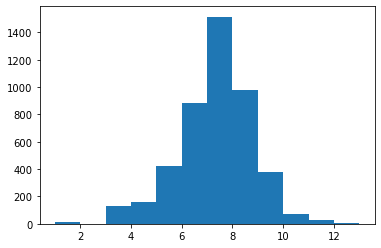

In [42]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [43]:
def scalate(R, props):
    ans = 8
    if R / N < props[0]:
        ans = 5
    if R / N < props[1]:
        ans = 3
    if R / N < props[2]:
        ans = 2
    return ans
    
iters = simulate_func(T, W, lambda x: scalate(x, [0.3, 0.01, 0.001]), 743, range(N))

Result 0: 5    acc: 5.0    ks: [8, 5, 5, 3, 3]
Result 1: 5    acc: 5.0    ks: [8, 5, 5, 3, 3]
Result 2: 5    acc: 5.0    ks: [8, 5, 5, 3, 3]
Result 3: 5    acc: 5.0    ks: [8, 5, 5, 3, 3]
Result 4: 6    acc: 5.2    ks: [8, 5, 5, 3, 3, 3]
Result 5: 5    acc: 5.166666666666667    ks: [8, 5, 5, 3, 3]
Result 6: 5    acc: 5.142857142857143    ks: [8, 5, 5, 3, 3]
Result 7: 5    acc: 5.125    ks: [8, 5, 5, 3, 3]
Result 8: 5    acc: 5.111111111111111    ks: [8, 5, 5, 3, 3]
Result 9: 5    acc: 5.1    ks: [8, 5, 5, 3, 3]
Result 10: 5    acc: 5.090909090909091    ks: [8, 5, 5, 3, 3]
Result 11: 6    acc: 5.166666666666667    ks: [8, 5, 5, 3, 3, 3]
Result 12: 5    acc: 5.153846153846154    ks: [8, 5, 5, 3, 3]
Result 13: 5    acc: 5.142857142857143    ks: [8, 5, 5, 3, 3]
Result 14: 1    acc: 4.866666666666666    ks: [8]
Result 15: 1    acc: 4.625    ks: [8]
Result 16: 1    acc: 4.411764705882353    ks: [8]
Result 17: 1    acc: 4.222222222222222    ks: [8]
Result 18: 1    acc: 4.052631578947368    ks

Result 138: 5    acc: 5.100719424460432    ks: [8, 5, 5, 3, 3]
Result 139: 5    acc: 5.1    ks: [8, 5, 5, 3, 3]
Result 140: 5    acc: 5.099290780141844    ks: [8, 5, 5, 3, 3]
Result 141: 5    acc: 5.098591549295775    ks: [8, 5, 5, 3, 3]
Result 142: 5    acc: 5.0979020979020975    ks: [8, 5, 5, 3, 3]
Result 143: 5    acc: 5.097222222222222    ks: [8, 5, 5, 3, 3]
Result 144: 4    acc: 5.089655172413793    ks: [8, 5, 5, 3]
Result 145: 4    acc: 5.082191780821918    ks: [8, 5, 5, 3]
Result 146: 4    acc: 5.074829931972789    ks: [8, 5, 5, 3]
Result 147: 5    acc: 5.074324324324325    ks: [8, 5, 5, 3, 3]
Result 148: 5    acc: 5.073825503355705    ks: [8, 5, 5, 3, 3]
Result 149: 5    acc: 5.073333333333333    ks: [8, 5, 5, 3, 3]
Result 150: 5    acc: 5.072847682119205    ks: [8, 5, 5, 3, 3]
Result 151: 5    acc: 5.072368421052632    ks: [8, 5, 5, 3, 3]
Result 152: 5    acc: 5.071895424836601    ks: [8, 5, 5, 3, 3]
Result 153: 5    acc: 5.071428571428571    ks: [8, 5, 5, 3, 3]
Result 154: 5 

Result 274: 5    acc: 4.789090909090909    ks: [8, 5, 5, 3, 3]
Result 275: 4    acc: 4.786231884057971    ks: [8, 5, 5, 3]
Result 276: 5    acc: 4.787003610108303    ks: [8, 5, 5, 3, 3]
Result 277: 5    acc: 4.787769784172662    ks: [8, 5, 5, 3, 3]
Result 278: 4    acc: 4.78494623655914    ks: [8, 5, 5, 3]
Result 279: 3    acc: 4.7785714285714285    ks: [8, 5, 5]
Result 280: 3    acc: 4.772241992882562    ks: [8, 5, 5]
Result 281: 5    acc: 4.773049645390071    ks: [8, 5, 5, 3, 3]
Result 282: 5    acc: 4.773851590106007    ks: [8, 5, 5, 3, 3]
Result 283: 3    acc: 4.767605633802817    ks: [8, 5, 5]
Result 284: 3    acc: 4.76140350877193    ks: [8, 5, 5]
Result 285: 3    acc: 4.755244755244755    ks: [8, 5, 5]
Result 286: 5    acc: 4.7560975609756095    ks: [8, 5, 5, 3, 3]
Result 287: 4    acc: 4.753472222222222    ks: [8, 5, 5, 3]
Result 288: 3    acc: 4.747404844290657    ks: [8, 5, 5]
Result 289: 3    acc: 4.741379310344827    ks: [8, 5, 5]
Result 290: 6    acc: 4.745704467353952    

Result 412: 4    acc: 4.60774818401937    ks: [8, 5, 5, 3]
Result 413: 3    acc: 4.603864734299517    ks: [8, 5, 5]
Result 414: 3    acc: 4.6    ks: [8, 5, 5]
Result 415: 5    acc: 4.600961538461538    ks: [8, 5, 5, 3, 3]
Result 416: 4    acc: 4.599520383693045    ks: [8, 5, 5, 3]
Result 417: 4    acc: 4.598086124401914    ks: [8, 5, 5, 3]
Result 418: 4    acc: 4.5966587112171835    ks: [8, 5, 5, 3]
Result 419: 5    acc: 4.597619047619047    ks: [8, 5, 5, 3, 3]
Result 420: 3    acc: 4.593824228028503    ks: [8, 5, 5]
Result 421: 3    acc: 4.590047393364929    ks: [8, 5, 5]
Result 422: 3    acc: 4.58628841607565    ks: [8, 5, 5]
Result 423: 7    acc: 4.591981132075472    ks: [8, 5, 5, 3, 3, 2, 2]
Result 424: 3    acc: 4.588235294117647    ks: [8, 5, 5]
Result 425: 5    acc: 4.589201877934272    ks: [8, 5, 5, 3, 3]
Result 426: 5    acc: 4.590163934426229    ks: [8, 5, 5, 3, 3]
Result 427: 3    acc: 4.586448598130841    ks: [8, 5, 5]
Result 428: 3    acc: 4.582750582750583    ks: [8, 5, 5

Result 546: 5    acc: 4.590493601462523    ks: [8, 5, 5, 3, 3]
Result 547: 5    acc: 4.591240875912408    ks: [8, 5, 5, 3, 3]
Result 548: 5    acc: 4.591985428051002    ks: [8, 5, 5, 3, 3]
Result 549: 4    acc: 4.590909090909091    ks: [8, 5, 5, 5]
Result 550: 5    acc: 4.5916515426497275    ks: [8, 5, 5, 3, 3]
Result 551: 5    acc: 4.592391304347826    ks: [8, 5, 5, 3, 3]
Result 552: 5    acc: 4.593128390596745    ks: [8, 5, 5, 3, 3]
Result 553: 5    acc: 4.593862815884476    ks: [8, 5, 5, 3, 3]
Result 554: 5    acc: 4.594594594594595    ks: [8, 5, 5, 3, 3]
Result 555: 5    acc: 4.595323741007194    ks: [8, 5, 5, 3, 3]
Result 556: 5    acc: 4.596050269299821    ks: [8, 5, 5, 3, 3]
Result 557: 5    acc: 4.596774193548387    ks: [8, 5, 5, 3, 3]
Result 558: 5    acc: 4.597495527728086    ks: [8, 5, 5, 3, 3]
Result 559: 5    acc: 4.598214285714286    ks: [8, 5, 5, 3, 3]
Result 560: 5    acc: 4.598930481283422    ks: [8, 5, 5, 3, 3]
Result 561: 5    acc: 4.599644128113879    ks: [8, 5, 5, 

Result 682: 5    acc: 4.5431918008784775    ks: [8, 5, 5, 3, 3]
Result 683: 5    acc: 4.543859649122807    ks: [8, 5, 5, 3, 3]
Result 684: 5    acc: 4.5445255474452555    ks: [8, 5, 5, 3, 3]
Result 685: 4    acc: 4.543731778425656    ks: [8, 5, 5, 5]
Result 686: 4    acc: 4.542940320232897    ks: [8, 5, 5, 5]
Result 687: 4    acc: 4.542151162790698    ks: [8, 5, 5, 5]
Result 688: 4    acc: 4.5413642960812775    ks: [8, 5, 5, 5]
Result 689: 4    acc: 4.540579710144928    ks: [8, 5, 5, 5]
Result 690: 4    acc: 4.539797395079595    ks: [8, 5, 5, 5]
Result 691: 4    acc: 4.539017341040463    ks: [8, 5, 5, 5]
Result 692: 4    acc: 4.538239538239538    ks: [8, 5, 5, 5]
Result 693: 4    acc: 4.537463976945245    ks: [8, 5, 5, 5]
Result 694: 4    acc: 4.536690647482015    ks: [8, 5, 5, 5]
Result 695: 4    acc: 4.535919540229885    ks: [8, 5, 5, 5]
Result 696: 4    acc: 4.535150645624103    ks: [8, 5, 5, 5]
Result 697: 4    acc: 4.534383954154728    ks: [8, 5, 5, 5]
Result 698: 5    acc: 4.5350

Result 818: 2    acc: 4.518925518925519    ks: [8, 5]
Result 819: 2    acc: 4.515853658536585    ks: [8, 5]
Result 820: 2    acc: 4.51278928136419    ks: [8, 5]
Result 821: 5    acc: 4.51338199513382    ks: [8, 5, 5, 3, 3]
Result 822: 5    acc: 4.513973268529769    ks: [8, 5, 5, 3, 3]
Result 823: 4    acc: 4.513349514563107    ks: [8, 5, 5, 3]
Result 824: 4    acc: 4.512727272727273    ks: [8, 5, 5, 3]
Result 825: 6    acc: 4.514527845036319    ks: [8, 5, 5, 3, 3, 2]
Result 826: 5    acc: 4.515114873035066    ks: [8, 5, 5, 3, 3]
Result 827: 7    acc: 4.518115942028985    ks: [8, 5, 5, 3, 3, 2, 2]
Result 828: 5    acc: 4.518697225572979    ks: [8, 5, 5, 3, 3]
Result 829: 3    acc: 4.516867469879518    ks: [8, 5, 5]
Result 830: 4    acc: 4.516245487364621    ks: [8, 5, 5, 3]
Result 831: 4    acc: 4.515625    ks: [8, 5, 5, 3]
Result 832: 4    acc: 4.51500600240096    ks: [8, 5, 5, 3]
Result 833: 4    acc: 4.514388489208633    ks: [8, 5, 5, 3]
Result 834: 4    acc: 4.51377245508982    ks: 

Result 955: 3    acc: 4.47489539748954    ks: [8, 5, 5]
Result 956: 3    acc: 4.4733542319749215    ks: [8, 5, 5]
Result 957: 3    acc: 4.471816283924843    ks: [8, 5, 5]
Result 958: 3    acc: 4.470281543274244    ks: [8, 5, 5]
Result 959: 3    acc: 4.46875    ks: [8, 5, 5]
Result 960: 4    acc: 4.468262226847035    ks: [8, 5, 5, 3]
Result 961: 3    acc: 4.466735966735967    ks: [8, 5, 5]
Result 962: 4    acc: 4.466251298026999    ks: [8, 5, 5, 3]
Result 963: 3    acc: 4.464730290456432    ks: [8, 5, 5]
Result 964: 3    acc: 4.463212435233161    ks: [8, 5, 5]
Result 965: 3    acc: 4.461697722567288    ks: [8, 5, 5]
Result 966: 3    acc: 4.460186142709411    ks: [8, 5, 5]
Result 967: 3    acc: 4.458677685950414    ks: [8, 5, 5]
Result 968: 3    acc: 4.457172342621259    ks: [8, 5, 5]
Result 969: 4    acc: 4.456701030927835    ks: [8, 5, 5, 3]
Result 970: 3    acc: 4.455200823892894    ks: [8, 5, 5]
Result 971: 3    acc: 4.453703703703703    ks: [8, 5, 5]
Result 972: 3    acc: 4.45220966

Result 1089: 5    acc: 4.454128440366972    ks: [8, 5, 5, 3, 3]
Result 1090: 5    acc: 4.454628780934922    ks: [8, 5, 5, 3, 3]
Result 1091: 5    acc: 4.455128205128205    ks: [8, 5, 5, 3, 3]
Result 1092: 5    acc: 4.4556267154620315    ks: [8, 5, 5, 3, 3]
Result 1093: 5    acc: 4.456124314442413    ks: [8, 5, 5, 3, 3]
Result 1094: 4    acc: 4.455707762557077    ks: [8, 5, 5, 3]
Result 1095: 4    acc: 4.45529197080292    ks: [8, 5, 5, 3]
Result 1096: 4    acc: 4.454876937101185    ks: [8, 5, 5, 3]
Result 1097: 4    acc: 4.454462659380692    ks: [8, 5, 5, 3]
Result 1098: 4    acc: 4.454049135577798    ks: [8, 5, 5, 3]
Result 1099: 4    acc: 4.453636363636364    ks: [8, 5, 5, 3]
Result 1100: 5    acc: 4.454132606721163    ks: [8, 5, 5, 3, 3]
Result 1101: 3    acc: 4.452813067150635    ks: [8, 5, 5]
Result 1102: 6    acc: 4.454215775158659    ks: [8, 5, 5, 3, 3, 3]
Result 1103: 4    acc: 4.453804347826087    ks: [8, 5, 5, 3]
Result 1104: 4    acc: 4.453393665158371    ks: [8, 5, 5, 3]
Res

Result 1222: 4    acc: 4.426001635322976    ks: [8, 5, 5, 3]
Result 1223: 5    acc: 4.426470588235294    ks: [8, 5, 5, 3, 3]
Result 1224: 5    acc: 4.426938775510204    ks: [8, 5, 5, 3, 3]
Result 1225: 5    acc: 4.427406199021207    ks: [8, 5, 5, 3, 3]
Result 1226: 7    acc: 4.429502852485737    ks: [8, 5, 5, 3, 3, 2, 2]
Result 1227: 7    acc: 4.431596091205212    ks: [8, 5, 5, 3, 3, 2, 2]
Result 1228: 5    acc: 4.432058584214809    ks: [8, 5, 5, 3, 3]
Result 1229: 5    acc: 4.432520325203252    ks: [8, 5, 5, 3, 3]
Result 1230: 5    acc: 4.432981316003249    ks: [8, 5, 5, 3, 3]
Result 1231: 5    acc: 4.433441558441558    ks: [8, 5, 5, 3, 3]
Result 1232: 5    acc: 4.43390105433901    ks: [8, 5, 5, 3, 3]
Result 1233: 5    acc: 4.434359805510534    ks: [8, 5, 5, 3, 3]
Result 1234: 5    acc: 4.434817813765182    ks: [8, 5, 5, 3, 3]
Result 1235: 5    acc: 4.435275080906149    ks: [8, 5, 5, 3, 3]
Result 1236: 5    acc: 4.4357316087308005    ks: [8, 5, 5, 3, 3]
Result 1237: 5    acc: 4.436187

Result 1351: 5    acc: 4.476331360946745    ks: [8, 5, 5, 3, 3]
Result 1352: 4    acc: 4.475979305247598    ks: [8, 5, 5, 3]
Result 1353: 4    acc: 4.4756277695716395    ks: [8, 5, 5, 3]
Result 1354: 4    acc: 4.4752767527675275    ks: [8, 5, 5, 3]
Result 1355: 4    acc: 4.474926253687316    ks: [8, 5, 5, 3]
Result 1356: 3    acc: 4.473839351510685    ks: [8, 5, 5]
Result 1357: 3    acc: 4.472754050073638    ks: [8, 5, 5]
Result 1358: 5    acc: 4.4731420161883735    ks: [8, 5, 5, 3, 3]
Result 1359: 5    acc: 4.473529411764706    ks: [8, 5, 5, 3, 3]
Result 1360: 5    acc: 4.47391623806025    ks: [8, 5, 5, 3, 3]
Result 1361: 5    acc: 4.474302496328928    ks: [8, 5, 5, 3, 3]
Result 1362: 4    acc: 4.473954512105649    ks: [8, 5, 5, 3]
Result 1363: 4    acc: 4.473607038123167    ks: [8, 5, 5, 3]
Result 1364: 4    acc: 4.473260073260073    ks: [8, 5, 5, 3]
Result 1365: 4    acc: 4.472913616398243    ks: [8, 5, 5, 3]
Result 1366: 4    acc: 4.472567666422823    ks: [8, 5, 5, 3]
Result 1367: 

Result 1483: 5    acc: 4.495283018867925    ks: [8, 5, 5, 3, 3]
Result 1484: 5    acc: 4.495622895622896    ks: [8, 5, 5, 3, 3]
Result 1485: 5    acc: 4.495962314939435    ks: [8, 5, 5, 3, 3]
Result 1486: 5    acc: 4.496301277740417    ks: [8, 5, 5, 3, 3]
Result 1487: 5    acc: 4.496639784946237    ks: [8, 5, 5, 3, 3]
Result 1488: 5    acc: 4.496977837474815    ks: [8, 5, 5, 3, 3]
Result 1489: 3    acc: 4.495973154362416    ks: [8, 5, 5]
Result 1490: 3    acc: 4.494969818913481    ks: [8, 5, 5]
Result 1491: 3    acc: 4.4939678284182305    ks: [8, 5, 5]
Result 1492: 3    acc: 4.492967180174146    ks: [8, 5, 5]
Result 1493: 3    acc: 4.491967871485944    ks: [8, 5, 5]
Result 1494: 3    acc: 4.490969899665552    ks: [8, 5, 5]
Result 1495: 3    acc: 4.489973262032086    ks: [8, 5, 5]
Result 1496: 3    acc: 4.488977955911824    ks: [8, 5, 5]
Result 1497: 3    acc: 4.4879839786381845    ks: [8, 5, 5]
Result 1498: 3    acc: 4.486991327551701    ks: [8, 5, 5]
Result 1499: 3    acc: 4.486    ks

Result 1617: 4    acc: 4.495055624227441    ks: [8, 5, 5, 3]
Result 1618: 4    acc: 4.494749845583693    ks: [8, 5, 5, 3]
Result 1619: 4    acc: 4.4944444444444445    ks: [8, 5, 5, 3]
Result 1620: 4    acc: 4.4941394201110425    ks: [8, 5, 5, 3]
Result 1621: 5    acc: 4.494451294697904    ks: [8, 5, 5, 3, 3]
Result 1622: 5    acc: 4.494762784966112    ks: [8, 5, 5, 3, 3]
Result 1623: 4    acc: 4.494458128078818    ks: [8, 5, 5, 3]
Result 1624: 5    acc: 4.494769230769231    ks: [8, 5, 5, 3, 3]
Result 1625: 4    acc: 4.4944649446494465    ks: [8, 5, 5, 3]
Result 1626: 4    acc: 4.494161032575292    ks: [8, 5, 5, 3]
Result 1627: 4    acc: 4.493857493857494    ks: [8, 5, 5, 3]
Result 1628: 4    acc: 4.4935543278084715    ks: [8, 5, 5, 3]
Result 1629: 4    acc: 4.493251533742331    ks: [8, 5, 5, 3]
Result 1630: 4    acc: 4.492949110974862    ks: [8, 5, 5, 3]
Result 1631: 4    acc: 4.492647058823529    ks: [8, 5, 5, 3]
Result 1632: 4    acc: 4.492345376607471    ks: [8, 5, 5, 3]
Result 1633

Result 1752: 5    acc: 4.5014261266400455    ks: [8, 5, 5, 3, 3]
Result 1753: 5    acc: 4.501710376282782    ks: [8, 5, 5, 3, 3]
Result 1754: 4    acc: 4.501424501424501    ks: [8, 5, 5, 3]
Result 1755: 4    acc: 4.501138952164009    ks: [8, 5, 5, 3]
Result 1756: 6    acc: 4.50199203187251    ks: [8, 5, 5, 3, 3, 3]
Result 1757: 5    acc: 4.5022753128555175    ks: [8, 5, 5, 3, 3]
Result 1758: 5    acc: 4.502558271745309    ks: [8, 5, 5, 3, 3]
Result 1759: 5    acc: 4.502840909090909    ks: [8, 5, 5, 3, 3]
Result 1760: 5    acc: 4.503123225440091    ks: [8, 5, 5, 3, 3]
Result 1761: 5    acc: 4.503405221339387    ks: [8, 5, 5, 3, 3]
Result 1762: 5    acc: 4.50368689733409    ks: [8, 5, 5, 3, 3]
Result 1763: 5    acc: 4.503968253968254    ks: [8, 5, 5, 3, 3]
Result 1764: 5    acc: 4.504249291784703    ks: [8, 5, 5, 3, 3]
Result 1765: 5    acc: 4.504530011325028    ks: [8, 5, 5, 3, 3]
Result 1766: 5    acc: 4.504810413129598    ks: [8, 5, 5, 3, 3]
Result 1767: 5    acc: 4.505090497737557   

Result 1885: 4    acc: 4.501060445387062    ks: [8, 5, 5, 3]
Result 1886: 4    acc: 4.500794912559618    ks: [8, 5, 5, 3]
Result 1887: 4    acc: 4.500529661016949    ks: [8, 5, 5, 3]
Result 1888: 4    acc: 4.500264690312335    ks: [8, 5, 5, 3]
Result 1889: 4    acc: 4.5    ks: [8, 5, 5, 3]
Result 1890: 4    acc: 4.499735589635113    ks: [8, 5, 5, 3]
Result 1891: 4    acc: 4.499471458773784    ks: [8, 5, 5, 3]
Result 1892: 4    acc: 4.499207606973059    ks: [8, 5, 5, 3]
Result 1893: 4    acc: 4.498944033790918    ks: [8, 5, 5, 3]
Result 1894: 4    acc: 4.4986807387862795    ks: [8, 5, 5, 3]
Result 1895: 5    acc: 4.498945147679325    ks: [8, 5, 5, 3, 3]
Result 1896: 4    acc: 4.49868212967844    ks: [8, 5, 5, 3]
Result 1897: 4    acc: 4.498419388830348    ks: [8, 5, 5, 3]
Result 1898: 4    acc: 4.498156924697209    ks: [8, 5, 5, 3]
Result 1899: 4    acc: 4.497894736842105    ks: [8, 5, 5, 3]
Result 1900: 4    acc: 4.497632824829037    ks: [8, 5, 5, 3]
Result 1901: 4    acc: 4.4973711882

Result 2014: 5    acc: 4.53151364764268    ks: [8, 5, 5, 3, 3]
Result 2015: 5    acc: 4.531746031746032    ks: [8, 5, 5, 3, 3]
Result 2016: 6    acc: 4.532473971244422    ks: [8, 5, 5, 3, 3, 3]
Result 2017: 6    acc: 4.533201189296333    ks: [8, 5, 5, 3, 3, 3]
Result 2018: 6    acc: 4.533927686973749    ks: [8, 5, 5, 3, 3, 3]
Result 2019: 6    acc: 4.534653465346534    ks: [8, 5, 5, 3, 3, 3]
Result 2020: 6    acc: 4.535378525482434    ks: [8, 5, 5, 3, 3, 3]
Result 2021: 6    acc: 4.536102868447082    ks: [8, 5, 5, 3, 3, 3]
Result 2022: 6    acc: 4.536826495304004    ks: [8, 5, 5, 3, 3, 3]
Result 2023: 3    acc: 4.53606719367589    ks: [8, 5, 5]
Result 2024: 3    acc: 4.535308641975309    ks: [8, 5, 5]
Result 2025: 6    acc: 4.536031589338598    ks: [8, 5, 5, 3, 3, 3]
Result 2026: 6    acc: 4.536753823384312    ks: [8, 5, 5, 3, 3, 3]
Result 2027: 6    acc: 4.537475345167653    ks: [8, 5, 5, 3, 3, 3]
Result 2028: 6    acc: 4.538196155741745    ks: [8, 5, 5, 3, 3, 3]
Result 2029: 6    acc

Result 2145: 4    acc: 4.534016775396085    ks: [8, 5, 5, 3]
Result 2146: 4    acc: 4.533768048439684    ks: [8, 5, 5, 3]
Result 2147: 3    acc: 4.533054003724395    ks: [8, 5, 5]
Result 2148: 5    acc: 4.533271288971615    ks: [8, 5, 5, 3, 3]
Result 2149: 5    acc: 4.533488372093023    ks: [8, 5, 5, 3, 3]
Result 2150: 5    acc: 4.533705253370526    ks: [8, 5, 5, 3, 3]
Result 2151: 5    acc: 4.533921933085502    ks: [8, 5, 5, 3, 3]
Result 2152: 5    acc: 4.534138411518811    ks: [8, 5, 5, 3, 3]
Result 2153: 5    acc: 4.534354688950789    ks: [8, 5, 5, 3, 3]
Result 2154: 5    acc: 4.534570765661253    ks: [8, 5, 5, 3, 3]
Result 2155: 4    acc: 4.534322820037106    ks: [8, 5, 5, 3]
Result 2156: 5    acc: 4.534538711172925    ks: [8, 5, 5, 3, 3]
Result 2157: 4    acc: 4.534291010194624    ks: [8, 5, 5, 3]
Result 2158: 4    acc: 4.534043538675313    ks: [8, 5, 5, 3]
Result 2159: 4    acc: 4.5337962962962965    ks: [8, 5, 5, 3]
Result 2160: 3    acc: 4.533086534012032    ks: [8, 5, 5]
Resul

Result 2283: 4    acc: 4.4868651488616464    ks: [8, 5, 5, 3]
Result 2284: 5    acc: 4.487089715536105    ks: [8, 5, 5, 3, 3]
Result 2285: 4    acc: 4.486876640419948    ks: [8, 5, 5, 3]
Result 2286: 5    acc: 4.487101005684303    ks: [8, 5, 5, 3, 3]
Result 2287: 4    acc: 4.486888111888112    ks: [8, 5, 5, 3]
Result 2288: 1    acc: 4.4853647881170815    ks: [8]
Result 2289: 1    acc: 4.483842794759825    ks: [8]
Result 2290: 1    acc: 4.482322130074204    ks: [8]
Result 2291: 5    acc: 4.482547993019197    ks: [8, 5, 5, 3, 3]
Result 2292: 6    acc: 4.483209768861753    ks: [8, 5, 5, 3, 3, 3]
Result 2293: 6    acc: 4.483870967741935    ks: [8, 5, 5, 3, 3, 3]
Result 2294: 5    acc: 4.484095860566449    ks: [8, 5, 5, 3, 3]
Result 2295: 5    acc: 4.484320557491289    ks: [8, 5, 5, 3, 3]
Result 2296: 4    acc: 4.484109708315193    ks: [8, 5, 5, 3]
Result 2297: 6    acc: 4.484769364664926    ks: [8, 5, 5, 3, 3, 3]
Result 2298: 6    acc: 4.485428447150936    ks: [8, 5, 5, 3, 3, 3]
Result 229

Result 2417: 3    acc: 4.470223325062035    ks: [8, 5, 5]
Result 2418: 3    acc: 4.469615543613063    ks: [8, 5, 5]
Result 2419: 3    acc: 4.4690082644628095    ks: [8, 5, 5]
Result 2420: 3    acc: 4.4684014869888475    ks: [8, 5, 5]
Result 2421: 3    acc: 4.467795210569777    ks: [8, 5, 5]
Result 2422: 3    acc: 4.467189434585225    ks: [8, 5, 5]
Result 2423: 3    acc: 4.466584158415841    ks: [8, 5, 5]
Result 2424: 4    acc: 4.466391752577319    ks: [8, 5, 5, 5]
Result 2425: 3    acc: 4.465787304204452    ks: [8, 5, 5]
Result 2426: 4    acc: 4.465595385249279    ks: [8, 5, 5, 5]
Result 2427: 4    acc: 4.4654036243822075    ks: [8, 5, 5, 5]
Result 2428: 5    acc: 4.46562371346233    ks: [8, 5, 5, 5, 3]
Result 2429: 4    acc: 4.465432098765432    ks: [8, 5, 5, 3]
Result 2430: 4    acc: 4.46524064171123    ks: [8, 5, 5, 3]
Result 2431: 4    acc: 4.465049342105263    ks: [8, 5, 5, 3]
Result 2432: 5    acc: 4.465269214960953    ks: [8, 5, 5, 3, 3]
Result 2433: 5    acc: 4.4654889071487265

Result 2555: 5    acc: 4.426056338028169    ks: [8, 5, 5, 3, 3]
Result 2556: 3    acc: 4.425498631208447    ks: [8, 5, 5]
Result 2557: 3    acc: 4.424941360437842    ks: [8, 5, 5]
Result 2558: 3    acc: 4.424384525205158    ks: [8, 5, 5]
Result 2559: 3    acc: 4.423828125    ks: [8, 5, 5]
Result 2560: 3    acc: 4.423272159312768    ks: [8, 5, 5]
Result 2561: 3    acc: 4.42271662763466    ks: [8, 5, 5]
Result 2562: 3    acc: 4.422161529457667    ks: [8, 5, 5]
Result 2563: 4    acc: 4.421996879875195    ks: [8, 5, 5, 3]
Result 2564: 5    acc: 4.4222222222222225    ks: [8, 5, 5, 3, 3]
Result 2565: 5    acc: 4.4224473889321905    ks: [8, 5, 5, 3, 3]
Result 2566: 3    acc: 4.421893260615504    ks: [8, 5, 5]
Result 2567: 3    acc: 4.4213395638629285    ks: [8, 5, 5]
Result 2568: 3    acc: 4.420786298170494    ks: [8, 5, 5]
Result 2569: 3    acc: 4.42023346303502    ks: [8, 5, 5]
Result 2570: 3    acc: 4.4196810579541035    ks: [8, 5, 5]
Result 2571: 3    acc: 4.419129082426127    ks: [8, 5, 

Result 2691: 4    acc: 4.400817236255572    ks: [8, 5, 5, 3]
Result 2692: 4    acc: 4.400668399554401    ks: [8, 5, 5, 3]
Result 2693: 4    acc: 4.400519673348181    ks: [8, 5, 5, 3]
Result 2694: 4    acc: 4.400371057513914    ks: [8, 5, 5, 3]
Result 2695: 3    acc: 4.399851632047477    ks: [8, 5, 5]
Result 2696: 3    acc: 4.399332591768632    ks: [8, 5, 5]
Result 2697: 3    acc: 4.3988139362490735    ks: [8, 5, 5]
Result 2698: 3    acc: 4.398295665061133    ks: [8, 5, 5]
Result 2699: 3    acc: 4.397777777777778    ks: [8, 5, 5]
Result 2700: 3    acc: 4.397260273972603    ks: [8, 5, 5]
Result 2701: 3    acc: 4.3967431532198376    ks: [8, 5, 5]
Result 2702: 3    acc: 4.39622641509434    ks: [8, 5, 5]
Result 2703: 3    acc: 4.395710059171598    ks: [8, 5, 5]
Result 2704: 3    acc: 4.395194085027726    ks: [8, 5, 5]
Result 2705: 3    acc: 4.394678492239468    ks: [8, 5, 5]
Result 2706: 3    acc: 4.3941632803841895    ks: [8, 5, 5]
Result 2707: 4    acc: 4.394017725258493    ks: [8, 5, 5, 

Result 2823: 5    acc: 4.403682719546742    ks: [8, 5, 5, 3, 3]
Result 2824: 5    acc: 4.4038938053097345    ks: [8, 5, 5, 3, 3]
Result 2825: 5    acc: 4.4041047416843595    ks: [8, 5, 5, 3, 3]
Result 2826: 5    acc: 4.404315528829147    ks: [8, 5, 5, 3, 3]
Result 2827: 4    acc: 4.404172560113154    ks: [8, 5, 5, 3]
Result 2828: 4    acc: 4.4040296924708375    ks: [8, 5, 5, 3]
Result 2829: 5    acc: 4.404240282685512    ks: [8, 5, 5, 3, 3]
Result 2830: 5    acc: 4.40445072412575    ks: [8, 5, 5, 3, 3]
Result 2831: 4    acc: 4.40430790960452    ks: [8, 5, 5, 3]
Result 2832: 5    acc: 4.404518178609248    ks: [8, 5, 5, 3, 3]
Result 2833: 6    acc: 4.4050811573747355    ks: [8, 5, 5, 3, 3, 3]
Result 2834: 5    acc: 4.405291005291005    ks: [8, 5, 5, 3, 3]
Result 2835: 5    acc: 4.405500705218618    ks: [8, 5, 5, 3, 3]
Result 2836: 6    acc: 4.406062742333451    ks: [8, 5, 5, 3, 3, 3]
Result 2837: 6    acc: 4.40662438336857    ks: [8, 5, 5, 3, 3, 3]
Result 2838: 4    acc: 4.40648115533638

Result 2958: 4    acc: 4.383913484285231    ks: [8, 5, 5, 3]
Result 2959: 4    acc: 4.383783783783784    ks: [8, 5, 5, 3]
Result 2960: 4    acc: 4.383654170888214    ks: [8, 5, 5, 3]
Result 2961: 4    acc: 4.383524645509791    ks: [8, 5, 5, 3]
Result 2962: 4    acc: 4.383395207559905    ks: [8, 5, 5, 3]
Result 2963: 4    acc: 4.383265856950067    ks: [8, 5, 5, 3]
Result 2964: 4    acc: 4.383136593591906    ks: [8, 5, 5, 3]
Result 2965: 5    acc: 4.383344571813891    ks: [8, 5, 5, 3, 3]
Result 2966: 5    acc: 4.383552409841591    ks: [8, 5, 5, 3, 3]
Result 2967: 5    acc: 4.383760107816712    ks: [8, 5, 5, 3, 3]
Result 2968: 5    acc: 4.383967665880768    ks: [8, 5, 5, 3, 3]
Result 2969: 5    acc: 4.384175084175085    ks: [8, 5, 5, 3, 3]
Result 2970: 5    acc: 4.384382362840794    ks: [8, 5, 5, 3, 3]
Result 2971: 5    acc: 4.384589502018843    ks: [8, 5, 5, 3, 3]
Result 2972: 5    acc: 4.3847965018499835    ks: [8, 5, 5, 3, 3]
Result 2973: 5    acc: 4.385003362474781    ks: [8, 5, 5, 3,

Result 3096: 5    acc: 4.358411365837908    ks: [8, 5, 5, 3, 3]
Result 3097: 5    acc: 4.358618463524855    ks: [8, 5, 5, 3, 3]
Result 3098: 5    acc: 4.358825427557276    ks: [8, 5, 5, 3, 3]
Result 3099: 5    acc: 4.359032258064516    ks: [8, 5, 5, 3, 3]
Result 3100: 5    acc: 4.3592389551757496    ks: [8, 5, 5, 3, 3]
Result 3101: 5    acc: 4.359445519019987    ks: [8, 5, 5, 3, 3]
Result 3102: 5    acc: 4.3596519497260715    ks: [8, 5, 5, 3, 3]
Result 3103: 5    acc: 4.359858247422681    ks: [8, 5, 5, 3, 3]
Result 3104: 4    acc: 4.359742351046699    ks: [8, 5, 5, 3]
Result 3105: 4    acc: 4.359626529298133    ks: [8, 5, 5, 3]
Result 3106: 5    acc: 4.359832635983263    ks: [8, 5, 5, 3, 3]
Result 3107: 5    acc: 4.36003861003861    ks: [8, 5, 5, 3, 3]
Result 3108: 5    acc: 4.360244451592152    ks: [8, 5, 5, 3, 3]
Result 3109: 5    acc: 4.3604501607717046    ks: [8, 5, 5, 3, 3]
Result 3110: 5    acc: 4.360655737704918    ks: [8, 5, 5, 3, 3]
Result 3111: 5    acc: 4.3608611825192805   

Result 3228: 5    acc: 4.371941777640136    ks: [8, 5, 5, 3, 3]
Result 3229: 5    acc: 4.372136222910217    ks: [8, 5, 5, 3, 3]
Result 3230: 4    acc: 4.372021046115754    ks: [8, 5, 5, 3]
Result 3231: 4    acc: 4.3719059405940595    ks: [8, 5, 5, 3]
Result 3232: 4    acc: 4.3717909062789975    ks: [8, 5, 5, 3]
Result 3233: 4    acc: 4.371675943104514    ks: [8, 5, 5, 3]
Result 3234: 4    acc: 4.371561051004637    ks: [8, 5, 5, 3]
Result 3235: 4    acc: 4.371446229913474    ks: [8, 5, 5, 3]
Result 3236: 4    acc: 4.371331479765215    ks: [8, 5, 5, 3]
Result 3237: 3    acc: 4.370907967881409    ks: [8, 5, 5]
Result 3238: 4    acc: 4.3707934547699905    ks: [8, 5, 5, 3]
Result 3239: 4    acc: 4.370679012345679    ks: [8, 5, 5, 3]
Result 3240: 4    acc: 4.3705646405430425    ks: [8, 5, 5, 3]
Result 3241: 4    acc: 4.37045033929673    ks: [8, 5, 5, 3]
Result 3242: 4    acc: 4.370336108541474    ks: [8, 5, 5, 3]
Result 3243: 4    acc: 4.370221948212084    ks: [8, 5, 5, 3]
Result 3244: 5    

Result 3362: 4    acc: 4.362176628010705    ks: [8, 5, 5, 3]
Result 3363: 4    acc: 4.362068965517241    ks: [8, 5, 5, 3]
Result 3364: 4    acc: 4.361961367013373    ks: [8, 5, 5, 3]
Result 3365: 4    acc: 4.361853832442068    ks: [8, 5, 5, 3]
Result 3366: 4    acc: 4.361746361746362    ks: [8, 5, 5, 3]
Result 3367: 4    acc: 4.361638954869359    ks: [8, 5, 5, 3]
Result 3368: 4    acc: 4.36153161175423    ks: [8, 5, 5, 3]
Result 3369: 5    acc: 4.361721068249258    ks: [8, 5, 5, 3, 3]
Result 3370: 5    acc: 4.361910412340552    ks: [8, 5, 5, 3, 3]
Result 3371: 5    acc: 4.362099644128114    ks: [8, 5, 5, 3, 3]
Result 3372: 5    acc: 4.362288763711829    ks: [8, 5, 5, 3, 3]
Result 3373: 5    acc: 4.362477771191464    ks: [8, 5, 5, 3, 3]
Result 3374: 5    acc: 4.362666666666667    ks: [8, 5, 5, 3, 3]
Result 3375: 5    acc: 4.3628554502369665    ks: [8, 5, 5, 3, 3]
Result 3376: 5    acc: 4.363044122001777    ks: [8, 5, 5, 3, 3]
Result 3377: 5    acc: 4.36323268206039    ks: [8, 5, 5, 3, 3

Result 3491: 4    acc: 4.380870561282933    ks: [8, 5, 5, 3]
Result 3492: 4    acc: 4.380761523046092    ks: [8, 5, 5, 3]
Result 3493: 4    acc: 4.3806525472238125    ks: [8, 5, 5, 3]
Result 3494: 4    acc: 4.380543633762518    ks: [8, 5, 5, 3]
Result 3495: 4    acc: 4.380434782608695    ks: [8, 5, 5, 3]
Result 3496: 4    acc: 4.380325993708893    ks: [8, 5, 5, 3]
Result 3497: 4    acc: 4.38021726700972    ks: [8, 5, 5, 3]
Result 3498: 5    acc: 4.380394398399543    ks: [8, 5, 5, 3, 3]
Result 3499: 5    acc: 4.380571428571429    ks: [8, 5, 5, 3, 3]
Result 3500: 6    acc: 4.381033990288489    ks: [8, 5, 5, 3, 3, 2]
Result 3501: 6    acc: 4.381496287835523    ks: [8, 5, 5, 3, 3, 2]
Result 3502: 4    acc: 4.381387382243791    ks: [8, 5, 5, 3]
Result 3503: 4    acc: 4.3812785388127855    ks: [8, 5, 5, 3]
Result 3504: 4    acc: 4.381169757489301    ks: [8, 5, 5, 3]
Result 3505: 5    acc: 4.3813462635482034    ks: [8, 5, 5, 3, 3]
Result 3506: 5    acc: 4.381522668947818    ks: [8, 5, 5, 3, 3

Result 3624: 5    acc: 4.376    ks: [8, 5, 5, 5, 3]
Result 3625: 4    acc: 4.375896304467733    ks: [8, 5, 5, 5]
Result 3626: 5    acc: 4.3760683760683765    ks: [8, 5, 5, 5, 3]
Result 3627: 5    acc: 4.376240352811466    ks: [8, 5, 5, 5, 3]
Result 3628: 5    acc: 4.376412234775421    ks: [8, 5, 5, 5, 3]
Result 3629: 4    acc: 4.376308539944904    ks: [8, 5, 5, 5]
Result 3630: 4    acc: 4.37620490223079    ks: [8, 5, 5, 5]
Result 3631: 4    acc: 4.376101321585903    ks: [8, 5, 5, 5]
Result 3632: 4    acc: 4.375997797963116    ks: [8, 5, 5, 5]
Result 3633: 4    acc: 4.375894331315355    ks: [8, 5, 5, 5]
Result 3634: 5    acc: 4.376066024759285    ks: [8, 5, 5, 5, 3]
Result 3635: 5    acc: 4.376237623762377    ks: [8, 5, 5, 3, 3]
Result 3636: 5    acc: 4.376409128402529    ks: [8, 5, 5, 5, 3]
Result 3637: 5    acc: 4.376580538757559    ks: [8, 5, 5, 5, 3]
Result 3638: 5    acc: 4.376751854905193    ks: [8, 5, 5, 5, 3]
Result 3639: 4    acc: 4.376648351648352    ks: [8, 5, 5, 3]
Result 36

Result 3756: 4    acc: 4.376097950492414    ks: [8, 5, 5, 3]
Result 3757: 4    acc: 4.37599787120809    ks: [8, 5, 5, 3]
Result 3758: 4    acc: 4.375897845171588    ks: [8, 5, 5, 3]
Result 3759: 4    acc: 4.375797872340425    ks: [8, 5, 5, 3]
Result 3760: 4    acc: 4.375697952672161    ks: [8, 5, 5, 3]
Result 3761: 4    acc: 4.375598086124402    ks: [8, 5, 5, 3]
Result 3762: 4    acc: 4.375498272654797    ks: [8, 5, 5, 3]
Result 3763: 4    acc: 4.375398512221041    ks: [8, 5, 5, 3]
Result 3764: 4    acc: 4.3752988047808765    ks: [8, 5, 5, 3]
Result 3765: 4    acc: 4.3751991502920875    ks: [8, 5, 5, 3]
Result 3766: 4    acc: 4.3750995487125035    ks: [8, 5, 5, 3]
Result 3767: 4    acc: 4.375    ks: [8, 5, 5, 3]
Result 3768: 4    acc: 4.374900504112497    ks: [8, 5, 5, 3]
Result 3769: 4    acc: 4.3748010610079575    ks: [8, 5, 5, 3]
Result 3770: 4    acc: 4.3747016706443915    ks: [8, 5, 5, 3]
Result 3771: 5    acc: 4.374867444326617    ks: [8, 5, 5, 3, 3]
Result 3772: 3    acc: 4.3745

Result 3890: 5    acc: 4.367771781033153    ks: [8, 5, 5, 5, 3]
Result 3891: 5    acc: 4.367934224049332    ks: [8, 5, 5, 3, 3]
Result 3892: 4    acc: 4.367839712304136    ks: [8, 5, 5, 3]
Result 3893: 4    acc: 4.367745249101182    ks: [8, 5, 5, 3]
Result 3894: 4    acc: 4.367650834403081    ks: [8, 5, 5, 3]
Result 3895: 4    acc: 4.367556468172484    ks: [8, 5, 5, 3]
Result 3896: 4    acc: 4.367462150372081    ks: [8, 5, 5, 3]
Result 3897: 3    acc: 4.367111339148281    ks: [8, 5, 5]
Result 3898: 3    acc: 4.366760707873814    ks: [8, 5, 5]
Result 3899: 3    acc: 4.366410256410257    ks: [8, 5, 5]
Result 3900: 4    acc: 4.366316329146373    ks: [8, 5, 5, 3]
Result 3901: 4    acc: 4.366222450025628    ks: [8, 5, 5, 3]
Result 3902: 4    acc: 4.366128619011017    ks: [8, 5, 5, 3]
Result 3903: 4    acc: 4.366034836065574    ks: [8, 5, 5, 3]
Result 3904: 4    acc: 4.3659411011523686    ks: [8, 5, 5, 3]
Result 3905: 4    acc: 4.365847414234511    ks: [8, 5, 5, 3]
Result 3906: 4    acc: 4.3

Result 4023: 4    acc: 4.3732604373757455    ks: [8, 5, 5, 3]
Result 4024: 4    acc: 4.373167701863354    ks: [8, 5, 5, 3]
Result 4025: 4    acc: 4.3730750124192745    ks: [8, 5, 5, 3]
Result 4026: 6    acc: 4.373479016637695    ks: [8, 5, 5, 3, 3, 3]
Result 4027: 6    acc: 4.373882820258193    ks: [8, 5, 5, 3, 3, 3]
Result 4028: 5    acc: 4.37403822288409    ks: [8, 5, 5, 3, 3]
Result 4029: 5    acc: 4.374193548387097    ks: [8, 5, 5, 3, 3]
Result 4030: 5    acc: 4.374348796824609    ks: [8, 5, 5, 3, 3]
Result 4031: 5    acc: 4.374503968253968    ks: [8, 5, 5, 3, 3]
Result 4032: 5    acc: 4.374659062732457    ks: [8, 5, 5, 3, 3]
Result 4033: 5    acc: 4.374814080317303    ks: [8, 5, 5, 3, 3]
Result 4034: 5    acc: 4.3749690210656755    ks: [8, 5, 5, 3, 3]
Result 4035: 6    acc: 4.375371655104064    ks: [8, 5, 5, 3, 3, 2]
Result 4036: 4    acc: 4.375278672281397    ks: [8, 5, 5, 3]
Result 4037: 4    acc: 4.3751857355126305    ks: [8, 5, 5, 3]
Result 4038: 4    acc: 4.3750928447635555  

Result 4155: 3    acc: 4.38354186717998    ks: [8, 5, 5]
Result 4156: 3    acc: 4.383209044984364    ks: [8, 5, 5]
Result 4157: 3    acc: 4.382876382876383    ks: [8, 5, 5]
Result 4158: 3    acc: 4.382543880740562    ks: [8, 5, 5]
Result 4159: 3    acc: 4.382211538461538    ks: [8, 5, 5]
Result 4160: 3    acc: 4.381879355924057    ks: [8, 5, 5]
Result 4161: 3    acc: 4.381547333012975    ks: [8, 5, 5]
Result 4162: 3    acc: 4.3812154696132595    ks: [8, 5, 5]
Result 4163: 6    acc: 4.381604226705091    ks: [8, 5, 5, 3, 3, 3]
Result 4164: 6    acc: 4.381992797118848    ks: [8, 5, 5, 3, 3, 3]
Result 4165: 3    acc: 4.3816610657705235    ks: [8, 5, 5]
Result 4166: 3    acc: 4.381329493640509    ks: [8, 5, 5]
Result 4167: 4    acc: 4.381238003838772    ks: [8, 5, 5, 3]
Result 4168: 4    acc: 4.38114655792756    ks: [8, 5, 5, 3]
Result 4169: 4    acc: 4.3810551558753    ks: [8, 5, 5, 3]
Result 4170: 4    acc: 4.380963797650444    ks: [8, 5, 5, 3]
Result 4171: 4    acc: 4.380872483221476    

Result 4286: 6    acc: 4.394448332167016    ks: [8, 5, 5, 3, 3, 3]
Result 4287: 6    acc: 4.39482276119403    ks: [8, 5, 5, 3, 3, 3]
Result 4288: 6    acc: 4.395197015621357    ks: [8, 5, 5, 3, 3, 3]
Result 4289: 6    acc: 4.395571095571095    ks: [8, 5, 5, 3, 3, 3]
Result 4290: 4    acc: 4.395478909345141    ks: [8, 5, 5, 5]
Result 4291: 5    acc: 4.395619757688723    ks: [8, 5, 5, 3, 3]
Result 4292: 5    acc: 4.395760540414629    ks: [8, 5, 5, 3, 3]
Result 4293: 5    acc: 4.395901257568701    ks: [8, 5, 5, 3, 3]
Result 4294: 4    acc: 4.395809080325961    ks: [8, 5, 5, 3]
Result 4295: 6    acc: 4.396182495344506    ks: [8, 5, 5, 3, 3, 3]
Result 4296: 6    acc: 4.396555736560391    ks: [8, 5, 5, 3, 3, 3]
Result 4297: 5    acc: 4.396696137738483    ks: [8, 5, 5, 3, 3]
Result 4298: 3    acc: 4.3963712491277045    ks: [8, 5, 5]
Result 4299: 6    acc: 4.3967441860465115    ks: [8, 5, 5, 3, 3, 3]
Result 4300: 6    acc: 4.397116949546617    ks: [8, 5, 5, 3, 3, 3]
Result 4301: 6    acc: 4.39

Result 4419: 4    acc: 4.390950226244344    ks: [8, 5, 5, 3]
Result 4420: 5    acc: 4.3910879891427275    ks: [8, 5, 5, 3, 3]
Result 4421: 5    acc: 4.391225689733153    ks: [8, 5, 5, 3, 3]
Result 4422: 5    acc: 4.39136332805788    ks: [8, 5, 5, 3, 3]
Result 4423: 5    acc: 4.391500904159132    ks: [8, 5, 5, 3, 3]
Result 4424: 4    acc: 4.391412429378531    ks: [8, 5, 5, 3]
Result 4425: 4    acc: 4.391323994577497    ks: [8, 5, 5, 3]
Result 4426: 4    acc: 4.391235599728936    ks: [8, 5, 5, 3]
Result 4427: 4    acc: 4.391147244805781    ks: [8, 5, 5, 3]
Result 4428: 4    acc: 4.391058929780989    ks: [8, 5, 5, 3]
Result 4429: 5    acc: 4.391196388261851    ks: [8, 5, 5, 3, 3]
Result 4430: 5    acc: 4.3913337846987135    ks: [8, 5, 5, 3, 3]
Result 4431: 5    acc: 4.391471119133574    ks: [8, 5, 5, 3, 3]
Result 4432: 5    acc: 4.391608391608392    ks: [8, 5, 5, 3, 3]
Result 4433: 5    acc: 4.391745602165088    ks: [8, 5, 5, 3, 3]
Result 4434: 5    acc: 4.3918827508455465    ks: [8, 5, 5

Result 4550: 4    acc: 4.3948582729070536    ks: [8, 5, 5, 3]
Result 4551: 5    acc: 4.394991212653778    ks: [8, 5, 5, 3, 3]
Result 4552: 6    acc: 4.395343729409181    ks: [8, 5, 5, 3, 3, 3]
Result 4553: 6    acc: 4.395696091348265    ks: [8, 5, 5, 3, 3, 3]
Result 4554: 4    acc: 4.395609220636663    ks: [8, 5, 5, 3]
Result 4555: 5    acc: 4.395741878841089    ks: [8, 5, 5, 3, 3]
Result 4556: 5    acc: 4.395874478823788    ks: [8, 5, 5, 3, 3]
Result 4557: 5    acc: 4.39600702062308    ks: [8, 5, 5, 3, 3]
Result 4558: 5    acc: 4.3961395042772535    ks: [8, 5, 5, 3, 3]
Result 4559: 4    acc: 4.396052631578947    ks: [8, 5, 5, 3]
Result 4560: 4    acc: 4.395965796974347    ks: [8, 5, 5, 3]
Result 4561: 5    acc: 4.396098202542745    ks: [8, 5, 5, 3, 3]
Result 4562: 5    acc: 4.396230550076704    ks: [8, 5, 5, 3, 3]
Result 4563: 4    acc: 4.396143733567047    ks: [8, 5, 5, 3]
Result 4564: 4    acc: 4.3960569550930995    ks: [8, 5, 5, 3]
Result 4565: 6    acc: 4.3964082347788    ks: [8, 

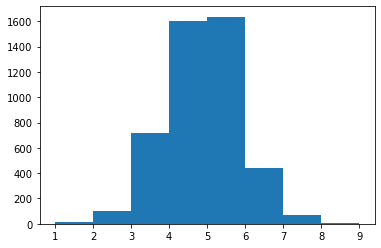

In [44]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [45]:
iters = simulate_func(T, W, lambda x: scalate(x, [0.3, 0.005, 0.0005]), 743, range(N))

Result 0: 5    acc: 5.0    ks: [8, 5, 5, 5, 3]
Result 1: 5    acc: 5.0    ks: [8, 5, 5, 5, 3]
Result 2: 4    acc: 4.666666666666667    ks: [8, 5, 5, 5]
Result 3: 4    acc: 4.5    ks: [8, 5, 5, 5]
Result 4: 5    acc: 4.6    ks: [8, 5, 5, 5, 3]
Result 5: 5    acc: 4.666666666666667    ks: [8, 5, 5, 5, 3]
Result 6: 5    acc: 4.714285714285714    ks: [8, 5, 5, 5, 3]
Result 7: 5    acc: 4.75    ks: [8, 5, 5, 5, 3]
Result 8: 5    acc: 4.777777777777778    ks: [8, 5, 5, 5, 3]
Result 9: 5    acc: 4.8    ks: [8, 5, 5, 5, 3]
Result 10: 5    acc: 4.818181818181818    ks: [8, 5, 5, 5, 3]
Result 11: 5    acc: 4.833333333333333    ks: [8, 5, 5, 5, 3]
Result 12: 5    acc: 4.846153846153846    ks: [8, 5, 5, 5, 3]
Result 13: 5    acc: 4.857142857142857    ks: [8, 5, 5, 5, 3]
Result 14: 1    acc: 4.6    ks: [8]
Result 15: 1    acc: 4.375    ks: [8]
Result 16: 1    acc: 4.176470588235294    ks: [8]
Result 17: 1    acc: 4.0    ks: [8]
Result 18: 1    acc: 3.8421052631578947    ks: [8]
Result 19: 5    acc:

Result 141: 4    acc: 4.669014084507042    ks: [8, 5, 5, 5]
Result 142: 4    acc: 4.664335664335664    ks: [8, 5, 5, 5]
Result 143: 5    acc: 4.666666666666667    ks: [8, 5, 5, 3, 3]
Result 144: 4    acc: 4.662068965517242    ks: [8, 5, 5, 3]
Result 145: 4    acc: 4.657534246575342    ks: [8, 5, 5, 3]
Result 146: 4    acc: 4.653061224489796    ks: [8, 5, 5, 3]
Result 147: 4    acc: 4.648648648648648    ks: [8, 5, 5, 5]
Result 148: 4    acc: 4.644295302013423    ks: [8, 5, 5, 5]
Result 149: 4    acc: 4.64    ks: [8, 5, 5, 5]
Result 150: 5    acc: 4.642384105960265    ks: [8, 5, 5, 5, 3]
Result 151: 4    acc: 4.6381578947368425    ks: [8, 5, 5, 5]
Result 152: 5    acc: 4.640522875816994    ks: [8, 5, 5, 5, 3]
Result 153: 5    acc: 4.642857142857143    ks: [8, 5, 5, 5, 3]
Result 154: 5    acc: 4.645161290322581    ks: [8, 5, 5, 5, 3]
Result 155: 5    acc: 4.647435897435898    ks: [8, 5, 5, 5, 3]
Result 156: 4    acc: 4.643312101910828    ks: [8, 5, 5, 5]
Result 157: 5    acc: 4.6455696202

Result 277: 4    acc: 4.5    ks: [8, 5, 5, 5]
Result 278: 4    acc: 4.49820788530466    ks: [8, 5, 5, 3]
Result 279: 3    acc: 4.492857142857143    ks: [8, 5, 5]
Result 280: 3    acc: 4.487544483985765    ks: [8, 5, 5]
Result 281: 5    acc: 4.48936170212766    ks: [8, 5, 5, 5, 3]
Result 282: 5    acc: 4.491166077738516    ks: [8, 5, 5, 3, 3]
Result 283: 3    acc: 4.485915492957746    ks: [8, 5, 5]
Result 284: 3    acc: 4.480701754385965    ks: [8, 5, 5]
Result 285: 3    acc: 4.475524475524476    ks: [8, 5, 5]
Result 286: 5    acc: 4.477351916376307    ks: [8, 5, 5, 3, 3]
Result 287: 4    acc: 4.475694444444445    ks: [8, 5, 5, 3]
Result 288: 3    acc: 4.470588235294118    ks: [8, 5, 5]
Result 289: 3    acc: 4.4655172413793105    ks: [8, 5, 5]
Result 290: 6    acc: 4.470790378006873    ks: [8, 5, 5, 3, 3, 3]
Result 291: 3    acc: 4.465753424657534    ks: [8, 5, 5]
Result 292: 4    acc: 4.464163822525597    ks: [8, 5, 5, 3]
Result 293: 3    acc: 4.459183673469388    ks: [8, 5, 5]
Result 

Result 416: 4    acc: 4.342925659472422    ks: [8, 5, 5, 5]
Result 417: 4    acc: 4.342105263157895    ks: [8, 5, 5, 5]
Result 418: 4    acc: 4.341288782816229    ks: [8, 5, 5, 3]
Result 419: 5    acc: 4.3428571428571425    ks: [8, 5, 5, 3, 3]
Result 420: 3    acc: 4.339667458432304    ks: [8, 5, 5]
Result 421: 3    acc: 4.3364928909952605    ks: [8, 5, 5]
Result 422: 3    acc: 4.333333333333333    ks: [8, 5, 5]
Result 423: 6    acc: 4.337264150943396    ks: [8, 5, 5, 3, 3, 3]
Result 424: 3    acc: 4.334117647058823    ks: [8, 5, 5]
Result 425: 5    acc: 4.335680751173709    ks: [8, 5, 5, 5, 3]
Result 426: 5    acc: 4.337236533957846    ks: [8, 5, 5, 3, 3]
Result 427: 3    acc: 4.33411214953271    ks: [8, 5, 5]
Result 428: 3    acc: 4.331002331002331    ks: [8, 5, 5]
Result 429: 4    acc: 4.330232558139535    ks: [8, 5, 5, 3]
Result 430: 4    acc: 4.3294663573085845    ks: [8, 5, 5, 3]
Result 431: 5    acc: 4.331018518518518    ks: [8, 5, 5, 3, 3]
Result 432: 4    acc: 4.33025404157043

Result 551: 5    acc: 4.340579710144928    ks: [8, 5, 5, 5, 3]
Result 552: 5    acc: 4.341772151898734    ks: [8, 5, 5, 5, 3]
Result 553: 5    acc: 4.342960288808665    ks: [8, 5, 5, 5, 3]
Result 554: 6    acc: 4.345945945945946    ks: [8, 5, 5, 5, 3, 3]
Result 555: 5    acc: 4.347122302158273    ks: [8, 5, 5, 5, 3]
Result 556: 6    acc: 4.350089766606822    ks: [8, 5, 5, 5, 3, 3]
Result 557: 6    acc: 4.353046594982079    ks: [8, 5, 5, 5, 3, 3]
Result 558: 6    acc: 4.355992844364938    ks: [8, 5, 5, 5, 3, 3]
Result 559: 6    acc: 4.358928571428572    ks: [8, 5, 5, 5, 3, 3]
Result 560: 6    acc: 4.361853832442068    ks: [8, 5, 5, 5, 3, 3]
Result 561: 6    acc: 4.364768683274021    ks: [8, 5, 5, 5, 3, 3]
Result 562: 5    acc: 4.3658969804618115    ks: [8, 5, 5, 5, 3]
Result 563: 4    acc: 4.365248226950355    ks: [8, 5, 5, 5]
Result 564: 5    acc: 4.366371681415929    ks: [8, 5, 5, 5, 3]
Result 565: 5    acc: 4.3674911660777385    ks: [8, 5, 5, 5, 3]
Result 566: 5    acc: 4.36860670194

Result 688: 4    acc: 4.298984034833091    ks: [8, 5, 5, 5]
Result 689: 4    acc: 4.298550724637681    ks: [8, 5, 5, 5]
Result 690: 4    acc: 4.298118668596238    ks: [8, 5, 5, 5]
Result 691: 4    acc: 4.297687861271676    ks: [8, 5, 5, 5]
Result 692: 4    acc: 4.297258297258297    ks: [8, 5, 5, 5]
Result 693: 4    acc: 4.296829971181556    ks: [8, 5, 5, 5]
Result 694: 4    acc: 4.296402877697842    ks: [8, 5, 5, 5]
Result 695: 4    acc: 4.295977011494253    ks: [8, 5, 5, 5]
Result 696: 4    acc: 4.295552367288379    ks: [8, 5, 5, 5]
Result 697: 4    acc: 4.29512893982808    ks: [8, 5, 5, 5]
Result 698: 5    acc: 4.296137339055794    ks: [8, 5, 5, 3, 3]
Result 699: 4    acc: 4.295714285714285    ks: [8, 5, 5, 5]
Result 700: 4    acc: 4.295292439372325    ks: [8, 5, 5, 5]
Result 701: 4    acc: 4.294871794871795    ks: [8, 5, 5, 5]
Result 702: 4    acc: 4.294452347083926    ks: [8, 5, 5, 5]
Result 703: 4    acc: 4.294034090909091    ks: [8, 5, 5, 5]
Result 704: 4    acc: 4.29361702127659

Result 824: 4    acc: 4.293333333333333    ks: [8, 5, 5, 3]
Result 825: 6    acc: 4.295399515738499    ks: [8, 5, 5, 3, 3, 3]
Result 826: 5    acc: 4.296251511487304    ks: [8, 5, 5, 3, 3]
Result 827: 6    acc: 4.298309178743962    ks: [8, 5, 5, 3, 3, 3]
Result 828: 5    acc: 4.299155609167672    ks: [8, 5, 5, 3, 3]
Result 829: 3    acc: 4.297590361445783    ks: [8, 5, 5]
Result 830: 4    acc: 4.297232250300842    ks: [8, 5, 5, 5]
Result 831: 4    acc: 4.296875    ks: [8, 5, 5, 5]
Result 832: 4    acc: 4.2965186074429775    ks: [8, 5, 5, 5]
Result 833: 4    acc: 4.296163069544365    ks: [8, 5, 5, 5]
Result 834: 4    acc: 4.295808383233533    ks: [8, 5, 5, 5]
Result 835: 4    acc: 4.295454545454546    ks: [8, 5, 5, 5]
Result 836: 4    acc: 4.295101553166069    ks: [8, 5, 5, 5]
Result 837: 4    acc: 4.294749403341289    ks: [8, 5, 5, 5]
Result 838: 4    acc: 4.2943980929678185    ks: [8, 5, 5, 5]
Result 839: 4    acc: 4.294047619047619    ks: [8, 5, 5, 5]
Result 840: 4    acc: 4.29369797

Result 961: 3    acc: 4.249480249480249    ks: [8, 5, 5]
Result 962: 4    acc: 4.249221183800623    ks: [8, 5, 5, 5]
Result 963: 3    acc: 4.2479253112033195    ks: [8, 5, 5]
Result 964: 3    acc: 4.246632124352332    ks: [8, 5, 5]
Result 965: 3    acc: 4.245341614906832    ks: [8, 5, 5]
Result 966: 3    acc: 4.244053774560497    ks: [8, 5, 5]
Result 967: 3    acc: 4.242768595041323    ks: [8, 5, 5]
Result 968: 3    acc: 4.241486068111455    ks: [8, 5, 5]
Result 969: 4    acc: 4.241237113402062    ks: [8, 5, 5, 3]
Result 970: 3    acc: 4.239958805355304    ks: [8, 5, 5]
Result 971: 3    acc: 4.238683127572016    ks: [8, 5, 5]
Result 972: 3    acc: 4.237410071942446    ks: [8, 5, 5]
Result 973: 3    acc: 4.236139630390143    ks: [8, 5, 5]
Result 974: 3    acc: 4.234871794871795    ks: [8, 5, 5]
Result 975: 4    acc: 4.234631147540983    ks: [8, 5, 5, 5]
Result 976: 5    acc: 4.235414534288639    ks: [8, 5, 5, 5, 3]
Result 977: 5    acc: 4.236196319018405    ks: [8, 5, 5, 3, 3]
Result 97

Result 1096: 4    acc: 4.224247948951686    ks: [8, 5, 5, 5]
Result 1097: 4    acc: 4.224043715846994    ks: [8, 5, 5, 5]
Result 1098: 4    acc: 4.223839854413103    ks: [8, 5, 5, 5]
Result 1099: 4    acc: 4.223636363636364    ks: [8, 5, 5, 5]
Result 1100: 5    acc: 4.224341507720254    ks: [8, 5, 5, 3, 3]
Result 1101: 3    acc: 4.223230490018149    ks: [8, 5, 5]
Result 1102: 5    acc: 4.223934723481414    ks: [8, 5, 5, 5, 3]
Result 1103: 4    acc: 4.223731884057971    ks: [8, 5, 5, 5]
Result 1104: 4    acc: 4.223529411764706    ks: [8, 5, 5, 5]
Result 1105: 3    acc: 4.22242314647378    ks: [8, 5, 5]
Result 1106: 3    acc: 4.221318879855465    ks: [8, 5, 5]
Result 1107: 3    acc: 4.2202166064981945    ks: [8, 5, 5]
Result 1108: 4    acc: 4.220018034265104    ks: [8, 5, 5, 5]
Result 1109: 4    acc: 4.21981981981982    ks: [8, 5, 5, 5]
Result 1110: 4    acc: 4.21962196219622    ks: [8, 5, 5, 5]
Result 1111: 6    acc: 4.221223021582734    ks: [8, 5, 5, 5, 3, 3]
Result 1112: 5    acc: 4.2

Result 1231: 5    acc: 4.198863636363637    ks: [8, 5, 5, 5, 3]
Result 1232: 5    acc: 4.199513381995134    ks: [8, 5, 5, 5, 3]
Result 1233: 5    acc: 4.200162074554295    ks: [8, 5, 5, 5, 3]
Result 1234: 5    acc: 4.20080971659919    ks: [8, 5, 5, 5, 3]
Result 1235: 5    acc: 4.201456310679611    ks: [8, 5, 5, 5, 3]
Result 1236: 5    acc: 4.202101859337106    ks: [8, 5, 5, 5, 3]
Result 1237: 5    acc: 4.202746365105008    ks: [8, 5, 5, 5, 3]
Result 1238: 5    acc: 4.203389830508475    ks: [8, 5, 5, 5, 3]
Result 1239: 5    acc: 4.204032258064516    ks: [8, 5, 5, 5, 3]
Result 1240: 6    acc: 4.205479452054795    ks: [8, 5, 5, 5, 3, 3]
Result 1241: 5    acc: 4.206119162640902    ks: [8, 5, 5, 5, 3]
Result 1242: 5    acc: 4.206757843925986    ks: [8, 5, 5, 5, 3]
Result 1243: 5    acc: 4.207395498392283    ks: [8, 5, 5, 5, 3]
Result 1244: 5    acc: 4.2080321285140565    ks: [8, 5, 5, 5, 3]
Result 1245: 5    acc: 4.208667736757624    ks: [8, 5, 5, 5, 3]
Result 1246: 5    acc: 4.209302325581

Result 1366: 4    acc: 4.239941477688369    ks: [8, 5, 5, 3]
Result 1367: 4    acc: 4.239766081871345    ks: [8, 5, 5, 3]
Result 1368: 4    acc: 4.239590942293645    ks: [8, 5, 5, 3]
Result 1369: 4    acc: 4.239416058394161    ks: [8, 5, 5, 3]
Result 1370: 4    acc: 4.239241429613421    ks: [8, 5, 5, 3]
Result 1371: 4    acc: 4.239067055393586    ks: [8, 5, 5, 3]
Result 1372: 4    acc: 4.238892935178441    ks: [8, 5, 5, 3]
Result 1373: 4    acc: 4.238719068413392    ks: [8, 5, 5, 3]
Result 1374: 4    acc: 4.238545454545455    ks: [8, 5, 5, 3]
Result 1375: 4    acc: 4.238372093023256    ks: [8, 5, 5, 3]
Result 1376: 4    acc: 4.238198983297022    ks: [8, 5, 5, 3]
Result 1377: 4    acc: 4.238026124818577    ks: [8, 5, 5, 3]
Result 1378: 4    acc: 4.2378535170413345    ks: [8, 5, 5, 3]
Result 1379: 4    acc: 4.23768115942029    ks: [8, 5, 5, 3]
Result 1380: 4    acc: 4.237509051412021    ks: [8, 5, 5, 3]
Result 1381: 4    acc: 4.2373371924746746    ks: [8, 5, 5, 3]
Result 1382: 4    acc: 

Result 1500: 3    acc: 4.235842771485676    ks: [8, 5, 5]
Result 1501: 3    acc: 4.235019973368842    ks: [8, 5, 5]
Result 1502: 4    acc: 4.234863606121091    ks: [8, 5, 5, 5]
Result 1503: 4    acc: 4.23470744680851    ks: [8, 5, 5, 5]
Result 1504: 4    acc: 4.234551495016611    ks: [8, 5, 5, 5]
Result 1505: 4    acc: 4.2343957503320055    ks: [8, 5, 5, 5]
Result 1506: 5    acc: 4.234903782349038    ks: [8, 5, 5, 5, 3]
Result 1507: 5    acc: 4.235411140583555    ks: [8, 5, 5, 5, 3]
Result 1508: 5    acc: 4.235917826375083    ks: [8, 5, 5, 5, 3]
Result 1509: 3    acc: 4.235099337748345    ks: [8, 5, 5]
Result 1510: 4    acc: 4.234943745863666    ks: [8, 5, 5, 5]
Result 1511: 5    acc: 4.235449735449736    ks: [8, 5, 5, 5, 3]
Result 1512: 5    acc: 4.235955056179775    ks: [8, 5, 5, 5, 3]
Result 1513: 5    acc: 4.236459709379128    ks: [8, 5, 5, 5, 3]
Result 1514: 5    acc: 4.236963696369637    ks: [8, 5, 5, 5, 3]
Result 1515: 4    acc: 4.236807387862797    ks: [8, 5, 5, 5]
Result 1516:

Result 1633: 4    acc: 4.241126070991432    ks: [8, 5, 5, 3]
Result 1634: 4    acc: 4.240978593272171    ks: [8, 5, 5, 3]
Result 1635: 4    acc: 4.24083129584352    ks: [8, 5, 5, 3]
Result 1636: 3    acc: 4.240073304825901    ks: [8, 5, 5]
Result 1637: 3    acc: 4.239316239316239    ks: [8, 5, 5]
Result 1638: 3    acc: 4.238560097620501    ks: [8, 5, 5]
Result 1639: 4    acc: 4.238414634146341    ks: [8, 5, 5, 5]
Result 1640: 3    acc: 4.237659963436928    ks: [8, 5, 5]
Result 1641: 3    acc: 4.236906211936662    ks: [8, 5, 5]
Result 1642: 4    acc: 4.2367620206938525    ks: [8, 5, 5, 5]
Result 1643: 4    acc: 4.23661800486618    ks: [8, 5, 5, 5]
Result 1644: 4    acc: 4.236474164133739    ks: [8, 5, 5, 5]
Result 1645: 5    acc: 4.2369380315917375    ks: [8, 5, 5, 5, 3]
Result 1646: 5    acc: 4.237401335761992    ks: [8, 5, 5, 5, 3]
Result 1647: 5    acc: 4.237864077669903    ks: [8, 5, 5, 5, 3]
Result 1648: 4    acc: 4.237719830200121    ks: [8, 5, 5, 3]
Result 1649: 5    acc: 4.23818

Result 1767: 4    acc: 4.257352941176471    ks: [8, 5, 5, 5]
Result 1768: 4    acc: 4.2572074618428495    ks: [8, 5, 5, 5]
Result 1769: 5    acc: 4.257627118644068    ks: [8, 5, 5, 3, 3]
Result 1770: 5    acc: 4.258046301524562    ks: [8, 5, 5, 3, 3]
Result 1771: 5    acc: 4.258465011286682    ks: [8, 5, 5, 3, 3]
Result 1772: 5    acc: 4.258883248730965    ks: [8, 5, 5, 3, 3]
Result 1773: 5    acc: 4.2593010146561445    ks: [8, 5, 5, 3, 3]
Result 1774: 5    acc: 4.259718309859155    ks: [8, 5, 5, 3, 3]
Result 1775: 5    acc: 4.260135135135135    ks: [8, 5, 5, 3, 3]
Result 1776: 5    acc: 4.260551491277434    ks: [8, 5, 5, 3, 3]
Result 1777: 4    acc: 4.260404949381328    ks: [8, 5, 5, 3]
Result 1778: 6    acc: 4.261382799325464    ks: [8, 5, 5, 3, 3, 3]
Result 1779: 6    acc: 4.262359550561798    ks: [8, 5, 5, 3, 3, 3]
Result 1780: 6    acc: 4.263335204941044    ks: [8, 5, 5, 3, 3, 3]
Result 1781: 6    acc: 4.264309764309765    ks: [8, 5, 5, 3, 3, 3]
Result 1782: 5    acc: 4.2647223780

Result 1901: 4    acc: 4.257097791798107    ks: [8, 5, 5, 5]
Result 1902: 4    acc: 4.256962690488702    ks: [8, 5, 5, 5]
Result 1903: 4    acc: 4.256827731092437    ks: [8, 5, 5, 5]
Result 1904: 4    acc: 4.256692913385827    ks: [8, 5, 5, 5]
Result 1905: 4    acc: 4.256558237145855    ks: [8, 5, 5, 5]
Result 1906: 4    acc: 4.256423702149974    ks: [8, 5, 5, 5]
Result 1907: 4    acc: 4.2562893081761    ks: [8, 5, 5, 5]
Result 1908: 4    acc: 4.256155055002619    ks: [8, 5, 5, 5]
Result 1909: 4    acc: 4.256020942408377    ks: [8, 5, 5, 5]
Result 1910: 4    acc: 4.255886970172685    ks: [8, 5, 5, 5]
Result 1911: 5    acc: 4.256276150627615    ks: [8, 5, 5, 5, 3]
Result 1912: 5    acc: 4.2566649242028225    ks: [8, 5, 5, 5, 3]
Result 1913: 5    acc: 4.25705329153605    ks: [8, 5, 5, 5, 3]
Result 1914: 5    acc: 4.257441253263708    ks: [8, 5, 5, 5, 3]
Result 1915: 4    acc: 4.257306889352819    ks: [8, 5, 5, 5]
Result 1916: 4    acc: 4.2571726656233695    ks: [8, 5, 5, 5]
Result 1917: 

Result 2035: 4    acc: 4.272593320235757    ks: [8, 5, 5, 3]
Result 2036: 4    acc: 4.272459499263623    ks: [8, 5, 5, 3]
Result 2037: 4    acc: 4.272325809617272    ks: [8, 5, 5, 3]
Result 2038: 4    acc: 4.272192251103482    ks: [8, 5, 5, 3]
Result 2039: 4    acc: 4.272058823529412    ks: [8, 5, 5, 3]
Result 2040: 5    acc: 4.272415482606565    ks: [8, 5, 5, 5, 3]
Result 2041: 5    acc: 4.272771792360431    ks: [8, 5, 5, 5, 3]
Result 2042: 4    acc: 4.272638277043564    ks: [8, 5, 5, 5]
Result 2043: 4    acc: 4.272504892367906    ks: [8, 5, 5, 5]
Result 2044: 5    acc: 4.272860635696822    ks: [8, 5, 5, 5, 3]
Result 2045: 5    acc: 4.273216031280548    ks: [8, 5, 5, 5, 3]
Result 2046: 5    acc: 4.273571079628725    ks: [8, 5, 5, 5, 3]
Result 2047: 5    acc: 4.27392578125    ks: [8, 5, 5, 5, 3]
Result 2048: 4    acc: 4.273792093704246    ks: [8, 5, 5, 5]
Result 2049: 4    acc: 4.273658536585366    ks: [8, 5, 5, 5]
Result 2050: 4    acc: 4.273525109702584    ks: [8, 5, 5, 5]
Result 205

Result 2171: 6    acc: 4.263351749539595    ks: [8, 5, 5, 5, 3, 3]
Result 2172: 6    acc: 4.264150943396227    ks: [8, 5, 5, 5, 3, 3]
Result 2173: 5    acc: 4.264489420423183    ks: [8, 5, 5, 5, 3]
Result 2174: 5    acc: 4.264827586206897    ks: [8, 5, 5, 5, 3]
Result 2175: 6    acc: 4.265625    ks: [8, 5, 5, 5, 3, 3]
Result 2176: 6    acc: 4.266421681212678    ks: [8, 5, 5, 5, 3, 3]
Result 2177: 4    acc: 4.266299357208448    ks: [8, 5, 5, 5]
Result 2178: 4    acc: 4.266177145479578    ks: [8, 5, 5, 5]
Result 2179: 5    acc: 4.26651376146789    ks: [8, 5, 5, 5, 3]
Result 2180: 5    acc: 4.266850068775791    ks: [8, 5, 5, 5, 3]
Result 2181: 5    acc: 4.267186067827681    ks: [8, 5, 5, 5, 3]
Result 2182: 5    acc: 4.267521759047183    ks: [8, 5, 5, 5, 3]
Result 2183: 5    acc: 4.267857142857143    ks: [8, 5, 5, 5, 3]
Result 2184: 4    acc: 4.267734553775743    ks: [8, 5, 5, 5]
Result 2185: 5    acc: 4.2680695333943275    ks: [8, 5, 5, 5, 3]
Result 2186: 5    acc: 4.268404206675812    ks

Result 2312: 5    acc: 4.217466493731085    ks: [8, 5, 5, 5, 3]
Result 2313: 5    acc: 4.217804667242869    ks: [8, 5, 5, 3, 3]
Result 2314: 5    acc: 4.218142548596112    ks: [8, 5, 5, 3, 3]
Result 2315: 5    acc: 4.218480138169257    ks: [8, 5, 5, 3, 3]
Result 2316: 5    acc: 4.218817436340095    ks: [8, 5, 5, 3, 3]
Result 2317: 5    acc: 4.219154443485763    ks: [8, 5, 5, 3, 3]
Result 2318: 5    acc: 4.219491159982751    ks: [8, 5, 5, 3, 3]
Result 2319: 5    acc: 4.219827586206897    ks: [8, 5, 5, 3, 3]
Result 2320: 4    acc: 4.21973287376131    ks: [8, 5, 5, 5]
Result 2321: 4    acc: 4.219638242894057    ks: [8, 5, 5, 3]
Result 2322: 4    acc: 4.2195436934997845    ks: [8, 5, 5, 3]
Result 2323: 4    acc: 4.219449225473322    ks: [8, 5, 5, 3]
Result 2324: 4    acc: 4.219354838709678    ks: [8, 5, 5, 3]
Result 2325: 4    acc: 4.219260533104041    ks: [8, 5, 5, 3]
Result 2326: 4    acc: 4.219166308551784    ks: [8, 5, 5, 3]
Result 2327: 4    acc: 4.219072164948454    ks: [8, 5, 5, 3]


Result 2447: 3    acc: 4.201797385620915    ks: [8, 5, 5]
Result 2448: 3    acc: 4.201306655777868    ks: [8, 5, 5]
Result 2449: 4    acc: 4.201224489795918    ks: [8, 5, 5, 5]
Result 2450: 3    acc: 4.200734394124847    ks: [8, 5, 5]
Result 2451: 3    acc: 4.200244698205546    ks: [8, 5, 5]
Result 2452: 3    acc: 4.199755401549123    ks: [8, 5, 5]
Result 2453: 3    acc: 4.199266503667482    ks: [8, 5, 5]
Result 2454: 5    acc: 4.19959266802444    ks: [8, 5, 5, 3, 3]
Result 2455: 3    acc: 4.199104234527687    ks: [8, 5, 5]
Result 2456: 3    acc: 4.1986161986161985    ks: [8, 5, 5]
Result 2457: 3    acc: 4.1981285598047196    ks: [8, 5, 5]
Result 2458: 3    acc: 4.197641317608784    ks: [8, 5, 5]
Result 2459: 3    acc: 4.1971544715447155    ks: [8, 5, 5]
Result 2460: 3    acc: 4.196668021129622    ks: [8, 5, 5]
Result 2461: 3    acc: 4.196181965881397    ks: [8, 5, 5]
Result 2462: 3    acc: 4.195696305318717    ks: [8, 5, 5]
Result 2463: 3    acc: 4.195211038961039    ks: [8, 5, 5]
Res

Result 2586: 6    acc: 4.158871279474295    ks: [8, 5, 5, 3, 3, 3]
Result 2587: 6    acc: 4.159582689335394    ks: [8, 5, 5, 3, 3, 2]
Result 2588: 3    acc: 4.159134801081499    ks: [8, 5, 5]
Result 2589: 3    acc: 4.158687258687259    ks: [8, 5, 5]
Result 2590: 3    acc: 4.1582400617522195    ks: [8, 5, 5]
Result 2591: 3    acc: 4.1577932098765435    ks: [8, 5, 5]
Result 2592: 3    acc: 4.157346702661011    ks: [8, 5, 5]
Result 2593: 3    acc: 4.156900539707016    ks: [8, 5, 5]
Result 2594: 3    acc: 4.15645472061657    ks: [8, 5, 5]
Result 2595: 3    acc: 4.156009244992296    ks: [8, 5, 5]
Result 2596: 3    acc: 4.155564112437427    ks: [8, 5, 5]
Result 2597: 3    acc: 4.155119322555812    ks: [8, 5, 5]
Result 2598: 4    acc: 4.155059638322432    ks: [8, 5, 5, 5]
Result 2599: 4    acc: 4.155    ks: [8, 5, 5, 5]
Result 2600: 4    acc: 4.154940407535563    ks: [8, 5, 5, 5]
Result 2601: 4    acc: 4.154880860876249    ks: [8, 5, 5, 5]
Result 2602: 4    acc: 4.154821359969266    ks: [8, 5

Result 2721: 4    acc: 4.148052902277737    ks: [8, 5, 5, 5]
Result 2722: 3    acc: 4.147631289019464    ks: [8, 5, 5]
Result 2723: 5    acc: 4.1479441997063144    ks: [8, 5, 5, 5, 3]
Result 2724: 3    acc: 4.147522935779817    ks: [8, 5, 5]
Result 2725: 4    acc: 4.147468818782098    ks: [8, 5, 5, 3]
Result 2726: 4    acc: 4.147414741474147    ks: [8, 5, 5, 3]
Result 2727: 3    acc: 4.146994134897361    ks: [8, 5, 5]
Result 2728: 3    acc: 4.146573836570172    ks: [8, 5, 5]
Result 2729: 3    acc: 4.1461538461538465    ks: [8, 5, 5]
Result 2730: 3    acc: 4.145734163310143    ks: [8, 5, 5]
Result 2731: 4    acc: 4.145680819912152    ks: [8, 5, 5, 3]
Result 2732: 5    acc: 4.145993413830955    ks: [8, 5, 5, 3, 3]
Result 2733: 5    acc: 4.146305779078274    ks: [8, 5, 5, 3, 3]
Result 2734: 5    acc: 4.146617915904936    ks: [8, 5, 5, 3, 3]
Result 2735: 5    acc: 4.146929824561403    ks: [8, 5, 5, 3, 3]
Result 2736: 5    acc: 4.147241505297771    ks: [8, 5, 5, 3, 3]
Result 2737: 5    acc:

Result 2855: 4    acc: 4.157913165266106    ks: [8, 5, 5, 5]
Result 2856: 4    acc: 4.157857892894644    ks: [8, 5, 5, 5]
Result 2857: 4    acc: 4.15780265920224    ks: [8, 5, 5, 5]
Result 2858: 4    acc: 4.157747464148303    ks: [8, 5, 5, 5]
Result 2859: 4    acc: 4.157692307692308    ks: [8, 5, 5, 5]
Result 2860: 4    acc: 4.157637189793778    ks: [8, 5, 5, 5]
Result 2861: 4    acc: 4.157582110412299    ks: [8, 5, 5, 5]
Result 2862: 4    acc: 4.15752706950751    ks: [8, 5, 5, 5]
Result 2863: 4    acc: 4.157472067039106    ks: [8, 5, 5, 5]
Result 2864: 4    acc: 4.157417102966841    ks: [8, 5, 5, 5]
Result 2865: 4    acc: 4.157362177250524    ks: [8, 5, 5, 5]
Result 2866: 3    acc: 4.1569584931984656    ks: [8, 5, 5]
Result 2867: 4    acc: 4.156903765690377    ks: [8, 5, 5, 5]
Result 2868: 4    acc: 4.156849076333217    ks: [8, 5, 5, 5]
Result 2869: 4    acc: 4.156794425087108    ks: [8, 5, 5, 5]
Result 2870: 4    acc: 4.156739811912225    ks: [8, 5, 5, 5]
Result 2871: 4    acc: 4.156

Result 2991: 4    acc: 4.143382352941177    ks: [8, 5, 5, 5]
Result 2992: 4    acc: 4.143334447043101    ks: [8, 5, 5, 5]
Result 2993: 4    acc: 4.143286573146293    ks: [8, 5, 5, 5]
Result 2994: 3    acc: 4.142904841402337    ks: [8, 5, 5]
Result 2995: 4    acc: 4.142857142857143    ks: [8, 5, 5, 5]
Result 2996: 4    acc: 4.142809476142809    ks: [8, 5, 5, 5]
Result 2997: 4    acc: 4.142761841227485    ks: [8, 5, 5, 5]
Result 2998: 5    acc: 4.143047682560853    ks: [8, 5, 5, 5, 3]
Result 2999: 5    acc: 4.1433333333333335    ks: [8, 5, 5, 5, 3]
Result 3000: 5    acc: 4.143618793735421    ks: [8, 5, 5, 5, 3]
Result 3001: 4    acc: 4.143570952698202    ks: [8, 5, 5, 5]
Result 3002: 3    acc: 4.143190143190143    ks: [8, 5, 5]
Result 3003: 3    acc: 4.142809587217044    ks: [8, 5, 5]
Result 3004: 4    acc: 4.142762063227954    ks: [8, 5, 5, 5]
Result 3005: 3    acc: 4.1423819028609445    ks: [8, 5, 5]
Result 3006: 3    acc: 4.142001995344197    ks: [8, 5, 5]
Result 3007: 3    acc: 4.141

Result 3129: 4    acc: 4.125239616613419    ks: [8, 5, 5, 3]
Result 3130: 5    acc: 4.125519003513254    ks: [8, 5, 5, 3, 3]
Result 3131: 4    acc: 4.125478927203065    ks: [8, 5, 5, 3]
Result 3132: 5    acc: 4.125758059368018    ks: [8, 5, 5, 3, 3]
Result 3133: 4    acc: 4.125717932354818    ks: [8, 5, 5, 3]
Result 3134: 4    acc: 4.1256778309409885    ks: [8, 5, 5, 3]
Result 3135: 4    acc: 4.125637755102041    ks: [8, 5, 5, 3]
Result 3136: 4    acc: 4.125597704813516    ks: [8, 5, 5, 3]
Result 3137: 4    acc: 4.125557680050988    ks: [8, 5, 5, 3]
Result 3138: 5    acc: 4.125836253583944    ks: [8, 5, 5, 3, 3]
Result 3139: 5    acc: 4.126114649681528    ks: [8, 5, 5, 3, 3]
Result 3140: 4    acc: 4.126074498567335    ks: [8, 5, 5, 5]
Result 3141: 5    acc: 4.126352641629535    ks: [8, 5, 5, 3, 3]
Result 3142: 5    acc: 4.12663060769965    ks: [8, 5, 5, 3, 3]
Result 3143: 5    acc: 4.126908396946565    ks: [8, 5, 5, 3, 3]
Result 3144: 5    acc: 4.127186009538951    ks: [8, 5, 5, 5, 3]


Result 3262: 5    acc: 4.136377566656451    ks: [8, 5, 5, 3, 3]
Result 3263: 3    acc: 4.136029411764706    ks: [8, 5, 5]
Result 3264: 3    acc: 4.1356814701378255    ks: [8, 5, 5]
Result 3265: 3    acc: 4.135333741579914    ks: [8, 5, 5]
Result 3266: 3    acc: 4.134986225895317    ks: [8, 5, 5]
Result 3267: 4    acc: 4.1349449204406366    ks: [8, 5, 5, 5]
Result 3268: 4    acc: 4.134903640256959    ks: [8, 5, 5, 5]
Result 3269: 3    acc: 4.134556574923548    ks: [8, 5, 5]
Result 3270: 3    acc: 4.134209721797616    ks: [8, 5, 5]
Result 3271: 3    acc: 4.133863080684597    ks: [8, 5, 5]
Result 3272: 3    acc: 4.133516651390162    ks: [8, 5, 5]
Result 3273: 5    acc: 4.133781307269396    ks: [8, 5, 5, 3, 3]
Result 3274: 4    acc: 4.133740458015267    ks: [8, 5, 5, 5]
Result 3275: 3    acc: 4.133394383394384    ks: [8, 5, 5]
Result 3276: 4    acc: 4.133353677143729    ks: [8, 5, 5, 5]
Result 3277: 5    acc: 4.133618059792556    ks: [8, 5, 5, 5, 3]
Result 3278: 4    acc: 4.133577310155535

Result 3398: 3    acc: 4.129155634010003    ks: [8, 5, 5]
Result 3399: 4    acc: 4.129117647058823    ks: [8, 5, 5, 3]
Result 3400: 4    acc: 4.129079682446339    ks: [8, 5, 5, 3]
Result 3401: 5    acc: 4.129335684891241    ks: [8, 5, 5, 5, 3]
Result 3402: 5    acc: 4.129591536879224    ks: [8, 5, 5, 3, 3]
Result 3403: 5    acc: 4.129847238542891    ks: [8, 5, 5, 3, 3]
Result 3404: 4    acc: 4.1298091042584435    ks: [8, 5, 5, 3]
Result 3405: 3    acc: 4.129477392836171    ks: [8, 5, 5]
Result 3406: 4    acc: 4.129439389492222    ks: [8, 5, 5, 3]
Result 3407: 4    acc: 4.129401408450704    ks: [8, 5, 5, 3]
Result 3408: 4    acc: 4.129363449691992    ks: [8, 5, 5, 3]
Result 3409: 4    acc: 4.129325513196481    ks: [8, 5, 5, 3]
Result 3410: 4    acc: 4.129287598944591    ks: [8, 5, 5, 3]
Result 3411: 6    acc: 4.129835873388042    ks: [8, 5, 5, 3, 3, 3]
Result 3412: 6    acc: 4.130383826545561    ks: [8, 5, 5, 3, 3, 3]
Result 3413: 4    acc: 4.130345635618044    ks: [8, 5, 5, 5]
Result 3

Result 3532: 4    acc: 4.141805830738749    ks: [8, 5, 5, 5]
Result 3533: 4    acc: 4.14176570458404    ks: [8, 5, 5, 3]
Result 3534: 4    acc: 4.141725601131542    ks: [8, 5, 5, 3]
Result 3535: 4    acc: 4.141685520361991    ks: [8, 5, 5, 5]
Result 3536: 4    acc: 4.141645462256149    ks: [8, 5, 5, 5]
Result 3537: 4    acc: 4.1416054267948    ks: [8, 5, 5, 3]
Result 3538: 4    acc: 4.1415654139587454    ks: [8, 5, 5, 5]
Result 3539: 4    acc: 4.1415254237288135    ks: [8, 5, 5, 5]
Result 3540: 4    acc: 4.141485456085851    ks: [8, 5, 5, 5]
Result 3541: 4    acc: 4.141445511010728    ks: [8, 5, 5, 3]
Result 3542: 4    acc: 4.141405588484336    ks: [8, 5, 5, 3]
Result 3543: 4    acc: 4.141365688487585    ks: [8, 5, 5, 3]
Result 3544: 4    acc: 4.14132581100141    ks: [8, 5, 5, 3]
Result 3545: 4    acc: 4.141285956006768    ks: [8, 5, 5, 3]
Result 3546: 4    acc: 4.141246123484635    ks: [8, 5, 5, 5]
Result 3547: 4    acc: 4.141206313416009    ks: [8, 5, 5, 5]
Result 3548: 5    acc: 4.1

Result 3665: 6    acc: 4.1445717403164215    ks: [8, 5, 5, 5, 3, 3]
Result 3666: 4    acc: 4.144532315244069    ks: [8, 5, 5, 3]
Result 3667: 5    acc: 4.144765539803708    ks: [8, 5, 5, 3, 3]
Result 3668: 4    acc: 4.144726083401472    ks: [8, 5, 5, 3]
Result 3669: 5    acc: 4.144959128065395    ks: [8, 5, 5, 3, 3]
Result 3670: 5    acc: 4.145192045764097    ks: [8, 5, 5, 3, 3]
Result 3671: 5    acc: 4.145424836601308    ks: [8, 5, 5, 3, 3]
Result 3672: 4    acc: 4.145385243670025    ks: [8, 5, 5, 5]
Result 3673: 4    acc: 4.14534567229178    ks: [8, 5, 5, 5]
Result 3674: 5    acc: 4.145578231292517    ks: [8, 5, 5, 5, 3]
Result 3675: 5    acc: 4.145810663764962    ks: [8, 5, 5, 5, 3]
Result 3676: 5    acc: 4.146042969812347    ks: [8, 5, 5, 5, 3]
Result 3677: 5    acc: 4.146275149537792    ks: [8, 5, 5, 5, 3]
Result 3678: 4    acc: 4.146235390051644    ks: [8, 5, 5, 3]
Result 3679: 4    acc: 4.146195652173913    ks: [8, 5, 5, 3]
Result 3680: 5    acc: 4.146427601195327    ks: [8, 5, 

Result 3799: 4    acc: 4.1421052631578945    ks: [8, 5, 5, 3]
Result 3800: 4    acc: 4.142067876874506    ks: [8, 5, 5, 5]
Result 3801: 4    acc: 4.142030510257759    ks: [8, 5, 5, 5]
Result 3802: 4    acc: 4.141993163292137    ks: [8, 5, 5, 5]
Result 3803: 3    acc: 4.141692954784437    ks: [8, 5, 5]
Result 3804: 3    acc: 4.141392904073587    ks: [8, 5, 5]
Result 3805: 3    acc: 4.141093011035208    ks: [8, 5, 5]
Result 3806: 3    acc: 4.1407932755450485    ks: [8, 5, 5]
Result 3807: 3    acc: 4.140493697478991    ks: [8, 5, 5]
Result 3808: 4    acc: 4.140456812811761    ks: [8, 5, 5, 5]
Result 3809: 4    acc: 4.140419947506562    ks: [8, 5, 5, 5]
Result 3810: 4    acc: 4.14038310154815    ks: [8, 5, 5, 5]
Result 3811: 4    acc: 4.140346274921301    ks: [8, 5, 5, 5]
Result 3812: 4    acc: 4.140309467610805    ks: [8, 5, 5, 5]
Result 3813: 4    acc: 4.140272679601468    ks: [8, 5, 5, 5]
Result 3814: 4    acc: 4.140235910878113    ks: [8, 5, 5, 5]
Result 3815: 4    acc: 4.1401991614255

Result 3935: 5    acc: 4.136941056910569    ks: [8, 5, 5, 3, 3]
Result 3936: 5    acc: 4.137160274320548    ks: [8, 5, 5, 3, 3]
Result 3937: 4    acc: 4.1371254443880146    ks: [8, 5, 5, 3]
Result 3938: 4    acc: 4.137090632140137    ks: [8, 5, 5, 3]
Result 3939: 4    acc: 4.137055837563452    ks: [8, 5, 5, 3]
Result 3940: 4    acc: 4.137021060644506    ks: [8, 5, 5, 3]
Result 3941: 5    acc: 4.1372399797057335    ks: [8, 5, 5, 3, 3]
Result 3942: 4    acc: 4.137205173725589    ks: [8, 5, 5, 3]
Result 3943: 5    acc: 4.137423935091278    ks: [8, 5, 5, 3, 3]
Result 3944: 3    acc: 4.137135614702155    ks: [8, 5, 5]
Result 3945: 3    acc: 4.136847440446021    ks: [8, 5, 5]
Result 3946: 4    acc: 4.136812769191791    ks: [8, 5, 5, 3]
Result 3947: 4    acc: 4.13677811550152    ks: [8, 5, 5, 3]
Result 3948: 4    acc: 4.136743479361864    ks: [8, 5, 5, 3]
Result 3949: 4    acc: 4.1367088607594935    ks: [8, 5, 5, 3]
Result 3950: 4    acc: 4.136674259681094    ks: [8, 5, 5, 3]
Result 3951: 5  

Result 4069: 5    acc: 4.144963144963145    ks: [8, 5, 5, 5, 3]
Result 4070: 5    acc: 4.145173176123802    ks: [8, 5, 5, 5, 3]
Result 4071: 5    acc: 4.145383104125736    ks: [8, 5, 5, 5, 3]
Result 4072: 4    acc: 4.145347409771667    ks: [8, 5, 5, 5]
Result 4073: 4    acc: 4.145311732940599    ks: [8, 5, 5, 5]
Result 4074: 4    acc: 4.145276073619632    ks: [8, 5, 5, 5]
Result 4075: 5    acc: 4.145485770363101    ks: [8, 5, 5, 3, 3]
Result 4076: 4    acc: 4.145450085847437    ks: [8, 5, 5, 3]
Result 4077: 5    acc: 4.1456596370769985    ks: [8, 5, 5, 3, 3]
Result 4078: 5    acc: 4.145869085560187    ks: [8, 5, 5, 3, 3]
Result 4079: 5    acc: 4.146078431372549    ks: [8, 5, 5, 3, 3]
Result 4080: 4    acc: 4.146042636608675    ks: [8, 5, 5, 3]
Result 4081: 5    acc: 4.14625183733464    ks: [8, 5, 5, 3, 3]
Result 4082: 5    acc: 4.146460935586578    ks: [8, 5, 5, 3, 3]
Result 4083: 4    acc: 4.146425073457395    ks: [8, 5, 5, 3]
Result 4084: 4    acc: 4.146389228886169    ks: [8, 5, 5, 

Result 4202: 5    acc: 4.150368784201761    ks: [8, 5, 5, 3, 3]
Result 4203: 5    acc: 4.150570884871551    ks: [8, 5, 5, 3, 3]
Result 4204: 3    acc: 4.150297265160523    ks: [8, 5, 5]
Result 4205: 3    acc: 4.150023775558726    ks: [8, 5, 5]
Result 4206: 5    acc: 4.150225814119325    ks: [8, 5, 5, 5, 3]
Result 4207: 5    acc: 4.150427756653992    ks: [8, 5, 5, 5, 3]
Result 4208: 5    acc: 4.150629603231171    ks: [8, 5, 5, 5, 3]
Result 4209: 4    acc: 4.150593824228029    ks: [8, 5, 5, 3]
Result 4210: 5    acc: 4.150795535502256    ks: [8, 5, 5, 5, 3]
Result 4211: 5    acc: 4.150997150997151    ks: [8, 5, 5, 5, 3]
Result 4212: 5    acc: 4.151198670780916    ks: [8, 5, 5, 5, 3]
Result 4213: 5    acc: 4.15140009492169    ks: [8, 5, 5, 5, 3]
Result 4214: 5    acc: 4.151601423487545    ks: [8, 5, 5, 5, 3]
Result 4215: 5    acc: 4.151802656546489    ks: [8, 5, 5, 5, 3]
Result 4216: 5    acc: 4.152003794166469    ks: [8, 5, 5, 5, 3]
Result 4217: 5    acc: 4.152204836415363    ks: [8, 5, 5

Result 4334: 4    acc: 4.160322952710496    ks: [8, 5, 5, 5]
Result 4335: 5    acc: 4.160516605166052    ks: [8, 5, 5, 5, 3]
Result 4336: 5    acc: 4.160710168319115    ks: [8, 5, 5, 3, 3]
Result 4337: 5    acc: 4.160903642231443    ks: [8, 5, 5, 5, 3]
Result 4338: 5    acc: 4.161097026964739    ks: [8, 5, 5, 5, 3]
Result 4339: 5    acc: 4.161290322580645    ks: [8, 5, 5, 5, 3]
Result 4340: 5    acc: 4.161483529140751    ks: [8, 5, 5, 5, 3]
Result 4341: 4    acc: 4.161446338093045    ks: [8, 5, 5, 5]
Result 4342: 4    acc: 4.161409164172231    ks: [8, 5, 5, 5]
Result 4343: 4    acc: 4.161372007366483    ks: [8, 5, 5, 5]
Result 4344: 4    acc: 4.161334867663982    ks: [8, 5, 5, 5]
Result 4345: 4    acc: 4.161297745052922    ks: [8, 5, 5, 3]
Result 4346: 4    acc: 4.161260639521509    ks: [8, 5, 5, 3]
Result 4347: 4    acc: 4.161223551057958    ks: [8, 5, 5, 3]
Result 4348: 4    acc: 4.161186479650494    ks: [8, 5, 5, 5]
Result 4349: 4    acc: 4.161149425287356    ks: [8, 5, 5, 5]
Result

Result 4469: 4    acc: 4.157270693512304    ks: [8, 5, 5, 5]
Result 4470: 4    acc: 4.157235517781257    ks: [8, 5, 5, 5]
Result 4471: 4    acc: 4.157200357781753    ks: [8, 5, 5, 5]
Result 4472: 5    acc: 4.157388777107087    ks: [8, 5, 5, 5, 3]
Result 4473: 5    acc: 4.157577112203844    ks: [8, 5, 5, 5, 3]
Result 4474: 5    acc: 4.157765363128491    ks: [8, 5, 5, 5, 3]
Result 4475: 4    acc: 4.1577301161751565    ks: [8, 5, 5, 5]
Result 4476: 3    acc: 4.157471521107885    ks: [8, 5, 5]
Result 4477: 4    acc: 4.1574363555158556    ks: [8, 5, 5, 5]
Result 4478: 4    acc: 4.157401205626256    ks: [8, 5, 5, 5]
Result 4479: 5    acc: 4.157589285714286    ks: [8, 5, 5, 5, 3]
Result 4480: 4    acc: 4.157554117384512    ks: [8, 5, 5, 5]
Result 4481: 5    acc: 4.157742079428826    ks: [8, 5, 5, 3, 3]
Result 4482: 5    acc: 4.157929957617667    ks: [8, 5, 5, 3, 3]
Result 4483: 5    acc: 4.158117752007136    ks: [8, 5, 5, 3, 3]
Result 4484: 5    acc: 4.1583054626532885    ks: [8, 5, 5, 3, 3]


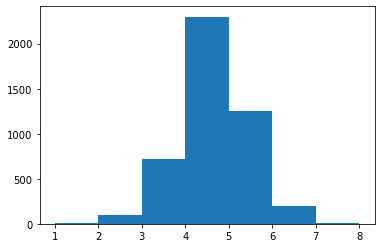

In [46]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [13]:
def uniform(R, x):
    if R == N:
        return 8
    return x

I = [-1 for i in range(N)]
for i in range(2, 9):
    
    S = []
    for u in range(N):
        if I[u] == -1:
            S.append(u)
    
    iters = simulate_func(T, W, lambda x: uniform(x, i), 743, S)
    for j in range(len(iters)):
        if iters[j] <= 5:
            I[S[j]] = i
    print("\n\n##########################################################################\n\n\n")

Result 0: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4: 9    acc: 9.0    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 5: 8    acc: 8.833333333333334    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 6: 8    acc: 8.714285714285714    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 7: 8    acc: 8.625    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 8: 8    acc: 8.555555555555555    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 9: 8    acc: 8.5    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 10: 8    acc: 8.454545454545455    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 11: 8    acc: 8.416666666666666    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 12: 8    acc: 8.384615384615385    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 13: 8    acc: 8.357142857142858    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 14: 1    acc: 7.866666666666666    ks: [8]
Result 15: 1    acc: 7.4375    ks: [8]
Result 1

Result 120: 8    acc: 7.909090909090909    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 121: 7    acc: 7.901639344262295    ks: [8, 2, 2, 2, 2, 2, 2]
Result 122: 8    acc: 7.902439024390244    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 123: 8    acc: 7.903225806451613    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 124: 9    acc: 7.912    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 125: 8    acc: 7.912698412698413    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 126: 9    acc: 7.921259842519685    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 127: 9    acc: 7.9296875    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 128: 9    acc: 7.937984496124031    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 129: 9    acc: 7.946153846153846    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 130: 9    acc: 7.9541984732824424    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 131: 9    acc: 7.962121212121212    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 132: 8    acc: 7.962406015037594    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 133: 9    acc: 7.970149253731344    ks: [8, 2, 2, 2, 2, 2,

Result 236: 7    acc: 7.915611814345992    ks: [8, 2, 2, 2, 2, 2, 2]
Result 237: 7    acc: 7.911764705882353    ks: [8, 2, 2, 2, 2, 2, 2]
Result 238: 6    acc: 7.903765690376569    ks: [8, 2, 2, 2, 2, 2]
Result 239: 9    acc: 7.908333333333333    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 240: 7    acc: 7.904564315352697    ks: [8, 2, 2, 2, 2, 2, 2]
Result 241: 7    acc: 7.900826446280992    ks: [8, 2, 2, 2, 2, 2, 2]
Result 242: 4    acc: 7.88477366255144    ks: [8, 2, 2, 2]
Result 243: 8    acc: 7.885245901639344    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 244: 8    acc: 7.885714285714286    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 245: 10    acc: 7.894308943089431    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 246: 7    acc: 7.890688259109312    ks: [8, 2, 2, 2, 2, 2, 2]
Result 247: 7    acc: 7.887096774193548    ks: [8, 2, 2, 2, 2, 2, 2]
Result 248: 4    acc: 7.871485943775101    ks: [8, 2, 2, 2]
Result 249: 8    acc: 7.872    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 250: 8    acc: 7.872509960159363    

Result 362: 8    acc: 7.37465564738292    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 363: 8    acc: 7.376373626373627    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 364: 8    acc: 7.3780821917808215    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 365: 8    acc: 7.379781420765028    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 366: 8    acc: 7.381471389645776    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 367: 8    acc: 7.383152173913044    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 368: 8    acc: 7.384823848238482    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 369: 8    acc: 7.386486486486486    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 370: 8    acc: 7.388140161725067    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 371: 8    acc: 7.389784946236559    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 372: 8    acc: 7.39142091152815    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 373: 8    acc: 7.393048128342246    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 374: 8    acc: 7.394666666666667    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 375: 8    acc: 7.3962765957446805    ks: [8, 2, 2, 2, 2, 2

Result 486: 8    acc: 7.252566735112937    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 487: 7    acc: 7.252049180327869    ks: [8, 2, 2, 2, 2, 2, 2]
Result 488: 7    acc: 7.251533742331288    ks: [8, 2, 2, 2, 2, 2, 2]
Result 489: 11    acc: 7.259183673469388    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 490: 8    acc: 7.260692464358452    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 491: 8    acc: 7.262195121951219    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 492: 8    acc: 7.26369168356998    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 493: 8    acc: 7.265182186234818    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 494: 8    acc: 7.266666666666667    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 495: 7    acc: 7.266129032258065    ks: [8, 2, 2, 2, 2, 2, 2]
Result 496: 7    acc: 7.26559356136821    ks: [8, 2, 2, 2, 2, 2, 2]
Result 497: 7    acc: 7.265060240963855    ks: [8, 2, 2, 2, 2, 2, 2]
Result 498: 6    acc: 7.2625250501002006    ks: [8, 2, 2, 2, 2, 2]
Result 499: 8    acc: 7.264    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 500: 7   

Result 603: 8    acc: 7.380794701986755    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 604: 8    acc: 7.381818181818182    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 605: 9    acc: 7.384488448844884    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 606: 8    acc: 7.385502471169687    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 607: 9    acc: 7.3881578947368425    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 608: 9    acc: 7.390804597701149    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 609: 10    acc: 7.395081967213115    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 610: 8    acc: 7.396072013093289    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 611: 10    acc: 7.400326797385621    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 612: 10    acc: 7.404567699836868    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 613: 8    acc: 7.405537459283388    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 614: 10    acc: 7.409756097560976    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 615: 10    acc: 7.413961038961039    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 616: 8    ac

Result 724: 8    acc: 7.369655172413793    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 725: 8    acc: 7.370523415977962    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 726: 9    acc: 7.372764786795048    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 727: 8    acc: 7.373626373626373    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 728: 9    acc: 7.3758573388203015    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 729: 7    acc: 7.375342465753425    ks: [8, 2, 2, 2, 2, 2, 2]
Result 730: 7    acc: 7.374829001367989    ks: [8, 2, 2, 2, 2, 2, 2]
Result 731: 7    acc: 7.3743169398907105    ks: [8, 2, 2, 2, 2, 2, 2]
Result 732: 7    acc: 7.373806275579809    ks: [8, 2, 2, 2, 2, 2, 2]
Result 733: 8    acc: 7.374659400544959    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 734: 8    acc: 7.375510204081633    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 735: 8    acc: 7.376358695652174    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 736: 8    acc: 7.377204884667571    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 737: 8    acc: 7.378048780487805    ks: [8, 2, 2, 2, 2, 2, 2,

Result 842: 9    acc: 7.3606168446026095    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 843: 9    acc: 7.362559241706161    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 844: 9    acc: 7.364497041420118    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 845: 9    acc: 7.366430260047282    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 846: 9    acc: 7.368358913813459    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 847: 8    acc: 7.369103773584905    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 848: 6    acc: 7.3674911660777385    ks: [8, 2, 2, 2, 2, 2]
Result 849: 9    acc: 7.369411764705882    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 850: 9    acc: 7.371327849588719    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 851: 9    acc: 7.373239436619718    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 852: 9    acc: 7.375146541617819    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 853: 9    acc: 7.377049180327869    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 854: 9    acc: 7.378947368421053    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 855: 7    acc: 7.37850467289

Result 963: 6    acc: 7.3495850622406635    ks: [8, 2, 2, 2, 2, 2]
Result 964: 4    acc: 7.346113989637305    ks: [8, 2, 2, 2]
Result 965: 4    acc: 7.342650103519669    ks: [8, 2, 2, 2]
Result 966: 4    acc: 7.339193381592554    ks: [8, 2, 2, 2]
Result 967: 4    acc: 7.335743801652892    ks: [8, 2, 2, 2]
Result 968: 4    acc: 7.332301341589267    ks: [8, 2, 2, 2]
Result 969: 7    acc: 7.331958762886598    ks: [8, 2, 2, 2, 2, 2, 2]
Result 970: 6    acc: 7.33058702368692    ks: [8, 2, 2, 2, 2, 2]
Result 971: 7    acc: 7.330246913580247    ks: [8, 2, 2, 2, 2, 2, 2]
Result 972: 4    acc: 7.326824254881809    ks: [8, 2, 2, 2]
Result 973: 4    acc: 7.323408624229979    ks: [8, 2, 2, 2]
Result 974: 4    acc: 7.32    ks: [8, 2, 2, 2]
Result 975: 7    acc: 7.319672131147541    ks: [8, 2, 2, 2, 2, 2, 2]
Result 976: 9    acc: 7.321392016376663    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 977: 9    acc: 7.323108384458077    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 978: 7    acc: 7.3227783452502555    

Result 1084: 8    acc: 7.285714285714286    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1085: 9    acc: 7.287292817679558    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1086: 9    acc: 7.28886844526219    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1087: 9    acc: 7.290441176470588    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1088: 9    acc: 7.292011019283747    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1089: 9    acc: 7.293577981651376    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1090: 9    acc: 7.295142071494042    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1091: 9    acc: 7.2967032967032965    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1092: 9    acc: 7.298261665141812    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1093: 9    acc: 7.29981718464351    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1094: 7    acc: 7.299543378995434    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1095: 7    acc: 7.299270072992701    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1096: 7    acc: 7.298997265268915    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1097: 7    acc: 7.298724954

Result 1206: 10    acc: 7.2278376139188065    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1207: 10    acc: 7.2301324503311255    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1208: 10    acc: 7.2324234904880065    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1209: 8    acc: 7.2330578512396695    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1210: 8    acc: 7.233691164327002    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1211: 8    acc: 7.234323432343234    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1212: 7    acc: 7.234130255564716    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1213: 7    acc: 7.233937397034596    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1214: 7    acc: 7.233744855967078    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1215: 7    acc: 7.233552631578948    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1216: 7    acc: 7.2333607230895645    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1217: 7    acc: 7.233169129720854    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1218: 7    acc: 7.232977850697293    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1219: 7    acc: 7.232786885245901    ks

Result 1321: 8    acc: 7.302571860816944    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1322: 8    acc: 7.303099017384731    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1323: 8    acc: 7.303625377643504    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1324: 8    acc: 7.304150943396227    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1325: 8    acc: 7.304675716440422    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1326: 8    acc: 7.305199698568199    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1327: 8    acc: 7.305722891566265    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1328: 8    acc: 7.306245297215952    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1329: 7    acc: 7.306015037593985    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1330: 7    acc: 7.305785123966942    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1331: 7    acc: 7.305555555555555    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1332: 8    acc: 7.306076519129783    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1333: 8    acc: 7.306596701649175    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1334: 8    acc: 7.307116104868914    ks: [8, 2, 2, 2,

Result 1442: 7    acc: 7.296604296604297    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1443: 7    acc: 7.296398891966759    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1444: 7    acc: 7.296193771626298    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1445: 7    acc: 7.295988934993084    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1446: 7    acc: 7.295784381478922    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1447: 8    acc: 7.296270718232044    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1448: 8    acc: 7.296756383712905    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1449: 7    acc: 7.296551724137931    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1450: 7    acc: 7.296347346657478    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1451: 7    acc: 7.296143250688705    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1452: 7    acc: 7.295939435650379    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1453: 7    acc: 7.295735900962861    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1454: 7    acc: 7.29553264604811    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1455: 7    acc: 7.295329670329671    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1456: 7 

Result 1557: 7    acc: 7.311296534017972    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1558: 7    acc: 7.3110968569595896    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1559: 7    acc: 7.310897435897436    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1560: 9    acc: 7.311979500320308    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1561: 9    acc: 7.313060179257362    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1562: 7    acc: 7.312859884836852    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1563: 6    acc: 7.312020460358056    ks: [8, 2, 2, 2, 2, 2]
Result 1564: 6    acc: 7.311182108626198    ks: [8, 2, 2, 2, 2, 2]
Result 1565: 7    acc: 7.310983397190293    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1566: 7    acc: 7.310784939374601    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1567: 7    acc: 7.310586734693878    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1568: 8    acc: 7.311026131293818    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1569: 12    acc: 7.314012738853503    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1570: 13    acc: 7.317632081476766    ks: [8, 2, 2, 2, 2,

Result 1671: 7    acc: 7.339114832535885    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1672: 7    acc: 7.338912133891213    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1673: 7    acc: 7.338709677419355    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1674: 8    acc: 7.33910447761194    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1675: 7    acc: 7.3389021479713605    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1676: 9    acc: 7.339892665474061    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1677: 9    acc: 7.340882002383791    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1678: 8    acc: 7.341274568195354    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1679: 8    acc: 7.341666666666667    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1680: 8    acc: 7.342058298631767    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1681: 6    acc: 7.341260404280618    ks: [8, 2, 2, 2, 2, 2]
Result 1682: 6    acc: 7.340463458110517    ks: [8, 2, 2, 2, 2, 2]
Result 1683: 7    acc: 7.340261282660332    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1684: 7    acc: 7.3400593471810085    ks: [8, 2, 2, 2, 2, 2, 2]
R

Result 1784: 9    acc: 7.389915966386555    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1785: 9    acc: 7.3908174692049275    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1786: 10    acc: 7.392277560156687    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1787: 10    acc: 7.3937360178970915    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 1788: 6    acc: 7.3929569591950814    ks: [8, 2, 2, 2, 2, 2]
Result 1789: 6    acc: 7.39217877094972    ks: [8, 2, 2, 2, 2, 2]
Result 1790: 6    acc: 7.39140145170296    ks: [8, 2, 2, 2, 2, 2]
Result 1791: 6    acc: 7.390625    ks: [8, 2, 2, 2, 2, 2]
Result 1792: 6    acc: 7.389849414389292    ks: [8, 2, 2, 2, 2, 2]
Result 1793: 8    acc: 7.390189520624303    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1794: 6    acc: 7.38941504178273    ks: [8, 2, 2, 2, 2, 2]
Result 1795: 8    acc: 7.389755011135858    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1796: 7    acc: 7.3895381190873675    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1797: 7    acc: 7.389321468298109    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1

Result 1898: 7    acc: 7.412322274881516    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1899: 7    acc: 7.412105263157895    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1900: 7    acc: 7.4118884797475015    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1901: 7    acc: 7.4116719242902205    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1902: 7    acc: 7.411455596426695    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1903: 7    acc: 7.411239495798319    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1904: 7    acc: 7.411023622047244    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1905: 8    acc: 7.411332633788038    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1906: 7    acc: 7.411116937598322    ks: [8, 2, 2, 2, 2, 2, 2]
Result 1907: 8    acc: 7.411425576519916    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1908: 8    acc: 7.4117338920900995    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1909: 8    acc: 7.4120418848167535    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1910: 8    acc: 7.412349555206698    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 1911: 8    acc: 7.41265690376569    ks: [8, 2, 2, 2, 2, 2, 2, 2]

Result 2017: 8    acc: 7.425668979187314    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2018: 8    acc: 7.425953442298168    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2019: 8    acc: 7.426237623762376    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2020: 8    acc: 7.426521523998021    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2021: 8    acc: 7.426805143422354    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2022: 8    acc: 7.427088482451804    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2023: 8    acc: 7.4273715415019765    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2024: 8    acc: 7.427654320987655    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2025: 7    acc: 7.427443237907206    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2026: 7    acc: 7.427232363098175    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2027: 7    acc: 7.427021696252465    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2028: 7    acc: 7.4268112370625925    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2029: 7    acc: 7.4266009852216746    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2030: 7    acc: 7.4263909404234365    ks: [8, 2, 2, 2, 2

Result 2132: 6    acc: 7.4360056258790435    ks: [8, 2, 2, 2, 2, 2]
Result 2133: 6    acc: 7.435332708528585    ks: [8, 2, 2, 2, 2, 2]
Result 2134: 6    acc: 7.434660421545668    ks: [8, 2, 2, 2, 2, 2]
Result 2135: 6    acc: 7.433988764044944    ks: [8, 2, 2, 2, 2, 2]
Result 2136: 7    acc: 7.43378568086102    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2137: 6    acc: 7.43311506080449    ks: [8, 2, 2, 2, 2, 2]
Result 2138: 7    acc: 7.43291257597008    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2139: 7    acc: 7.432710280373832    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2140: 7    acc: 7.432508173750584    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2141: 7    acc: 7.432306255835668    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2142: 7    acc: 7.432104526364909    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2143: 8    acc: 7.432369402985074    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2144: 7    acc: 7.432167832167832    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2145: 7    acc: 7.431966449207828    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2146: 7    acc: 7.431765253

Result 2258: 8    acc: 7.32713590084108    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2259: 7    acc: 7.326991150442478    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2260: 7    acc: 7.326846528084918    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2261: 8    acc: 7.327144120247569    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2262: 7    acc: 7.326999558108705    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2263: 8    acc: 7.3272968197879855    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2264: 8    acc: 7.327593818984547    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2265: 8    acc: 7.327890556045896    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2266: 8    acc: 7.328187031318924    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2267: 8    acc: 7.328483245149912    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2268: 7    acc: 7.328338475099162    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2269: 8    acc: 7.3286343612334806    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2270: 8    acc: 7.32892998678996    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2271: 9    acc: 7.329665492957746    ks: [8, 2, 2, 2, 2,

Result 2376: 9    acc: 7.316365166175852    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2377: 9    acc: 7.317073170731708    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2378: 9    acc: 7.317780580075662    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2379: 6    acc: 7.317226890756302    ks: [8, 2, 2, 2, 2, 2]
Result 2380: 5    acc: 7.316253674926501    ks: [8, 2, 2, 2, 2]
Result 2381: 5    acc: 7.315281276238455    ks: [8, 2, 2, 2, 2]
Result 2382: 5    acc: 7.314309693663449    ks: [8, 2, 2, 2, 2]
Result 2383: 5    acc: 7.313338926174497    ks: [8, 2, 2, 2, 2]
Result 2384: 5    acc: 7.312368972746331    ks: [8, 2, 2, 2, 2]
Result 2385: 5    acc: 7.311399832355407    ks: [8, 2, 2, 2, 2]
Result 2386: 5    acc: 7.310431503979891    ks: [8, 2, 2, 2, 2]
Result 2387: 5    acc: 7.309463986599665    ks: [8, 2, 2, 2, 2]
Result 2388: 5    acc: 7.308497279196317    ks: [8, 2, 2, 2, 2]
Result 2389: 5    acc: 7.307531380753138    ks: [8, 2, 2, 2, 2]
Result 2390: 5    acc: 7.306566290255123    ks: [8, 2, 2, 2, 2]
R

Result 2501: 6    acc: 7.231814548361311    ks: [8, 2, 2, 2, 2, 2]
Result 2502: 6    acc: 7.231322413104275    ks: [8, 2, 2, 2, 2, 2]
Result 2503: 6    acc: 7.230830670926518    ks: [8, 2, 2, 2, 2, 2]
Result 2504: 6    acc: 7.2303393213572855    ks: [8, 2, 2, 2, 2, 2]
Result 2505: 6    acc: 7.2298483639265765    ks: [8, 2, 2, 2, 2, 2]
Result 2506: 6    acc: 7.229357798165138    ks: [8, 2, 2, 2, 2, 2]
Result 2507: 6    acc: 7.228867623604466    ks: [8, 2, 2, 2, 2, 2]
Result 2508: 6    acc: 7.228377839776804    ks: [8, 2, 2, 2, 2, 2]
Result 2509: 6    acc: 7.22788844621514    ks: [8, 2, 2, 2, 2, 2]
Result 2510: 6    acc: 7.227399442453206    ks: [8, 2, 2, 2, 2, 2]
Result 2511: 6    acc: 7.226910828025478    ks: [8, 2, 2, 2, 2, 2]
Result 2512: 6    acc: 7.226422602467171    ks: [8, 2, 2, 2, 2, 2]
Result 2513: 6    acc: 7.22593476531424    ks: [8, 2, 2, 2, 2, 2]
Result 2514: 6    acc: 7.22544731610338    ks: [8, 2, 2, 2, 2, 2]
Result 2515: 6    acc: 7.224960254372019    ks: [8, 2, 2, 2, 2,

Result 2624: 8    acc: 7.1866666666666665    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2625: 8    acc: 7.186976389946687    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2626: 8    acc: 7.1872858774267225    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2627: 7    acc: 7.187214611872146    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2628: 7    acc: 7.187143400532522    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2629: 7    acc: 7.187072243346008    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2630: 8    acc: 7.187381223869251    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2631: 8    acc: 7.187689969604863    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2632: 8    acc: 7.187998480820357    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2633: 8    acc: 7.18830675778284    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2634: 7    acc: 7.188235294117647    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2635: 7    acc: 7.188163884673748    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2636: 7    acc: 7.188092529389458    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2637: 8    acc: 7.188400303260045    ks: [8, 2, 2, 2, 2, 2, 2

Result 2742: 8    acc: 7.196135617936566    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2743: 8    acc: 7.196428571428571    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2744: 8    acc: 7.19672131147541    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2745: 9    acc: 7.197378004369993    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2746: 7    acc: 7.197306152165999    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2747: 7    acc: 7.197234352256186    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2748: 7    acc: 7.197162604583485    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2749: 7    acc: 7.197090909090909    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2750: 8    acc: 7.1973827699018535    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2751: 9    acc: 7.198037790697675    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2752: 8    acc: 7.198329095532147    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2753: 8    acc: 7.1986201888162675    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2754: 8    acc: 7.198911070780399    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2755: 8    acc: 7.199201741654572    ks: [8, 2, 2

Result 2859: 7    acc: 7.220979020979021    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2860: 6    acc: 7.220552254456484    ks: [8, 2, 2, 2, 2, 2]
Result 2861: 6    acc: 7.220125786163522    ks: [8, 2, 2, 2, 2, 2]
Result 2862: 6    acc: 7.219699615787635    ks: [8, 2, 2, 2, 2, 2]
Result 2863: 6    acc: 7.2192737430167595    ks: [8, 2, 2, 2, 2, 2]
Result 2864: 6    acc: 7.218848167539267    ks: [8, 2, 2, 2, 2, 2]
Result 2865: 6    acc: 7.218422889043964    ks: [8, 2, 2, 2, 2, 2]
Result 2866: 6    acc: 7.217997907220091    ks: [8, 2, 2, 2, 2, 2]
Result 2867: 6    acc: 7.2175732217573225    ks: [8, 2, 2, 2, 2, 2]
Result 2868: 9    acc: 7.2181944928546535    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 2869: 8    acc: 7.218466898954704    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2870: 7    acc: 7.218390804597701    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2871: 7    acc: 7.218314763231198    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2872: 7    acc: 7.218238774799861    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2873: 7    acc: 7.2181628

Result 2983: 8    acc: 7.195710455764075    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2984: 8    acc: 7.1959798994974875    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2985: 8    acc: 7.196249162759544    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2986: 8    acc: 7.196518245731503    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2987: 7    acc: 7.196452476572959    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2988: 8    acc: 7.19672131147541    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2989: 8    acc: 7.196989966555184    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2990: 8    acc: 7.197258441992645    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2991: 8    acc: 7.197526737967914    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2992: 7    acc: 7.197460741730705    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2993: 8    acc: 7.197728790915163    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2994: 7    acc: 7.197662771285476    ks: [8, 2, 2, 2, 2, 2, 2]
Result 2995: 8    acc: 7.197930574098798    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 2996: 8    acc: 7.198198198198198    ks: [8, 2, 2, 2,

Result 3106: 8    acc: 7.153202446089475    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3107: 7    acc: 7.153153153153153    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3108: 8    acc: 7.153425538758444    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3109: 7    acc: 7.153376205787781    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3110: 9    acc: 7.153969784635166    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3111: 9    acc: 7.1545629820051415    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3112: 9    acc: 7.155155798265339    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3113: 9    acc: 7.155748233782916    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3114: 8    acc: 7.15601926163724    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3115: 8    acc: 7.156290115532734    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3116: 8    acc: 7.15656079563683    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3117: 8    acc: 7.156831302116742    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3118: 9    acc: 7.157422250721385    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3119: 8    acc: 7.157692307692308   

Result 3220: 9    acc: 7.1949705060540206    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3221: 9    acc: 7.195530726256983    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3222: 8    acc: 7.195780328886131    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3223: 7    acc: 7.195719602977667    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3224: 9    acc: 7.196279069767442    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3225: 7    acc: 7.196218226906385    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3226: 8    acc: 7.196467307096374    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3227: 9    acc: 7.197026022304833    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3228: 9    acc: 7.197584391452462    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3229: 9    acc: 7.198142414860681    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3230: 7    acc: 7.198081089445992    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3231: 7    acc: 7.198019801980198    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3232: 7    acc: 7.197958552428085    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3233: 7    acc: 7.1978973407544835    ks

Result 3337: 7    acc: 7.199520671060515    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3338: 7    acc: 7.199460916442049    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3339: 8    acc: 7.199700598802395    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3340: 7    acc: 7.19964082609997    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3341: 9    acc: 7.200179533213644    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3342: 9    acc: 7.20071791803769    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3343: 7    acc: 7.2006578947368425    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3344: 7    acc: 7.200597907324365    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3345: 7    acc: 7.200537955768081    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3346: 7    acc: 7.200478040035853    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3347: 7    acc: 7.2004181600955794    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3348: 7    acc: 7.2003583159151985    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3349: 8    acc: 7.200597014925373    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3350: 7    acc: 7.20053715308863    ks: [8, 2, 2, 2, 2, 2, 2]
Re

Result 3455: 7    acc: 7.216145833333333    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3456: 7    acc: 7.216083309227654    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3457: 7    acc: 7.216020821283979    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3458: 7    acc: 7.215958369470945    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3459: 7    acc: 7.215895953757226    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3460: 8    acc: 7.2161225079456806    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3461: 7    acc: 7.216060080878105    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3462: 8    acc: 7.216286456829339    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3463: 8    acc: 7.216512702078522    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3464: 9    acc: 7.217027417027417    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3465: 9    acc: 7.217541834968263    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3466: 9    acc: 7.218055956158062    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3467: 9    acc: 7.218569780853518    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3468: 9    acc: 7.21908330931104    ks: [8, 2, 2,

Result 3568: 8    acc: 7.242084617539927    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3569: 8    acc: 7.242296918767507    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3570: 8    acc: 7.242509101092131    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3571: 9    acc: 7.243001119820828    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3572: 9    acc: 7.243492863140219    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3573: 9    acc: 7.243984331281477    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3574: 9    acc: 7.244475524475525    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3575: 9    acc: 7.24496644295302    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3576: 8    acc: 7.2451775230640205    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3577: 8    acc: 7.245388485187256    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3578: 8    acc: 7.245599329421626    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3579: 8    acc: 7.245810055865922    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3580: 9    acc: 7.246299916224518    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3581: 9    acc: 7.24678950

Result 3683: 6    acc: 7.259500542888165    ks: [8, 2, 2, 2, 2, 2]
Result 3684: 6    acc: 7.259158751696065    ks: [8, 2, 2, 2, 2, 2]
Result 3685: 6    acc: 7.258817145957678    ks: [8, 2, 2, 2, 2, 2]
Result 3686: 6    acc: 7.258475725522104    ks: [8, 2, 2, 2, 2, 2]
Result 3687: 6    acc: 7.258134490238612    ks: [8, 2, 2, 2, 2, 2]
Result 3688: 6    acc: 7.257793439956628    ks: [8, 2, 2, 2, 2, 2]
Result 3689: 10    acc: 7.258536585365854    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3690: 7    acc: 7.258466540232999    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3691: 11    acc: 7.259479956663055    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Result 3692: 4    acc: 7.258597346330896    ks: [8, 2, 2, 2]
Result 3693: 4    acc: 7.257715213860314    ks: [8, 2, 2, 2]
Result 3694: 4    acc: 7.256833558863329    ks: [8, 2, 2, 2]
Result 3695: 6    acc: 7.2564935064935066    ks: [8, 2, 2, 2, 2, 2]
Result 3696: 6    acc: 7.256153638084934    ks: [8, 2, 2, 2, 2, 2]
Result 3697: 6    acc: 7.255813953488372    ks:

Result 3803: 6    acc: 7.256309148264984    ks: [8, 2, 2, 2, 2, 2]
Result 3804: 6    acc: 7.255978975032852    ks: [8, 2, 2, 2, 2, 2]
Result 3805: 6    acc: 7.2556489753021545    ks: [8, 2, 2, 2, 2, 2]
Result 3806: 6    acc: 7.25531914893617    ks: [8, 2, 2, 2, 2, 2]
Result 3807: 6    acc: 7.254989495798319    ks: [8, 2, 2, 2, 2, 2]
Result 3808: 6    acc: 7.254660015752166    ks: [8, 2, 2, 2, 2, 2]
Result 3809: 6    acc: 7.254330708661417    ks: [8, 2, 2, 2, 2, 2]
Result 3810: 6    acc: 7.254001574389924    ks: [8, 2, 2, 2, 2, 2]
Result 3811: 6    acc: 7.253672612801679    ks: [8, 2, 2, 2, 2, 2]
Result 3812: 6    acc: 7.253343823760818    ks: [8, 2, 2, 2, 2, 2]
Result 3813: 6    acc: 7.253015207131621    ks: [8, 2, 2, 2, 2, 2]
Result 3814: 6    acc: 7.252686762778506    ks: [8, 2, 2, 2, 2, 2]
Result 3815: 6    acc: 7.252358490566038    ks: [8, 2, 2, 2, 2, 2]
Result 3816: 6    acc: 7.252030390358921    ks: [8, 2, 2, 2, 2, 2]
Result 3817: 6    acc: 7.251702462022001    ks: [8, 2, 2, 2, 2

Result 3923: 8    acc: 7.248725790010194    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3924: 7    acc: 7.248662420382166    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3925: 7    acc: 7.2485990830361695    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3926: 7    acc: 7.248535777947542    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3927: 7    acc: 7.24847250509165    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3928: 7    acc: 7.248409264443879    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3929: 7    acc: 7.248346055979644    ks: [8, 2, 2, 2, 2, 2, 2]
Result 3930: 8    acc: 7.248537267870771    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3931: 8    acc: 7.248728382502543    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3932: 8    acc: 7.248919399949148    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3933: 8    acc: 7.249110320284697    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3934: 8    acc: 7.249301143583227    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3935: 8    acc: 7.249491869918699    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 3936: 9    acc: 7.249936499873    ks: [8, 2, 2, 2, 2, 2, 2, 2,

Result 4037: 8    acc: 7.262258543833581    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4038: 8    acc: 7.262441198316415    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4039: 8    acc: 7.262623762376237    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4040: 7    acc: 7.262558772581044    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4041: 7    acc: 7.262493814943097    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4042: 7    acc: 7.262428889438536    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4043: 7    acc: 7.262363996043521    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4044: 7    acc: 7.262299134734239    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4045: 7    acc: 7.262234305486901    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4046: 7    acc: 7.262169508277736    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4047: 7    acc: 7.262104743083004    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4048: 7    acc: 7.262040009878983    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4049: 9    acc: 7.262469135802469    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4050: 7    acc: 7.26240434460627    ks: [8, 2, 2, 2, 2, 2, 2]
Result

Result 4155: 6    acc: 7.274542829643888    ks: [8, 2, 2, 2, 2, 2]
Result 4156: 6    acc: 7.274236228049074    ks: [8, 2, 2, 2, 2, 2]
Result 4157: 6    acc: 7.273929773929774    ks: [8, 2, 2, 2, 2, 2]
Result 4158: 6    acc: 7.27362346717961    ks: [8, 2, 2, 2, 2, 2]
Result 4159: 5    acc: 7.273076923076923    ks: [8, 2, 2, 2, 2]
Result 4160: 5    acc: 7.272530641672675    ks: [8, 2, 2, 2, 2]
Result 4161: 6    acc: 7.2722248918789045    ks: [8, 2, 2, 2, 2, 2]
Result 4162: 6    acc: 7.271919288974297    ks: [8, 2, 2, 2, 2, 2]
Result 4163: 9    acc: 7.272334293948127    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4164: 9    acc: 7.272749099639856    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4165: 5    acc: 7.272203552568411    ks: [8, 2, 2, 2, 2]
Result 4166: 5    acc: 7.271658267338613    ks: [8, 2, 2, 2, 2]
Result 4167: 7    acc: 7.271593090211132    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4168: 7    acc: 7.271527944351163    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4169: 7    acc: 7.271462829736211    ks: [8

Result 4270: 7    acc: 7.294076328728635    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4271: 8    acc: 7.294241573033708    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4272: 7    acc: 7.294172712380061    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4273: 7    acc: 7.294103883949462    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4274: 7    acc: 7.2940350877192985    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4275: 7    acc: 7.293966323666979    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4276: 7    acc: 7.293897591769932    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4277: 7    acc: 7.29382889200561    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4278: 7    acc: 7.293760224351484    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4279: 7    acc: 7.293691588785046    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4280: 7    acc: 7.293622985283812    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4281: 8    acc: 7.2937879495562825    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4282: 8    acc: 7.293952836796638    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4283: 8    acc: 7.294117647058823    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 

Result 4390: 7    acc: 7.290138920519244    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4391: 7    acc: 7.290072859744991    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4392: 7    acc: 7.2900068290462094    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4393: 7    acc: 7.289940828402367    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4394: 7    acc: 7.289874857792946    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4395: 7    acc: 7.289808917197452    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4396: 6    acc: 7.28951557880373    ks: [8, 2, 2, 2, 2, 2]
Result 4397: 8    acc: 7.289677125966349    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4398: 8    acc: 7.289838599681746    ks: [8, 2, 2, 2, 2, 2, 2, 2]
Result 4399: 9    acc: 7.290227272727273    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4400: 9    acc: 7.290615769143376    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4401: 9    acc: 7.291004089050432    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4402: 9    acc: 7.291392232568703    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4403: 9    acc: 7.291780199818347    ks: [8, 2, 2, 2, 2,

Result 4503: 7    acc: 7.3050621669627    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4504: 7    acc: 7.304994450610433    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4505: 7    acc: 7.3049267643142475    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4506: 7    acc: 7.304859108054138    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4507: 9    acc: 7.305235137533274    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4508: 7    acc: 7.305167442891994    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4509: 9    acc: 7.305543237250554    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4510: 9    acc: 7.305918864996674    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4511: 9    acc: 7.306294326241135    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4512: 7    acc: 7.306226456902282    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4513: 7    acc: 7.306158617634027    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4514: 7    acc: 7.30609080841639    ks: [8, 2, 2, 2, 2, 2, 2]
Result 4515: 9    acc: 7.306465899025686    ks: [8, 2, 2, 2, 2, 2, 2, 2, 2]
Result 4516: 9    acc: 7.306840823555457    ks: [8, 2, 2, 2, 2

Result 50: 6    acc: 5.933333333333334    ks: [8, 3, 3, 3, 3, 3]
Result 51: 6    acc: 5.934782608695652    ks: [8, 3, 3, 3, 3, 3]
Result 52: 6    acc: 5.9361702127659575    ks: [8, 3, 3, 3, 3, 3]
Result 53: 6    acc: 5.9375    ks: [8, 3, 3, 3, 3, 3]
Result 54: 6    acc: 5.938775510204081    ks: [8, 3, 3, 3, 3, 3]
Result 55: 5    acc: 5.92    ks: [8, 3, 3, 3, 3]
Result 56: 5    acc: 5.901960784313726    ks: [8, 3, 3, 3, 3]
Result 57: 6    acc: 5.903846153846154    ks: [8, 3, 3, 3, 3, 3]
Result 58: 6    acc: 5.90566037735849    ks: [8, 3, 3, 3, 3, 3]
Result 59: 6    acc: 5.907407407407407    ks: [8, 3, 3, 3, 3, 3]
Result 60: 5    acc: 5.890909090909091    ks: [8, 3, 3, 3, 3]
Result 61: 6    acc: 5.892857142857143    ks: [8, 3, 3, 3, 3, 3]
Result 62: 6    acc: 5.894736842105263    ks: [8, 3, 3, 3, 3, 3]
Result 63: 5    acc: 5.879310344827586    ks: [8, 3, 3, 3, 3]
Result 64: 6    acc: 5.88135593220339    ks: [8, 3, 3, 3, 3, 3]
Result 65: 6    acc: 5.883333333333334    ks: [8, 3, 3, 3, 3, 

Result 190: 6    acc: 5.937853107344632    ks: [8, 3, 3, 3, 3, 3]
Result 191: 6    acc: 5.938202247191011    ks: [8, 3, 3, 3, 3, 3]
Result 192: 6    acc: 5.93854748603352    ks: [8, 3, 3, 3, 3, 3]
Result 193: 6    acc: 5.938888888888889    ks: [8, 3, 3, 3, 3, 3]
Result 194: 6    acc: 5.939226519337017    ks: [8, 3, 3, 3, 3, 3]
Result 195: 6    acc: 5.93956043956044    ks: [8, 3, 3, 3, 3, 3]
Result 196: 6    acc: 5.939890710382514    ks: [8, 3, 3, 3, 3, 3]
Result 197: 6    acc: 5.940217391304348    ks: [8, 3, 3, 3, 3, 3]
Result 198: 5    acc: 5.935135135135135    ks: [8, 3, 3, 3, 3]
Result 199: 5    acc: 5.93010752688172    ks: [8, 3, 3, 3, 3]
Result 200: 5    acc: 5.925133689839572    ks: [8, 3, 3, 3, 3]
Result 201: 5    acc: 5.920212765957447    ks: [8, 3, 3, 3, 3]
Result 202: 5    acc: 5.915343915343915    ks: [8, 3, 3, 3, 3]
Result 203: 6    acc: 5.91578947368421    ks: [8, 3, 3, 3, 3, 3]
Result 204: 4    acc: 5.9057591623036645    ks: [8, 3, 3, 3]
Result 205: 4    acc: 5.8958333333

Result 371: 6    acc: 5.811688311688312    ks: [8, 3, 3, 3, 3, 3]
Result 372: 6    acc: 5.8122977346278315    ks: [8, 3, 3, 3, 3, 3]
Result 373: 6    acc: 5.812903225806451    ks: [8, 3, 3, 3, 3, 3]
Result 374: 6    acc: 5.813504823151125    ks: [8, 3, 3, 3, 3, 3]
Result 375: 6    acc: 5.814102564102564    ks: [8, 3, 3, 3, 3, 3]
Result 376: 6    acc: 5.814696485623003    ks: [8, 3, 3, 3, 3, 3]
Result 377: 6    acc: 5.8152866242038215    ks: [8, 3, 3, 3, 3, 3]
Result 378: 6    acc: 5.815873015873016    ks: [8, 3, 3, 3, 3, 3]
Result 381: 6    acc: 5.8164556962025316    ks: [8, 3, 3, 3, 3, 3]
Result 382: 6    acc: 5.817034700315458    ks: [8, 3, 3, 3, 3, 3]
Result 385: 7    acc: 5.820754716981132    ks: [8, 3, 3, 3, 3, 3, 3]
Result 387: 6    acc: 5.821316614420063    ks: [8, 3, 3, 3, 3, 3]
Result 390: 5    acc: 5.81875    ks: [8, 3, 3, 3, 3]
Result 395: 7    acc: 5.822429906542056    ks: [8, 3, 3, 3, 3, 3, 3]
Result 396: 6    acc: 5.8229813664596275    ks: [8, 3, 3, 3, 3, 3]
Result 397: 6

Result 531: 6    acc: 5.792626728110599    ks: [8, 3, 3, 3, 3, 3]
Result 532: 5    acc: 5.7908045977011495    ks: [8, 3, 3, 3, 3]
Result 533: 5    acc: 5.7889908256880735    ks: [8, 3, 3, 3, 3]
Result 534: 5    acc: 5.787185354691076    ks: [8, 3, 3, 3, 3]
Result 535: 6    acc: 5.787671232876712    ks: [8, 3, 3, 3, 3, 3]
Result 536: 6    acc: 5.788154897494305    ks: [8, 3, 3, 3, 3, 3]
Result 537: 4    acc: 5.784090909090909    ks: [8, 3, 3, 3]
Result 538: 5    acc: 5.782312925170068    ks: [8, 3, 3, 3, 3]
Result 539: 5    acc: 5.780542986425339    ks: [8, 3, 3, 3, 3]
Result 540: 6    acc: 5.781038374717833    ks: [8, 3, 3, 3, 3, 3]
Result 541: 6    acc: 5.781531531531532    ks: [8, 3, 3, 3, 3, 3]
Result 542: 5    acc: 5.7797752808988765    ks: [8, 3, 3, 3, 3]
Result 543: 6    acc: 5.780269058295964    ks: [8, 3, 3, 3, 3, 3]
Result 544: 5    acc: 5.778523489932886    ks: [8, 3, 3, 3, 3]
Result 545: 6    acc: 5.779017857142857    ks: [8, 3, 3, 3, 3, 3]
Result 546: 6    acc: 5.7795100222

Result 660: 4    acc: 5.709964412811388    ks: [8, 3, 3, 3]
Result 661: 4    acc: 5.706927175843695    ks: [8, 3, 3, 3]
Result 662: 4    acc: 5.703900709219858    ks: [8, 3, 3, 3]
Result 663: 4    acc: 5.700884955752213    ks: [8, 3, 3, 3]
Result 664: 4    acc: 5.6978798586572434    ks: [8, 3, 3, 3]
Result 665: 5    acc: 5.696649029982363    ks: [8, 3, 3, 3, 3]
Result 666: 4    acc: 5.693661971830986    ks: [8, 3, 3, 3]
Result 667: 4    acc: 5.690685413005272    ks: [8, 3, 3, 3]
Result 668: 4    acc: 5.687719298245614    ks: [8, 3, 3, 3]
Result 669: 4    acc: 5.684763572679509    ks: [8, 3, 3, 3]
Result 670: 4    acc: 5.681818181818182    ks: [8, 3, 3, 3]
Result 671: 5    acc: 5.680628272251309    ks: [8, 3, 3, 3, 3]
Result 672: 4    acc: 5.677700348432055    ks: [8, 3, 3, 3]
Result 673: 4    acc: 5.6747826086956525    ks: [8, 3, 3, 3]
Result 674: 4    acc: 5.671875    ks: [8, 3, 3, 3]
Result 675: 4    acc: 5.66897746967071    ks: [8, 3, 3, 3]
Result 676: 5    acc: 5.6678200692041525  

Result 802: 6    acc: 5.617604617604617    ks: [8, 3, 3, 3, 3, 3]
Result 803: 5    acc: 5.61671469740634    ks: [8, 3, 3, 3, 3]
Result 805: 7    acc: 5.618705035971223    ks: [8, 3, 3, 3, 3, 3, 3]
Result 806: 6    acc: 5.619252873563219    ks: [8, 3, 3, 3, 3, 3]
Result 807: 5    acc: 5.618364418938307    ks: [8, 3, 3, 3, 3]
Result 808: 6    acc: 5.6189111747851    ks: [8, 3, 3, 3, 3, 3]
Result 809: 5    acc: 5.618025751072961    ks: [8, 3, 3, 3, 3]
Result 811: 4    acc: 5.615714285714286    ks: [8, 3, 3, 3]
Result 812: 4    acc: 5.6134094151212555    ks: [8, 3, 3, 3]
Result 813: 4    acc: 5.611111111111111    ks: [8, 3, 3, 3]
Result 814: 6    acc: 5.611664295874823    ks: [8, 3, 3, 3, 3, 3]
Result 815: 6    acc: 5.612215909090909    ks: [8, 3, 3, 3, 3, 3]
Result 816: 4    acc: 5.609929078014185    ks: [8, 3, 3, 3]
Result 821: 6    acc: 5.610481586402266    ks: [8, 3, 3, 3, 3, 3]
Result 822: 5    acc: 5.60961810466761    ks: [8, 3, 3, 3, 3]
Result 823: 5    acc: 5.608757062146893    ks:

Result 941: 6    acc: 5.552855407047388    ks: [8, 3, 3, 3, 3, 3]
Result 942: 6    acc: 5.553398058252427    ks: [8, 3, 3, 3, 3, 3]
Result 943: 5    acc: 5.552727272727273    ks: [8, 3, 3, 3, 3]
Result 945: 5    acc: 5.552058111380146    ks: [8, 3, 3, 3, 3]
Result 946: 5    acc: 5.551390568319226    ks: [8, 3, 3, 3, 3]
Result 947: 6    acc: 5.5519323671497585    ks: [8, 3, 3, 3, 3, 3]
Result 948: 5    acc: 5.5512665862484925    ks: [8, 3, 3, 3, 3]
Result 949: 5    acc: 5.550602409638554    ks: [8, 3, 3, 3, 3]
Result 950: 6    acc: 5.551143200962696    ks: [8, 3, 3, 3, 3, 3]
Result 952: 6    acc: 5.5516826923076925    ks: [8, 3, 3, 3, 3, 3]
Result 953: 4    acc: 5.549819927971188    ks: [8, 3, 3, 3]
Result 954: 4    acc: 5.547961630695443    ks: [8, 3, 3, 3]
Result 955: 4    acc: 5.546107784431138    ks: [8, 3, 3, 3]
Result 956: 4    acc: 5.544258373205742    ks: [8, 3, 3, 3]
Result 957: 4    acc: 5.542413381123058    ks: [8, 3, 3, 3]
Result 958: 4    acc: 5.540572792362768    ks: [8, 3

Result 1088: 6    acc: 5.490566037735849    ks: [8, 3, 3, 3, 3, 3]
Result 1089: 6    acc: 5.491099476439791    ks: [8, 3, 3, 3, 3, 3]
Result 1090: 6    acc: 5.49163179916318    ks: [8, 3, 3, 3, 3, 3]
Result 1091: 6    acc: 5.492163009404389    ks: [8, 3, 3, 3, 3, 3]
Result 1092: 6    acc: 5.492693110647181    ks: [8, 3, 3, 3, 3, 3]
Result 1093: 6    acc: 5.4932221063607924    ks: [8, 3, 3, 3, 3, 3]
Result 1094: 5    acc: 5.492708333333334    ks: [8, 3, 3, 3, 3]
Result 1095: 5    acc: 5.492195629552549    ks: [8, 3, 3, 3, 3]
Result 1096: 5    acc: 5.491683991683992    ks: [8, 3, 3, 3, 3]
Result 1097: 5    acc: 5.491173416407062    ks: [8, 3, 3, 3, 3]
Result 1098: 5    acc: 5.490663900414938    ks: [8, 3, 3, 3, 3]
Result 1099: 5    acc: 5.490155440414508    ks: [8, 3, 3, 3, 3]
Result 1100: 6    acc: 5.490683229813665    ks: [8, 3, 3, 3, 3, 3]
Result 1101: 5    acc: 5.490175801447776    ks: [8, 3, 3, 3, 3]
Result 1102: 6    acc: 5.490702479338843    ks: [8, 3, 3, 3, 3, 3]
Result 1103: 5  

Result 1249: 7    acc: 5.4865864939870495    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1250: 7    acc: 5.487985212569316    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1251: 6    acc: 5.4884579870729455    ks: [8, 3, 3, 3, 3, 3]
Result 1252: 6    acc: 5.488929889298893    ks: [8, 3, 3, 3, 3, 3]
Result 1253: 6    acc: 5.489400921658986    ks: [8, 3, 3, 3, 3, 3]
Result 1254: 6    acc: 5.489871086556169    ks: [8, 3, 3, 3, 3, 3]
Result 1255: 5    acc: 5.4894204231830726    ks: [8, 3, 3, 3, 3]
Result 1256: 5    acc: 5.488970588235294    ks: [8, 3, 3, 3, 3]
Result 1257: 5    acc: 5.48852157943067    ks: [8, 3, 3, 3, 3]
Result 1258: 5    acc: 5.488073394495413    ks: [8, 3, 3, 3, 3]
Result 1259: 5    acc: 5.487626031164069    ks: [8, 3, 3, 3, 3]
Result 1260: 5    acc: 5.487179487179487    ks: [8, 3, 3, 3, 3]
Result 1261: 5    acc: 5.486733760292772    ks: [8, 3, 3, 3, 3]
Result 1262: 5    acc: 5.486288848263254    ks: [8, 3, 3, 3, 3]
Result 1263: 6    acc: 5.48675799086758    ks: [8, 3, 3, 3, 3, 3]
Result 1264:

Result 1377: 5    acc: 5.483015741507871    ks: [8, 3, 3, 3, 3]
Result 1378: 5    acc: 5.482615894039735    ks: [8, 3, 3, 3, 3]
Result 1379: 5    acc: 5.482216708023159    ks: [8, 3, 3, 3, 3]
Result 1380: 5    acc: 5.4818181818181815    ks: [8, 3, 3, 3, 3]
Result 1381: 5    acc: 5.481420313790256    ks: [8, 3, 3, 3, 3]
Result 1382: 5    acc: 5.481023102310231    ks: [8, 3, 3, 3, 3]
Result 1383: 5    acc: 5.480626545754328    ks: [8, 3, 3, 3, 3]
Result 1384: 5    acc: 5.480230642504119    ks: [8, 3, 3, 3, 3]
Result 1385: 5    acc: 5.479835390946502    ks: [8, 3, 3, 3, 3]
Result 1386: 5    acc: 5.479440789473684    ks: [8, 3, 3, 3, 3]
Result 1387: 5    acc: 5.479046836483155    ks: [8, 3, 3, 3, 3]
Result 1388: 6    acc: 5.4794745484400655    ks: [8, 3, 3, 3, 3, 3]
Result 1389: 6    acc: 5.479901558654635    ks: [8, 3, 3, 3, 3, 3]
Result 1390: 7    acc: 5.481147540983606    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1391: 6    acc: 5.481572481572481    ks: [8, 3, 3, 3, 3, 3]
Result 1392: 7    acc: 

Result 1514: 6    acc: 5.479369842460615    ks: [8, 3, 3, 3, 3, 3]
Result 1515: 5    acc: 5.4790104947526235    ks: [8, 3, 3, 3, 3]
Result 1516: 5    acc: 5.478651685393259    ks: [8, 3, 3, 3, 3]
Result 1517: 6    acc: 5.479041916167665    ks: [8, 3, 3, 3, 3, 3]
Result 1518: 6    acc: 5.479431563201197    ks: [8, 3, 3, 3, 3, 3]
Result 1519: 6    acc: 5.479820627802691    ks: [8, 3, 3, 3, 3, 3]
Result 1520: 6    acc: 5.480209111277072    ks: [8, 3, 3, 3, 3, 3]
Result 1521: 6    acc: 5.480597014925373    ks: [8, 3, 3, 3, 3, 3]
Result 1522: 6    acc: 5.480984340044743    ks: [8, 3, 3, 3, 3, 3]
Result 1523: 7    acc: 5.482116244411326    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1524: 7    acc: 5.483246463142219    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1525: 7    acc: 5.484375    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1526: 6    acc: 5.484758364312268    ks: [8, 3, 3, 3, 3, 3]
Result 1527: 6    acc: 5.485141158989599    ks: [8, 3, 3, 3, 3, 3]
Result 1528: 6    acc: 5.485523385300668    ks: [8, 3, 3, 3, 3, 3]


Result 1643: 6    acc: 5.478112175102599    ks: [8, 3, 3, 3, 3, 3]
Result 1644: 5    acc: 5.477785372522215    ks: [8, 3, 3, 3, 3]
Result 1645: 6    acc: 5.478142076502732    ks: [8, 3, 3, 3, 3, 3]
Result 1646: 7    acc: 5.479180887372014    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1647: 7    acc: 5.4802182810368345    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1648: 5    acc: 5.479890933878664    ks: [8, 3, 3, 3, 3]
Result 1649: 6    acc: 5.480245231607629    ks: [8, 3, 3, 3, 3, 3]
Result 1650: 6    acc: 5.480599046970728    ks: [8, 3, 3, 3, 3, 3]
Result 1651: 6    acc: 5.480952380952381    ks: [8, 3, 3, 3, 3, 3]
Result 1652: 6    acc: 5.4813052345343305    ks: [8, 3, 3, 3, 3, 3]
Result 1653: 6    acc: 5.481657608695652    ks: [8, 3, 3, 3, 3, 3]
Result 1654: 7    acc: 5.482688391038696    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1655: 6    acc: 5.4830393487109905    ks: [8, 3, 3, 3, 3, 3]
Result 1656: 6    acc: 5.483389830508474    ks: [8, 3, 3, 3, 3, 3]
Result 1657: 6    acc: 5.483739837398374    ks: [8, 3, 3

Result 1766: 5    acc: 5.514826498422713    ks: [8, 3, 3, 3, 3]
Result 1767: 5    acc: 5.514501891551072    ks: [8, 3, 3, 3, 3]
Result 1768: 5    acc: 5.514177693761814    ks: [8, 3, 3, 3, 3]
Result 1769: 6    acc: 5.51448362720403    ks: [8, 3, 3, 3, 3, 3]
Result 1770: 6    acc: 5.514789175582127    ks: [8, 3, 3, 3, 3, 3]
Result 1771: 6    acc: 5.5150943396226415    ks: [8, 3, 3, 3, 3, 3]
Result 1772: 6    acc: 5.515399120050283    ks: [8, 3, 3, 3, 3, 3]
Result 1773: 6    acc: 5.51570351758794    ks: [8, 3, 3, 3, 3, 3]
Result 1774: 6    acc: 5.516007532956685    ks: [8, 3, 3, 3, 3, 3]
Result 1775: 6    acc: 5.516311166875784    ks: [8, 3, 3, 3, 3, 3]
Result 1776: 6    acc: 5.516614420062696    ks: [8, 3, 3, 3, 3, 3]
Result 1777: 5    acc: 5.516290726817043    ks: [8, 3, 3, 3, 3]
Result 1778: 7    acc: 5.517219787100814    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1779: 7    acc: 5.518147684605757    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1780: 7    acc: 5.519074421513446    ks: [8, 3, 3, 3, 3, 3, 3]

Result 1894: 6    acc: 5.5160537069468765    ks: [8, 3, 3, 3, 3, 3]
Result 1895: 6    acc: 5.516336056009335    ks: [8, 3, 3, 3, 3, 3]
Result 1896: 6    acc: 5.516618075801749    ks: [8, 3, 3, 3, 3, 3]
Result 1897: 6    acc: 5.516899766899767    ks: [8, 3, 3, 3, 3, 3]
Result 1898: 6    acc: 5.517181129877693    ks: [8, 3, 3, 3, 3, 3]
Result 1899: 6    acc: 5.5174621653084985    ks: [8, 3, 3, 3, 3, 3]
Result 1900: 6    acc: 5.517742873763816    ks: [8, 3, 3, 3, 3, 3]
Result 1901: 6    acc: 5.5180232558139535    ks: [8, 3, 3, 3, 3, 3]
Result 1902: 6    acc: 5.518303312027891    ks: [8, 3, 3, 3, 3, 3]
Result 1903: 6    acc: 5.518583042973287    ks: [8, 3, 3, 3, 3, 3]
Result 1904: 6    acc: 5.518862449216483    ks: [8, 3, 3, 3, 3, 3]
Result 1905: 5    acc: 5.518561484918793    ks: [8, 3, 3, 3, 3]
Result 1906: 5    acc: 5.518260869565218    ks: [8, 3, 3, 3, 3]
Result 1907: 5    acc: 5.5179606025492465    ks: [8, 3, 3, 3, 3]
Result 1908: 5    acc: 5.517660683265778    ks: [8, 3, 3, 3, 3]
Res

Result 2019: 6    acc: 5.519586507072906    ks: [8, 3, 3, 3, 3, 3]
Result 2020: 6    acc: 5.519847743338771    ks: [8, 3, 3, 3, 3, 3]
Result 2021: 6    acc: 5.520108695652174    ks: [8, 3, 3, 3, 3, 3]
Result 2022: 6    acc: 5.520369364475829    ks: [8, 3, 3, 3, 3, 3]
Result 2023: 5    acc: 5.520086862106406    ks: [8, 3, 3, 3, 3]
Result 2024: 5    acc: 5.519804666304938    ks: [8, 3, 3, 3, 3]
Result 2025: 6    acc: 5.5200650759219085    ks: [8, 3, 3, 3, 3, 3]
Result 2026: 6    acc: 5.520325203252033    ks: [8, 3, 3, 3, 3, 3]
Result 2027: 6    acc: 5.520585048754063    ks: [8, 3, 3, 3, 3, 3]
Result 2028: 6    acc: 5.520844612885761    ks: [8, 3, 3, 3, 3, 3]
Result 2029: 6    acc: 5.521103896103896    ks: [8, 3, 3, 3, 3, 3]
Result 2030: 6    acc: 5.521362898864251    ks: [8, 3, 3, 3, 3, 3]
Result 2031: 7    acc: 5.522162162162163    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2032: 7    acc: 5.522960561858455    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2033: 5    acc: 5.52267818574514    ks: [8, 3, 3, 3, 3

Result 2148: 6    acc: 5.499237417386883    ks: [8, 3, 3, 3, 3, 3]
Result 2149: 5    acc: 5.498983739837398    ks: [8, 3, 3, 3, 3]
Result 2150: 4    acc: 5.498222447943118    ks: [8, 3, 3, 3]
Result 2151: 4    acc: 5.49746192893401    ks: [8, 3, 3, 3]
Result 2152: 7    acc: 5.498224251648909    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2153: 7    acc: 5.498985801217039    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2154: 6    acc: 5.499239736441966    ks: [8, 3, 3, 3, 3, 3]
Result 2155: 6    acc: 5.4994934143870315    ks: [8, 3, 3, 3, 3, 3]
Result 2156: 5    acc: 5.499240506329114    ks: [8, 3, 3, 3, 3]
Result 2157: 5    acc: 5.498987854251012    ks: [8, 3, 3, 3, 3]
Result 2158: 5    acc: 5.4987354577642895    ks: [8, 3, 3, 3, 3]
Result 2159: 5    acc: 5.498483316481294    ks: [8, 3, 3, 3, 3]
Result 2160: 5    acc: 5.498231430015159    ks: [8, 3, 3, 3, 3]
Result 2161: 5    acc: 5.497979797979798    ks: [8, 3, 3, 3, 3]
Result 2162: 5    acc: 5.497728419989904    ks: [8, 3, 3, 3, 3]
Result 2163: 5    acc: 5

Result 2336: 6    acc: 5.508604206500956    ks: [8, 3, 3, 3, 3, 3]
Result 2347: 6    acc: 5.508838987099857    ks: [8, 3, 3, 3, 3, 3]
Result 2348: 6    acc: 5.509073543457498    ks: [8, 3, 3, 3, 3, 3]
Result 2349: 6    acc: 5.509307875894988    ks: [8, 3, 3, 3, 3, 3]
Result 2350: 5    acc: 5.5090648854961835    ks: [8, 3, 3, 3, 3]
Result 2351: 5    acc: 5.508822126847878    ks: [8, 3, 3, 3, 3]
Result 2352: 5    acc: 5.508579599618685    ks: [8, 3, 3, 3, 3]
Result 2353: 6    acc: 5.508813720819438    ks: [8, 3, 3, 3, 3, 3]
Result 2354: 5    acc: 5.508571428571429    ks: [8, 3, 3, 3, 3]
Result 2355: 5    acc: 5.508329366968111    ks: [8, 3, 3, 3, 3]
Result 2356: 5    acc: 5.508087535680304    ks: [8, 3, 3, 3, 3]
Result 2357: 5    acc: 5.507845934379458    ks: [8, 3, 3, 3, 3]
Result 2358: 5    acc: 5.507604562737643    ks: [8, 3, 3, 3, 3]
Result 2359: 5    acc: 5.507363420427553    ks: [8, 3, 3, 3, 3]
Result 2360: 5    acc: 5.507122507122507    ks: [8, 3, 3, 3, 3]
Result 2361: 5    acc: 5

Result 2542: 4    acc: 5.479082321187584    ks: [8, 3, 3, 3]
Result 2543: 5    acc: 5.4788669064748206    ks: [8, 3, 3, 3, 3]
Result 2544: 5    acc: 5.478651685393259    ks: [8, 3, 3, 3, 3]
Result 2545: 6    acc: 5.478885893980234    ks: [8, 3, 3, 3, 3, 3]
Result 2546: 6    acc: 5.479119892231702    ks: [8, 3, 3, 3, 3, 3]
Result 2547: 6    acc: 5.479353680430879    ks: [8, 3, 3, 3, 3, 3]
Result 2548: 6    acc: 5.479587258860476    ks: [8, 3, 3, 3, 3, 3]
Result 2549: 4    acc: 5.478923766816144    ks: [8, 3, 3, 3]
Result 2550: 4    acc: 5.478260869565218    ks: [8, 3, 3, 3]
Result 2551: 6    acc: 5.478494623655914    ks: [8, 3, 3, 3, 3, 3]
Result 2552: 6    acc: 5.47872816838334    ks: [8, 3, 3, 3, 3, 3]
Result 2553: 5    acc: 5.47851387645479    ks: [8, 3, 3, 3, 3]
Result 2554: 5    acc: 5.478299776286353    ks: [8, 3, 3, 3, 3]
Result 2555: 6    acc: 5.478533094812165    ks: [8, 3, 3, 3, 3, 3]
Result 2563: 5    acc: 5.478319177469825    ks: [8, 3, 3, 3, 3]
Result 2564: 6    acc: 5.4785

Result 2706: 4    acc: 5.450488737781556    ks: [8, 3, 3, 3]
Result 2707: 5    acc: 5.450297366185216    ks: [8, 3, 3, 3, 3]
Result 2708: 6    acc: 5.450530785562632    ks: [8, 3, 3, 3, 3, 3]
Result 2709: 5    acc: 5.450339558573854    ks: [8, 3, 3, 3, 3]
Result 2710: 4    acc: 5.449724225710649    ks: [8, 3, 3, 3]
Result 2711: 5    acc: 5.449533502968618    ks: [8, 3, 3, 3, 3]
Result 2712: 5    acc: 5.449342941924544    ks: [8, 3, 3, 3, 3]
Result 2713: 4    acc: 5.448728813559322    ks: [8, 3, 3, 3]
Result 2714: 6    acc: 5.448962304108429    ks: [8, 3, 3, 3, 3, 3]
Result 2715: 5    acc: 5.448772226926334    ks: [8, 3, 3, 3, 3]
Result 2716: 5    acc: 5.448582310622091    ks: [8, 3, 3, 3, 3]
Result 2717: 5    acc: 5.44839255499154    ks: [8, 3, 3, 3, 3]
Result 2718: 4    acc: 5.447780126849894    ks: [8, 3, 3, 3]
Result 2719: 4    acc: 5.447168216398985    ks: [8, 3, 3, 3]
Result 2720: 5    acc: 5.446979298690326    ks: [8, 3, 3, 3, 3]
Result 2721: 5    acc: 5.44679054054054    ks: [8,

Result 2836: 7    acc: 5.4586526825332795    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2837: 7    acc: 5.459274193548387    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2838: 5    acc: 5.459089076985086    ks: [8, 3, 3, 3, 3]
Result 2839: 5    acc: 5.458904109589041    ks: [8, 3, 3, 3, 3]
Result 2840: 5    acc: 5.458719291180024    ks: [8, 3, 3, 3, 3]
Result 2841: 5    acc: 5.458534621578099    ks: [8, 3, 3, 3, 3]
Result 2842: 5    acc: 5.458350100603622    ks: [8, 3, 3, 3, 3]
Result 2843: 5    acc: 5.458165728077232    ks: [8, 3, 3, 3, 3]
Result 2844: 5    acc: 5.457981503819863    ks: [8, 3, 3, 3, 3]
Result 2845: 5    acc: 5.457797427652733    ks: [8, 3, 3, 3, 3]
Result 2846: 5    acc: 5.457613499397349    ks: [8, 3, 3, 3, 3]
Result 2847: 5    acc: 5.457429718875502    ks: [8, 3, 3, 3, 3]
Result 2848: 5    acc: 5.457246085909273    ks: [8, 3, 3, 3, 3]
Result 2849: 5    acc: 5.457062600321027    ks: [8, 3, 3, 3, 3]
Result 2850: 5    acc: 5.456879261933413    ks: [8, 3, 3, 3, 3]
Result 2851: 5    acc: 5.45

Result 2965: 5    acc: 5.4302147239263805    ks: [8, 3, 3, 3, 3]
Result 2966: 5    acc: 5.430049827520123    ks: [8, 3, 3, 3, 3]
Result 2967: 5    acc: 5.429885057471265    ks: [8, 3, 3, 3, 3]
Result 2968: 5    acc: 5.429720413634623    ks: [8, 3, 3, 3, 3]
Result 2969: 5    acc: 5.429555895865238    ks: [8, 3, 3, 3, 3]
Result 2970: 5    acc: 5.42939150401837    ks: [8, 3, 3, 3, 3]
Result 2971: 5    acc: 5.429227237949503    ks: [8, 3, 3, 3, 3]
Result 2972: 5    acc: 5.42906309751434    ks: [8, 3, 3, 3, 3]
Result 2973: 5    acc: 5.428899082568807    ks: [8, 3, 3, 3, 3]
Result 2974: 5    acc: 5.428735192969048    ks: [8, 3, 3, 3, 3]
Result 2975: 5    acc: 5.428571428571429    ks: [8, 3, 3, 3, 3]
Result 2976: 5    acc: 5.428407789232532    ks: [8, 3, 3, 3, 3]
Result 2977: 5    acc: 5.428244274809161    ks: [8, 3, 3, 3, 3]
Result 2978: 5    acc: 5.428080885158336    ks: [8, 3, 3, 3, 3]
Result 2979: 5    acc: 5.4279176201373    ks: [8, 3, 3, 3, 3]
Result 2980: 5    acc: 5.427754479603507   

Result 3142: 6    acc: 5.4484272128749085    ks: [8, 3, 3, 3, 3, 3]
Result 3143: 6    acc: 5.448628884826325    ks: [8, 3, 3, 3, 3, 3]
Result 3144: 6    acc: 5.4488304093567255    ks: [8, 3, 3, 3, 3, 3]
Result 3145: 6    acc: 5.449031786627694    ks: [8, 3, 3, 3, 3, 3]
Result 3146: 6    acc: 5.4492330168005845    ks: [8, 3, 3, 3, 3, 3]
Result 3147: 6    acc: 5.44943410003651    ks: [8, 3, 3, 3, 3, 3]
Result 3148: 6    acc: 5.449635036496351    ks: [8, 3, 3, 3, 3, 3]
Result 3149: 6    acc: 5.449835826340752    ks: [8, 3, 3, 3, 3, 3]
Result 3150: 5    acc: 5.449671772428884    ks: [8, 3, 3, 3, 3]
Result 3151: 5    acc: 5.449507838133431    ks: [8, 3, 3, 3, 3]
Result 3152: 5    acc: 5.449344023323615    ks: [8, 3, 3, 3, 3]
Result 3153: 5    acc: 5.449180327868852    ks: [8, 3, 3, 3, 3]
Result 3154: 6    acc: 5.449380917698471    ks: [8, 3, 3, 3, 3, 3]
Result 3155: 7    acc: 5.4499453949763375    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3156: 7    acc: 5.450509461426492    ks: [8, 3, 3, 3, 3, 3, 3

Result 3272: 4    acc: 5.451973454418442    ks: [8, 3, 3, 3]
Result 3273: 6    acc: 5.452164804469274    ks: [8, 3, 3, 3, 3, 3]
Result 3274: 5    acc: 5.452006980802793    ks: [8, 3, 3, 3, 3]
Result 3275: 5    acc: 5.4518492672714585    ks: [8, 3, 3, 3, 3]
Result 3276: 6    acc: 5.45204046041158    ks: [8, 3, 3, 3, 3, 3]
Result 3277: 6    acc: 5.452231520223152    ks: [8, 3, 3, 3, 3, 3]
Result 3278: 5    acc: 5.452073893342628    ks: [8, 3, 3, 3, 3]
Result 3279: 5    acc: 5.45191637630662    ks: [8, 3, 3, 3, 3]
Result 3280: 5    acc: 5.451758969000348    ks: [8, 3, 3, 3, 3]
Result 3281: 6    acc: 5.451949860724234    ks: [8, 3, 3, 3, 3, 3]
Result 3282: 5    acc: 5.451792551340063    ks: [8, 3, 3, 3, 3]
Result 3283: 5    acc: 5.451635351426583    ks: [8, 3, 3, 3, 3]
Result 3284: 5    acc: 5.451478260869565    ks: [8, 3, 3, 3, 3]
Result 3285: 5    acc: 5.4513212795549375    ks: [8, 3, 3, 3, 3]
Result 3286: 5    acc: 5.451164407368787    ks: [8, 3, 3, 3, 3]
Result 3287: 5    acc: 5.451007

Result 3401: 6    acc: 5.440320962888666    ks: [8, 3, 3, 3, 3, 3]
Result 3402: 6    acc: 5.440508021390374    ks: [8, 3, 3, 3, 3, 3]
Result 3403: 6    acc: 5.440694954894754    ks: [8, 3, 3, 3, 3, 3]
Result 3404: 5    acc: 5.4405477621910485    ks: [8, 3, 3, 3, 3]
Result 3405: 4    acc: 5.440066777963272    ks: [8, 3, 3, 3]
Result 3406: 5    acc: 5.439919893190921    ks: [8, 3, 3, 3, 3]
Result 3407: 6    acc: 5.440106773440107    ks: [8, 3, 3, 3, 3, 3]
Result 3408: 5    acc: 5.439959973315544    ks: [8, 3, 3, 3, 3]
Result 3409: 5    acc: 5.4398132710903635    ks: [8, 3, 3, 3, 3]
Result 3410: 5    acc: 5.439666666666667    ks: [8, 3, 3, 3, 3]
Result 3411: 7    acc: 5.440186604465178    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3412: 7    acc: 5.440706195869421    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3413: 6    acc: 5.440892440892441    ks: [8, 3, 3, 3, 3, 3]
Result 3414: 6    acc: 5.441078561917443    ks: [8, 3, 3, 3, 3, 3]
Result 3415: 7    acc: 5.441597337770383    ks: [8, 3, 3, 3, 3, 3, 3]
Resul

Result 3525: 6    acc: 5.456500802568218    ks: [8, 3, 3, 3, 3, 3]
Result 3526: 6    acc: 5.456675224646983    ks: [8, 3, 3, 3, 3, 3]
Result 3527: 6    acc: 5.456849534809112    ks: [8, 3, 3, 3, 3, 3]
Result 3528: 6    acc: 5.457023733162283    ks: [8, 3, 3, 3, 3, 3]
Result 3529: 6    acc: 5.457197819814043    ks: [8, 3, 3, 3, 3, 3]
Result 3530: 6    acc: 5.457371794871795    ks: [8, 3, 3, 3, 3, 3]
Result 3531: 6    acc: 5.457545658442807    ks: [8, 3, 3, 3, 3, 3]
Result 3532: 6    acc: 5.457719410634208    ks: [8, 3, 3, 3, 3, 3]
Result 3533: 5    acc: 5.457572846621838    ks: [8, 3, 3, 3, 3]
Result 3534: 5    acc: 5.457426376440461    ks: [8, 3, 3, 3, 3]
Result 3535: 5    acc: 5.45728    ks: [8, 3, 3, 3, 3]
Result 3536: 5    acc: 5.457133717210493    ks: [8, 3, 3, 3, 3]
Result 3537: 6    acc: 5.4573073233130796    ks: [8, 3, 3, 3, 3, 3]
Result 3538: 5    acc: 5.457161125319693    ks: [8, 3, 3, 3, 3]
Result 3539: 6    acc: 5.457334611697028    ks: [8, 3, 3, 3, 3, 3]
Result 3540: 5    a

Result 3652: 6    acc: 5.4554149953717985    ks: [8, 3, 3, 3, 3, 3]
Result 3653: 6    acc: 5.455582973473165    ks: [8, 3, 3, 3, 3, 3]
Result 3654: 6    acc: 5.455750847980265    ks: [8, 3, 3, 3, 3, 3]
Result 3655: 6    acc: 5.455918618988902    ks: [8, 3, 3, 3, 3, 3]
Result 3656: 5    acc: 5.4557781201849    ks: [8, 3, 3, 3, 3]
Result 3657: 6    acc: 5.4559457794208255    ks: [8, 3, 3, 3, 3, 3]
Result 3658: 5    acc: 5.455805358792731    ks: [8, 3, 3, 3, 3]
Result 3659: 5    acc: 5.455665024630542    ks: [8, 3, 3, 3, 3]
Result 3660: 5    acc: 5.455524776854417    ks: [8, 3, 3, 3, 3]
Result 3661: 5    acc: 5.455384615384616    ks: [8, 3, 3, 3, 3]
Result 3662: 5    acc: 5.455244540141495    ks: [8, 3, 3, 3, 3]
Result 3663: 6    acc: 5.455412054120541    ks: [8, 3, 3, 3, 3, 3]
Result 3664: 6    acc: 5.45557946510913    ks: [8, 3, 3, 3, 3, 3]
Result 3665: 5    acc: 5.455439459127228    ks: [8, 3, 3, 3, 3]
Result 3666: 5    acc: 5.455299539170507    ks: [8, 3, 3, 3, 3]
Result 3667: 6    ac

Result 3783: 5    acc: 5.445532799050163    ks: [8, 3, 3, 3, 3]
Result 3784: 5    acc: 5.44540059347181    ks: [8, 3, 3, 3, 3]
Result 3785: 5    acc: 5.445268466330465    ks: [8, 3, 3, 3, 3]
Result 3786: 5    acc: 5.445136417556347    ks: [8, 3, 3, 3, 3]
Result 3787: 5    acc: 5.445004447079751    ks: [8, 3, 3, 3, 3]
Result 3788: 5    acc: 5.444872554831061    ks: [8, 3, 3, 3, 3]
Result 3789: 5    acc: 5.444740740740741    ks: [8, 3, 3, 3, 3]
Result 3790: 5    acc: 5.444609004739337    ks: [8, 3, 3, 3, 3]
Result 3791: 5    acc: 5.444477346757477    ks: [8, 3, 3, 3, 3]
Result 3792: 5    acc: 5.444345766725873    ks: [8, 3, 3, 3, 3]
Result 3793: 7    acc: 5.444806155667357    ks: [8, 3, 3, 3, 3, 3, 3]
Result 3794: 5    acc: 5.444674556213018    ks: [8, 3, 3, 3, 3]
Result 3795: 5    acc: 5.444543034605147    ks: [8, 3, 3, 3, 3]
Result 3796: 5    acc: 5.444411590774689    ks: [8, 3, 3, 3, 3]
Result 3797: 5    acc: 5.444280224652675    ks: [8, 3, 3, 3, 3]
Result 3798: 5    acc: 5.4441489361

Result 3912: 5    acc: 5.434086359736917    ks: [8, 3, 3, 3, 3]
Result 3913: 6    acc: 5.434248141795312    ks: [8, 3, 3, 3, 3, 3]
Result 3914: 6    acc: 5.434409831380394    ks: [8, 3, 3, 3, 3, 3]
Result 3915: 5    acc: 5.434285714285714    ks: [8, 3, 3, 3, 3]
Result 3916: 5    acc: 5.43416166809483    ks: [8, 3, 3, 3, 3]
Result 3917: 6    acc: 5.434323243860651    ks: [8, 3, 3, 3, 3, 3]
Result 3918: 5    acc: 5.4341992577790466    ks: [8, 3, 3, 3, 3]
Result 3919: 5    acc: 5.4340753424657535    ks: [8, 3, 3, 3, 3]
Result 3920: 5    acc: 5.4339514978602    ks: [8, 3, 3, 3, 3]
Result 3921: 5    acc: 5.433827723901882    ks: [8, 3, 3, 3, 3]
Result 3922: 5    acc: 5.433704020530368    ks: [8, 3, 3, 3, 3]
Result 3923: 5    acc: 5.433580387685291    ks: [8, 3, 3, 3, 3]
Result 3924: 5    acc: 5.433456825306355    ks: [8, 3, 3, 3, 3]
Result 3925: 5    acc: 5.433333333333334    ks: [8, 3, 3, 3, 3]
Result 3926: 5    acc: 5.433209911706067    ks: [8, 3, 3, 3, 3]
Result 3927: 4    acc: 5.4328018

Result 4040: 6    acc: 5.435862068965517    ks: [8, 3, 3, 3, 3, 3]
Result 4041: 6    acc: 5.436017650303365    ks: [8, 3, 3, 3, 3, 3]
Result 4042: 6    acc: 5.4361731458505655    ks: [8, 3, 3, 3, 3, 3]
Result 4043: 6    acc: 5.43632855567806    ks: [8, 3, 3, 3, 3, 3]
Result 4044: 6    acc: 5.43648387985671    ks: [8, 3, 3, 3, 3, 3]
Result 4045: 6    acc: 5.4366391184573    ks: [8, 3, 3, 3, 3, 3]
Result 4046: 6    acc: 5.436794271550537    ks: [8, 3, 3, 3, 3, 3]
Result 4047: 6    acc: 5.4369493392070485    ks: [8, 3, 3, 3, 3, 3]
Result 4048: 6    acc: 5.437104321497385    ks: [8, 3, 3, 3, 3, 3]
Result 4049: 6    acc: 5.43725921849202    ks: [8, 3, 3, 3, 3, 3]
Result 4050: 6    acc: 5.437414030261348    ks: [8, 3, 3, 3, 3, 3]
Result 4051: 6    acc: 5.437568756875687    ks: [8, 3, 3, 3, 3, 3]
Result 4052: 6    acc: 5.4377233984052795    ks: [8, 3, 3, 3, 3, 3]
Result 4053: 6    acc: 5.437877954920286    ks: [8, 3, 3, 3, 3, 3]
Result 4054: 6    acc: 5.438032426490794    ks: [8, 3, 3, 3, 3, 

Result 4172: 5    acc: 5.4424    ks: [8, 3, 3, 3, 3]
Result 4173: 5    acc: 5.4422820581178355    ks: [8, 3, 3, 3, 3]
Result 4174: 6    acc: 5.4424307036247335    ks: [8, 3, 3, 3, 3, 3]
Result 4175: 5    acc: 5.442312816413536    ks: [8, 3, 3, 3, 3]
Result 4176: 5    acc: 5.442194992008524    ks: [8, 3, 3, 3, 3]
Result 4177: 7    acc: 5.442609853528628    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4178: 7    acc: 5.443024494142705    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4179: 6    acc: 5.443172744210806    ks: [8, 3, 3, 3, 3, 3]
Result 4180: 5    acc: 5.443054816391697    ks: [8, 3, 3, 3, 3]
Result 4181: 5    acc: 5.44293695131684    ks: [8, 3, 3, 3, 3]
Result 4182: 7    acc: 5.4433510638297875    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4183: 7    acc: 5.443764956128689    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4184: 5    acc: 5.443646996278575    ks: [8, 3, 3, 3, 3]
Result 4185: 5    acc: 5.44352909912304    ks: [8, 3, 3, 3, 3]
Result 4186: 5    acc: 5.443411264612115    ks: [8, 3, 3, 3, 3]
Result 4187: 5    ac

Result 4299: 6    acc: 5.450980392156863    ks: [8, 3, 3, 3, 3, 3]
Result 4300: 6    acc: 5.4511220015475885    ks: [8, 3, 3, 3, 3, 3]
Result 4301: 6    acc: 5.451263537906137    ks: [8, 3, 3, 3, 3, 3]
Result 4302: 5    acc: 5.451147202887342    ks: [8, 3, 3, 3, 3]
Result 4303: 5    acc: 5.451030927835052    ks: [8, 3, 3, 3, 3]
Result 4304: 5    acc: 5.450914712702912    ks: [8, 3, 3, 3, 3]
Result 4305: 5    acc: 5.4507985574446165    ks: [8, 3, 3, 3, 3]
Result 4306: 5    acc: 5.450682462013907    ks: [8, 3, 3, 3, 3]
Result 4307: 5    acc: 5.450566426364572    ks: [8, 3, 3, 3, 3]
Result 4308: 5    acc: 5.45045045045045    ks: [8, 3, 3, 3, 3]
Result 4309: 5    acc: 5.450334534225425    ks: [8, 3, 3, 3, 3]
Result 4310: 5    acc: 5.450218677643427    ks: [8, 3, 3, 3, 3]
Result 4311: 5    acc: 5.450102880658436    ks: [8, 3, 3, 3, 3]
Result 4312: 5    acc: 5.4499871432244795    ks: [8, 3, 3, 3, 3]
Result 4313: 5    acc: 5.4498714652956295    ks: [8, 3, 3, 3, 3]
Result 4314: 5    acc: 5.449

Result 4447: 6    acc: 5.444666500124907    ks: [8, 3, 3, 3, 3, 3]
Result 4448: 6    acc: 5.444805194805195    ks: [8, 3, 3, 3, 3, 3]
Result 4449: 6    acc: 5.444943820224719    ks: [8, 3, 3, 3, 3, 3]
Result 4450: 6    acc: 5.445082376435347    ks: [8, 3, 3, 3, 3, 3]
Result 4451: 6    acc: 5.445220863488895    ks: [8, 3, 3, 3, 3, 3]
Result 4452: 6    acc: 5.445359281437126    ks: [8, 3, 3, 3, 3, 3]
Result 4453: 5    acc: 5.44524819156897    ks: [8, 3, 3, 3, 3]
Result 4454: 7    acc: 5.445635910224439    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4455: 7    acc: 5.446023435552231    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4456: 7    acc: 5.446410767696909    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4457: 7    acc: 5.446797906802891    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4458: 7    acc: 5.447184853014449    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4459: 7    acc: 5.447571606475716    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4460: 7    acc: 5.447958167330677    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4461: 7    acc: 5.448344535723177    k

Result 4577: 5    acc: 5.45544794188862    ks: [8, 3, 3, 3, 3]
Result 4578: 5    acc: 5.455337690631808    ks: [8, 3, 3, 3, 3]
Result 4579: 7    acc: 5.455711519845111    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4580: 6    acc: 5.4558432131623515    ks: [8, 3, 3, 3, 3, 3]
Result 4581: 7    acc: 5.456216739235607    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4582: 7    acc: 5.456590084643289    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4583: 5    acc: 5.456479690522244    ks: [8, 3, 3, 3, 3]
Result 4584: 6    acc: 5.456611070824269    ks: [8, 3, 3, 3, 3, 3]
5.456611070824269 8 88407


##########################################################################



Result 0: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 1: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 2: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 3: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4: 6    acc: 5.2    ks: [8, 4, 4, 4, 4, 4]
Result 5: 5    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4]
Result 6: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4

Result 151: 5    acc: 5.070866141732283    ks: [8, 4, 4, 4, 4]
Result 152: 5    acc: 5.0703125    ks: [8, 4, 4, 4, 4]
Result 153: 5    acc: 5.069767441860465    ks: [8, 4, 4, 4, 4]
Result 154: 5    acc: 5.069230769230769    ks: [8, 4, 4, 4, 4]
Result 155: 5    acc: 5.068702290076335    ks: [8, 4, 4, 4, 4]
Result 156: 5    acc: 5.068181818181818    ks: [8, 4, 4, 4, 4]
Result 157: 5    acc: 5.067669172932331    ks: [8, 4, 4, 4, 4]
Result 158: 5    acc: 5.067164179104478    ks: [8, 4, 4, 4, 4]
Result 159: 5    acc: 5.066666666666666    ks: [8, 4, 4, 4, 4]
Result 160: 5    acc: 5.0661764705882355    ks: [8, 4, 4, 4, 4]
Result 166: 5    acc: 5.065693430656935    ks: [8, 4, 4, 4, 4]
Result 173: 5    acc: 5.065217391304348    ks: [8, 4, 4, 4, 4]
Result 177: 5    acc: 5.0647482014388485    ks: [8, 4, 4, 4, 4]
Result 178: 5    acc: 5.064285714285714    ks: [8, 4, 4, 4, 4]
Result 179: 5    acc: 5.0638297872340425    ks: [8, 4, 4, 4, 4]
Result 180: 6    acc: 5.070422535211268    ks: [8, 4, 4, 4, 

Result 446: 5    acc: 5.088803088803089    ks: [8, 4, 4, 4, 4]
Result 460: 5    acc: 5.088461538461538    ks: [8, 4, 4, 4, 4]
Result 461: 5    acc: 5.088122605363985    ks: [8, 4, 4, 4, 4]
Result 462: 5    acc: 5.087786259541985    ks: [8, 4, 4, 4, 4]
Result 464: 5    acc: 5.08745247148289    ks: [8, 4, 4, 4, 4]
Result 466: 5    acc: 5.087121212121212    ks: [8, 4, 4, 4, 4]
Result 470: 5    acc: 5.086792452830188    ks: [8, 4, 4, 4, 4]
Result 473: 4    acc: 5.082706766917293    ks: [8, 4, 4, 4]
Result 474: 5    acc: 5.082397003745318    ks: [8, 4, 4, 4, 4]
Result 475: 5    acc: 5.082089552238806    ks: [8, 4, 4, 4, 4]
Result 476: 5    acc: 5.0817843866171    ks: [8, 4, 4, 4, 4]
Result 477: 5    acc: 5.0814814814814815    ks: [8, 4, 4, 4, 4]
Result 480: 5    acc: 5.081180811808118    ks: [8, 4, 4, 4, 4]
Result 481: 6    acc: 5.084558823529412    ks: [8, 4, 4, 4, 4, 4]
Result 482: 5    acc: 5.084249084249084    ks: [8, 4, 4, 4, 4]
Result 483: 6    acc: 5.087591240875913    ks: [8, 4, 4, 

Result 750: 5    acc: 5.115681233933162    ks: [8, 4, 4, 4, 4]
Result 751: 5    acc: 5.115384615384615    ks: [8, 4, 4, 4, 4]
Result 752: 6    acc: 5.117647058823529    ks: [8, 4, 4, 4, 4, 4]
Result 753: 6    acc: 5.119897959183674    ks: [8, 4, 4, 4, 4, 4]
Result 754: 5    acc: 5.119592875318066    ks: [8, 4, 4, 4, 4]
Result 755: 5    acc: 5.119289340101523    ks: [8, 4, 4, 4, 4]
Result 756: 5    acc: 5.118987341772152    ks: [8, 4, 4, 4, 4]
Result 757: 5    acc: 5.1186868686868685    ks: [8, 4, 4, 4, 4]
Result 758: 5    acc: 5.1183879093199    ks: [8, 4, 4, 4, 4]
Result 759: 5    acc: 5.118090452261306    ks: [8, 4, 4, 4, 4]
Result 760: 6    acc: 5.120300751879699    ks: [8, 4, 4, 4, 4, 4]
Result 761: 6    acc: 5.1225    ks: [8, 4, 4, 4, 4, 4]
Result 767: 5    acc: 5.12219451371571    ks: [8, 4, 4, 4, 4]
Result 768: 5    acc: 5.121890547263682    ks: [8, 4, 4, 4, 4]
Result 772: 5    acc: 5.121588089330025    ks: [8, 4, 4, 4, 4]
Result 775: 5    acc: 5.121287128712871    ks: [8, 4, 4,

Result 1247: 5    acc: 5.136276391554702    ks: [8, 4, 4, 4, 4]
Result 1248: 6    acc: 5.137931034482759    ks: [8, 4, 4, 4, 4, 4]
Result 1249: 6    acc: 5.139579349904397    ks: [8, 4, 4, 4, 4, 4]
Result 1250: 6    acc: 5.141221374045801    ks: [8, 4, 4, 4, 4, 4]
Result 1251: 5    acc: 5.140952380952381    ks: [8, 4, 4, 4, 4]
Result 1252: 5    acc: 5.140684410646388    ks: [8, 4, 4, 4, 4]
Result 1253: 5    acc: 5.140417457305503    ks: [8, 4, 4, 4, 4]
Result 1254: 5    acc: 5.140151515151516    ks: [8, 4, 4, 4, 4]
Result 1263: 6    acc: 5.141776937618148    ks: [8, 4, 4, 4, 4, 4]
Result 1264: 6    acc: 5.143396226415095    ks: [8, 4, 4, 4, 4, 4]
Result 1265: 6    acc: 5.145009416195857    ks: [8, 4, 4, 4, 4, 4]
Result 1266: 6    acc: 5.146616541353383    ks: [8, 4, 4, 4, 4, 4]
Result 1289: 5    acc: 5.146341463414634    ks: [8, 4, 4, 4, 4]
Result 1290: 6    acc: 5.147940074906367    ks: [8, 4, 4, 4, 4, 4]
Result 1291: 6    acc: 5.149532710280374    ks: [8, 4, 4, 4, 4, 4]
Result 1292: 

Result 1600: 4    acc: 5.195685670261941    ks: [8, 4, 4, 4]
Result 1601: 5    acc: 5.195384615384615    ks: [8, 4, 4, 4, 4]
Result 1602: 5    acc: 5.195084485407066    ks: [8, 4, 4, 4, 4]
Result 1603: 5    acc: 5.1947852760736195    ks: [8, 4, 4, 4, 4]
Result 1604: 5    acc: 5.194486983154671    ks: [8, 4, 4, 4, 4]
Result 1605: 5    acc: 5.1941896024464835    ks: [8, 4, 4, 4, 4]
Result 1606: 5    acc: 5.193893129770992    ks: [8, 4, 4, 4, 4]
Result 1607: 5    acc: 5.1935975609756095    ks: [8, 4, 4, 4, 4]
Result 1608: 5    acc: 5.193302891933029    ks: [8, 4, 4, 4, 4]
Result 1609: 5    acc: 5.193009118541034    ks: [8, 4, 4, 4, 4]
Result 1610: 5    acc: 5.1927162367223065    ks: [8, 4, 4, 4, 4]
Result 1611: 5    acc: 5.192424242424242    ks: [8, 4, 4, 4, 4]
Result 1618: 5    acc: 5.19213313161876    ks: [8, 4, 4, 4, 4]
Result 1619: 5    acc: 5.191842900302115    ks: [8, 4, 4, 4, 4]
Result 1620: 5    acc: 5.191553544494721    ks: [8, 4, 4, 4, 4]
Result 1622: 5    acc: 5.191265060240964

Result 1819: 5    acc: 5.197435897435898    ks: [8, 4, 4, 4, 4]
Result 1827: 5    acc: 5.197183098591549    ks: [8, 4, 4, 4, 4]
Result 1828: 4    acc: 5.195652173913044    ks: [8, 4, 4, 4]
Result 1832: 5    acc: 5.195402298850575    ks: [8, 4, 4, 4, 4]
Result 1833: 4    acc: 5.1938775510204085    ks: [8, 4, 4, 4]
Result 1838: 4    acc: 5.192356687898089    ks: [8, 4, 4, 4]
Result 1839: 5    acc: 5.192111959287532    ks: [8, 4, 4, 4, 4]
Result 1841: 5    acc: 5.191867852604829    ks: [8, 4, 4, 4, 4]
Result 1842: 5    acc: 5.191624365482234    ks: [8, 4, 4, 4, 4]
Result 1843: 6    acc: 5.192648922686946    ks: [8, 4, 4, 4, 4, 4]
Result 1844: 5    acc: 5.192405063291139    ks: [8, 4, 4, 4, 4]
Result 1852: 5    acc: 5.192161820480405    ks: [8, 4, 4, 4, 4]
Result 1854: 6    acc: 5.193181818181818    ks: [8, 4, 4, 4, 4, 4]
Result 1855: 6    acc: 5.194199243379571    ks: [8, 4, 4, 4, 4, 4]
Result 1862: 6    acc: 5.19521410579345    ks: [8, 4, 4, 4, 4, 4]
Result 1863: 6    acc: 5.196226415094

Result 2095: 6    acc: 5.185022026431718    ks: [8, 4, 4, 4, 4, 4]
Result 2122: 6    acc: 5.185918591859186    ks: [8, 4, 4, 4, 4, 4]
Result 2148: 4    acc: 5.184615384615385    ks: [8, 4, 4, 4]
Result 2152: 4    acc: 5.18331503841932    ks: [8, 4, 4, 4]
Result 2153: 5    acc: 5.183114035087719    ks: [8, 4, 4, 4, 4]
Result 2154: 5    acc: 5.182913472070099    ks: [8, 4, 4, 4, 4]
Result 2155: 5    acc: 5.182713347921226    ks: [8, 4, 4, 4, 4]
Result 2167: 6    acc: 5.18360655737705    ks: [8, 4, 4, 4, 4, 4]
Result 2168: 6    acc: 5.184497816593886    ks: [8, 4, 4, 4, 4, 4]
Result 2169: 6    acc: 5.185387131952018    ks: [8, 4, 4, 4, 4, 4]
Result 2172: 5    acc: 5.185185185185185    ks: [8, 4, 4, 4, 4]
Result 2173: 5    acc: 5.184983677910773    ks: [8, 4, 4, 4, 4]
Result 2174: 5    acc: 5.184782608695652    ks: [8, 4, 4, 4, 4]
Result 2175: 5    acc: 5.184581976112921    ks: [8, 4, 4, 4, 4]
Result 2176: 5    acc: 5.184381778741866    ks: [8, 4, 4, 4, 4]
Result 2177: 5    acc: 5.18418201

Result 2673: 5    acc: 5.161041465766634    ks: [8, 4, 4, 4, 4]
Result 2676: 5    acc: 5.160886319845857    ks: [8, 4, 4, 4, 4]
Result 2677: 5    acc: 5.160731472569779    ks: [8, 4, 4, 4, 4]
Result 2678: 6    acc: 5.161538461538462    ks: [8, 4, 4, 4, 4, 4]
Result 2679: 5    acc: 5.161383285302594    ks: [8, 4, 4, 4, 4]
Result 2681: 4    acc: 5.160268714011516    ks: [8, 4, 4, 4]
Result 2686: 4    acc: 5.159156279961649    ks: [8, 4, 4, 4]
Result 2687: 5    acc: 5.159003831417625    ks: [8, 4, 4, 4, 4]
Result 2708: 4    acc: 5.157894736842105    ks: [8, 4, 4, 4]
Result 2714: 5    acc: 5.157743785850861    ks: [8, 4, 4, 4, 4]
Result 2723: 6    acc: 5.1585482330468    ks: [8, 4, 4, 4, 4, 4]
Result 2731: 5    acc: 5.158396946564886    ks: [8, 4, 4, 4, 4]
Result 2732: 5    acc: 5.158245948522402    ks: [8, 4, 4, 4, 4]
Result 2733: 5    acc: 5.158095238095238    ks: [8, 4, 4, 4, 4]
Result 2734: 5    acc: 5.157944814462417    ks: [8, 4, 4, 4, 4]
Result 2735: 5    acc: 5.157794676806084    k

Result 3084: 6    acc: 5.12853470437018    ks: [8, 4, 4, 4, 4, 4]
Result 3085: 6    acc: 5.129280821917808    ks: [8, 4, 4, 4, 4, 4]
Result 3086: 6    acc: 5.1300256629597945    ks: [8, 4, 4, 4, 4, 4]
Result 3087: 5    acc: 5.12991452991453    ks: [8, 4, 4, 4, 4]
Result 3088: 5    acc: 5.129803586678053    ks: [8, 4, 4, 4, 4]
Result 3089: 5    acc: 5.129692832764505    ks: [8, 4, 4, 4, 4]
Result 3090: 5    acc: 5.129582267689685    ks: [8, 4, 4, 4, 4]
Result 3091: 5    acc: 5.129471890971039    ks: [8, 4, 4, 4, 4]
Result 3092: 5    acc: 5.129361702127659    ks: [8, 4, 4, 4, 4]
Result 3093: 5    acc: 5.129251700680272    ks: [8, 4, 4, 4, 4]
Result 3094: 6    acc: 5.1299915038232795    ks: [8, 4, 4, 4, 4, 4]
Result 3095: 6    acc: 5.130730050933786    ks: [8, 4, 4, 4, 4, 4]
Result 3096: 6    acc: 5.1314673452078035    ks: [8, 4, 4, 4, 4, 4]
Result 3097: 6    acc: 5.132203389830509    ks: [8, 4, 4, 4, 4, 4]
Result 3098: 6    acc: 5.132938187976292    ks: [8, 4, 4, 4, 4, 4]
Result 3099: 6 

Result 3327: 5    acc: 5.122590593677717    ks: [8, 4, 4, 4, 4]
Result 3328: 5    acc: 5.122496147919877    ks: [8, 4, 4, 4, 4]
Result 3329: 5    acc: 5.122401847575058    ks: [8, 4, 4, 4, 4]
Result 3330: 5    acc: 5.122307692307692    ks: [8, 4, 4, 4, 4]
Result 3335: 5    acc: 5.1222136817832435    ks: [8, 4, 4, 4, 4]
Result 3336: 5    acc: 5.122119815668203    ks: [8, 4, 4, 4, 4]
Result 3337: 4    acc: 5.121258633921719    ks: [8, 4, 4, 4]
Result 3341: 6    acc: 5.1219325153374236    ks: [8, 4, 4, 4, 4, 4]
Result 3342: 5    acc: 5.12183908045977    ks: [8, 4, 4, 4, 4]
Result 3343: 4    acc: 5.120980091883614    ks: [8, 4, 4, 4]
Result 3344: 4    acc: 5.120122417750574    ks: [8, 4, 4, 4]
Result 3345: 4    acc: 5.1192660550458715    ks: [8, 4, 4, 4]
Result 3349: 5    acc: 5.119174942704355    ks: [8, 4, 4, 4, 4]
Result 3357: 4    acc: 5.1183206106870225    ks: [8, 4, 4, 4]
Result 3369: 5    acc: 5.118230358504958    ks: [8, 4, 4, 4, 4]
Result 3370: 5    acc: 5.118140243902439    ks: [

Result 3623: 6    acc: 5.121403508771929    ks: [8, 4, 4, 4, 4, 4]
Result 3624: 6    acc: 5.1220196353436185    ks: [8, 4, 4, 4, 4, 4]
Result 3625: 5    acc: 5.121934127540294    ks: [8, 4, 4, 4, 4]
Result 3626: 6    acc: 5.122549019607843    ks: [8, 4, 4, 4, 4, 4]
Result 3627: 6    acc: 5.123163051084674    ks: [8, 4, 4, 4, 4, 4]
Result 3628: 6    acc: 5.123776223776224    ks: [8, 4, 4, 4, 4, 4]
Result 3629: 5    acc: 5.123689727463312    ks: [8, 4, 4, 4, 4]
Result 3630: 5    acc: 5.123603351955308    ks: [8, 4, 4, 4, 4]
Result 3631: 5    acc: 5.1235170969993025    ks: [8, 4, 4, 4, 4]
Result 3632: 5    acc: 5.123430962343096    ks: [8, 4, 4, 4, 4]
Result 3633: 5    acc: 5.123344947735192    ks: [8, 4, 4, 4, 4]
Result 3634: 5    acc: 5.123259052924791    ks: [8, 4, 4, 4, 4]
Result 3635: 6    acc: 5.1238691718858735    ks: [8, 4, 4, 4, 4, 4]
Result 3636: 5    acc: 5.123783031988873    ks: [8, 4, 4, 4, 4]
Result 3639: 4    acc: 5.123002084781098    ks: [8, 4, 4, 4]
Result 3640: 4    acc:

Result 4018: 6    acc: 5.104113110539846    ks: [8, 4, 4, 4, 4, 4]
Result 4019: 5    acc: 5.104046242774566    ks: [8, 4, 4, 4, 4]
Result 4020: 6    acc: 5.104621309370988    ks: [8, 4, 4, 4, 4, 4]
Result 4027: 5    acc: 5.104554201411161    ks: [8, 4, 4, 4, 4]
Result 4029: 4    acc: 5.1038461538461535    ks: [8, 4, 4, 4]
Result 4030: 4    acc: 5.103139013452915    ks: [8, 4, 4, 4]
Result 4031: 4    acc: 5.102432778489116    ks: [8, 4, 4, 4]
Result 4032: 5    acc: 5.102367242482406    ks: [8, 4, 4, 4, 4]
Result 4033: 5    acc: 5.10230179028133    ks: [8, 4, 4, 4, 4]
Result 4034: 5    acc: 5.10223642172524    ks: [8, 4, 4, 4, 4]
Result 4035: 6    acc: 5.1028097062579825    ks: [8, 4, 4, 4, 4, 4]
Result 4036: 5    acc: 5.102744097000638    ks: [8, 4, 4, 4, 4]
Result 4037: 5    acc: 5.102678571428571    ks: [8, 4, 4, 4, 4]
Result 4038: 5    acc: 5.102613129381772    ks: [8, 4, 4, 4, 4]
Result 4039: 5    acc: 5.102547770700637    ks: [8, 4, 4, 4, 4]
Result 4040: 4    acc: 5.101845957988543

Result 4248: 5    acc: 5.097271648873073    ks: [8, 4, 4, 4, 4]
Result 4249: 5    acc: 5.097213989330172    ks: [8, 4, 4, 4, 4]
Result 4250: 5    acc: 5.097156398104265    ks: [8, 4, 4, 4, 4]
Result 4251: 6    acc: 5.097690941385435    ks: [8, 4, 4, 4, 4, 4]
Result 4252: 5    acc: 5.097633136094674    ks: [8, 4, 4, 4, 4]
Result 4253: 6    acc: 5.098166765227676    ks: [8, 4, 4, 4, 4, 4]
Result 4254: 6    acc: 5.09869976359338    ks: [8, 4, 4, 4, 4, 4]
Result 4255: 5    acc: 5.0986414648552865    ks: [8, 4, 4, 4, 4]
Result 4256: 6    acc: 5.099173553719008    ks: [8, 4, 4, 4, 4, 4]
Result 4257: 5    acc: 5.099115044247788    ks: [8, 4, 4, 4, 4]
Result 4260: 5    acc: 5.099056603773585    ks: [8, 4, 4, 4, 4]
Result 4261: 4    acc: 5.098408956982911    ks: [8, 4, 4, 4]
Result 4262: 4    acc: 5.0977620730270905    ks: [8, 4, 4, 4]
Result 4263: 4    acc: 5.097115950559153    ks: [8, 4, 4, 4]
Result 4264: 4    acc: 5.096470588235294    ks: [8, 4, 4, 4]
Result 4265: 4    acc: 5.09582598471487

Result 4566: 5    acc: 5.099779492833517    ks: [8, 4, 4, 4, 4]
Result 4571: 5    acc: 5.099724517906336    ks: [8, 4, 4, 4, 4]
Result 4572: 5    acc: 5.099669603524229    ks: [8, 4, 4, 4, 4]
Result 4573: 5    acc: 5.099614749587231    ks: [8, 4, 4, 4, 4]
Result 4576: 5    acc: 5.099559955995599    ks: [8, 4, 4, 4, 4]
Result 4579: 5    acc: 5.099505222649808    ks: [8, 4, 4, 4, 4]
Result 4580: 5    acc: 5.099450549450549    ks: [8, 4, 4, 4, 4]
Result 4581: 5    acc: 5.099395936298737    ks: [8, 4, 4, 4, 4]
Result 4582: 5    acc: 5.099341383095499    ks: [8, 4, 4, 4, 4]
Result 4584: 5    acc: 5.099286889742183    ks: [8, 4, 4, 4, 4]
5.099286889742183 7 44476


##########################################################################



Result 4: 5    acc: 5.0    ks: [8, 5, 5, 5, 5]
Result 11: 5    acc: 5.0    ks: [8, 5, 5, 5, 5]
Result 25: 4    acc: 4.666666666666667    ks: [8, 5, 5, 5]
Result 29: 5    acc: 4.75    ks: [8, 5, 5, 5, 5]
Result 30: 5    acc: 4.8    ks: [8, 5, 5, 5, 5]
Res

Result 1303: 5    acc: 5.088709677419355    ks: [8, 5, 5, 5, 5]
Result 1304: 5    acc: 5.088    ks: [8, 5, 5, 5, 5]
Result 1305: 5    acc: 5.087301587301587    ks: [8, 5, 5, 5, 5]
Result 1306: 5    acc: 5.086614173228346    ks: [8, 5, 5, 5, 5]
Result 1307: 4    acc: 5.078125    ks: [8, 5, 5, 5]
Result 1390: 5    acc: 5.077519379844961    ks: [8, 5, 5, 5, 5]
Result 1392: 6    acc: 5.084615384615384    ks: [8, 5, 5, 5, 5, 5]
Result 1393: 6    acc: 5.091603053435114    ks: [8, 5, 5, 5, 5, 5]
Result 1394: 6    acc: 5.098484848484849    ks: [8, 5, 5, 5, 5, 5]
Result 1395: 6    acc: 5.105263157894737    ks: [8, 5, 5, 5, 5, 5]
Result 1399: 6    acc: 5.111940298507463    ks: [8, 5, 5, 5, 5, 5]
Result 1400: 5    acc: 5.111111111111111    ks: [8, 5, 5, 5, 5]
Result 1401: 5    acc: 5.110294117647059    ks: [8, 5, 5, 5, 5]
Result 1402: 5    acc: 5.109489051094891    ks: [8, 5, 5, 5, 5]
Result 1403: 5    acc: 5.108695652173913    ks: [8, 5, 5, 5, 5]
Result 1411: 5    acc: 5.107913669064748    ks: [

Result 2537: 4    acc: 5.063241106719367    ks: [8, 5, 5, 5]
Result 2587: 5    acc: 5.062992125984252    ks: [8, 5, 5, 5, 5]
Result 2678: 5    acc: 5.0627450980392155    ks: [8, 5, 5, 5, 5]
Result 2723: 5    acc: 5.0625    ks: [8, 5, 5, 5, 5]
Result 2751: 5    acc: 5.062256809338521    ks: [8, 5, 5, 5, 5]
Result 2776: 5    acc: 5.062015503875969    ks: [8, 5, 5, 5, 5]
Result 2803: 6    acc: 5.065637065637065    ks: [8, 5, 5, 5, 5, 5]
Result 2808: 6    acc: 5.069230769230769    ks: [8, 5, 5, 5, 5, 5]
Result 2998: 5    acc: 5.068965517241379    ks: [8, 5, 5, 5, 5]
Result 2999: 5    acc: 5.068702290076335    ks: [8, 5, 5, 5, 5]
Result 3000: 5    acc: 5.068441064638783    ks: [8, 5, 5, 5, 5]
Result 3069: 5    acc: 5.068181818181818    ks: [8, 5, 5, 5, 5]
Result 3070: 5    acc: 5.067924528301887    ks: [8, 5, 5, 5, 5]
Result 3071: 5    acc: 5.067669172932331    ks: [8, 5, 5, 5, 5]
Result 3072: 5    acc: 5.067415730337078    ks: [8, 5, 5, 5, 5]
Result 3073: 5    acc: 5.067164179104478    ks:

Result 4399: 5    acc: 5.044386422976501    ks: [8, 5, 5, 5, 5]
Result 4400: 5    acc: 5.044270833333333    ks: [8, 5, 5, 5, 5]
Result 4403: 5    acc: 5.044155844155844    ks: [8, 5, 5, 5, 5]
Result 4404: 6    acc: 5.046632124352332    ks: [8, 5, 5, 5, 5, 5]
Result 4423: 5    acc: 5.046511627906977    ks: [8, 5, 5, 5, 5]
Result 4454: 6    acc: 5.048969072164948    ks: [8, 5, 5, 5, 5, 5]
Result 4455: 6    acc: 5.051413881748072    ks: [8, 5, 5, 5, 5, 5]
Result 4456: 6    acc: 5.053846153846154    ks: [8, 5, 5, 5, 5, 5]
Result 4457: 6    acc: 5.056265984654732    ks: [8, 5, 5, 5, 5, 5]
Result 4458: 6    acc: 5.058673469387755    ks: [8, 5, 5, 5, 5, 5]
Result 4459: 6    acc: 5.061068702290076    ks: [8, 5, 5, 5, 5, 5]
Result 4460: 5    acc: 5.060913705583756    ks: [8, 5, 5, 5, 5]
Result 4461: 6    acc: 5.063291139240507    ks: [8, 5, 5, 5, 5, 5]
Result 4462: 6    acc: 5.065656565656566    ks: [8, 5, 5, 5, 5, 5]
Result 4464: 5    acc: 5.065491183879093    ks: [8, 5, 5, 5, 5]
Result 4472: 

In [7]:
I_precalc = I

def simulate_precalc(G, W, s_init):
    T = []; N = len(W)
    k_sum = 0

    for r in range(N):
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V)
            
            k = 8 if t == 0 else 2
            for u in range(N):
                if not V[u]:
                    k = max(k, I_precalc[u])
            
            P = []; ks.append(k); k_sum += k
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, 8, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T), k_sum)
    
    return T


In [8]:
iters = simulate_precalc(T, W, 743)

Result 0: 5    acc: 5.0    ks: [8, 7, 5, 5, 4]
Result 1: 5    acc: 5.0    ks: [8, 7, 5, 5, 4]
Result 2: 4    acc: 4.666666666666667    ks: [8, 7, 5, 5]
Result 3: 4    acc: 4.5    ks: [8, 7, 5, 5]
Result 4: 4    acc: 4.4    ks: [8, 7, 5, 5]
Result 5: 4    acc: 4.333333333333333    ks: [8, 7, 5, 4]
Result 6: 4    acc: 4.285714285714286    ks: [8, 7, 5, 4]
Result 7: 4    acc: 4.25    ks: [8, 7, 5, 4]
Result 8: 4    acc: 4.222222222222222    ks: [8, 7, 5, 4]
Result 9: 4    acc: 4.2    ks: [8, 7, 5, 4]
Result 10: 4    acc: 4.181818181818182    ks: [8, 7, 5, 4]
Result 11: 4    acc: 4.166666666666667    ks: [8, 7, 5, 5]
Result 12: 4    acc: 4.153846153846154    ks: [8, 7, 5, 5]
Result 13: 4    acc: 4.142857142857143    ks: [8, 7, 5, 5]
Result 14: 1    acc: 3.933333333333333    ks: [8]
Result 15: 1    acc: 3.75    ks: [8]
Result 16: 1    acc: 3.588235294117647    ks: [8]
Result 17: 1    acc: 3.4444444444444446    ks: [8]
Result 18: 1    acc: 3.3157894736842106    ks: [8]
Result 19: 5    acc: 3

Result 141: 4    acc: 4.394366197183099    ks: [8, 7, 5, 4]
Result 142: 3    acc: 4.384615384615385    ks: [8, 7, 5]
Result 143: 4    acc: 4.381944444444445    ks: [8, 7, 5, 5]
Result 144: 4    acc: 4.379310344827586    ks: [8, 7, 5, 3]
Result 145: 4    acc: 4.376712328767123    ks: [8, 7, 5, 3]
Result 146: 4    acc: 4.374149659863946    ks: [8, 7, 5, 3]
Result 147: 4    acc: 4.371621621621622    ks: [8, 7, 5, 4]
Result 148: 4    acc: 4.369127516778524    ks: [8, 7, 5, 4]
Result 149: 3    acc: 4.36    ks: [8, 7, 5]
Result 150: 5    acc: 4.364238410596027    ks: [8, 7, 5, 4, 4]
Result 151: 4    acc: 4.3618421052631575    ks: [8, 7, 5, 4]
Result 152: 5    acc: 4.366013071895424    ks: [8, 7, 5, 4, 4]
Result 153: 5    acc: 4.37012987012987    ks: [8, 7, 5, 4, 4]
Result 154: 5    acc: 4.374193548387097    ks: [8, 7, 5, 4, 4]
Result 155: 5    acc: 4.378205128205129    ks: [8, 7, 5, 4, 4]
Result 156: 4    acc: 4.375796178343949    ks: [8, 7, 5, 4]
Result 157: 5    acc: 4.379746835443038    k

Result 278: 4    acc: 4.293906810035843    ks: [8, 6, 4, 4]
Result 279: 3    acc: 4.289285714285715    ks: [8, 5, 5]
Result 280: 3    acc: 4.284697508896797    ks: [8, 6, 4]
Result 281: 5    acc: 4.287234042553192    ks: [8, 7, 6, 4, 4]
Result 282: 4    acc: 4.286219081272085    ks: [8, 6, 4, 4]
Result 283: 3    acc: 4.28169014084507    ks: [8, 5, 5]
Result 284: 3    acc: 4.277192982456141    ks: [8, 6, 4]
Result 285: 3    acc: 4.2727272727272725    ks: [8, 5, 5]
Result 286: 4    acc: 4.2717770034843205    ks: [8, 6, 4, 4]
Result 287: 4    acc: 4.270833333333333    ks: [8, 6, 4, 4]
Result 288: 3    acc: 4.26643598615917    ks: [8, 5, 5]
Result 289: 3    acc: 4.2620689655172415    ks: [8, 5, 5]
Result 290: 4    acc: 4.261168384879725    ks: [8, 6, 4, 4]
Result 291: 3    acc: 4.256849315068493    ks: [8, 5, 5]
Result 292: 4    acc: 4.255972696245734    ks: [8, 6, 4, 4]
Result 293: 3    acc: 4.2517006802721085    ks: [8, 5, 5]
Result 294: 5    acc: 4.254237288135593    ks: [8, 6, 4, 4, 4]

Result 418: 4    acc: 4.143198090692124    ks: [8, 6, 5, 3]
Result 419: 5    acc: 4.145238095238096    ks: [8, 6, 4, 4, 4]
Result 420: 3    acc: 4.14251781472684    ks: [8, 5, 5]
Result 421: 3    acc: 4.139810426540285    ks: [8, 6, 4]
Result 422: 4    acc: 4.139479905437352    ks: [8, 6, 4, 3]
Result 423: 6    acc: 4.143867924528302    ks: [8, 6, 4, 4, 4, 4]
Result 424: 3    acc: 4.141176470588236    ks: [8, 5, 5]
Result 425: 5    acc: 4.143192488262911    ks: [8, 7, 5, 5, 4]
Result 426: 5    acc: 4.14519906323185    ks: [8, 6, 4, 4, 4]
Result 427: 3    acc: 4.142523364485982    ks: [8, 5, 5]
Result 428: 3    acc: 4.13986013986014    ks: [8, 6, 4]
Result 429: 4    acc: 4.1395348837209305    ks: [8, 6, 4, 4]
Result 430: 4    acc: 4.139211136890951    ks: [8, 6, 5, 3]
Result 431: 5    acc: 4.141203703703703    ks: [8, 6, 4, 4, 4]
Result 432: 4    acc: 4.140877598152425    ks: [8, 7, 7, 6]
Result 433: 4    acc: 4.140552995391705    ks: [8, 7, 7, 6]
Result 434: 3    acc: 4.137931034482759

Result 556: 5    acc: 4.152603231597846    ks: [8, 7, 5, 5, 5]
Result 557: 5    acc: 4.154121863799283    ks: [8, 7, 5, 5, 5]
Result 558: 5    acc: 4.155635062611807    ks: [8, 7, 5, 5, 5]
Result 559: 5    acc: 4.1571428571428575    ks: [8, 7, 5, 5, 5]
Result 560: 5    acc: 4.158645276292335    ks: [8, 7, 5, 5, 5]
Result 561: 5    acc: 4.160142348754448    ks: [8, 7, 5, 5, 5]
Result 562: 4    acc: 4.159857904085258    ks: [8, 7, 5, 5]
Result 563: 4    acc: 4.159574468085107    ks: [8, 6, 6, 3]
Result 564: 4    acc: 4.15929203539823    ks: [8, 7, 5, 5]
Result 565: 4    acc: 4.159010600706714    ks: [8, 7, 5, 5]
Result 566: 4    acc: 4.158730158730159    ks: [8, 7, 5, 5]
Result 567: 4    acc: 4.158450704225352    ks: [8, 7, 5, 5]
Result 568: 5    acc: 4.1599297012302285    ks: [8, 7, 5, 5, 5]
Result 569: 4    acc: 4.159649122807018    ks: [8, 6, 6, 3]
Result 570: 4    acc: 4.159369527145359    ks: [8, 7, 5, 5]
Result 571: 5    acc: 4.160839160839161    ks: [8, 7, 5, 5, 5]
Result 572: 5  

Result 693: 4    acc: 4.1570605187319885    ks: [8, 5, 5, 4]
Result 694: 4    acc: 4.1568345323741    ks: [8, 5, 5, 4]
Result 695: 4    acc: 4.156609195402299    ks: [8, 5, 5, 4]
Result 696: 4    acc: 4.156384505021521    ks: [8, 5, 5, 4]
Result 697: 4    acc: 4.156160458452722    ks: [8, 5, 5, 4]
Result 698: 5    acc: 4.157367668097282    ks: [8, 6, 5, 4, 4]
Result 699: 4    acc: 4.1571428571428575    ks: [8, 5, 5, 4]
Result 700: 4    acc: 4.156918687589158    ks: [8, 5, 5, 4]
Result 701: 4    acc: 4.156695156695156    ks: [8, 5, 5, 4]
Result 702: 4    acc: 4.15647226173542    ks: [8, 5, 5, 4]
Result 703: 4    acc: 4.15625    ks: [8, 5, 5, 4]
Result 704: 4    acc: 4.156028368794326    ks: [8, 5, 5, 4]
Result 705: 4    acc: 4.1558073654390935    ks: [8, 5, 5, 4]
Result 706: 4    acc: 4.155586987270156    ks: [8, 5, 5, 4]
Result 707: 4    acc: 4.155367231638418    ks: [8, 5, 5, 4]
Result 708: 4    acc: 4.155148095909732    ks: [8, 7, 4, 3]
Result 709: 4    acc: 4.154929577464789    ks: 

Result 830: 4    acc: 4.149217809867629    ks: [8, 5, 5, 5]
Result 831: 4    acc: 4.149038461538462    ks: [8, 5, 5, 5]
Result 832: 4    acc: 4.148859543817527    ks: [8, 6, 6, 3]
Result 833: 4    acc: 4.148681055155875    ks: [8, 6, 6, 3]
Result 834: 4    acc: 4.148502994011976    ks: [8, 6, 6, 4]
Result 835: 4    acc: 4.148325358851674    ks: [8, 6, 6, 4]
Result 836: 4    acc: 4.148148148148148    ks: [8, 6, 6, 4]
Result 837: 4    acc: 4.147971360381861    ks: [8, 6, 6, 4]
Result 838: 4    acc: 4.147794994040525    ks: [8, 6, 6, 4]
Result 839: 4    acc: 4.147619047619048    ks: [8, 6, 6, 4]
Result 840: 4    acc: 4.1474435196195    ks: [8, 6, 6, 4]
Result 841: 4    acc: 4.147268408551069    ks: [8, 6, 6, 4]
Result 842: 4    acc: 4.147093712930012    ks: [8, 6, 6, 4]
Result 843: 4    acc: 4.1469194312796205    ks: [8, 6, 6, 4]
Result 844: 4    acc: 4.146745562130177    ks: [8, 6, 6, 4]
Result 845: 4    acc: 4.1465721040189125    ks: [8, 6, 6, 4]
Result 846: 4    acc: 4.146399055489964 

Result 969: 4    acc: 4.125773195876289    ks: [8, 6, 4, 4]
Result 970: 3    acc: 4.124613800205974    ks: [8, 5, 3]
Result 971: 3    acc: 4.1234567901234565    ks: [8, 5, 3]
Result 972: 3    acc: 4.122302158273381    ks: [8, 5, 5]
Result 973: 3    acc: 4.121149897330596    ks: [8, 5, 5]
Result 974: 3    acc: 4.12    ks: [8, 5, 5]
Result 975: 4    acc: 4.119877049180328    ks: [8, 5, 5, 5]
Result 976: 5    acc: 4.120777891504606    ks: [8, 5, 5, 5, 5]
Result 977: 4    acc: 4.120654396728017    ks: [8, 6, 4, 4]
Result 978: 4    acc: 4.1205311542390195    ks: [8, 5, 5, 3]
Result 979: 4    acc: 4.1204081632653065    ks: [8, 6, 6, 3]
Result 980: 4    acc: 4.120285423037717    ks: [8, 6, 6, 3]
Result 981: 4    acc: 4.120162932790224    ks: [8, 6, 6, 3]
Result 982: 3    acc: 4.1190233977619535    ks: [8, 5, 5]
Result 983: 4    acc: 4.1189024390243905    ks: [8, 5, 5, 3]
Result 984: 4    acc: 4.118781725888325    ks: [8, 6, 6, 3]
Result 985: 4    acc: 4.118661257606491    ks: [8, 6, 6, 3]
Res

Result 1105: 4    acc: 4.098553345388789    ks: [8, 6, 4, 3]
Result 1106: 4    acc: 4.0984643179765134    ks: [8, 7, 4, 4]
Result 1107: 3    acc: 4.097472924187725    ks: [8, 6, 4]
Result 1108: 3    acc: 4.096483318304779    ks: [8, 7, 7]
Result 1109: 3    acc: 4.095495495495496    ks: [8, 7, 7]
Result 1110: 4    acc: 4.095409540954096    ks: [8, 7, 6, 3]
Result 1111: 5    acc: 4.096223021582734    ks: [8, 7, 7, 7, 7]
Result 1112: 5    acc: 4.097035040431267    ks: [8, 5, 5, 4, 4]
Result 1113: 5    acc: 4.097845601436266    ks: [8, 5, 5, 4, 4]
Result 1114: 4    acc: 4.097757847533632    ks: [8, 7, 6, 3]
Result 1115: 4    acc: 4.097670250896058    ks: [8, 7, 6, 3]
Result 1116: 4    acc: 4.097582811101164    ks: [8, 7, 6, 3]
Result 1117: 3    acc: 4.096601073345259    ks: [8, 7, 7]
Result 1118: 3    acc: 4.09562109025916    ks: [8, 7, 7]
Result 1119: 3    acc: 4.0946428571428575    ks: [8, 7, 7]
Result 1120: 4    acc: 4.0945584299732385    ks: [8, 7, 6, 6]
Result 1121: 4    acc: 4.094474

Result 1243: 4    acc: 4.059485530546624    ks: [8, 7, 7, 4]
Result 1244: 5    acc: 4.0602409638554215    ks: [8, 7, 7, 6, 4]
Result 1245: 5    acc: 4.06099518459069    ks: [8, 7, 7, 6, 4]
Result 1246: 5    acc: 4.061748195669607    ks: [8, 7, 7, 6, 4]
Result 1247: 4    acc: 4.061698717948718    ks: [8, 7, 7, 6]
Result 1248: 4    acc: 4.061649319455564    ks: [8, 7, 7, 6]
Result 1249: 5    acc: 4.0624    ks: [8, 7, 7, 6, 6]
Result 1250: 5    acc: 4.063149480415667    ks: [8, 7, 7, 6, 6]
Result 1251: 5    acc: 4.063897763578275    ks: [8, 7, 7, 6, 6]
Result 1252: 5    acc: 4.064644852354349    ks: [8, 7, 7, 6, 6]
Result 1253: 5    acc: 4.065390749601276    ks: [8, 7, 7, 6, 6]
Result 1254: 5    acc: 4.066135458167331    ks: [8, 7, 7, 6, 4]
Result 1255: 4    acc: 4.066082802547771    ks: [8, 7, 5, 5]
Result 1256: 4    acc: 4.066030230708035    ks: [8, 7, 5, 5]
Result 1257: 4    acc: 4.0659777424483305    ks: [8, 7, 5, 5]
Result 1258: 4    acc: 4.0659253375694995    ks: [8, 7, 5, 5]
Result

Result 1379: 5    acc: 4.086231884057971    ks: [8, 6, 4, 3, 3]
Result 1380: 5    acc: 4.086893555394641    ks: [8, 6, 4, 3, 3]
Result 1381: 5    acc: 4.087554269175109    ks: [8, 6, 4, 3, 3]
Result 1382: 4    acc: 4.087490961677513    ks: [8, 6, 4, 3]
Result 1383: 4    acc: 4.08742774566474    ks: [8, 6, 4, 3]
Result 1384: 4    acc: 4.0873646209386285    ks: [8, 6, 4, 3]
Result 1385: 4    acc: 4.087301587301587    ks: [8, 6, 4, 3]
Result 1386: 4    acc: 4.087238644556597    ks: [8, 6, 6, 5]
Result 1387: 4    acc: 4.087175792507205    ks: [8, 6, 6, 5]
Result 1388: 4    acc: 4.087113030957523    ks: [8, 6, 6, 5]
Result 1389: 5    acc: 4.087769784172662    ks: [8, 6, 6, 5, 5]
Result 1390: 5    acc: 4.08842559309849    ks: [8, 6, 6, 5, 5]
Result 1391: 4    acc: 4.088362068965517    ks: [8, 6, 6, 6]
Result 1392: 5    acc: 4.089016511127064    ks: [8, 6, 6, 6, 6]
Result 1393: 5    acc: 4.0896700143472025    ks: [8, 6, 6, 6, 6]
Result 1394: 5    acc: 4.090322580645161    ks: [8, 6, 6, 6, 6]


Result 1514: 5    acc: 4.077887788778878    ks: [8, 8, 7, 5, 5]
Result 1515: 4    acc: 4.077836411609499    ks: [8, 8, 7, 5]
Result 1516: 4    acc: 4.077785102175346    ks: [8, 8, 7, 5]
Result 1517: 5    acc: 4.078392621870883    ks: [8, 8, 7, 5, 5]
Result 1518: 5    acc: 4.078999341672152    ks: [8, 8, 7, 5, 5]
Result 1519: 5    acc: 4.0796052631578945    ks: [8, 8, 7, 5, 5]
Result 1520: 5    acc: 4.080210387902696    ks: [8, 8, 7, 5, 5]
Result 1521: 5    acc: 4.080814717477004    ks: [8, 8, 7, 5, 5]
Result 1522: 5    acc: 4.0814182534471435    ks: [8, 8, 7, 7, 7]
Result 1523: 5    acc: 4.082020997375328    ks: [8, 8, 7, 7, 7]
Result 1524: 5    acc: 4.0826229508196725    ks: [8, 8, 7, 7, 7]
Result 1525: 5    acc: 4.0832241153342075    ks: [8, 8, 7, 7, 7]
Result 1526: 5    acc: 4.083824492468893    ks: [8, 8, 7, 7, 7]
Result 1527: 5    acc: 4.084424083769633    ks: [8, 8, 7, 7, 7]
Result 1528: 5    acc: 4.085022890778286    ks: [8, 8, 7, 7, 7]
Result 1529: 5    acc: 4.085620915032679  

Result 1649: 5    acc: 4.084242424242424    ks: [8, 7, 5, 5, 5]
Result 1650: 5    acc: 4.084797092671108    ks: [8, 7, 5, 5, 5]
Result 1651: 4    acc: 4.084745762711864    ks: [8, 7, 5, 5]
Result 1652: 4    acc: 4.0846944948578345    ks: [8, 7, 5, 5]
Result 1653: 5    acc: 4.085247883917775    ks: [8, 7, 5, 5, 5]
Result 1654: 5    acc: 4.085800604229608    ks: [8, 7, 5, 5, 5]
Result 1655: 4    acc: 4.085748792270532    ks: [8, 7, 5, 5]
Result 1656: 4    acc: 4.085697042848522    ks: [8, 7, 5, 5]
Result 1657: 4    acc: 4.085645355850422    ks: [8, 7, 5, 5]
Result 1658: 4    acc: 4.0855937311633514    ks: [8, 7, 5, 5]
Result 1659: 4    acc: 4.085542168674698    ks: [8, 7, 5, 5]
Result 1660: 4    acc: 4.085490668272125    ks: [8, 7, 5, 5]
Result 1661: 4    acc: 4.085439229843562    ks: [8, 7, 5, 5]
Result 1662: 5    acc: 4.085989176187613    ks: [8, 7, 5, 5, 5]
Result 1663: 5    acc: 4.086538461538462    ks: [8, 7, 5, 5, 5]
Result 1664: 5    acc: 4.087087087087087    ks: [8, 7, 5, 5, 5]
R

Result 1783: 5    acc: 4.098654708520179    ks: [8, 7, 5, 4, 4]
Result 1784: 5    acc: 4.099159663865546    ks: [8, 7, 5, 4, 4]
Result 1785: 5    acc: 4.0996640537513995    ks: [8, 7, 5, 4, 4]
Result 1786: 5    acc: 4.100167879127029    ks: [8, 5, 5, 5, 5]
Result 1787: 5    acc: 4.100671140939597    ks: [8, 5, 5, 5, 5]
Result 1788: 3    acc: 4.100055897149246    ks: [8, 5, 5]
Result 1789: 3    acc: 4.099441340782123    ks: [8, 5, 5]
Result 1790: 3    acc: 4.098827470686767    ks: [8, 5, 5]
Result 1791: 3    acc: 4.098214285714286    ks: [8, 5, 5]
Result 1792: 3    acc: 4.097601784718349    ks: [8, 5, 5]
Result 1793: 4    acc: 4.097547380156076    ks: [8, 6, 4, 4]
Result 1794: 3    acc: 4.096935933147632    ks: [8, 8, 7]
Result 1795: 4    acc: 4.096881959910913    ks: [8, 8, 7, 3]
Result 1796: 4    acc: 4.096828046744574    ks: [8, 8, 7, 7]
Result 1797: 4    acc: 4.096774193548387    ks: [8, 8, 7, 7]
Result 1798: 4    acc: 4.096720400222345    ks: [8, 8, 7, 7]
Result 1799: 4    acc: 4.0

Result 1918: 4    acc: 4.092235539343408    ks: [8, 7, 5, 3]
Result 1919: 4    acc: 4.0921875    ks: [8, 7, 5, 3]
Result 1920: 4    acc: 4.092139510671525    ks: [8, 7, 5, 3]
Result 1921: 4    acc: 4.092091571279917    ks: [8, 7, 5, 3]
Result 1922: 5    acc: 4.092563702548102    ks: [8, 7, 5, 5, 5]
Result 1923: 5    acc: 4.093035343035343    ks: [8, 7, 5, 5, 5]
Result 1924: 5    acc: 4.093506493506493    ks: [8, 7, 5, 5, 5]
Result 1925: 5    acc: 4.0939771547248185    ks: [8, 7, 5, 5, 5]
Result 1926: 4    acc: 4.093928386092371    ks: [8, 7, 5, 5]
Result 1927: 4    acc: 4.093879668049793    ks: [8, 7, 5, 5]
Result 1928: 5    acc: 4.094349403836184    ks: [8, 7, 5, 5, 4]
Result 1929: 5    acc: 4.094818652849741    ks: [8, 7, 5, 5, 4]
Result 1930: 5    acc: 4.095287415846712    ks: [8, 7, 5, 5, 4]
Result 1931: 5    acc: 4.095755693581781    ks: [8, 7, 5, 5, 4]
Result 1932: 5    acc: 4.0962234868080705    ks: [8, 7, 5, 5, 4]
Result 1933: 5    acc: 4.096690796277146    ks: [8, 7, 5, 5, 4]


Result 2053: 4    acc: 4.102239532619279    ks: [8, 8, 7, 3]
Result 2054: 3    acc: 4.1017031630170315    ks: [8, 8, 4]
Result 2055: 3    acc: 4.101167315175097    ks: [8, 8, 7]
Result 2056: 5    acc: 4.101604278074866    ks: [8, 7, 7, 4, 4]
Result 2057: 3    acc: 4.101068999028183    ks: [8, 7, 7]
Result 2058: 3    acc: 4.100534239922292    ks: [8, 7, 7]
Result 2059: 3    acc: 4.1    ks: [8, 7, 7]
Result 2060: 3    acc: 4.09946627850558    ks: [8, 7, 7]
Result 2061: 4    acc: 4.099418040737149    ks: [8, 7, 7, 3]
Result 2062: 4    acc: 4.099369849733398    ks: [8, 7, 7, 3]
Result 2063: 4    acc: 4.099321705426356    ks: [8, 7, 7, 3]
Result 2064: 4    acc: 4.099273607748184    ks: [8, 7, 7, 3]
Result 2065: 4    acc: 4.099225556631171    ks: [8, 7, 7, 3]
Result 2066: 4    acc: 4.099177552007741    ks: [8, 7, 7, 3]
Result 2067: 4    acc: 4.099129593810445    ks: [8, 7, 7, 3]
Result 2068: 5    acc: 4.099565007249879    ks: [8, 7, 7, 4, 4]
Result 2069: 3    acc: 4.099033816425121    ks: [8

Result 2191: 2    acc: 4.083941605839416    ks: [8, 6]
Result 2192: 2    acc: 4.082991336069312    ks: [8, 6]
Result 2193: 2    acc: 4.0820419325433    ks: [8, 6]
Result 2194: 2    acc: 4.081093394077449    ks: [8, 6]
Result 2195: 2    acc: 4.080145719489982    ks: [8, 6]
Result 2196: 2    acc: 4.079198907601275    ks: [8, 6]
Result 2197: 2    acc: 4.078252957233849    ks: [8, 6]
Result 2198: 2    acc: 4.077307867212369    ks: [8, 6]
Result 2199: 2    acc: 4.076363636363636    ks: [8, 6]
Result 2200: 2    acc: 4.075420263516583    ks: [8, 6]
Result 2201: 2    acc: 4.074477747502271    ks: [8, 6]
Result 2202: 2    acc: 4.073536087153881    ks: [8, 6]
Result 2203: 2    acc: 4.072595281306715    ks: [8, 6]
Result 2204: 2    acc: 4.071655328798186    ks: [8, 6]
Result 2205: 2    acc: 4.070716228467815    ks: [8, 6]
Result 2206: 2    acc: 4.069777979157227    ks: [8, 6]
Result 2207: 2    acc: 4.068840579710145    ks: [8, 6]
Result 2208: 2    acc: 4.067904028972386    ks: [8, 6]
Result 2209:

Result 2330: 4    acc: 4.041184041184041    ks: [8, 6, 6, 4]
Result 2331: 4    acc: 4.041166380789022    ks: [8, 6, 6, 4]
Result 2332: 5    acc: 4.0415773681954565    ks: [8, 6, 6, 4, 4]
Result 2333: 5    acc: 4.041988003427592    ks: [8, 6, 6, 6, 6]
Result 2334: 5    acc: 4.042398286937901    ks: [8, 6, 6, 6, 6]
Result 2335: 5    acc: 4.042808219178082    ks: [8, 6, 6, 4, 4]
Result 2336: 5    acc: 4.043217800599058    ks: [8, 6, 6, 4, 4]
Result 2337: 2    acc: 4.042343883661249    ks: [8, 6]
Result 2338: 2    acc: 4.041470713980334    ks: [8, 6]
Result 2339: 2    acc: 4.0405982905982905    ks: [8, 6]
Result 2340: 2    acc: 4.039726612558735    ks: [8, 6]
Result 2341: 2    acc: 4.038855678906917    ks: [8, 6]
Result 2342: 2    acc: 4.037985488689714    ks: [8, 6]
Result 2343: 2    acc: 4.037116040955631    ks: [8, 6]
Result 2344: 2    acc: 4.036247334754798    ks: [8, 6]
Result 2345: 2    acc: 4.03537936913896    ks: [8, 6]
Result 2346: 2    acc: 4.034512143161483    ks: [8, 6]
Result 

Result 2467: 3    acc: 4.018638573743922    ks: [8, 5, 3]
Result 2468: 3    acc: 4.018226002430134    ks: [8, 5, 3]
Result 2469: 3    acc: 4.017813765182186    ks: [8, 5, 3]
Result 2470: 3    acc: 4.017401861594496    ks: [8, 5, 3]
Result 2471: 3    acc: 4.016990291262136    ks: [8, 5, 3]
Result 2472: 3    acc: 4.016579053780833    ks: [8, 5, 3]
Result 2473: 3    acc: 4.016168148746968    ks: [8, 5, 3]
Result 2474: 3    acc: 4.015757575757576    ks: [8, 5, 3]
Result 2475: 3    acc: 4.01534733441034    ks: [8, 5, 3]
Result 2476: 3    acc: 4.014937424303593    ks: [8, 5, 3]
Result 2477: 3    acc: 4.014527845036319    ks: [8, 5, 3]
Result 2478: 4    acc: 4.014521984671238    ks: [8, 7, 6, 3]
Result 2479: 3    acc: 4.014112903225806    ks: [8, 5, 5]
Result 2480: 3    acc: 4.013704151551794    ks: [8, 5, 5]
Result 2481: 3    acc: 4.013295729250604    ks: [8, 5, 5]
Result 2482: 3    acc: 4.012887635924285    ks: [8, 5, 5]
Result 2483: 3    acc: 4.012479871175524    ks: [8, 5, 5]
Result 2484:

Result 2607: 4    acc: 3.983128834355828    ks: [8, 6, 6, 3]
Result 2608: 4    acc: 3.983135300881564    ks: [8, 6, 6, 3]
Result 2609: 4    acc: 3.9831417624521075    ks: [8, 6, 6, 3]
Result 2610: 4    acc: 3.983148219073152    ks: [8, 6, 6, 3]
Result 2611: 4    acc: 3.9831546707503827    ks: [8, 6, 6, 3]
Result 2612: 4    acc: 3.983161117489476    ks: [8, 6, 6, 3]
Result 2613: 4    acc: 3.983167559296098    ks: [8, 6, 6, 3]
Result 2614: 4    acc: 3.9831739961759083    ks: [8, 6, 6, 3]
Result 2615: 4    acc: 3.9831804281345566    ks: [8, 6, 6, 3]
Result 2616: 4    acc: 3.9831868551776846    ks: [8, 6, 6, 3]
Result 2617: 4    acc: 3.9831932773109244    ks: [8, 6, 6, 3]
Result 2618: 4    acc: 3.9831996945399006    ks: [8, 6, 6, 3]
Result 2619: 4    acc: 3.983206106870229    ks: [8, 6, 6, 3]
Result 2620: 4    acc: 3.983212514307516    ks: [8, 6, 6, 3]
Result 2621: 4    acc: 3.9832189168573606    ks: [8, 6, 6, 3]
Result 2622: 4    acc: 3.9832253145253524    ks: [8, 6, 6, 3]
Result 2623: 4 

Result 2740: 5    acc: 3.989419919737322    ks: [8, 6, 6, 6, 6]
Result 2741: 5    acc: 3.989788475565281    ks: [8, 6, 6, 6, 6]
Result 2742: 4    acc: 3.989792198323004    ks: [8, 6, 6, 5]
Result 2743: 4    acc: 3.989795918367347    ks: [8, 6, 4, 4]
Result 2744: 4    acc: 3.989799635701275    ks: [8, 6, 6, 3]
Result 2745: 5    acc: 3.990167516387473    ks: [8, 6, 4, 4, 4]
Result 2746: 4    acc: 3.9901710957408083    ks: [8, 6, 4, 4]
Result 2747: 4    acc: 3.9901746724890828    ks: [8, 6, 4, 4]
Result 2748: 4    acc: 3.99017824663514    ks: [8, 6, 4, 4]
Result 2749: 4    acc: 3.990181818181818    ks: [8, 6, 4, 4]
Result 2750: 5    acc: 3.99054889131225    ks: [8, 7, 5, 3, 3]
Result 2751: 5    acc: 3.9909156976744184    ks: [8, 7, 5, 5, 5]
Result 2752: 4    acc: 3.990918997457319    ks: [8, 7, 5, 5]
Result 2753: 4    acc: 3.9909222948438634    ks: [8, 7, 5, 5]
Result 2754: 4    acc: 3.9909255898366607    ks: [8, 7, 5, 5]
Result 2755: 4    acc: 3.9909288824383164    ks: [8, 7, 5, 4]
Resul

Result 2874: 5    acc: 3.9895652173913043    ks: [8, 5, 5, 3, 3]
Result 2875: 5    acc: 3.9899165507649514    ks: [8, 5, 5, 3, 3]
Result 2876: 5    acc: 3.9902676399026764    ks: [8, 5, 5, 3, 3]
Result 2877: 5    acc: 3.990618485059069    ks: [8, 5, 5, 3, 3]
Result 2878: 3    acc: 3.9902744008336226    ks: [8, 5, 5]
Result 2879: 3    acc: 3.9899305555555555    ks: [8, 5, 5]
Result 2880: 3    acc: 3.98958694897605    ks: [8, 5, 5]
Result 2881: 3    acc: 3.9892435808466344    ks: [8, 5, 5]
Result 2882: 3    acc: 3.988900450919181    ks: [8, 5, 5]
Result 2883: 4    acc: 3.9889042995839112    ks: [8, 5, 5, 5]
Result 2884: 4    acc: 3.9889081455805893    ks: [8, 5, 5, 5]
Result 2885: 4    acc: 3.988911988911989    ks: [8, 5, 5, 5]
Result 2886: 3    acc: 3.9885694492552823    ks: [8, 5, 5]
Result 2887: 3    acc: 3.9882271468144044    ks: [8, 5, 5]
Result 2888: 3    acc: 3.987885081343025    ks: [8, 5, 5]
Result 2889: 3    acc: 3.9875432525951555    ks: [8, 5, 5]
Result 2890: 3    acc: 3.9872

Result 3008: 4    acc: 3.991691591890994    ks: [8, 6, 4, 4]
Result 3009: 4    acc: 3.9916943521594686    ks: [8, 6, 4, 4]
Result 3010: 4    acc: 3.9916971105944867    ks: [8, 6, 4, 4]
Result 3011: 4    acc: 3.991699867197875    ks: [8, 6, 4, 4]
Result 3012: 4    acc: 3.991702621971457    ks: [8, 6, 4, 4]
Result 3013: 4    acc: 3.991705374917054    ks: [8, 6, 4, 4]
Result 3014: 4    acc: 3.9917081260364844    ks: [8, 6, 4, 4]
Result 3015: 3    acc: 3.9913793103448274    ks: [8, 6, 4]
Result 3016: 2    acc: 3.9907192575406034    ks: [8, 6]
Result 3017: 2    acc: 3.9900596421471173    ks: [8, 6]
Result 3018: 2    acc: 3.989400463729712    ks: [8, 6]
Result 3019: 2    acc: 3.9887417218543044    ks: [8, 6]
Result 3020: 2    acc: 3.988083416087388    ks: [8, 6]
Result 3021: 2    acc: 3.9874255459960293    ks: [8, 6]
Result 3022: 2    acc: 3.9867681111478666    ks: [8, 6]
Result 3023: 2    acc: 3.986111111111111    ks: [8, 6]
Result 3024: 2    acc: 3.9854545454545454    ks: [8, 6]
Result 302

Result 3143: 4    acc: 3.981552162849873    ks: [8, 7, 5, 5]
Result 3144: 5    acc: 3.9818759936406996    ks: [8, 7, 5, 5, 5]
Result 3145: 4    acc: 3.9818817546090273    ks: [8, 7, 5, 5]
Result 3146: 4    acc: 3.981887511916111    ks: [8, 7, 5, 5]
Result 3147: 4    acc: 3.9818932655654384    ks: [8, 7, 5, 5]
Result 3148: 4    acc: 3.9818990155604954    ks: [8, 7, 5, 5]
Result 3149: 4    acc: 3.981904761904762    ks: [8, 7, 5, 5]
Result 3150: 5    acc: 3.9822278641701048    ks: [8, 7, 5, 3, 3]
Result 3151: 5    acc: 3.9825507614213196    ks: [8, 7, 5, 3, 3]
Result 3152: 5    acc: 3.9828734538534727    ks: [8, 7, 5, 3, 3]
Result 3153: 5    acc: 3.9831959416613825    ks: [8, 7, 5, 3, 3]
Result 3154: 4    acc: 3.9832012678288433    ks: [8, 7, 5, 5]
Result 3155: 5    acc: 3.983523447401774    ks: [8, 7, 6, 4, 4]
Result 3156: 5    acc: 3.983845422869813    ks: [8, 7, 6, 4, 4]
Result 3157: 5    acc: 3.9841671944268526    ks: [8, 7, 6, 4, 4]
Result 3158: 5    acc: 3.98448876226654    ks: [8, 

Result 3276: 4    acc: 3.992981385413488    ks: [8, 6, 4, 4]
Result 3277: 5    acc: 3.9932885906040267    ks: [8, 8, 4, 4, 4]
Result 3278: 4    acc: 3.993290637389448    ks: [8, 8, 4, 4]
Result 3279: 4    acc: 3.993292682926829    ks: [8, 5, 5, 5]
Result 3280: 4    acc: 3.993294727217312    ks: [8, 8, 7, 3]
Result 3281: 5    acc: 3.993601462522852    ks: [8, 8, 4, 4, 4]
Result 3282: 4    acc: 3.9936034115138592    ks: [8, 8, 7, 3]
Result 3283: 4    acc: 3.993605359317905    ks: [8, 8, 7, 3]
Result 3284: 4    acc: 3.9936073059360733    ks: [8, 8, 7, 3]
Result 3285: 4    acc: 3.9936092513694463    ks: [8, 8, 7, 3]
Result 3286: 4    acc: 3.9936111956191054    ks: [8, 8, 7, 3]
Result 3287: 4    acc: 3.9936131386861313    ks: [8, 8, 7, 3]
Result 3288: 4    acc: 3.9936150805716024    ks: [8, 8, 4, 3]
Result 3289: 4    acc: 3.9936170212765956    ks: [8, 8, 4, 3]
Result 3290: 4    acc: 3.9936189608021877    ks: [8, 8, 4, 3]
Result 3291: 4    acc: 3.993620899149453    ks: [8, 8, 7, 3]
Result 32

Result 3411: 5    acc: 3.988276670574443    ks: [8, 7, 7, 6, 6]
Result 3412: 5    acc: 3.9885731028420746    ks: [8, 7, 7, 6, 6]
Result 3413: 4    acc: 3.9885764499121263    ks: [8, 7, 5, 5]
Result 3414: 4    acc: 3.988579795021962    ks: [8, 7, 5, 5]
Result 3415: 5    acc: 3.9888758782201403    ks: [8, 7, 5, 5, 4]
Result 3416: 5    acc: 3.9891717881182323    ks: [8, 7, 5, 5, 4]
Result 3417: 5    acc: 3.989467524868344    ks: [8, 7, 5, 5, 4]
Result 3418: 5    acc: 3.989763088622404    ks: [8, 7, 5, 5, 4]
Result 3419: 5    acc: 3.9900584795321636    ks: [8, 7, 5, 5, 5]
Result 3420: 5    acc: 3.990353697749196    ks: [8, 7, 5, 5, 5]
Result 3421: 5    acc: 3.990648743424898    ks: [8, 7, 5, 5, 5]
Result 3422: 5    acc: 3.9909436167104877    ks: [8, 7, 5, 5, 5]
Result 3423: 5    acc: 3.991238317757009    ks: [8, 7, 5, 5, 5]
Result 3424: 5    acc: 3.9915328467153284    ks: [8, 7, 5, 5, 4]
Result 3425: 5    acc: 3.9918272037361353    ks: [8, 7, 5, 5, 4]
Result 3426: 5    acc: 3.9921213889699

Result 3544: 4    acc: 3.992665726375176    ks: [8, 7, 5, 4]
Result 3545: 4    acc: 3.9926677946982516    ks: [8, 7, 5, 4]
Result 3546: 4    acc: 3.992669861855089    ks: [8, 7, 4, 3]
Result 3547: 4    acc: 3.9926719278466742    ks: [8, 8, 5, 3]
Result 3548: 4    acc: 3.9926739926739927    ks: [8, 6, 4, 4]
Result 3549: 4    acc: 3.9926760563380284    ks: [8, 6, 3, 3]
Result 3550: 4    acc: 3.9926781188397635    ks: [8, 6, 3, 3]
Result 3551: 4    acc: 3.99268018018018    ks: [8, 6, 3, 3]
Result 3552: 4    acc: 3.992682240360259    ks: [8, 6, 3, 3]
Result 3553: 4    acc: 3.9926842993809792    ks: [8, 6, 3, 3]
Result 3554: 3    acc: 3.992405063291139    ks: [8, 6, 4]
Result 3555: 4    acc: 3.9924071991001124    ks: [8, 6, 3, 3]
Result 3556: 4    acc: 3.992409333708181    ks: [8, 6, 3, 3]
Result 3557: 4    acc: 3.9924114671163573    ks: [8, 6, 3, 3]
Result 3558: 4    acc: 3.992413599325653    ks: [8, 6, 3, 3]
Result 3559: 4    acc: 3.9924157303370786    ks: [8, 6, 3, 3]
Result 3560: 4    a

Result 3677: 5    acc: 3.9967373572593803    ks: [8, 6, 6, 3, 3]
Result 3678: 4    acc: 3.996738244088067    ks: [8, 6, 4, 4]
Result 3679: 4    acc: 3.996739130434783    ks: [8, 6, 4, 4]
Result 3680: 4    acc: 3.9967400162999187    ks: [8, 6, 4, 4]
Result 3681: 3    acc: 3.996469310157523    ks: [8, 6, 4]
Result 3682: 3    acc: 3.9961987510181918    ks: [8, 6, 4]
Result 3683: 3    acc: 3.995928338762215    ks: [8, 6, 4]
Result 3684: 3    acc: 3.9956580732700138    ks: [8, 6, 4]
Result 3685: 4    acc: 3.9956592512208355    ks: [8, 6, 4, 4]
Result 3686: 4    acc: 3.995660428532682    ks: [8, 6, 4, 4]
Result 3687: 4    acc: 3.995661605206074    ks: [8, 6, 4, 4]
Result 3688: 4    acc: 3.995662781241529    ks: [8, 6, 4, 4]
Result 3689: 4    acc: 3.995663956639566    ks: [8, 6, 4, 4]
Result 3690: 5    acc: 3.99593606068816    ks: [8, 6, 4, 4, 4]
Result 3691: 4    acc: 3.995937161430119    ks: [8, 6, 4, 4]
Result 3692: 4    acc: 3.9959382615759544    ks: [8, 6, 4, 4]
Result 3693: 4    acc: 3.

Result 3812: 4    acc: 3.99213217938631    ks: [8, 5, 5, 5]
Result 3813: 4    acc: 3.992134242265338    ks: [8, 5, 5, 5]
Result 3814: 4    acc: 3.9921363040629094    ks: [8, 5, 5, 5]
Result 3815: 4    acc: 3.992138364779874    ks: [8, 5, 5, 5]
Result 3816: 5    acc: 3.9924024102698454    ks: [8, 5, 5, 3, 3]
Result 3817: 4    acc: 3.9924044002095336    ks: [8, 5, 5, 5]
Result 3818: 5    acc: 3.9926682377585756    ks: [8, 5, 5, 3, 3]
Result 3819: 3    acc: 3.992408376963351    ks: [8, 5, 5]
Result 3820: 4    acc: 3.9924103637791153    ks: [8, 5, 4, 4]
Result 3821: 5    acc: 3.9926739926739927    ks: [8, 5, 5, 3, 3]
Result 3822: 5    acc: 3.9929374836515827    ks: [8, 5, 5, 3, 3]
Result 3823: 4    acc: 3.992939330543933    ks: [8, 5, 4, 4]
Result 3824: 4    acc: 3.9929411764705884    ks: [8, 5, 4, 4]
Result 3825: 4    acc: 3.992943021432305    ks: [8, 5, 4, 4]
Result 3826: 4    acc: 3.9929448654298407    ks: [8, 5, 4, 4]
Result 3827: 4    acc: 3.99294670846395    ks: [8, 5, 4, 4]
Result 3

Result 3950: 4    acc: 3.9873449759554545    ks: [8, 6, 4, 3]
Result 3951: 4    acc: 3.9873481781376516    ks: [8, 6, 4, 4]
Result 3952: 4    acc: 3.9873513786997217    ks: [8, 6, 4, 4]
Result 3953: 4    acc: 3.9873545776428934    ks: [8, 6, 4, 4]
Result 3954: 5    acc: 3.9876106194690264    ks: [8, 7, 5, 5, 4]
Result 3955: 5    acc: 3.987866531850354    ks: [8, 7, 7, 6, 6]
Result 3956: 5    acc: 3.988122314885014    ks: [8, 7, 7, 6, 6]
Result 3957: 5    acc: 3.988377968671046    ks: [8, 7, 7, 4, 4]
Result 3958: 5    acc: 3.9886334933063905    ks: [8, 7, 7, 4, 4]
Result 3959: 5    acc: 3.988888888888889    ks: [8, 7, 5, 5, 4]
Result 3960: 5    acc: 3.989144155516284    ks: [8, 7, 5, 5, 4]
Result 3961: 5    acc: 3.989399293286219    ks: [8, 7, 5, 5, 4]
Result 3962: 5    acc: 3.9896543022962403    ks: [8, 7, 7, 4, 4]
Result 3963: 5    acc: 3.9899091826437942    ks: [8, 7, 7, 4, 4]
Result 3964: 5    acc: 3.9901639344262296    ks: [8, 7, 7, 4, 4]
Result 3965: 5    acc: 3.9904185577407967  

Result 4083: 4    acc: 3.993388834476004    ks: [8, 6, 4, 3]
Result 4084: 4    acc: 3.993390452876377    ks: [8, 6, 4, 4]
Result 4085: 5    acc: 3.993636808614782    ks: [8, 6, 4, 4, 4]
Result 4086: 4    acc: 3.9936383655493026    ks: [8, 6, 4, 3]
Result 4087: 4    acc: 3.9936399217221137    ks: [8, 6, 4, 3]
Result 4088: 4    acc: 3.9936414771337736    ks: [8, 6, 6, 3]
Result 4089: 5    acc: 3.9938875305623474    ks: [8, 7, 6, 5, 5]
Result 4090: 5    acc: 3.994133463700807    ks: [8, 7, 6, 5, 5]
Result 4091: 4    acc: 3.994134897360704    ks: [8, 7, 6, 5]
Result 4092: 3    acc: 3.993892010750061    ks: [8, 7, 7]
Result 4093: 3    acc: 3.993649242794333    ks: [8, 7, 7]
Result 4094: 3    acc: 3.9934065934065934    ks: [8, 7, 7]
Result 4095: 5    acc: 3.99365234375    ks: [8, 7, 6, 4, 4]
Result 4096: 5    acc: 3.9938979741274103    ks: [8, 7, 6, 4, 4]
Result 4097: 5    acc: 3.994143484626647    ks: [8, 7, 6, 4, 4]
Result 4098: 5    acc: 3.9943888753354475    ks: [8, 7, 6, 4, 4]
Result 40

Result 4216: 4    acc: 3.9957315627223142    ks: [8, 7, 5, 4]
Result 4217: 4    acc: 3.995732574679943    ks: [8, 7, 5, 4]
Result 4218: 4    acc: 3.9957335861578573    ks: [8, 7, 5, 4]
Result 4219: 4    acc: 3.9957345971563982    ks: [8, 7, 5, 4]
Result 4220: 4    acc: 3.9957356076759063    ks: [8, 7, 5, 4]
Result 4221: 4    acc: 3.9957366177167217    ks: [8, 7, 5, 4]
Result 4222: 4    acc: 3.9957376272791856    ks: [8, 7, 5, 4]
Result 4223: 4    acc: 3.9957386363636362    ks: [8, 7, 5, 4]
Result 4224: 4    acc: 3.9957396449704143    ks: [8, 7, 5, 5]
Result 4225: 4    acc: 3.995740653099858    ks: [8, 7, 5, 5]
Result 4226: 4    acc: 3.9957416607523064    ks: [8, 7, 5, 5]
Result 4227: 4    acc: 3.9957426679280985    ks: [8, 7, 5, 5]
Result 4228: 4    acc: 3.9957436746275716    ks: [8, 7, 5, 3]
Result 4229: 4    acc: 3.9957446808510637    ks: [8, 7, 5, 3]
Result 4230: 5    acc: 3.995982037343418    ks: [8, 7, 6, 4, 4]
Result 4231: 5    acc: 3.996219281663516    ks: [8, 7, 6, 4, 4]
Result

Result 4350: 4    acc: 4.002987818892208    ks: [8, 7, 5, 4]
Result 4351: 4    acc: 4.002987132352941    ks: [8, 7, 5, 4]
Result 4352: 4    acc: 4.002986446129106    ks: [8, 7, 5, 4]
Result 4353: 4    acc: 4.002985760220487    ks: [8, 7, 5, 4]
Result 4354: 4    acc: 4.002985074626865    ks: [8, 6, 3, 3]
Result 4355: 4    acc: 4.0029843893480255    ks: [8, 6, 3, 3]
Result 4356: 4    acc: 4.00298370438375    ks: [8, 6, 3, 3]
Result 4357: 4    acc: 4.002983019733823    ks: [8, 6, 3, 3]
Result 4358: 4    acc: 4.002982335398027    ks: [8, 6, 3, 3]
Result 4359: 4    acc: 4.002981651376147    ks: [8, 6, 3, 3]
Result 4360: 3    acc: 4.002751662462738    ks: [8, 6, 4]
Result 4361: 3    acc: 4.002521779000459    ks: [8, 6, 4]
Result 4362: 3    acc: 4.002292000916801    ks: [8, 6, 4]
Result 4363: 3    acc: 4.0020623281393215    ks: [8, 6, 4]
Result 4364: 3    acc: 4.001832760595647    ks: [8, 6, 4]
Result 4365: 3    acc: 4.0016032982134675    ks: [8, 6, 4]
Result 4366: 3    acc: 4.001373940920541

Result 4485: 5    acc: 4.001560410164958    ks: [8, 7, 5, 5, 4]
Result 4486: 4    acc: 4.001560062402496    ks: [8, 7, 5, 4]
Result 4487: 5    acc: 4.001782531194296    ks: [8, 7, 5, 4, 4]
Result 4488: 5    acc: 4.002004900868791    ks: [8, 7, 5, 4, 4]
Result 4489: 5    acc: 4.002227171492205    ks: [8, 5, 5, 5, 5]
Result 4490: 4    acc: 4.002226675573369    ks: [8, 7, 5, 5]
Result 4491: 5    acc: 4.002448797862868    ks: [8, 7, 5, 4, 3]
Result 4492: 5    acc: 4.002670821277543    ks: [8, 7, 5, 4, 3]
Result 4493: 5    acc: 4.0028927458834005    ks: [8, 7, 5, 4, 3]
Result 4494: 4    acc: 4.002892102335929    ks: [8, 7, 5, 4]
Result 4495: 4    acc: 4.002891459074733    ks: [8, 7, 5, 4]
Result 4496: 4    acc: 4.002890816099622    ks: [8, 7, 5, 4]
Result 4497: 4    acc: 4.002890173410405    ks: [8, 7, 5, 4]
Result 4498: 4    acc: 4.002889531006891    ks: [8, 7, 5, 4]
Result 4499: 4    acc: 4.002888888888889    ks: [8, 6, 6, 4]
Result 4500: 4    acc: 4.00288824705621    ks: [8, 7, 5, 5]
Res

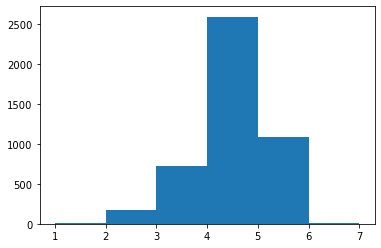

In [9]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [10]:
for i in range(N):
    I_precalc[i] = min(5, I_precalc[i])

In [11]:
iters = simulate_precalc(T, W, 743)

Result 0: 5    acc: 5.0    ks: [8, 5, 5, 5, 4]
Result 1: 5    acc: 5.0    ks: [8, 5, 5, 5, 4]
Result 2: 4    acc: 4.666666666666667    ks: [8, 5, 5, 5]
Result 3: 4    acc: 4.5    ks: [8, 5, 5, 5]
Result 4: 5    acc: 4.6    ks: [8, 5, 5, 5, 5]
Result 5: 5    acc: 4.666666666666667    ks: [8, 5, 5, 4, 4]
Result 6: 5    acc: 4.714285714285714    ks: [8, 5, 5, 4, 4]
Result 7: 5    acc: 4.75    ks: [8, 5, 5, 4, 4]
Result 8: 5    acc: 4.777777777777778    ks: [8, 5, 5, 4, 4]
Result 9: 5    acc: 4.8    ks: [8, 5, 5, 4, 4]
Result 10: 5    acc: 4.818181818181818    ks: [8, 5, 5, 4, 4]
Result 11: 5    acc: 4.833333333333333    ks: [8, 5, 5, 5, 5]
Result 12: 5    acc: 4.846153846153846    ks: [8, 5, 5, 5, 4]
Result 13: 5    acc: 4.857142857142857    ks: [8, 5, 5, 5, 4]
Result 14: 1    acc: 4.6    ks: [8]
Result 15: 1    acc: 4.375    ks: [8]
Result 16: 1    acc: 4.176470588235294    ks: [8]
Result 17: 1    acc: 4.0    ks: [8]
Result 18: 1    acc: 3.8421052631578947    ks: [8]
Result 19: 5    acc:

Result 141: 4    acc: 4.633802816901408    ks: [8, 5, 5, 4]
Result 142: 4    acc: 4.629370629370629    ks: [8, 5, 5, 4]
Result 143: 5    acc: 4.631944444444445    ks: [8, 5, 5, 5, 5]
Result 144: 4    acc: 4.627586206896551    ks: [8, 5, 5, 5]
Result 145: 4    acc: 4.623287671232877    ks: [8, 5, 5, 5]
Result 146: 4    acc: 4.619047619047619    ks: [8, 5, 5, 5]
Result 147: 4    acc: 4.614864864864865    ks: [8, 5, 5, 4]
Result 148: 4    acc: 4.610738255033557    ks: [8, 5, 5, 4]
Result 149: 4    acc: 4.6066666666666665    ks: [8, 5, 5, 4]
Result 150: 5    acc: 4.6092715231788075    ks: [8, 5, 5, 4, 4]
Result 151: 5    acc: 4.6118421052631575    ks: [8, 5, 5, 4, 4]
Result 152: 5    acc: 4.61437908496732    ks: [8, 5, 5, 4, 4]
Result 153: 5    acc: 4.616883116883117    ks: [8, 5, 5, 4, 4]
Result 154: 5    acc: 4.619354838709677    ks: [8, 5, 5, 4, 4]
Result 155: 5    acc: 4.621794871794871    ks: [8, 5, 5, 4, 4]
Result 156: 5    acc: 4.624203821656051    ks: [8, 5, 5, 4, 4]
Result 157: 5 

Result 278: 4    acc: 4.419354838709677    ks: [8, 5, 4, 4]
Result 279: 3    acc: 4.414285714285715    ks: [8, 5, 5]
Result 280: 3    acc: 4.409252669039146    ks: [8, 5, 4]
Result 281: 5    acc: 4.411347517730497    ks: [8, 5, 5, 5, 4]
Result 282: 4    acc: 4.409893992932862    ks: [8, 5, 4, 4]
Result 283: 3    acc: 4.404929577464789    ks: [8, 5, 5]
Result 284: 3    acc: 4.4    ks: [8, 5, 4]
Result 285: 3    acc: 4.395104895104895    ks: [8, 5, 5]
Result 286: 4    acc: 4.393728222996516    ks: [8, 5, 4, 4]
Result 287: 4    acc: 4.392361111111111    ks: [8, 5, 4, 4]
Result 288: 3    acc: 4.387543252595155    ks: [8, 5, 5]
Result 289: 3    acc: 4.382758620689655    ks: [8, 5, 5]
Result 290: 4    acc: 4.381443298969073    ks: [8, 5, 4, 4]
Result 291: 3    acc: 4.376712328767123    ks: [8, 5, 5]
Result 292: 4    acc: 4.375426621160409    ks: [8, 5, 4, 4]
Result 293: 3    acc: 4.370748299319728    ks: [8, 5, 5]
Result 294: 5    acc: 4.372881355932203    ks: [8, 5, 4, 4, 4]
Result 295: 3  

Result 418: 4    acc: 4.2601431980906925    ks: [8, 5, 5, 3]
Result 419: 5    acc: 4.261904761904762    ks: [8, 5, 4, 4, 4]
Result 420: 3    acc: 4.258907363420428    ks: [8, 5, 5]
Result 421: 3    acc: 4.2559241706161135    ks: [8, 5, 4]
Result 422: 4    acc: 4.25531914893617    ks: [8, 5, 4, 3]
Result 423: 6    acc: 4.259433962264151    ks: [8, 5, 4, 4, 4, 4]
Result 424: 3    acc: 4.2564705882352944    ks: [8, 5, 5]
Result 425: 5    acc: 4.258215962441315    ks: [8, 5, 5, 5, 4]
Result 426: 5    acc: 4.259953161592506    ks: [8, 5, 4, 4, 4]
Result 427: 3    acc: 4.257009345794392    ks: [8, 5, 5]
Result 428: 3    acc: 4.2540792540792545    ks: [8, 5, 4]
Result 429: 4    acc: 4.253488372093023    ks: [8, 5, 4, 4]
Result 430: 4    acc: 4.252900232018561    ks: [8, 5, 5, 3]
Result 431: 5    acc: 4.25462962962963    ks: [8, 5, 4, 4, 4]
Result 432: 4    acc: 4.254041570438799    ks: [8, 5, 5, 4]
Result 433: 4    acc: 4.253456221198157    ks: [8, 5, 5, 4]
Result 434: 3    acc: 4.25057471264

Result 555: 5    acc: 4.260791366906475    ks: [8, 5, 5, 5, 5]
Result 556: 5    acc: 4.262118491921005    ks: [8, 5, 5, 5, 5]
Result 557: 5    acc: 4.263440860215054    ks: [8, 5, 5, 5, 5]
Result 558: 5    acc: 4.264758497316637    ks: [8, 5, 5, 5, 5]
Result 559: 5    acc: 4.266071428571428    ks: [8, 5, 5, 5, 5]
Result 560: 5    acc: 4.267379679144385    ks: [8, 5, 5, 5, 5]
Result 561: 5    acc: 4.2686832740213525    ks: [8, 5, 5, 5, 5]
Result 562: 5    acc: 4.269982238010657    ks: [8, 5, 5, 5, 4]
Result 563: 4    acc: 4.2695035460992905    ks: [8, 5, 5, 3]
Result 564: 5    acc: 4.270796460176991    ks: [8, 5, 5, 5, 4]
Result 565: 5    acc: 4.27208480565371    ks: [8, 5, 5, 5, 4]
Result 566: 5    acc: 4.27336860670194    ks: [8, 5, 5, 5, 4]
Result 567: 5    acc: 4.274647887323944    ks: [8, 5, 5, 5, 4]
Result 568: 5    acc: 4.275922671353252    ks: [8, 5, 5, 5, 5]
Result 569: 4    acc: 4.275438596491228    ks: [8, 5, 5, 3]
Result 570: 5    acc: 4.276707530647986    ks: [8, 5, 5, 5, 4

Result 692: 4    acc: 4.255411255411255    ks: [8, 5, 5, 4]
Result 693: 4    acc: 4.255043227665706    ks: [8, 5, 5, 4]
Result 694: 4    acc: 4.254676258992806    ks: [8, 5, 5, 4]
Result 695: 4    acc: 4.254310344827586    ks: [8, 5, 5, 4]
Result 696: 4    acc: 4.253945480631277    ks: [8, 5, 5, 4]
Result 697: 4    acc: 4.2535816618911175    ks: [8, 5, 5, 4]
Result 698: 5    acc: 4.254649499284692    ks: [8, 5, 5, 4, 4]
Result 699: 4    acc: 4.2542857142857144    ks: [8, 5, 5, 4]
Result 700: 4    acc: 4.253922967189729    ks: [8, 5, 5, 4]
Result 701: 4    acc: 4.253561253561253    ks: [8, 5, 5, 4]
Result 702: 4    acc: 4.253200568990042    ks: [8, 5, 5, 4]
Result 703: 4    acc: 4.252840909090909    ks: [8, 5, 5, 4]
Result 704: 4    acc: 4.252482269503546    ks: [8, 5, 5, 4]
Result 705: 4    acc: 4.252124645892351    ks: [8, 5, 5, 4]
Result 706: 4    acc: 4.251768033946251    ks: [8, 5, 5, 4]
Result 707: 4    acc: 4.251412429378531    ks: [8, 5, 5, 4]
Result 708: 4    acc: 4.25105782792

Result 828: 5    acc: 4.247285886610374    ks: [8, 5, 4, 4, 4]
Result 829: 3    acc: 4.2457831325301205    ks: [8, 5, 5]
Result 830: 4    acc: 4.245487364620939    ks: [8, 5, 5, 5]
Result 831: 4    acc: 4.2451923076923075    ks: [8, 5, 5, 5]
Result 832: 4    acc: 4.244897959183674    ks: [8, 5, 5, 3]
Result 833: 4    acc: 4.244604316546763    ks: [8, 5, 5, 3]
Result 834: 4    acc: 4.244311377245509    ks: [8, 5, 5, 4]
Result 835: 4    acc: 4.244019138755981    ks: [8, 5, 5, 4]
Result 836: 4    acc: 4.243727598566308    ks: [8, 5, 5, 4]
Result 837: 4    acc: 4.243436754176611    ks: [8, 5, 5, 4]
Result 838: 4    acc: 4.2431466030989275    ks: [8, 5, 5, 4]
Result 839: 4    acc: 4.242857142857143    ks: [8, 5, 5, 4]
Result 840: 4    acc: 4.242568370986921    ks: [8, 5, 5, 4]
Result 841: 4    acc: 4.24228028503563    ks: [8, 5, 5, 4]
Result 842: 5    acc: 4.243179122182681    ks: [8, 5, 5, 4, 4]
Result 843: 5    acc: 4.2440758293838865    ks: [8, 5, 5, 4, 4]
Result 844: 5    acc: 4.2449704

Result 967: 3    acc: 4.221074380165289    ks: [8, 5, 2]
Result 968: 3    acc: 4.219814241486068    ks: [8, 5, 2]
Result 969: 4    acc: 4.2195876288659795    ks: [8, 5, 4, 4]
Result 970: 3    acc: 4.218331616889804    ks: [8, 5, 3]
Result 971: 3    acc: 4.217078189300412    ks: [8, 5, 3]
Result 972: 3    acc: 4.215827338129497    ks: [8, 5, 5]
Result 973: 3    acc: 4.214579055441479    ks: [8, 5, 5]
Result 974: 3    acc: 4.213333333333333    ks: [8, 5, 5]
Result 975: 4    acc: 4.213114754098361    ks: [8, 5, 5, 5]
Result 976: 5    acc: 4.213920163766632    ks: [8, 5, 5, 5, 5]
Result 977: 4    acc: 4.213701431492843    ks: [8, 5, 4, 4]
Result 978: 4    acc: 4.213483146067416    ks: [8, 5, 5, 3]
Result 979: 4    acc: 4.213265306122449    ks: [8, 5, 5, 3]
Result 980: 6    acc: 4.215086646279307    ks: [8, 5, 5, 3, 3, 3]
Result 981: 6    acc: 4.216904276985743    ks: [8, 5, 5, 3, 3, 3]
Result 982: 3    acc: 4.215666327568667    ks: [8, 5, 5]
Result 983: 4    acc: 4.215447154471545    ks: [

Result 1101: 4    acc: 4.226860254083484    ks: [8, 5, 4, 4]
Result 1102: 5    acc: 4.227561196736174    ks: [8, 5, 5, 5, 5]
Result 1103: 4    acc: 4.2273550724637685    ks: [8, 5, 5, 5]
Result 1104: 4    acc: 4.227149321266968    ks: [8, 5, 5, 5]
Result 1105: 4    acc: 4.226943942133816    ks: [8, 5, 4, 3]
Result 1106: 3    acc: 4.2258355916892505    ks: [8, 5, 5]
Result 1107: 3    acc: 4.224729241877256    ks: [8, 5, 2]
Result 1108: 4    acc: 4.224526600541028    ks: [8, 5, 5, 5]
Result 1109: 4    acc: 4.224324324324324    ks: [8, 5, 5, 5]
Result 1110: 4    acc: 4.224122412241224    ks: [8, 5, 5, 5]
Result 1111: 6    acc: 4.225719424460432    ks: [8, 5, 5, 5, 5, 5]
Result 1112: 5    acc: 4.226415094339623    ks: [8, 5, 5, 4, 4]
Result 1113: 5    acc: 4.227109515260323    ks: [8, 5, 5, 4, 4]
Result 1114: 4    acc: 4.226905829596412    ks: [8, 5, 5, 5]
Result 1115: 4    acc: 4.226702508960574    ks: [8, 5, 5, 5]
Result 1116: 4    acc: 4.2264995523724265    ks: [8, 5, 5, 5]
Result 1117:

Result 1236: 5    acc: 4.202101859337106    ks: [8, 5, 5, 3, 3]
Result 1237: 5    acc: 4.202746365105008    ks: [8, 5, 5, 3, 3]
Result 1238: 5    acc: 4.203389830508475    ks: [8, 5, 5, 5, 3]
Result 1239: 5    acc: 4.204032258064516    ks: [8, 5, 5, 3, 3]
Result 1240: 5    acc: 4.2046736502820306    ks: [8, 5, 5, 5, 5]
Result 1241: 5    acc: 4.205314009661835    ks: [8, 5, 5, 5, 4]
Result 1242: 5    acc: 4.205953338696702    ks: [8, 5, 5, 5, 4]
Result 1243: 5    acc: 4.206591639871383    ks: [8, 5, 5, 4, 3]
Result 1244: 5    acc: 4.20722891566265    ks: [8, 5, 5, 5, 4]
Result 1245: 5    acc: 4.207865168539326    ks: [8, 5, 5, 5, 4]
Result 1246: 5    acc: 4.2085004009623095    ks: [8, 5, 5, 5, 4]
Result 1247: 6    acc: 4.209935897435898    ks: [8, 5, 5, 5, 5, 5]
Result 1248: 6    acc: 4.211369095276221    ks: [8, 5, 5, 5, 5, 5]
Result 1249: 6    acc: 4.2128    ks: [8, 5, 5, 5, 5, 5]
Result 1250: 6    acc: 4.214228617106315    ks: [8, 5, 5, 5, 5, 5]
Result 1251: 5    acc: 4.2148562300319

Result 1371: 5    acc: 4.24198250728863    ks: [8, 5, 4, 3, 3]
Result 1372: 5    acc: 4.242534595775673    ks: [8, 5, 4, 3, 3]
Result 1373: 5    acc: 4.243085880640466    ks: [8, 5, 4, 3, 3]
Result 1374: 5    acc: 4.243636363636363    ks: [8, 5, 4, 3, 3]
Result 1375: 5    acc: 4.244186046511628    ks: [8, 5, 4, 3, 3]
Result 1376: 5    acc: 4.24473493100944    ks: [8, 5, 4, 3, 3]
Result 1377: 5    acc: 4.245283018867925    ks: [8, 5, 4, 3, 3]
Result 1378: 5    acc: 4.24583031182016    ks: [8, 5, 4, 3, 3]
Result 1379: 5    acc: 4.246376811594203    ks: [8, 5, 4, 3, 3]
Result 1380: 5    acc: 4.246922519913107    ks: [8, 5, 4, 3, 3]
Result 1381: 5    acc: 4.247467438494935    ks: [8, 5, 4, 3, 3]
Result 1382: 4    acc: 4.247288503253796    ks: [8, 5, 4, 3]
Result 1383: 4    acc: 4.247109826589595    ks: [8, 5, 4, 3]
Result 1384: 4    acc: 4.246931407942238    ks: [8, 5, 4, 3]
Result 1385: 4    acc: 4.246753246753247    ks: [8, 5, 4, 3]
Result 1386: 4    acc: 4.2465753424657535    ks: [8, 5,

Result 1507: 5    acc: 4.2380636604774535    ks: [8, 5, 5, 5, 4]
Result 1508: 5    acc: 4.238568588469185    ks: [8, 5, 5, 5, 4]
Result 1509: 3    acc: 4.237748344370861    ks: [8, 5, 4]
Result 1510: 4    acc: 4.237590999338186    ks: [8, 5, 5, 5]
Result 1511: 5    acc: 4.238095238095238    ks: [8, 5, 5, 5, 5]
Result 1512: 5    acc: 4.238598810310641    ks: [8, 5, 5, 5, 5]
Result 1513: 5    acc: 4.239101717305152    ks: [8, 5, 5, 5, 5]
Result 1514: 5    acc: 4.23960396039604    ks: [8, 5, 5, 5, 5]
Result 1515: 4    acc: 4.239445910290238    ks: [8, 5, 5, 5]
Result 1516: 4    acc: 4.239288068556362    ks: [8, 5, 5, 5]
Result 1517: 5    acc: 4.2397891963109355    ks: [8, 5, 5, 5, 5]
Result 1518: 5    acc: 4.240289664252798    ks: [8, 5, 5, 5, 5]
Result 1519: 5    acc: 4.24078947368421    ks: [8, 5, 5, 5, 5]
Result 1520: 5    acc: 4.24128862590401    ks: [8, 5, 5, 5, 5]
Result 1521: 5    acc: 4.241787122207621    ks: [8, 5, 5, 5, 5]
Result 1522: 5    acc: 4.242284963887065    ks: [8, 5, 5

Result 1640: 3    acc: 4.2413162705667276    ks: [8, 5, 5]
Result 1641: 3    acc: 4.240560292326431    ks: [8, 5, 5]
Result 1642: 4    acc: 4.240413877054169    ks: [8, 5, 5, 5]
Result 1643: 4    acc: 4.240267639902676    ks: [8, 5, 5, 5]
Result 1644: 4    acc: 4.240121580547113    ks: [8, 5, 5, 4]
Result 1645: 5    acc: 4.240583232077764    ks: [8, 5, 5, 5, 5]
Result 1646: 5    acc: 4.241044323011536    ks: [8, 5, 5, 5, 5]
Result 1647: 5    acc: 4.241504854368932    ks: [8, 5, 5, 5, 5]
Result 1648: 4    acc: 4.241358399029715    ks: [8, 5, 5, 5]
Result 1649: 5    acc: 4.241818181818182    ks: [8, 5, 5, 5, 5]
Result 1650: 5    acc: 4.242277407631739    ks: [8, 5, 5, 5, 5]
Result 1651: 5    acc: 4.24273607748184    ks: [8, 5, 5, 5, 5]
Result 1652: 5    acc: 4.243194192377495    ks: [8, 5, 5, 5, 5]
Result 1653: 5    acc: 4.243651753325272    ks: [8, 5, 5, 5, 5]
Result 1654: 5    acc: 4.244108761329305    ks: [8, 5, 5, 5, 5]
Result 1655: 5    acc: 4.244565217391305    ks: [8, 5, 5, 5, 5]


Result 1772: 5    acc: 4.265651438240271    ks: [8, 5, 5, 4, 4]
Result 1773: 5    acc: 4.266065388951522    ks: [8, 5, 5, 4, 4]
Result 1774: 5    acc: 4.2664788732394365    ks: [8, 5, 5, 4, 4]
Result 1775: 4    acc: 4.266328828828829    ks: [8, 5, 5, 4]
Result 1776: 4    acc: 4.266178953292065    ks: [8, 5, 5, 4]
Result 1777: 4    acc: 4.266029246344207    ks: [8, 5, 5, 4]
Result 1778: 5    acc: 4.266441821247892    ks: [8, 5, 5, 4, 4]
Result 1779: 5    acc: 4.26685393258427    ks: [8, 5, 5, 4, 4]
Result 1780: 5    acc: 4.267265581134194    ks: [8, 5, 5, 4, 4]
Result 1781: 5    acc: 4.267676767676767    ks: [8, 5, 5, 4, 4]
Result 1782: 5    acc: 4.268087492989344    ks: [8, 5, 5, 4, 4]
Result 1783: 5    acc: 4.268497757847534    ks: [8, 5, 5, 4, 4]
Result 1784: 5    acc: 4.26890756302521    ks: [8, 5, 5, 4, 4]
Result 1785: 5    acc: 4.2693169092945125    ks: [8, 5, 5, 4, 4]
Result 1786: 5    acc: 4.269725797425854    ks: [8, 5, 5, 5, 5]
Result 1787: 5    acc: 4.27013422818792    ks: [8

Result 1906: 4    acc: 4.256423702149974    ks: [8, 5, 5, 5]
Result 1907: 4    acc: 4.2562893081761    ks: [8, 5, 5, 5]
Result 1908: 4    acc: 4.256155055002619    ks: [8, 5, 5, 5]
Result 1909: 4    acc: 4.256020942408377    ks: [8, 5, 5, 5]
Result 1910: 4    acc: 4.255886970172685    ks: [8, 5, 5, 5]
Result 1911: 5    acc: 4.256276150627615    ks: [8, 5, 5, 5, 4]
Result 1912: 5    acc: 4.2566649242028225    ks: [8, 5, 5, 5, 4]
Result 1913: 5    acc: 4.25705329153605    ks: [8, 5, 5, 5, 4]
Result 1914: 5    acc: 4.257441253263708    ks: [8, 5, 5, 5, 4]
Result 1915: 4    acc: 4.257306889352819    ks: [8, 5, 5, 5]
Result 1916: 4    acc: 4.2571726656233695    ks: [8, 5, 5, 5]
Result 1917: 4    acc: 4.2570385818561    ks: [8, 5, 5, 5]
Result 1918: 4    acc: 4.256904637832204    ks: [8, 5, 5, 5]
Result 1919: 4    acc: 4.256770833333333    ks: [8, 5, 5, 5]
Result 1920: 4    acc: 4.256637168141593    ks: [8, 5, 5, 5]
Result 1921: 4    acc: 4.256503642039542    ks: [8, 5, 5, 5]
Result 1922: 5 

Result 2037: 4    acc: 4.275269872423945    ks: [8, 5, 5, 3]
Result 2038: 4    acc: 4.27513487003433    ks: [8, 5, 5, 3]
Result 2039: 4    acc: 4.275    ks: [8, 5, 5, 3]
Result 2040: 5    acc: 4.275355218030377    ks: [8, 5, 5, 5, 5]
Result 2041: 5    acc: 4.275710088148873    ks: [8, 5, 5, 5, 5]
Result 2042: 4    acc: 4.275575134605972    ks: [8, 5, 5, 4]
Result 2043: 4    acc: 4.275440313111546    ks: [8, 5, 5, 4]
Result 2044: 5    acc: 4.275794621026895    ks: [8, 5, 5, 4, 4]
Result 2045: 5    acc: 4.276148582600196    ks: [8, 5, 5, 4, 4]
Result 2046: 5    acc: 4.276502198339033    ks: [8, 5, 5, 4, 4]
Result 2047: 5    acc: 4.27685546875    ks: [8, 5, 5, 4, 4]
Result 2048: 4    acc: 4.276720351390923    ks: [8, 5, 5, 4]
Result 2049: 4    acc: 4.276585365853658    ks: [8, 5, 5, 4]
Result 2050: 4    acc: 4.276450511945392    ks: [8, 5, 5, 4]
Result 2051: 4    acc: 4.276315789473684    ks: [8, 5, 5, 4]
Result 2052: 4    acc: 4.276181198246468    ks: [8, 5, 5, 5]
Result 2053: 4    acc: 

Result 2170: 4    acc: 4.271764163979733    ks: [8, 5, 5, 3]
Result 2171: 5    acc: 4.2720994475138125    ks: [8, 5, 5, 5, 5]
Result 2172: 5    acc: 4.272434422457432    ks: [8, 5, 5, 5, 5]
Result 2173: 5    acc: 4.272769089236431    ks: [8, 5, 5, 5, 5]
Result 2174: 5    acc: 4.273103448275862    ks: [8, 5, 5, 5, 5]
Result 2175: 5    acc: 4.2734375    ks: [8, 5, 5, 5, 5]
Result 2176: 5    acc: 4.273771244832338    ks: [8, 5, 5, 5, 5]
Result 2177: 4    acc: 4.273645546372819    ks: [8, 5, 5, 5]
Result 2178: 4    acc: 4.273519963285911    ks: [8, 5, 5, 5]
Result 2179: 5    acc: 4.2738532110091745    ks: [8, 5, 5, 5, 5]
Result 2180: 5    acc: 4.274186153140761    ks: [8, 5, 5, 5, 5]
Result 2181: 5    acc: 4.274518790100825    ks: [8, 5, 5, 5, 5]
Result 2182: 5    acc: 4.27485112230875    ks: [8, 5, 5, 5, 5]
Result 2183: 5    acc: 4.2751831501831505    ks: [8, 5, 5, 5, 5]
Result 2184: 4    acc: 4.275057208237986    ks: [8, 5, 5, 5]
Result 2185: 5    acc: 4.275388838060384    ks: [8, 5, 5, 

Result 2309: 5    acc: 4.223809523809524    ks: [8, 5, 5, 3, 3]
Result 2310: 5    acc: 4.224145391605366    ks: [8, 5, 5, 3, 3]
Result 2311: 5    acc: 4.224480968858131    ks: [8, 5, 5, 3, 3]
Result 2312: 5    acc: 4.224816255944661    ks: [8, 5, 5, 5, 4]
Result 2313: 5    acc: 4.225151253241141    ks: [8, 5, 5, 4, 4]
Result 2314: 5    acc: 4.22548596112311    ks: [8, 5, 5, 4, 4]
Result 2315: 5    acc: 4.225820379965458    ks: [8, 5, 5, 4, 4]
Result 2316: 5    acc: 4.226154510142425    ks: [8, 5, 5, 4, 4]
Result 2317: 5    acc: 4.22648835202761    ks: [8, 5, 5, 4, 4]
Result 2318: 5    acc: 4.226821905993963    ks: [8, 5, 5, 4, 4]
Result 2319: 5    acc: 4.227155172413793    ks: [8, 5, 5, 4, 4]
Result 2320: 4    acc: 4.227057302886687    ks: [8, 5, 5, 5]
Result 2321: 4    acc: 4.226959517657192    ks: [8, 5, 5, 3]
Result 2322: 4    acc: 4.226861816616444    ks: [8, 5, 5, 4]
Result 2323: 4    acc: 4.226764199655766    ks: [8, 5, 5, 4]
Result 2324: 4    acc: 4.226666666666667    ks: [8, 5,

Result 2444: 4    acc: 4.207361963190184    ks: [8, 5, 5, 5]
Result 2445: 6    acc: 4.208094848732625    ks: [8, 5, 5, 5, 5, 5]
Result 2446: 4    acc: 4.208009807928075    ks: [8, 5, 5, 5]
Result 2447: 3    acc: 4.207516339869281    ks: [8, 5, 5]
Result 2448: 3    acc: 4.207023274806043    ks: [8, 5, 5]
Result 2449: 4    acc: 4.206938775510204    ks: [8, 5, 5, 5]
Result 2450: 3    acc: 4.206446348429212    ks: [8, 5, 5]
Result 2451: 3    acc: 4.205954323001631    ks: [8, 5, 5]
Result 2452: 3    acc: 4.205462698736241    ks: [8, 5, 5]
Result 2453: 3    acc: 4.204971475142624    ks: [8, 5, 5]
Result 2454: 4    acc: 4.204887983706721    ks: [8, 5, 5, 4]
Result 2455: 3    acc: 4.204397394136808    ks: [8, 5, 5]
Result 2456: 3    acc: 4.203907203907204    ks: [8, 5, 5]
Result 2457: 3    acc: 4.203417412530513    ks: [8, 5, 3]
Result 2458: 3    acc: 4.20292801952013    ks: [8, 5, 3]
Result 2459: 3    acc: 4.202439024390244    ks: [8, 5, 3]
Result 2460: 4    acc: 4.202356765542462    ks: [8, 

Result 2583: 3    acc: 4.165247678018575    ks: [8, 5, 2]
Result 2584: 3    acc: 4.164796905222437    ks: [8, 5, 2]
Result 2585: 3    acc: 4.164346481051817    ks: [8, 5, 2]
Result 2586: 6    acc: 4.16505604947816    ks: [8, 5, 5, 4, 4, 4]
Result 2587: 5    acc: 4.165378670788254    ks: [8, 5, 5, 5, 5]
Result 2588: 4    acc: 4.165314793356508    ks: [8, 5, 4, 3]
Result 2589: 4    acc: 4.165250965250965    ks: [8, 5, 4, 3]
Result 2590: 4    acc: 4.165187186414512    ks: [8, 5, 4, 3]
Result 2591: 4    acc: 4.165123456790123    ks: [8, 5, 4, 3]
Result 2592: 4    acc: 4.165059776320864    ks: [8, 5, 4, 3]
Result 2593: 4    acc: 4.1649961449498845    ks: [8, 5, 4, 3]
Result 2594: 4    acc: 4.164932562620424    ks: [8, 5, 4, 3]
Result 2595: 4    acc: 4.164869029275809    ks: [8, 5, 4, 3]
Result 2596: 4    acc: 4.164805544859453    ks: [8, 5, 4, 3]
Result 2597: 4    acc: 4.164742109314858    ks: [8, 5, 4, 3]
Result 2598: 4    acc: 4.1646787225856094    ks: [8, 5, 5, 5]
Result 2599: 4    acc: 

Result 2719: 4    acc: 4.163602941176471    ks: [8, 5, 3, 3]
Result 2720: 4    acc: 4.163542815141492    ks: [8, 5, 5, 3]
Result 2721: 4    acc: 4.16348273328435    ks: [8, 5, 5, 3]
Result 2722: 4    acc: 4.163422695556371    ks: [8, 5, 3, 3]
Result 2723: 5    acc: 4.163729809104258    ks: [8, 5, 5, 5, 5]
Result 2724: 4    acc: 4.163669724770642    ks: [8, 5, 3, 3]
Result 2725: 3    acc: 4.163242846661776    ks: [8, 5, 4]
Result 2726: 3    acc: 4.162816281628163    ks: [8, 5, 4]
Result 2727: 4    acc: 4.1627565982404695    ks: [8, 5, 4, 4]
Result 2728: 4    acc: 4.162696958592891    ks: [8, 5, 4, 3]
Result 2729: 4    acc: 4.162637362637363    ks: [8, 5, 4, 3]
Result 2730: 4    acc: 4.162577810325888    ks: [8, 5, 4, 3]
Result 2731: 4    acc: 4.162518301610541    ks: [8, 5, 5, 4]
Result 2732: 5    acc: 4.162824734723746    ks: [8, 5, 5, 5, 4]
Result 2733: 5    acc: 4.163130943672275    ks: [8, 5, 5, 5, 4]
Result 2734: 5    acc: 4.163436928702011    ks: [8, 5, 5, 5, 4]
Result 2735: 5    

Result 2853: 4    acc: 4.172039243167484    ks: [8, 5, 5, 3]
Result 2854: 4    acc: 4.171978984238178    ks: [8, 5, 5, 3]
Result 2855: 4    acc: 4.171918767507003    ks: [8, 5, 5, 3]
Result 2856: 4    acc: 4.171858592929646    ks: [8, 5, 5, 3]
Result 2857: 4    acc: 4.171798460461861    ks: [8, 5, 5, 3]
Result 2858: 4    acc: 4.171738370059462    ks: [8, 5, 5, 3]
Result 2859: 4    acc: 4.171678321678321    ks: [8, 5, 5, 3]
Result 2860: 4    acc: 4.1716183152743795    ks: [8, 5, 5, 3]
Result 2861: 4    acc: 4.171558350803634    ks: [8, 5, 5, 3]
Result 2862: 4    acc: 4.171498428222145    ks: [8, 5, 5, 3]
Result 2863: 4    acc: 4.171438547486034    ks: [8, 5, 5, 3]
Result 2864: 4    acc: 4.171378708551483    ks: [8, 5, 5, 3]
Result 2865: 4    acc: 4.171318911374739    ks: [8, 5, 5, 3]
Result 2866: 3    acc: 4.170910359260551    ks: [8, 5, 5]
Result 2867: 4    acc: 4.170850767085077    ks: [8, 5, 4, 3]
Result 2868: 4    acc: 4.170791216451725    ks: [8, 5, 5, 4]
Result 2869: 4    acc: 4.1

Result 2988: 5    acc: 4.164938106390097    ks: [8, 5, 4, 4, 4]
Result 2989: 4    acc: 4.164882943143812    ks: [8, 5, 4, 4]
Result 2990: 4    acc: 4.164827816783684    ks: [8, 5, 4, 4]
Result 2991: 4    acc: 4.1647727272727275    ks: [8, 5, 4, 4]
Result 2992: 4    acc: 4.164717674574006    ks: [8, 5, 4, 4]
Result 2993: 4    acc: 4.164662658650634    ks: [8, 5, 4, 4]
Result 2994: 4    acc: 4.164607679465776    ks: [8, 5, 4, 4]
Result 2995: 5    acc: 4.164886515353805    ks: [8, 5, 4, 4, 3]
Result 2996: 5    acc: 4.165165165165165    ks: [8, 5, 4, 4, 3]
Result 2997: 5    acc: 4.165443629086058    ks: [8, 5, 4, 4, 3]
Result 2998: 5    acc: 4.1657219073024345    ks: [8, 5, 5, 5, 5]
Result 2999: 5    acc: 4.166    ks: [8, 5, 5, 5, 5]
Result 3000: 5    acc: 4.166277907364212    ks: [8, 5, 5, 5, 5]
Result 3001: 4    acc: 4.16622251832112    ks: [8, 5, 5, 5]
Result 3002: 4    acc: 4.166167166167166    ks: [8, 5, 4, 4]
Result 3003: 4    acc: 4.166111850865513    ks: [8, 5, 4, 4]
Result 3004: 4

Result 3126: 5    acc: 4.142948512951711    ks: [8, 5, 5, 4, 4]
Result 3127: 5    acc: 4.143222506393862    ks: [8, 5, 5, 4, 4]
Result 3128: 5    acc: 4.143496324704379    ks: [8, 5, 5, 4, 4]
Result 3129: 5    acc: 4.143769968051118    ks: [8, 5, 5, 4, 4]
Result 3130: 4    acc: 4.143724049824337    ks: [8, 5, 5, 4]
Result 3131: 4    acc: 4.14367816091954    ks: [8, 5, 5, 5]
Result 3132: 4    acc: 4.14363230130865    ks: [8, 5, 5, 5]
Result 3133: 4    acc: 4.1435864709636245    ks: [8, 5, 5, 5]
Result 3134: 5    acc: 4.143859649122807    ks: [8, 5, 5, 4, 4]
Result 3135: 5    acc: 4.144132653061225    ks: [8, 5, 5, 4, 4]
Result 3136: 5    acc: 4.14440548294549    ks: [8, 5, 5, 4, 4]
Result 3137: 5    acc: 4.144678138942001    ks: [8, 5, 5, 4, 4]
Result 3138: 4    acc: 4.144632048423064    ks: [8, 5, 5, 4]
Result 3139: 4    acc: 4.144585987261147    ks: [8, 5, 5, 4]
Result 3140: 4    acc: 4.144539955428208    ks: [8, 5, 5, 4]
Result 3141: 5    acc: 4.144812221514958    ks: [8, 5, 5, 5, 5]

Result 3260: 4    acc: 4.150873965041399    ks: [8, 5, 4, 4]
Result 3261: 4    acc: 4.150827713059472    ks: [8, 5, 4, 4]
Result 3262: 4    acc: 4.150781489426908    ks: [8, 5, 5, 4]
Result 3263: 4    acc: 4.150735294117647    ks: [8, 5, 3, 3]
Result 3264: 4    acc: 4.150689127105666    ks: [8, 5, 3, 3]
Result 3265: 4    acc: 4.1506429883649725    ks: [8, 5, 3, 3]
Result 3266: 4    acc: 4.150596877869605    ks: [8, 5, 3, 3]
Result 3267: 4    acc: 4.150550795593635    ks: [8, 5, 4, 4]
Result 3268: 4    acc: 4.150504741511165    ks: [8, 5, 4, 3]
Result 3269: 4    acc: 4.15045871559633    ks: [8, 5, 3, 3]
Result 3270: 3    acc: 4.150107000917151    ks: [8, 5, 3]
Result 3271: 3    acc: 4.149755501222494    ks: [8, 5, 3]
Result 3272: 3    acc: 4.149404216315307    ks: [8, 5, 3]
Result 3273: 5    acc: 4.149664019547954    ks: [8, 5, 5, 5, 5]
Result 3274: 4    acc: 4.149618320610687    ks: [8, 5, 4, 4]
Result 3275: 4    acc: 4.14957264957265    ks: [8, 5, 3, 3]
Result 3276: 4    acc: 4.149527

Result 3394: 4    acc: 4.148159057437408    ks: [8, 5, 5, 4]
Result 3395: 4    acc: 4.14811542991755    ks: [8, 5, 5, 4]
Result 3396: 4    acc: 4.148071828083603    ks: [8, 5, 5, 4]
Result 3397: 4    acc: 4.14802825191289    ks: [8, 5, 5, 4]
Result 3398: 4    acc: 4.14798470138276    ks: [8, 5, 4, 3]
Result 3399: 4    acc: 4.147941176470588    ks: [8, 5, 5, 4]
Result 3400: 4    acc: 4.147897677153778    ks: [8, 5, 5, 4]
Result 3401: 5    acc: 4.148148148148148    ks: [8, 5, 5, 5, 4]
Result 3402: 5    acc: 4.1483984719365266    ks: [8, 5, 5, 5, 5]
Result 3403: 5    acc: 4.148648648648648    ks: [8, 5, 5, 5, 5]
Result 3404: 4    acc: 4.148604992657856    ks: [8, 5, 5, 5]
Result 3405: 3    acc: 4.14826776277158    ks: [8, 5, 3]
Result 3406: 4    acc: 4.148224244203111    ks: [8, 5, 5, 5]
Result 3407: 4    acc: 4.148180751173709    ks: [8, 5, 5, 5]
Result 3408: 4    acc: 4.148137283660898    ks: [8, 5, 4, 3]
Result 3409: 4    acc: 4.148093841642229    ks: [8, 5, 4, 3]
Result 3410: 4    acc

Result 3526: 4    acc: 4.162744542103771    ks: [8, 5, 5, 4]
Result 3527: 4    acc: 4.162698412698413    ks: [8, 5, 5, 5]
Result 3528: 4    acc: 4.162652309436101    ks: [8, 5, 5, 5]
Result 3529: 4    acc: 4.162606232294618    ks: [8, 5, 5, 5]
Result 3530: 4    acc: 4.16256018125177    ks: [8, 5, 5, 5]
Result 3531: 4    acc: 4.162514156285391    ks: [8, 5, 5, 5]
Result 3532: 4    acc: 4.162468157373337    ks: [8, 5, 5, 5]
Result 3533: 4    acc: 4.162422184493492    ks: [8, 5, 5, 4]
Result 3534: 4    acc: 4.1623762376237625    ks: [8, 5, 5, 4]
Result 3535: 4    acc: 4.162330316742081    ks: [8, 5, 5, 4]
Result 3536: 4    acc: 4.162284421826406    ks: [8, 5, 5, 4]
Result 3537: 4    acc: 4.1622385528547206    ks: [8, 5, 5, 4]
Result 3538: 4    acc: 4.16219270980503    ks: [8, 5, 5, 4]
Result 3539: 5    acc: 4.1624293785310735    ks: [8, 5, 5, 4, 4]
Result 3540: 4    acc: 4.162383507483762    ks: [8, 5, 5, 4]
Result 3541: 4    acc: 4.162337662337662    ks: [8, 5, 5, 4]
Result 3542: 4    ac

Result 3659: 4    acc: 4.167486338797814    ks: [8, 5, 5, 5]
Result 3660: 4    acc: 4.167440590002731    ks: [8, 5, 5, 5]
Result 3661: 4    acc: 4.167394866193337    ks: [8, 5, 5, 5]
Result 3662: 4    acc: 4.167349167349167    ks: [8, 5, 5, 5]
Result 3663: 4    acc: 4.167303493449782    ks: [8, 5, 5, 5]
Result 3664: 6    acc: 4.167803547066849    ks: [8, 5, 5, 5, 5, 5]
Result 3665: 5    acc: 4.1680305510092746    ks: [8, 5, 5, 5, 5]
Result 3666: 4    acc: 4.167984728661031    ks: [8, 5, 4, 4]
Result 3667: 4    acc: 4.1679389312977095    ks: [8, 5, 4, 4]
Result 3668: 4    acc: 4.167893158898883    ks: [8, 5, 4, 4]
Result 3669: 4    acc: 4.167847411444142    ks: [8, 5, 4, 4]
Result 3670: 4    acc: 4.167801688913102    ks: [8, 5, 4, 4]
Result 3671: 4    acc: 4.167755991285403    ks: [8, 5, 4, 4]
Result 3672: 4    acc: 4.167710318540703    ks: [8, 5, 5, 5]
Result 3673: 4    acc: 4.167664670658683    ks: [8, 5, 5, 5]
Result 3674: 5    acc: 4.167891156462585    ks: [8, 5, 5, 5, 3]
Result 367

Result 3793: 5    acc: 4.167369530838165    ks: [8, 5, 5, 4, 4]
Result 3794: 4    acc: 4.167325428194993    ks: [8, 5, 5, 5]
Result 3795: 4    acc: 4.167281348788198    ks: [8, 5, 4, 4]
Result 3796: 4    acc: 4.16723729259942    ks: [8, 5, 4, 4]
Result 3797: 4    acc: 4.167193259610321    ks: [8, 5, 5, 5]
Result 3798: 4    acc: 4.16714924980258    ks: [8, 5, 5, 5]
Result 3799: 4    acc: 4.167105263157895    ks: [8, 5, 5, 3]
Result 3800: 4    acc: 4.167061299657985    ks: [8, 5, 5, 5]
Result 3801: 4    acc: 4.167017359284587    ks: [8, 5, 5, 5]
Result 3802: 4    acc: 4.166973442019458    ks: [8, 5, 5, 5]
Result 3803: 3    acc: 4.166666666666667    ks: [8, 5, 4]
Result 3804: 3    acc: 4.166360052562418    ks: [8, 5, 4]
Result 3805: 3    acc: 4.1660535995796115    ks: [8, 5, 4]
Result 3806: 3    acc: 4.165747307591279    ks: [8, 5, 4]
Result 3807: 3    acc: 4.165441176470588    ks: [8, 5, 4]
Result 3808: 4    acc: 4.165397742189551    ks: [8, 5, 4, 4]
Result 3809: 4    acc: 4.165354330708

Result 3928: 4    acc: 4.163145838635785    ks: [8, 5, 4, 4]
Result 3929: 4    acc: 4.163104325699746    ks: [8, 5, 5, 5]
Result 3930: 5    acc: 4.163317222080895    ks: [8, 5, 5, 5, 3]
Result 3931: 4    acc: 4.163275686673448    ks: [8, 5, 4, 4]
Result 3932: 4    acc: 4.16323417238749    ks: [8, 5, 4, 4]
Result 3933: 4    acc: 4.163192679206914    ks: [8, 5, 4, 4]
Result 3934: 4    acc: 4.163151207115629    ks: [8, 5, 4, 4]
Result 3935: 4    acc: 4.163109756097561    ks: [8, 5, 4, 4]
Result 3936: 4    acc: 4.163068326136652    ks: [8, 5, 4, 4]
Result 3937: 4    acc: 4.163026917216861    ks: [8, 5, 4, 4]
Result 3938: 4    acc: 4.162985529322163    ks: [8, 5, 4, 4]
Result 3939: 4    acc: 4.162944162436548    ks: [8, 5, 4, 4]
Result 3940: 4    acc: 4.162902816544024    ks: [8, 5, 4, 4]
Result 3941: 4    acc: 4.162861491628615    ks: [8, 5, 4, 4]
Result 3942: 4    acc: 4.16282018767436    ks: [8, 5, 4, 4]
Result 3943: 4    acc: 4.1627789046653145    ks: [8, 5, 4, 4]
Result 3944: 4    acc:

Result 4061: 4    acc: 4.1681437715411125    ks: [8, 5, 5, 5]
Result 4062: 4    acc: 4.168102387398474    ks: [8, 5, 5, 5]
Result 4063: 4    acc: 4.168061023622047    ks: [8, 5, 5, 5]
Result 4064: 4    acc: 4.168019680196802    ks: [8, 5, 5, 5]
Result 4065: 4    acc: 4.167978357107723    ks: [8, 5, 5, 5]
Result 4066: 4    acc: 4.167937054339808    ks: [8, 5, 5, 5]
Result 4067: 4    acc: 4.167895771878073    ks: [8, 5, 5, 5]
Result 4068: 4    acc: 4.167854509707545    ks: [8, 5, 5, 5]
Result 4069: 5    acc: 4.168058968058968    ks: [8, 5, 5, 5, 5]
Result 4070: 5    acc: 4.168263325964136    ks: [8, 5, 5, 5, 5]
Result 4071: 5    acc: 4.168467583497053    ks: [8, 5, 5, 5, 5]
Result 4072: 4    acc: 4.168426221458384    ks: [8, 5, 5, 3]
Result 4073: 4    acc: 4.168384879725086    ks: [8, 5, 5, 3]
Result 4074: 4    acc: 4.168343558282208    ks: [8, 5, 5, 5]
Result 4075: 5    acc: 4.168547595682041    ks: [8, 5, 4, 4, 4]
Result 4076: 4    acc: 4.16850625459897    ks: [8, 5, 4, 4]
Result 4077:

Result 4194: 5    acc: 4.174016686531585    ks: [8, 5, 4, 4, 4]
Result 4195: 4    acc: 4.173975214489991    ks: [8, 5, 4, 4]
Result 4196: 4    acc: 4.173933762211103    ks: [8, 5, 4, 4]
Result 4197: 4    acc: 4.1738923296808    ks: [8, 5, 4, 4]
Result 4198: 4    acc: 4.173850916884972    ks: [8, 5, 4, 4]
Result 4199: 4    acc: 4.173809523809524    ks: [8, 5, 4, 4]
Result 4200: 4    acc: 4.173768150440371    ks: [8, 5, 4, 4]
Result 4201: 5    acc: 4.173964778676821    ks: [8, 5, 4, 4, 4]
Result 4202: 5    acc: 4.174161313347609    ks: [8, 5, 4, 4, 4]
Result 4203: 5    acc: 4.174357754519505    ks: [8, 5, 4, 4, 4]
Result 4204: 3    acc: 4.174078478002378    ks: [8, 5, 5]
Result 4205: 3    acc: 4.173799334284356    ks: [8, 5, 5]
Result 4206: 5    acc: 4.173995721416686    ks: [8, 5, 4, 4, 4]
Result 4207: 5    acc: 4.174192015209125    ks: [8, 5, 5, 5, 4]
Result 4208: 5    acc: 4.174388215728201    ks: [8, 5, 5, 5, 4]
Result 4209: 4    acc: 4.1743467933491685    ks: [8, 5, 5, 5]
Result 421

Result 4327: 5    acc: 4.1827634011090575    ks: [8, 5, 5, 4, 4]
Result 4328: 4    acc: 4.182721182721183    ks: [8, 5, 5, 4]
Result 4329: 5    acc: 4.182909930715935    ks: [8, 5, 5, 4, 4]
Result 4330: 5    acc: 4.183098591549296    ks: [8, 5, 5, 4, 4]
Result 4331: 4    acc: 4.183056325023084    ks: [8, 5, 5, 5]
Result 4332: 4    acc: 4.183014078006001    ks: [8, 5, 5, 5]
Result 4333: 4    acc: 4.182971850484541    ks: [8, 5, 5, 5]
Result 4334: 4    acc: 4.182929642445213    ks: [8, 5, 5, 5]
Result 4335: 5    acc: 4.183118081180812    ks: [8, 5, 5, 4, 4]
Result 4336: 4    acc: 4.183075858888633    ks: [8, 5, 5, 4]
Result 4337: 5    acc: 4.183264177040111    ks: [8, 5, 5, 4, 4]
Result 4338: 5    acc: 4.18345240838903    ks: [8, 5, 5, 4, 4]
Result 4339: 5    acc: 4.183640552995391    ks: [8, 5, 5, 4, 4]
Result 4340: 5    acc: 4.183828610919143    ks: [8, 5, 5, 4, 4]
Result 4341: 5    acc: 4.184016582220175    ks: [8, 5, 5, 4, 4]
Result 4342: 4    acc: 4.183974211374625    ks: [8, 5, 5, 

Result 4461: 6    acc: 4.180860600627521    ks: [8, 5, 5, 5, 5, 5]
Result 4462: 6    acc: 4.18126820524311    ks: [8, 5, 5, 5, 5, 5]
Result 4463: 5    acc: 4.181451612903226    ks: [8, 5, 5, 5, 4]
Result 4464: 5    acc: 4.181634938409855    ks: [8, 5, 5, 5, 5]
Result 4465: 4    acc: 4.181594267801164    ks: [8, 5, 5, 4]
Result 4466: 4    acc: 4.181553615401835    ks: [8, 5, 5, 4]
Result 4467: 4    acc: 4.181512981199642    ks: [8, 5, 5, 4]
Result 4468: 5    acc: 4.181696128887895    ks: [8, 5, 5, 4, 4]
Result 4469: 4    acc: 4.1816554809843405    ks: [8, 5, 5, 4]
Result 4470: 4    acc: 4.181614851263699    ks: [8, 5, 5, 4]
Result 4471: 4    acc: 4.1815742397137745    ks: [8, 5, 5, 4]
Result 4472: 5    acc: 4.181757209926224    ks: [8, 5, 5, 5, 5]
Result 4473: 5    acc: 4.181940098345999    ks: [8, 5, 5, 5, 5]
Result 4474: 5    acc: 4.182122905027933    ks: [8, 5, 5, 5, 5]
Result 4475: 4    acc: 4.182082216264522    ks: [8, 5, 5, 4]
Result 4476: 3    acc: 4.181818181818182    ks: [8, 5,

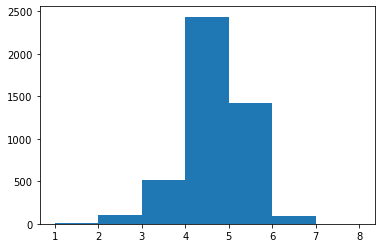

In [12]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [15]:
I_precalc = I

def simulate_precalc_mean(G, W, s_init):
    T = []; N = len(W)
    k_tot = 0

    for r in range(N):
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V)
            
            k = 0
            if t == 0:
                k = 8
            else:
                k_sum = 0
                for u in range(N):
                    if not V[u]:
                        k_sum += I_precalc[u]
                if ks:
                    k = min(int(round(k_sum / (N - sum(V)))), ks[-1])
                else:
                    k = int(round(k_sum / (N - sum(V))))
            
            P = []; ks.append(k); k_tot += k
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, 8, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T), k_tot)
    
    return T


In [16]:
print(max(I_precalc))
iters = simulate_precalc_mean(T, W, 743)

8
Result 0: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 1: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 2: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 3: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4: 6    acc: 5.2    ks: [8, 4, 4, 4, 4, 4]
Result 5: 5    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4]
Result 6: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 7: 5    acc: 5.125    ks: [8, 4, 4, 4, 4]
Result 8: 5    acc: 5.111111111111111    ks: [8, 4, 4, 4, 4]
Result 9: 5    acc: 5.1    ks: [8, 4, 4, 4, 4]
Result 10: 5    acc: 5.090909090909091    ks: [8, 4, 4, 4, 4]
Result 11: 6    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 12: 5    acc: 5.153846153846154    ks: [8, 4, 4, 4, 4]
Result 13: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 14: 1    acc: 4.866666666666666    ks: [8]
Result 15: 1    acc: 4.625    ks: [8]
Result 16: 1    acc: 4.411764705882353    ks: [8]
Result 17: 1    acc: 4.222222222222222    ks: [8]
Result 18: 1    acc: 4.052631578947368    

Result 138: 5    acc: 4.913669064748201    ks: [8, 4, 4, 4, 4]
Result 139: 5    acc: 4.914285714285715    ks: [8, 4, 4, 4, 4]
Result 140: 5    acc: 4.914893617021277    ks: [8, 4, 4, 4, 4]
Result 141: 4    acc: 4.908450704225352    ks: [8, 4, 4, 4]
Result 142: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 4]
Result 143: 6    acc: 4.916666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 144: 5    acc: 4.917241379310345    ks: [8, 4, 4, 4, 4]
Result 145: 5    acc: 4.917808219178082    ks: [8, 4, 4, 4, 4]
Result 146: 5    acc: 4.918367346938775    ks: [8, 4, 4, 4, 4]
Result 147: 4    acc: 4.912162162162162    ks: [8, 4, 4, 4]
Result 148: 4    acc: 4.906040268456376    ks: [8, 4, 4, 4]
Result 149: 5    acc: 4.906666666666666    ks: [8, 4, 4, 4, 4]
Result 150: 5    acc: 4.9072847682119205    ks: [8, 4, 4, 4, 4]
Result 151: 5    acc: 4.907894736842105    ks: [8, 4, 4, 4, 4]
Result 152: 5    acc: 4.908496732026144    ks: [8, 4, 4, 4, 4]
Result 153: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 

Result 268: 6    acc: 5.029739776951673    ks: [8, 3, 3, 3, 3, 3]
Result 269: 3    acc: 5.022222222222222    ks: [8, 3, 3]
Result 270: 5    acc: 5.022140221402214    ks: [8, 4, 4, 4, 3]
Result 271: 5    acc: 5.022058823529412    ks: [8, 3, 3, 2, 2]
Result 272: 4    acc: 5.018315018315018    ks: [8, 4, 4, 4]
Result 273: 4    acc: 5.014598540145985    ks: [8, 4, 4, 4]
Result 274: 4    acc: 5.010909090909091    ks: [8, 4, 4, 4]
Result 275: 5    acc: 5.010869565217392    ks: [8, 4, 3, 3, 3]
Result 276: 5    acc: 5.0108303249097474    ks: [8, 4, 3, 3, 3]
Result 277: 5    acc: 5.010791366906475    ks: [8, 4, 3, 3, 3]
Result 278: 5    acc: 5.010752688172043    ks: [8, 3, 3, 3, 3]
Result 279: 3    acc: 5.003571428571429    ks: [8, 3, 3]
Result 280: 5    acc: 5.00355871886121    ks: [8, 3, 3, 2, 2]
Result 281: 6    acc: 5.00709219858156    ks: [8, 4, 3, 3, 3, 3]
Result 282: 6    acc: 5.010600706713781    ks: [8, 3, 3, 3, 3, 3]
Result 283: 3    acc: 5.003521126760563    ks: [8, 3, 3]
Result 284:

Result 402: 6    acc: 4.92803970223325    ks: [8, 3, 3, 3, 3, 3]
Result 403: 5    acc: 4.928217821782178    ks: [8, 3, 3, 3, 3]
Result 404: 6    acc: 4.930864197530864    ks: [8, 3, 3, 3, 3, 3]
Result 405: 3    acc: 4.926108374384237    ks: [8, 3, 3]
Result 406: 6    acc: 4.9287469287469285    ks: [8, 3, 3, 3, 3, 3]
Result 407: 3    acc: 4.924019607843137    ks: [8, 3, 3]
Result 408: 5    acc: 4.924205378973105    ks: [8, 4, 3, 3, 3]
Result 409: 5    acc: 4.924390243902439    ks: [8, 3, 3, 3, 3]
Result 410: 4    acc: 4.922141119221411    ks: [8, 4, 4, 4]
Result 411: 4    acc: 4.919902912621359    ks: [8, 4, 4, 4]
Result 412: 6    acc: 4.9225181598062955    ks: [8, 4, 3, 3, 3, 3]
Result 413: 3    acc: 4.917874396135265    ks: [8, 3, 3]
Result 414: 5    acc: 4.918072289156626    ks: [8, 3, 3, 2, 2]
Result 415: 6    acc: 4.920673076923077    ks: [8, 4, 3, 3, 3, 3]
Result 416: 5    acc: 4.920863309352518    ks: [8, 4, 3, 3, 3]
Result 417: 5    acc: 4.921052631578948    ks: [8, 4, 3, 3, 3]


Result 531: 6    acc: 5.045112781954887    ks: [8, 3, 3, 3, 3, 3]
Result 532: 5    acc: 5.045028142589119    ks: [8, 3, 3, 3, 3]
Result 533: 5    acc: 5.044943820224719    ks: [8, 3, 3, 3, 3]
Result 534: 5    acc: 5.044859813084112    ks: [8, 3, 3, 3, 3]
Result 535: 6    acc: 5.0466417910447765    ks: [8, 3, 3, 3, 3, 3]
Result 536: 6    acc: 5.048417132216015    ks: [8, 3, 3, 3, 3, 3]
Result 537: 4    acc: 5.0464684014869885    ks: [8, 3, 3, 3]
Result 538: 5    acc: 5.046382189239332    ks: [8, 3, 3, 3, 3]
Result 539: 5    acc: 5.046296296296297    ks: [8, 3, 3, 3, 3]
Result 540: 6    acc: 5.048059149722736    ks: [8, 3, 3, 3, 3, 3]
Result 541: 6    acc: 5.049815498154982    ks: [8, 3, 3, 3, 3, 3]
Result 542: 5    acc: 5.0497237569060776    ks: [8, 3, 3, 3, 3]
Result 543: 5    acc: 5.049632352941177    ks: [8, 4, 4, 4, 4]
Result 544: 5    acc: 5.04954128440367    ks: [8, 3, 3, 3, 3]
Result 545: 4    acc: 5.0476190476190474    ks: [8, 4, 4, 4]
Result 546: 4    acc: 5.045703839122487    

Result 663: 4    acc: 5.016566265060241    ks: [8, 3, 3, 3]
Result 664: 4    acc: 5.015037593984962    ks: [8, 3, 3, 3]
Result 665: 4    acc: 5.013513513513513    ks: [8, 4, 4, 4]
Result 666: 4    acc: 5.011994002998501    ks: [8, 3, 3, 3]
Result 667: 4    acc: 5.0104790419161676    ks: [8, 3, 3, 3]
Result 668: 4    acc: 5.00896860986547    ks: [8, 3, 3, 3]
Result 669: 4    acc: 5.007462686567164    ks: [8, 3, 3, 3]
Result 670: 4    acc: 5.0059612518628915    ks: [8, 3, 3, 3]
Result 671: 4    acc: 5.004464285714286    ks: [8, 4, 4, 4]
Result 672: 4    acc: 5.00297176820208    ks: [8, 3, 3, 3]
Result 673: 4    acc: 5.001483679525222    ks: [8, 3, 3, 3]
Result 674: 4    acc: 5.0    ks: [8, 3, 3, 3]
Result 675: 4    acc: 4.9985207100591715    ks: [8, 3, 3, 3]
Result 676: 4    acc: 4.997045790251108    ks: [8, 4, 4, 4]
Result 677: 4    acc: 4.995575221238938    ks: [8, 3, 3, 3]
Result 678: 4    acc: 4.9941089837997055    ks: [8, 4, 4, 4]
Result 679: 4    acc: 4.992647058823529    ks: [8, 3

Result 795: 3    acc: 5.007537688442211    ks: [8, 3, 3]
Result 796: 3    acc: 5.005018820577164    ks: [8, 3, 3]
Result 797: 3    acc: 5.00250626566416    ks: [8, 3, 3]
Result 798: 3    acc: 5.0    ks: [8, 3, 3]
Result 799: 3    acc: 4.9975    ks: [8, 3, 3]
Result 800: 3    acc: 4.995006242197253    ks: [8, 3, 3]
Result 801: 5    acc: 4.99501246882793    ks: [8, 4, 4, 4, 4]
Result 802: 6    acc: 4.9962640099626405    ks: [8, 3, 3, 3, 3, 3]
Result 803: 5    acc: 4.996268656716418    ks: [8, 4, 3, 3, 3]
Result 804: 5    acc: 4.9962732919254655    ks: [8, 3, 3, 2, 2]
Result 805: 7    acc: 4.9987593052109185    ks: [8, 3, 3, 3, 3, 3, 3]
Result 806: 6    acc: 5.0    ks: [8, 3, 3, 3, 3, 3]
Result 807: 5    acc: 5.0    ks: [8, 3, 3, 3, 3]
Result 808: 6    acc: 5.00123609394314    ks: [8, 3, 3, 3, 3, 3]
Result 809: 5    acc: 5.001234567901235    ks: [8, 3, 3, 3, 3]
Result 810: 3    acc: 4.998766954377312    ks: [8, 3, 2]
Result 811: 4    acc: 4.997536945812808    ks: [8, 4, 3, 3]
Result 812: 

Result 927: 4    acc: 4.9967672413793105    ks: [8, 3, 3, 3]
Result 928: 5    acc: 4.996770721205597    ks: [8, 3, 3, 3, 3]
Result 929: 5    acc: 4.996774193548387    ks: [8, 4, 4, 4, 4]
Result 930: 5    acc: 4.996777658431793    ks: [8, 3, 3, 3, 3]
Result 931: 5    acc: 4.996781115879829    ks: [8, 4, 4, 4, 4]
Result 932: 4    acc: 4.995712754555198    ks: [8, 3, 3, 3]
Result 933: 7    acc: 4.997858672376874    ks: [8, 3, 3, 3, 3, 3, 3]
Result 934: 4    acc: 4.996791443850268    ks: [8, 4, 4, 4]
Result 935: 4    acc: 4.995726495726496    ks: [8, 4, 4, 3]
Result 936: 5    acc: 4.995731056563501    ks: [8, 4, 3, 3, 3]
Result 937: 4    acc: 4.994669509594883    ks: [8, 4, 4, 3]
Result 938: 4    acc: 4.993610223642173    ks: [8, 4, 4, 3]
Result 939: 4    acc: 4.992553191489361    ks: [8, 4, 4, 3]
Result 940: 4    acc: 4.991498405951116    ks: [8, 4, 4, 3]
Result 941: 4    acc: 4.990445859872612    ks: [8, 4, 4, 4]
Result 942: 4    acc: 4.989395546129375    ks: [8, 4, 4, 4]
Result 943: 5  

Result 1061: 5    acc: 4.971751412429379    ks: [8, 4, 4, 3, 3]
Result 1062: 7    acc: 4.973659454374412    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1063: 5    acc: 4.973684210526316    ks: [8, 3, 3, 3, 3]
Result 1064: 3    acc: 4.971830985915493    ks: [8, 3, 3]
Result 1065: 4    acc: 4.970919324577861    ks: [8, 4, 4, 3]
Result 1066: 5    acc: 4.970946579194002    ks: [8, 3, 3, 3, 3]
Result 1067: 5    acc: 4.9709737827715355    ks: [8, 3, 3, 3, 3]
Result 1068: 5    acc: 4.971000935453695    ks: [8, 4, 4, 3, 3]
Result 1069: 5    acc: 4.971028037383178    ks: [8, 4, 3, 3, 3]
Result 1070: 5    acc: 4.971055088702148    ks: [8, 3, 3, 3, 3]
Result 1071: 5    acc: 4.9710820895522385    ks: [8, 4, 4, 3, 3]
Result 1072: 5    acc: 4.971109040074557    ks: [8, 3, 3, 3, 3]
Result 1073: 5    acc: 4.971135940409684    ks: [8, 4, 4, 3, 3]
Result 1074: 5    acc: 4.971162790697674    ks: [8, 3, 3, 3, 3]
Result 1075: 4    acc: 4.970260223048327    ks: [8, 4, 4, 3]
Result 1076: 6    acc: 4.971216341689879    

Result 1194: 5    acc: 4.932217573221758    ks: [8, 4, 3, 3, 3]
Result 1195: 5    acc: 4.932274247491639    ks: [8, 4, 3, 3, 3]
Result 1196: 5    acc: 4.932330827067669    ks: [8, 4, 3, 3, 3]
Result 1197: 5    acc: 4.932387312186978    ks: [8, 4, 3, 3, 3]
Result 1198: 5    acc: 4.932443703085905    ks: [8, 4, 3, 3, 3]
Result 1199: 5    acc: 4.9325    ks: [8, 4, 3, 3, 3]
Result 1200: 5    acc: 4.9325562031640295    ks: [8, 4, 3, 3, 3]
Result 1201: 5    acc: 4.93261231281198    ks: [8, 4, 3, 3, 3]
Result 1202: 5    acc: 4.932668329177058    ks: [8, 4, 3, 3, 3]
Result 1203: 6    acc: 4.9335548172757475    ks: [8, 4, 3, 3, 3, 3]
Result 1204: 6    acc: 4.9344398340248965    ks: [8, 4, 3, 3, 3, 3]
Result 1205: 6    acc: 4.935323383084577    ks: [8, 4, 3, 3, 3, 3]
Result 1206: 7    acc: 4.937033968516984    ks: [8, 4, 3, 3, 3, 3, 3]
Result 1207: 7    acc: 4.938741721854305    ks: [8, 4, 3, 3, 3, 3, 3]
Result 1208: 7    acc: 4.94044665012407    ks: [8, 4, 3, 3, 3, 3, 3]
Result 1209: 4    acc: 

Result 1324: 6    acc: 4.980377358490566    ks: [8, 3, 3, 3, 3, 3]
Result 1325: 5    acc: 4.980392156862745    ks: [8, 3, 3, 3, 3]
Result 1326: 5    acc: 4.980406932931424    ks: [8, 3, 3, 3, 3]
Result 1327: 5    acc: 4.980421686746988    ks: [8, 3, 3, 3, 3]
Result 1328: 6    acc: 4.981188863807374    ks: [8, 3, 3, 3, 3, 3]
Result 1329: 6    acc: 4.981954887218045    ks: [8, 3, 3, 3, 3, 3]
Result 1330: 5    acc: 4.981968444778362    ks: [8, 3, 3, 3, 3]
Result 1331: 5    acc: 4.981981981981982    ks: [8, 3, 3, 3, 3]
Result 1332: 5    acc: 4.981995498874719    ks: [8, 3, 3, 3, 3]
Result 1333: 5    acc: 4.982008995502249    ks: [8, 3, 3, 3, 3]
Result 1334: 5    acc: 4.9820224719101125    ks: [8, 3, 3, 3, 3]
Result 1335: 5    acc: 4.982035928143713    ks: [8, 3, 3, 3, 3]
Result 1336: 5    acc: 4.982049364248317    ks: [8, 3, 3, 3, 3]
Result 1337: 5    acc: 4.982062780269058    ks: [8, 3, 3, 3, 3]
Result 1338: 5    acc: 4.982076176250933    ks: [8, 3, 3, 3, 3]
Result 1339: 5    acc: 4.98208

Result 1453: 4    acc: 4.985557083906465    ks: [8, 4, 4, 4]
Result 1454: 4    acc: 4.984879725085911    ks: [8, 4, 4, 4]
Result 1455: 4    acc: 4.9842032967032965    ks: [8, 4, 4, 4]
Result 1456: 4    acc: 4.983527796842828    ks: [8, 4, 4, 4]
Result 1457: 4    acc: 4.982853223593964    ks: [8, 4, 4, 4]
Result 1458: 4    acc: 4.982179575051405    ks: [8, 4, 4, 4]
Result 1459: 4    acc: 4.9815068493150685    ks: [8, 4, 4, 4]
Result 1460: 4    acc: 4.9808350444900755    ks: [8, 4, 4, 4]
Result 1461: 4    acc: 4.980164158686731    ks: [8, 4, 4, 4]
Result 1462: 4    acc: 4.979494190020506    ks: [8, 4, 4, 4]
Result 1463: 4    acc: 4.978825136612022    ks: [8, 4, 4, 4]
Result 1464: 4    acc: 4.978156996587031    ks: [8, 4, 4, 4]
Result 1465: 4    acc: 4.977489768076398    ks: [8, 4, 4, 4]
Result 1466: 4    acc: 4.976823449216087    ks: [8, 4, 4, 4]
Result 1467: 4    acc: 4.976158038147139    ks: [8, 4, 4, 4]
Result 1468: 4    acc: 4.975493533015657    ks: [8, 4, 4, 4]
Result 1469: 4    acc

Result 1582: 5    acc: 4.993051168667088    ks: [8, 4, 4, 4, 3]
Result 1583: 5    acc: 4.993055555555555    ks: [8, 4, 4, 4, 3]
Result 1584: 5    acc: 4.993059936908518    ks: [8, 4, 4, 4, 3]
Result 1585: 5    acc: 4.993064312736444    ks: [8, 4, 4, 4, 3]
Result 1586: 5    acc: 4.9930686830497795    ks: [8, 4, 4, 4, 3]
Result 1587: 5    acc: 4.9930730478589425    ks: [8, 3, 3, 3, 3]
Result 1588: 5    acc: 4.993077407174323    ks: [8, 3, 3, 3, 3]
Result 1589: 5    acc: 4.993081761006289    ks: [8, 3, 3, 3, 3]
Result 1590: 5    acc: 4.993086109365179    ks: [8, 3, 3, 3, 3]
Result 1591: 5    acc: 4.993090452261306    ks: [8, 3, 3, 3, 3]
Result 1592: 5    acc: 4.993094789704959    ks: [8, 3, 3, 3, 3]
Result 1593: 5    acc: 4.993099121706399    ks: [8, 3, 3, 3, 3]
Result 1594: 5    acc: 4.993103448275862    ks: [8, 3, 3, 3, 3]
Result 1595: 5    acc: 4.993107769423559    ks: [8, 3, 3, 3, 3]
Result 1596: 5    acc: 4.993112085159674    ks: [8, 3, 3, 3, 3]
Result 1597: 5    acc: 4.9931163954943

Result 1713: 5    acc: 5.016336056009335    ks: [8, 4, 3, 3, 3]
Result 1714: 6    acc: 5.016909620991254    ks: [8, 3, 3, 3, 3, 3]
Result 1715: 6    acc: 5.0174825174825175    ks: [8, 3, 3, 3, 3, 3]
Result 1716: 6    acc: 5.018054746651136    ks: [8, 3, 3, 3, 3, 3]
Result 1717: 6    acc: 5.018626309662398    ks: [8, 3, 3, 3, 3, 3]
Result 1718: 6    acc: 5.019197207678883    ks: [8, 3, 3, 3, 3, 3]
Result 1719: 6    acc: 5.019767441860465    ks: [8, 3, 3, 3, 3, 3]
Result 1720: 6    acc: 5.0203370133643235    ks: [8, 3, 3, 3, 3, 3]
Result 1721: 6    acc: 5.020905923344948    ks: [8, 3, 3, 3, 3, 3]
Result 1722: 6    acc: 5.02147417295415    ks: [8, 3, 3, 3, 3, 3]
Result 1723: 6    acc: 5.022041763341067    ks: [8, 3, 3, 3, 3, 3]
Result 1724: 6    acc: 5.022608695652174    ks: [8, 3, 3, 3, 3, 3]
Result 1725: 6    acc: 5.0231749710312865    ks: [8, 3, 3, 3, 3, 3]
Result 1726: 6    acc: 5.023740590619571    ks: [8, 3, 3, 3, 3, 3]
Result 1727: 5    acc: 5.023726851851852    ks: [8, 3, 3, 3, 3]

Result 1841: 5    acc: 5.020086862106406    ks: [8, 4, 4, 4, 4]
Result 1842: 5    acc: 5.020075963103635    ks: [8, 4, 4, 4, 4]
Result 1843: 6    acc: 5.020607375271149    ks: [8, 4, 4, 4, 4, 4]
Result 1844: 5    acc: 5.020596205962059    ks: [8, 4, 4, 4, 4]
Result 1845: 5    acc: 5.020585048754063    ks: [8, 4, 3, 3, 3]
Result 1846: 5    acc: 5.020573903627504    ks: [8, 3, 3, 3, 3]
Result 1847: 4    acc: 5.020021645021645    ks: [8, 4, 3, 3]
Result 1848: 5    acc: 5.020010816657653    ks: [8, 3, 3, 3, 3]
Result 1849: 4    acc: 5.019459459459459    ks: [8, 4, 3, 3]
Result 1850: 4    acc: 5.018908698001081    ks: [8, 4, 3, 3]
Result 1851: 5    acc: 5.01889848812095    ks: [8, 3, 3, 3, 3]
Result 1852: 5    acc: 5.0188882892606586    ks: [8, 4, 4, 4, 3]
Result 1853: 5    acc: 5.018878101402374    ks: [8, 4, 3, 3, 3]
Result 1854: 6    acc: 5.019407008086254    ks: [8, 4, 4, 4, 4, 4]
Result 1855: 6    acc: 5.019935344827586    ks: [8, 4, 4, 4, 4, 4]
Result 1856: 5    acc: 5.019924609585352

Result 1971: 5    acc: 5.013184584178499    ks: [8, 4, 3, 3, 3]
Result 1972: 5    acc: 5.01317790167258    ks: [8, 4, 3, 3, 3]
Result 1973: 5    acc: 5.0131712259371835    ks: [8, 4, 3, 3, 3]
Result 1974: 5    acc: 5.013164556962026    ks: [8, 4, 3, 3, 3]
Result 1975: 5    acc: 5.0131578947368425    ks: [8, 4, 3, 3, 3]
Result 1976: 5    acc: 5.013151239251391    ks: [8, 4, 3, 3, 3]
Result 1977: 5    acc: 5.01314459049545    ks: [8, 4, 3, 3, 3]
Result 1978: 5    acc: 5.013137948458818    ks: [8, 4, 3, 3, 3]
Result 1979: 5    acc: 5.013131313131313    ks: [8, 4, 3, 3, 3]
Result 1980: 5    acc: 5.013124684502777    ks: [8, 4, 3, 3, 3]
Result 1981: 6    acc: 5.0136226034308775    ks: [8, 4, 3, 3, 3, 3]
Result 1982: 6    acc: 5.0141200201714575    ks: [8, 4, 3, 3, 3, 3]
Result 1983: 6    acc: 5.014616935483871    ks: [8, 4, 3, 3, 3, 3]
Result 1984: 6    acc: 5.015113350125945    ks: [8, 4, 3, 3, 3, 3]
Result 1985: 5    acc: 5.015105740181269    ks: [8, 4, 3, 3, 3]
Result 1986: 5    acc: 5.0

Result 2099: 5    acc: 5.021904761904762    ks: [8, 3, 3, 3, 3]
Result 2100: 5    acc: 5.021894336030462    ks: [8, 3, 3, 3, 3]
Result 2101: 5    acc: 5.021883920076118    ks: [8, 3, 3, 3, 3]
Result 2102: 5    acc: 5.02187351402758    ks: [8, 3, 3, 3, 3]
Result 2103: 4    acc: 5.02138783269962    ks: [8, 3, 3, 3]
Result 2104: 4    acc: 5.020902612826603    ks: [8, 3, 3, 3]
Result 2105: 4    acc: 5.020417853751187    ks: [8, 3, 3, 3]
Result 2106: 4    acc: 5.019933554817276    ks: [8, 3, 3, 3]
Result 2107: 4    acc: 5.019449715370019    ks: [8, 3, 3, 3]
Result 2108: 4    acc: 5.018966334755809    ks: [8, 3, 3, 3]
Result 2109: 4    acc: 5.018483412322275    ks: [8, 3, 3, 3]
Result 2110: 4    acc: 5.018000947418285    ks: [8, 3, 3, 3]
Result 2111: 4    acc: 5.0175189393939394    ks: [8, 3, 3, 3]
Result 2112: 5    acc: 5.01751064836725    ks: [8, 3, 3, 3, 3]
Result 2113: 5    acc: 5.017502365184485    ks: [8, 3, 3, 3, 3]
Result 2114: 5    acc: 5.017494089834515    ks: [8, 3, 3, 3, 3]
Resul

Result 2232: 3    acc: 4.978056426332288    ks: [8, 3, 2]
Result 2233: 3    acc: 4.977170993733214    ks: [8, 3, 2]
Result 2234: 3    acc: 4.976286353467562    ks: [8, 3, 2]
Result 2235: 3    acc: 4.975402504472272    ks: [8, 3, 2]
Result 2236: 3    acc: 4.9745194456861865    ks: [8, 3, 2]
Result 2237: 3    acc: 4.973637176050045    ks: [8, 3, 2]
Result 2238: 3    acc: 4.972755694506476    ks: [8, 3, 2]
Result 2239: 3    acc: 4.971875    ks: [8, 3, 2]
Result 2240: 3    acc: 4.970995091477019    ks: [8, 3, 2]
Result 2241: 3    acc: 4.970115967885817    ks: [8, 3, 2]
Result 2242: 3    acc: 4.96923762817655    ks: [8, 3, 2]
Result 2243: 3    acc: 4.968360071301248    ks: [8, 3, 2]
Result 2244: 3    acc: 4.967483296213809    ks: [8, 3, 2]
Result 2245: 3    acc: 4.966607301869991    ks: [8, 3, 2]
Result 2246: 3    acc: 4.965732087227415    ks: [8, 3, 2]
Result 2247: 3    acc: 4.964857651245552    ks: [8, 3, 2]
Result 2248: 5    acc: 4.964873277012005    ks: [8, 4, 4, 4, 4]
Result 2249: 4   

Result 2364: 5    acc: 4.954334038054968    ks: [8, 4, 4, 3, 3]
Result 2365: 6    acc: 4.954775993237532    ks: [8, 4, 3, 3, 3, 3]
Result 2366: 6    acc: 4.9552175749894385    ks: [8, 4, 3, 3, 3, 3]
Result 2367: 6    acc: 4.955658783783784    ks: [8, 4, 3, 3, 3, 3]
Result 2368: 6    acc: 4.956099620092866    ks: [8, 3, 3, 3, 3, 3]
Result 2369: 5    acc: 4.956118143459916    ks: [8, 3, 3, 3, 3]
Result 2370: 5    acc: 4.956136651202025    ks: [8, 3, 3, 3, 3]
Result 2371: 5    acc: 4.956155143338955    ks: [8, 3, 3, 3, 3]
Result 2372: 5    acc: 4.956173619890434    ks: [8, 3, 3, 3, 3]
Result 2373: 5    acc: 4.956192080876159    ks: [8, 3, 3, 3, 3]
Result 2374: 5    acc: 4.95621052631579    ks: [8, 3, 3, 3, 3]
Result 2375: 4    acc: 4.95580808080808    ks: [8, 3, 3, 3]
Result 2376: 7    acc: 4.956668068994531    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2377: 7    acc: 4.957527333894029    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2378: 8    acc: 4.958806221101303    ks: [8, 3, 3, 3, 3, 3, 3, 3]
Result 2379

Result 2497: 4    acc: 4.921537229783827    ks: [8, 3, 3, 3]
Result 2498: 4    acc: 4.921168467386955    ks: [8, 3, 3, 3]
Result 2499: 4    acc: 4.9208    ks: [8, 3, 3, 3]
Result 2500: 4    acc: 4.920431827269092    ks: [8, 3, 3, 3]
Result 2501: 4    acc: 4.9200639488409275    ks: [8, 3, 3, 3]
Result 2502: 5    acc: 4.920095884938075    ks: [8, 3, 3, 3, 3]
Result 2503: 4    acc: 4.919728434504792    ks: [8, 3, 3, 3]
Result 2504: 4    acc: 4.91936127744511    ks: [8, 3, 3, 3]
Result 2505: 4    acc: 4.918994413407821    ks: [8, 3, 3, 3]
Result 2506: 4    acc: 4.918627842042282    ks: [8, 3, 3, 3]
Result 2507: 4    acc: 4.9182615629984054    ks: [8, 3, 3, 3]
Result 2508: 4    acc: 4.917895575926664    ks: [8, 3, 3, 3]
Result 2509: 4    acc: 4.917529880478088    ks: [8, 3, 3, 3]
Result 2510: 4    acc: 4.9171644763042615    ks: [8, 3, 3, 3]
Result 2511: 4    acc: 4.916799363057325    ks: [8, 3, 3, 3]
Result 2512: 5    acc: 4.91683247115002    ks: [8, 3, 3, 3, 3]
Result 2513: 5    acc: 4.916

Result 2631: 4    acc: 4.89741641337386    ks: [8, 3, 3, 3]
Result 2632: 4    acc: 4.897075579187239    ks: [8, 3, 3, 3]
Result 2633: 4    acc: 4.896735003796508    ks: [8, 3, 3, 3]
Result 2634: 4    acc: 4.896394686907021    ks: [8, 3, 3, 3]
Result 2635: 4    acc: 4.896054628224583    ks: [8, 3, 3, 3]
Result 2636: 5    acc: 4.896094046264695    ks: [8, 3, 3, 3, 3]
Result 2637: 5    acc: 4.896133434420015    ks: [8, 3, 3, 3, 3]
Result 2638: 5    acc: 4.896172792724517    ks: [8, 3, 3, 3, 3]
Result 2639: 5    acc: 4.8962121212121215    ks: [8, 3, 3, 3, 3]
Result 2640: 5    acc: 4.896251419916698    ks: [8, 3, 3, 3, 3]
Result 2641: 5    acc: 4.8962906888720665    ks: [8, 3, 3, 3, 3]
Result 2642: 5    acc: 4.896329928111994    ks: [8, 3, 3, 3, 3]
Result 2643: 5    acc: 4.896369137670197    ks: [8, 3, 3, 3, 3]
Result 2644: 5    acc: 4.89640831758034    ks: [8, 3, 3, 3, 3]
Result 2645: 4    acc: 4.896069538926682    ks: [8, 3, 3, 3]
Result 2646: 4    acc: 4.895731016244805    ks: [8, 3, 3, 

Result 2760: 5    acc: 4.898949655921768    ks: [8, 4, 3, 3, 3]
Result 2761: 5    acc: 4.898986241853729    ks: [8, 4, 4, 4, 4]
Result 2762: 5    acc: 4.899022801302932    ks: [8, 4, 4, 4, 4]
Result 2763: 5    acc: 4.899059334298118    ks: [8, 4, 4, 4, 4]
Result 2764: 5    acc: 4.899095840867993    ks: [8, 4, 4, 4, 4]
Result 2765: 5    acc: 4.899132321041215    ks: [8, 4, 4, 4, 4]
Result 2766: 5    acc: 4.899168774846404    ks: [8, 4, 4, 4, 4]
Result 2767: 5    acc: 4.899205202312139    ks: [8, 4, 4, 4, 4]
Result 2768: 5    acc: 4.8992416034669555    ks: [8, 4, 4, 4, 4]
Result 2769: 5    acc: 4.8992779783393505    ks: [8, 4, 4, 3, 3]
Result 2770: 5    acc: 4.899314326957777    ks: [8, 4, 4, 3, 3]
Result 2771: 5    acc: 4.89935064935065    ks: [8, 4, 4, 3, 3]
Result 2772: 5    acc: 4.89938694554634    ks: [8, 4, 4, 4, 4]
Result 2773: 5    acc: 4.899423215573179    ks: [8, 4, 4, 4, 4]
Result 2774: 5    acc: 4.899459459459459    ks: [8, 4, 4, 4, 4]
Result 2775: 5    acc: 4.899495677233429

Result 2890: 4    acc: 4.894500172950536    ks: [8, 3, 3, 3]
Result 2891: 4    acc: 4.894190871369295    ks: [8, 3, 3, 3]
Result 2892: 4    acc: 4.893881783615624    ks: [8, 3, 3, 3]
Result 2893: 4    acc: 4.893572909467864    ks: [8, 3, 3, 3]
Result 2894: 4    acc: 4.893264248704663    ks: [8, 3, 3, 3]
Result 2895: 7    acc: 4.893991712707182    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2896: 5    acc: 4.894028305143252    ks: [8, 3, 3, 3, 3]
Result 2897: 5    acc: 4.894064872325742    ks: [8, 3, 3, 3, 3]
Result 2898: 5    acc: 4.894101414280787    ks: [8, 3, 3, 3, 3]
Result 2899: 5    acc: 4.894137931034483    ks: [8, 3, 3, 3, 3]
Result 2900: 6    acc: 4.894519131334023    ks: [8, 3, 3, 3, 3, 3]
Result 2901: 6    acc: 4.894900068917988    ks: [8, 3, 3, 3, 3, 3]
Result 2902: 6    acc: 4.895280744057871    ks: [8, 3, 3, 3, 3, 3]
Result 2903: 6    acc: 4.895661157024794    ks: [8, 3, 3, 3, 3, 3]
Result 2904: 5    acc: 4.895697074010327    ks: [8, 3, 3, 3, 3]
Result 2905: 5    acc: 4.895732966276

Result 3019: 3    acc: 4.897350993377484    ks: [8, 3, 2]
Result 3020: 3    acc: 4.8967229394240315    ks: [8, 3, 2]
Result 3021: 3    acc: 4.896095301125083    ks: [8, 3, 2]
Result 3022: 3    acc: 4.895468078068144    ks: [8, 3, 2]
Result 3023: 3    acc: 4.89484126984127    ks: [8, 3, 2]
Result 3024: 3    acc: 4.8942148760330575    ks: [8, 3, 2]
Result 3025: 3    acc: 4.89358889623265    ks: [8, 3, 2]
Result 3026: 3    acc: 4.892963330029732    ks: [8, 3, 2]
Result 3027: 3    acc: 4.892338177014531    ks: [8, 3, 2]
Result 3028: 3    acc: 4.891713436777814    ks: [8, 3, 2]
Result 3029: 3    acc: 4.891089108910891    ks: [8, 3, 2]
Result 3030: 3    acc: 4.890465193005609    ks: [8, 3, 2]
Result 3031: 3    acc: 4.889841688654354    ks: [8, 3, 2]
Result 3032: 3    acc: 4.88921859545005    ks: [8, 3, 2]
Result 3033: 3    acc: 4.8885959129861565    ks: [8, 3, 2]
Result 3034: 3    acc: 4.887973640856672    ks: [8, 3, 2]
Result 3035: 3    acc: 4.887351778656127    ks: [8, 3, 2]
Result 3036: 3

Result 3150: 5    acc: 4.893049825452238    ks: [8, 4, 3, 3, 3]
Result 3151: 5    acc: 4.8930837563451774    ks: [8, 4, 3, 3, 3]
Result 3152: 5    acc: 4.893117665715192    ks: [8, 4, 3, 3, 3]
Result 3153: 5    acc: 4.893151553582752    ks: [8, 4, 3, 3, 3]
Result 3154: 5    acc: 4.8931854199683045    ks: [8, 4, 4, 4, 4]
Result 3155: 5    acc: 4.893219264892268    ks: [8, 4, 4, 4, 4]
Result 3156: 5    acc: 4.893253088375039    ks: [8, 4, 4, 4, 4]
Result 3157: 5    acc: 4.893286890436985    ks: [8, 4, 4, 4, 4]
Result 3158: 5    acc: 4.893320671098449    ks: [8, 4, 4, 4, 4]
Result 3159: 5    acc: 4.8933544303797465    ks: [8, 4, 4, 4, 4]
Result 3160: 5    acc: 4.89338816830117    ks: [8, 4, 4, 4, 4]
Result 3161: 5    acc: 4.893421884882986    ks: [8, 4, 4, 4, 4]
Result 3162: 6    acc: 4.893771735693962    ks: [8, 3, 3, 3, 3, 3]
Result 3163: 6    acc: 4.894121365360303    ks: [8, 3, 3, 3, 3, 3]
Result 3164: 6    acc: 4.894470774091627    ks: [8, 3, 3, 3, 3, 3]
Result 3165: 6    acc: 4.8948

Result 3279: 5    acc: 4.900914634146342    ks: [8, 3, 3, 3, 3]
Result 3280: 5    acc: 4.9009448338921064    ks: [8, 4, 3, 3, 3]
Result 3281: 5    acc: 4.900975015234613    ks: [8, 4, 4, 3, 3]
Result 3282: 5    acc: 4.90100517819068    ks: [8, 4, 3, 3, 3]
Result 3283: 5    acc: 4.901035322777101    ks: [8, 4, 3, 3, 3]
Result 3284: 5    acc: 4.901065449010654    ks: [8, 4, 3, 3, 3]
Result 3285: 5    acc: 4.9010955569080945    ks: [8, 4, 3, 3, 3]
Result 3286: 5    acc: 4.9011256464861574    ks: [8, 4, 3, 3, 3]
Result 3287: 5    acc: 4.901155717761557    ks: [8, 4, 3, 3, 3]
Result 3288: 5    acc: 4.901185770750988    ks: [8, 4, 3, 3, 3]
Result 3289: 5    acc: 4.901215805471125    ks: [8, 4, 3, 3, 3]
Result 3290: 5    acc: 4.901245821938621    ks: [8, 4, 3, 3, 3]
Result 3291: 5    acc: 4.90127582017011    ks: [8, 4, 3, 3, 3]
Result 3292: 5    acc: 4.901305800182205    ks: [8, 4, 3, 3, 3]
Result 3293: 5    acc: 4.9013357619915    ks: [8, 4, 3, 3, 3]
Result 3294: 5    acc: 4.901365705614568 

Result 3411: 6    acc: 4.908558030480656    ks: [8, 4, 4, 4, 4, 4]
Result 3412: 5    acc: 4.908584822736596    ks: [8, 4, 4, 4, 4]
Result 3413: 6    acc: 4.908904510837727    ks: [8, 4, 4, 4, 4, 4]
Result 3414: 5    acc: 4.908931185944363    ks: [8, 4, 4, 4, 4]
Result 3415: 5    acc: 4.908957845433255    ks: [8, 4, 4, 4, 4]
Result 3416: 5    acc: 4.908984489318115    ks: [8, 4, 4, 4, 4]
Result 3417: 5    acc: 4.909011117612639    ks: [8, 4, 4, 4, 4]
Result 3418: 5    acc: 4.909037730330506    ks: [8, 4, 4, 4, 4]
Result 3419: 6    acc: 4.909356725146199    ks: [8, 4, 4, 4, 4, 4]
Result 3420: 6    acc: 4.909675533469746    ks: [8, 4, 4, 4, 4, 4]
Result 3421: 6    acc: 4.9099941554646405    ks: [8, 4, 4, 4, 4, 4]
Result 3422: 6    acc: 4.910312591294186    ks: [8, 4, 4, 4, 4, 4]
Result 3423: 6    acc: 4.910630841121495    ks: [8, 4, 4, 4, 4, 4]
Result 3424: 5    acc: 4.910656934306569    ks: [8, 4, 4, 4, 4]
Result 3425: 5    acc: 4.910683012259194    ks: [8, 4, 4, 4, 4]
Result 3426: 5    

Result 3538: 5    acc: 4.9208816049731565    ks: [8, 4, 4, 3, 3]
Result 3539: 5    acc: 4.9209039548022595    ks: [8, 4, 4, 3, 3]
Result 3540: 5    acc: 4.920926292007907    ks: [8, 4, 4, 3, 3]
Result 3541: 5    acc: 4.92094861660079    ks: [8, 4, 4, 3, 3]
Result 3542: 5    acc: 4.920970928591589    ks: [8, 4, 4, 3, 3]
Result 3543: 5    acc: 4.92099322799097    ks: [8, 4, 4, 3, 3]
Result 3544: 5    acc: 4.921015514809591    ks: [8, 4, 4, 3, 3]
Result 3545: 5    acc: 4.921037789058094    ks: [8, 4, 4, 3, 3]
Result 3546: 5    acc: 4.92106005074711    ks: [8, 4, 4, 3, 3]
Result 3547: 5    acc: 4.92108229988726    ks: [8, 4, 4, 4, 3]
Result 3548: 6    acc: 4.921386306001691    ks: [8, 3, 3, 3, 3, 3]
Result 3549: 5    acc: 4.9214084507042255    ks: [8, 3, 3, 3, 3]
Result 3550: 5    acc: 4.921430582934384    ks: [8, 3, 3, 3, 3]
Result 3551: 5    acc: 4.921452702702703    ks: [8, 3, 3, 3, 3]
Result 3552: 4    acc: 4.9211933577258655    ks: [8, 3, 3, 3]
Result 3553: 5    acc: 4.92121553179516 

Result 3671: 6    acc: 4.92483660130719    ks: [8, 3, 3, 3, 3, 3]
Result 3672: 5    acc: 4.924857065069426    ks: [8, 3, 3, 3, 3]
Result 3673: 5    acc: 4.924877517691889    ks: [8, 3, 3, 3, 3]
Result 3674: 5    acc: 4.9248979591836735    ks: [8, 3, 3, 3, 3]
Result 3675: 5    acc: 4.924918389553863    ks: [8, 3, 3, 3, 3]
Result 3676: 5    acc: 4.924938808811532    ks: [8, 3, 3, 3, 3]
Result 3677: 5    acc: 4.924959216965743    ks: [8, 3, 3, 3, 3]
Result 3678: 5    acc: 4.924979614025551    ks: [8, 3, 3, 3, 3]
Result 3679: 5    acc: 4.925    ks: [8, 3, 3, 3, 3]
Result 3680: 6    acc: 4.9252920402064655    ks: [8, 3, 3, 3, 3, 3]
Result 3681: 5    acc: 4.925312330255296    ks: [8, 3, 3, 3, 3]
Result 3682: 5    acc: 4.925332609285908    ks: [8, 3, 3, 3, 3]
Result 3683: 5    acc: 4.925352877307275    ks: [8, 3, 3, 3, 3]
Result 3684: 5    acc: 4.925373134328358    ks: [8, 3, 3, 3, 3]
Result 3685: 5    acc: 4.925393380358112    ks: [8, 3, 3, 3, 3]
Result 3686: 5    acc: 4.925413615405478    k

Result 3800: 5    acc: 4.931860036832412    ks: [8, 3, 3, 3, 3]
Result 3801: 5    acc: 4.931877958968964    ks: [8, 3, 3, 3, 3]
Result 3802: 5    acc: 4.931895871680252    ks: [8, 3, 3, 3, 3]
Result 3803: 4    acc: 4.931650893796005    ks: [8, 3, 3, 3]
Result 3804: 4    acc: 4.931406044678055    ks: [8, 3, 3, 3]
Result 3805: 4    acc: 4.931161324224908    ks: [8, 3, 3, 3]
Result 3806: 4    acc: 4.930916732335172    ks: [8, 3, 3, 3]
Result 3807: 4    acc: 4.930672268907563    ks: [8, 3, 3, 3]
Result 3808: 5    acc: 4.930690469939616    ks: [8, 3, 3, 3, 3]
Result 3809: 5    acc: 4.930708661417323    ks: [8, 3, 3, 3, 3]
Result 3810: 5    acc: 4.930726843348203    ks: [8, 3, 3, 3, 3]
Result 3811: 5    acc: 4.930745015739769    ks: [8, 3, 3, 3, 3]
Result 3812: 5    acc: 4.930763178599528    ks: [8, 3, 3, 3, 3]
Result 3813: 5    acc: 4.930781331934976    ks: [8, 3, 3, 3, 3]
Result 3814: 5    acc: 4.930799475753604    ks: [8, 3, 3, 3, 3]
Result 3815: 5    acc: 4.930817610062893    ks: [8, 3, 

Result 3929: 5    acc: 4.933078880407125    ks: [8, 3, 3, 3, 3]
Result 3930: 5    acc: 4.933095904350038    ks: [8, 3, 3, 3, 3]
Result 3931: 6    acc: 4.933367243133265    ks: [8, 3, 3, 3, 3, 3]
Result 3932: 6    acc: 4.933638443935926    ks: [8, 3, 3, 3, 3, 3]
Result 3933: 6    acc: 4.933909506863244    ks: [8, 3, 3, 3, 3, 3]
Result 3934: 6    acc: 4.93418043202033    ks: [8, 3, 3, 3, 3, 3]
Result 3935: 6    acc: 4.934451219512195    ks: [8, 3, 3, 3, 3, 3]
Result 3936: 6    acc: 4.934721869443739    ks: [8, 3, 3, 3, 3, 3]
Result 3937: 5    acc: 4.934738445911631    ks: [8, 3, 3, 3, 3]
Result 3938: 5    acc: 4.934755013962935    ks: [8, 3, 3, 3, 3]
Result 3939: 5    acc: 4.934771573604061    ks: [8, 3, 3, 3, 3]
Result 3940: 5    acc: 4.934788124841411    ks: [8, 3, 3, 3, 3]
Result 3941: 6    acc: 4.93505834601725    ks: [8, 3, 3, 3, 3, 3]
Result 3942: 5    acc: 4.93507481612985    ks: [8, 3, 3, 3, 3]
Result 3943: 6    acc: 4.935344827586207    ks: [8, 3, 3, 3, 3, 3]
Result 3944: 4    a

Result 4059: 6    acc: 4.935714285714286    ks: [8, 4, 3, 3, 3, 3]
Result 4060: 5    acc: 4.935730115735041    ks: [8, 4, 4, 4, 4]
Result 4061: 5    acc: 4.935745937961595    ks: [8, 4, 4, 4, 4]
Result 4062: 5    acc: 4.935761752399705    ks: [8, 4, 4, 4, 4]
Result 4063: 5    acc: 4.9357775590551185    ks: [8, 4, 4, 4, 4]
Result 4064: 5    acc: 4.935793357933579    ks: [8, 4, 4, 4, 4]
Result 4065: 5    acc: 4.935809149040827    ks: [8, 4, 4, 4, 4]
Result 4066: 5    acc: 4.935824932382592    ks: [8, 4, 3, 3, 3]
Result 4067: 5    acc: 4.935840707964601    ks: [8, 4, 3, 3, 3]
Result 4068: 5    acc: 4.935856475792578    ks: [8, 4, 3, 3, 3]
Result 4069: 6    acc: 4.936117936117936    ks: [8, 4, 3, 3, 3, 3]
Result 4070: 6    acc: 4.936379267993122    ks: [8, 4, 3, 3, 3, 3]
Result 4071: 6    acc: 4.93664047151277    ks: [8, 4, 3, 3, 3, 3]
Result 4072: 4    acc: 4.9364105082248955    ks: [8, 4, 3, 3]
Result 4073: 4    acc: 4.936180657830143    ks: [8, 4, 3, 3]
Result 4074: 5    acc: 4.93619631

Result 4186: 4    acc: 4.9424408884642945    ks: [8, 4, 4, 3]
Result 4187: 4    acc: 4.942215854823305    ks: [8, 4, 4, 3]
Result 4188: 6    acc: 4.942468369539269    ks: [8, 4, 4, 3, 3, 3]
Result 4189: 4    acc: 4.942243436754176    ks: [8, 4, 4, 4]
Result 4190: 4    acc: 4.94201861130995    ks: [8, 4, 4, 4]
Result 4191: 5    acc: 4.942032442748092    ks: [8, 4, 4, 3, 3]
Result 4192: 5    acc: 4.942046267588839    ks: [8, 4, 4, 3, 3]
Result 4193: 4    acc: 4.9418216499761565    ks: [8, 4, 4, 3]
Result 4194: 4    acc: 4.941597139451728    ks: [8, 4, 4, 3]
Result 4195: 4    acc: 4.941372735938989    ks: [8, 4, 4, 3]
Result 4196: 4    acc: 4.941148439361449    ks: [8, 4, 4, 3]
Result 4197: 4    acc: 4.940924249642687    ks: [8, 4, 4, 3]
Result 4198: 4    acc: 4.940700166706359    ks: [8, 4, 4, 3]
Result 4199: 4    acc: 4.940476190476191    ks: [8, 4, 4, 3]
Result 4200: 4    acc: 4.940252320875982    ks: [8, 4, 4, 3]
Result 4201: 4    acc: 4.940028557829605    ks: [8, 4, 4, 3]
Result 4202

Result 4317: 5    acc: 4.941639647985179    ks: [8, 4, 4, 3, 3]
Result 4318: 5    acc: 4.941653160453809    ks: [8, 4, 4, 3, 3]
Result 4319: 5    acc: 4.941666666666666    ks: [8, 4, 4, 3, 3]
Result 4320: 5    acc: 4.941680166628095    ks: [8, 4, 4, 3, 3]
Result 4321: 5    acc: 4.941693660342434    ks: [8, 4, 4, 3, 3]
Result 4322: 5    acc: 4.941707147814018    ks: [8, 4, 4, 3, 3]
Result 4323: 5    acc: 4.941720629047179    ks: [8, 4, 4, 3, 3]
Result 4324: 5    acc: 4.941734104046243    ks: [8, 4, 4, 3, 3]
Result 4325: 5    acc: 4.941747572815534    ks: [8, 4, 4, 3, 3]
Result 4326: 5    acc: 4.941761035359371    ks: [8, 4, 4, 3, 3]
Result 4327: 5    acc: 4.94177449168207    ks: [8, 4, 4, 3, 3]
Result 4328: 5    acc: 4.941787941787942    ks: [8, 4, 4, 3, 3]
Result 4329: 6    acc: 4.94203233256351    ks: [8, 4, 4, 3, 3, 3]
Result 4330: 6    acc: 4.942276610482567    ks: [8, 4, 4, 3, 3, 3]
Result 4331: 4    acc: 4.9420590951061865    ks: [8, 4, 4, 4]
Result 4332: 4    acc: 4.9418416801292

Result 4446: 5    acc: 4.9386102990780305    ks: [8, 4, 3, 3, 3]
Result 4447: 5    acc: 4.938624100719425    ks: [8, 4, 3, 3, 3]
Result 4448: 5    acc: 4.93863789615644    ks: [8, 4, 3, 3, 3]
Result 4449: 5    acc: 4.938651685393259    ks: [8, 4, 3, 3, 3]
Result 4450: 5    acc: 4.93866546843406    ks: [8, 4, 3, 3, 3]
Result 4451: 6    acc: 4.938903863432166    ks: [8, 4, 3, 3, 3, 3]
Result 4452: 6    acc: 4.939142151358634    ks: [8, 4, 3, 3, 3, 3]
Result 4453: 5    acc: 4.939155814997755    ks: [8, 3, 3, 3, 3]
Result 4454: 7    acc: 4.9396184062850725    ks: [8, 4, 4, 4, 4, 4, 4]
Result 4455: 7    acc: 4.94008078994614    ks: [8, 4, 4, 4, 4, 4, 4]
Result 4456: 7    acc: 4.940542966120709    ks: [8, 4, 4, 4, 4, 4, 4]
Result 4457: 7    acc: 4.941004934948407    ks: [8, 4, 4, 4, 4, 4, 4]
Result 4458: 7    acc: 4.941466696568737    ks: [8, 4, 4, 4, 4, 4, 4]
Result 4459: 7    acc: 4.941928251121076    ks: [8, 4, 4, 4, 4, 4, 4]
Result 4460: 7    acc: 4.942389598744676    ks: [8, 4, 4, 4, 4,

Result 4576: 5    acc: 4.935547301726022    ks: [8, 4, 4, 4, 4]
Result 4577: 5    acc: 4.935561380515509    ks: [8, 4, 4, 4, 4]
Result 4578: 5    acc: 4.935575453155711    ks: [8, 4, 4, 4, 4]
Result 4579: 5    acc: 4.935589519650655    ks: [8, 4, 4, 4, 4]
Result 4580: 5    acc: 4.935603580004366    ks: [8, 4, 4, 4, 4]
Result 4581: 5    acc: 4.935617634220864    ks: [8, 4, 4, 4, 4]
Result 4582: 5    acc: 4.935631682304168    ks: [8, 4, 4, 4, 4]
Result 4583: 5    acc: 4.93564572425829    ks: [8, 4, 4, 4, 4]
Result 4584: 5    acc: 4.935659760087241    ks: [8, 4, 4, 4, 4]
4.935659760087241 8 97530


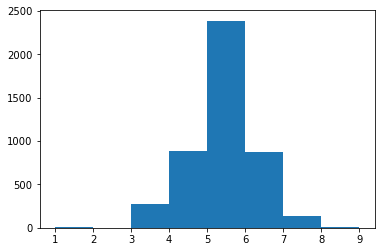

In [17]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [18]:
for i in range(N):
    I_precalc[i] = min(5, I_precalc[i])

In [19]:
print(max(I_precalc))
iters = simulate_precalc_mean(T, W, 743)

5
Result 0: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 1: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 2: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 3: 5    acc: 5.0    ks: [8, 4, 4, 4, 4]
Result 4: 6    acc: 5.2    ks: [8, 4, 4, 4, 4, 4]
Result 5: 5    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4]
Result 6: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 7: 5    acc: 5.125    ks: [8, 4, 4, 4, 4]
Result 8: 5    acc: 5.111111111111111    ks: [8, 4, 4, 4, 4]
Result 9: 5    acc: 5.1    ks: [8, 4, 4, 4, 4]
Result 10: 5    acc: 5.090909090909091    ks: [8, 4, 4, 4, 4]
Result 11: 6    acc: 5.166666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 12: 5    acc: 5.153846153846154    ks: [8, 4, 4, 4, 4]
Result 13: 5    acc: 5.142857142857143    ks: [8, 4, 4, 4, 4]
Result 14: 1    acc: 4.866666666666666    ks: [8]
Result 15: 1    acc: 4.625    ks: [8]
Result 16: 1    acc: 4.411764705882353    ks: [8]
Result 17: 1    acc: 4.222222222222222    ks: [8]
Result 18: 1    acc: 4.052631578947368    

Result 138: 5    acc: 4.913669064748201    ks: [8, 4, 4, 4, 4]
Result 139: 5    acc: 4.914285714285715    ks: [8, 4, 4, 4, 4]
Result 140: 5    acc: 4.914893617021277    ks: [8, 4, 4, 4, 4]
Result 141: 4    acc: 4.908450704225352    ks: [8, 4, 4, 4]
Result 142: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 4]
Result 143: 6    acc: 4.916666666666667    ks: [8, 4, 4, 4, 4, 4]
Result 144: 5    acc: 4.917241379310345    ks: [8, 4, 4, 4, 4]
Result 145: 5    acc: 4.917808219178082    ks: [8, 4, 4, 4, 4]
Result 146: 5    acc: 4.918367346938775    ks: [8, 4, 4, 4, 4]
Result 147: 4    acc: 4.912162162162162    ks: [8, 4, 4, 4]
Result 148: 4    acc: 4.906040268456376    ks: [8, 4, 4, 4]
Result 149: 5    acc: 4.906666666666666    ks: [8, 4, 4, 4, 4]
Result 150: 5    acc: 4.9072847682119205    ks: [8, 4, 4, 4, 4]
Result 151: 5    acc: 4.907894736842105    ks: [8, 4, 4, 4, 4]
Result 152: 5    acc: 4.908496732026144    ks: [8, 4, 4, 4, 4]
Result 153: 5    acc: 4.909090909090909    ks: [8, 4, 4, 4, 

Result 271: 5    acc: 5.025735294117647    ks: [8, 3, 3, 2, 2]
Result 272: 4    acc: 5.021978021978022    ks: [8, 4, 4, 4]
Result 273: 4    acc: 5.018248175182482    ks: [8, 4, 4, 4]
Result 274: 4    acc: 5.014545454545455    ks: [8, 4, 4, 4]
Result 275: 5    acc: 5.0144927536231885    ks: [8, 4, 3, 3, 3]
Result 276: 5    acc: 5.014440433212997    ks: [8, 4, 3, 3, 3]
Result 277: 5    acc: 5.014388489208633    ks: [8, 4, 3, 3, 3]
Result 278: 5    acc: 5.014336917562724    ks: [8, 3, 3, 3, 3]
Result 279: 3    acc: 5.007142857142857    ks: [8, 3, 3]
Result 280: 5    acc: 5.00711743772242    ks: [8, 3, 3, 2, 2]
Result 281: 6    acc: 5.01063829787234    ks: [8, 4, 3, 3, 3, 3]
Result 282: 6    acc: 5.014134275618375    ks: [8, 3, 3, 3, 3, 3]
Result 283: 3    acc: 5.007042253521127    ks: [8, 3, 3]
Result 284: 5    acc: 5.007017543859649    ks: [8, 3, 3, 2, 2]
Result 285: 3    acc: 5.0    ks: [8, 3, 3]
Result 286: 6    acc: 5.003484320557491    ks: [8, 3, 3, 3, 3, 3]
Result 287: 5    acc: 5.0

Result 404: 6    acc: 4.933333333333334    ks: [8, 3, 3, 3, 3, 3]
Result 405: 3    acc: 4.928571428571429    ks: [8, 3, 3]
Result 406: 6    acc: 4.931203931203931    ks: [8, 3, 3, 3, 3, 3]
Result 407: 3    acc: 4.926470588235294    ks: [8, 3, 3]
Result 408: 5    acc: 4.9266503667481665    ks: [8, 4, 3, 3, 3]
Result 409: 5    acc: 4.926829268292683    ks: [8, 3, 3, 3, 3]
Result 410: 4    acc: 4.924574209245742    ks: [8, 4, 4, 4]
Result 411: 4    acc: 4.922330097087379    ks: [8, 4, 4, 4]
Result 412: 6    acc: 4.924939467312349    ks: [8, 4, 3, 3, 3, 3]
Result 413: 3    acc: 4.920289855072464    ks: [8, 3, 3]
Result 414: 5    acc: 4.920481927710844    ks: [8, 3, 3, 2, 2]
Result 415: 6    acc: 4.923076923076923    ks: [8, 4, 3, 3, 3, 3]
Result 416: 5    acc: 4.92326139088729    ks: [8, 3, 3, 3, 3]
Result 417: 5    acc: 4.923444976076555    ks: [8, 4, 3, 3, 3]
Result 418: 5    acc: 4.923627684964201    ks: [8, 3, 3, 3, 3]
Result 419: 6    acc: 4.9261904761904765    ks: [8, 3, 3, 3, 3, 3]


Result 535: 6    acc: 5.0559701492537314    ks: [8, 3, 3, 3, 3, 3]
Result 536: 6    acc: 5.057728119180633    ks: [8, 3, 3, 3, 3, 3]
Result 537: 4    acc: 5.055762081784387    ks: [8, 3, 3, 3]
Result 538: 5    acc: 5.055658627087198    ks: [8, 3, 3, 3, 3]
Result 539: 5    acc: 5.055555555555555    ks: [8, 3, 3, 3, 3]
Result 540: 6    acc: 5.057301293900185    ks: [8, 3, 3, 3, 3, 3]
Result 541: 6    acc: 5.059040590405904    ks: [8, 3, 3, 3, 3, 3]
Result 542: 5    acc: 5.058931860036832    ks: [8, 3, 3, 3, 3]
Result 543: 5    acc: 5.0588235294117645    ks: [8, 4, 4, 4, 4]
Result 544: 5    acc: 5.058715596330275    ks: [8, 3, 3, 3, 3]
Result 545: 4    acc: 5.056776556776557    ks: [8, 4, 4, 4]
Result 546: 4    acc: 5.0548446069469835    ks: [8, 4, 4, 4]
Result 547: 4    acc: 5.052919708029197    ks: [8, 4, 4, 4]
Result 548: 5    acc: 5.052823315118397    ks: [8, 4, 4, 4, 4]
Result 549: 5    acc: 5.052727272727273    ks: [8, 3, 3, 3, 3]
Result 550: 5    acc: 5.052631578947368    ks: [8, 4

Result 667: 4    acc: 5.017964071856287    ks: [8, 3, 3, 3]
Result 668: 4    acc: 5.01644245142003    ks: [8, 3, 3, 3]
Result 669: 4    acc: 5.014925373134329    ks: [8, 3, 3, 3]
Result 670: 4    acc: 5.013412816691505    ks: [8, 3, 3, 3]
Result 671: 4    acc: 5.011904761904762    ks: [8, 4, 4, 4]
Result 672: 4    acc: 5.010401188707281    ks: [8, 3, 3, 3]
Result 673: 4    acc: 5.008902077151335    ks: [8, 3, 3, 3]
Result 674: 4    acc: 5.007407407407407    ks: [8, 3, 3, 3]
Result 675: 4    acc: 5.005917159763314    ks: [8, 3, 3, 3]
Result 676: 4    acc: 5.004431314623338    ks: [8, 4, 4, 4]
Result 677: 4    acc: 5.002949852507375    ks: [8, 3, 3, 3]
Result 678: 4    acc: 5.001472754050074    ks: [8, 4, 4, 4]
Result 679: 4    acc: 5.0    ks: [8, 3, 3, 3]
Result 680: 4    acc: 4.998531571218796    ks: [8, 4, 4, 4]
Result 681: 4    acc: 4.997067448680352    ks: [8, 3, 3, 3]
Result 682: 5    acc: 4.997071742313324    ks: [8, 4, 4, 4, 4]
Result 683: 6    acc: 4.998538011695906    ks: [8, 3

Result 801: 5    acc: 5.014962593516209    ks: [8, 4, 4, 4, 4]
Result 802: 6    acc: 5.0161892901618925    ks: [8, 3, 3, 3, 3, 3]
Result 803: 5    acc: 5.016169154228856    ks: [8, 3, 3, 3, 3]
Result 804: 5    acc: 5.0161490683229815    ks: [8, 3, 3, 2, 2]
Result 805: 7    acc: 5.018610421836228    ks: [8, 3, 3, 3, 3, 3, 3]
Result 806: 6    acc: 5.019826517967782    ks: [8, 3, 3, 3, 3, 3]
Result 807: 5    acc: 5.01980198019802    ks: [8, 3, 3, 3, 3]
Result 808: 6    acc: 5.021013597033375    ks: [8, 3, 3, 3, 3, 3]
Result 809: 5    acc: 5.0209876543209875    ks: [8, 3, 3, 3, 3]
Result 810: 3    acc: 5.018495684340321    ks: [8, 3, 2]
Result 811: 4    acc: 5.017241379310345    ks: [8, 3, 3, 3]
Result 812: 4    acc: 5.015990159901599    ks: [8, 3, 3, 3]
Result 813: 4    acc: 5.014742014742015    ks: [8, 3, 3, 3]
Result 814: 6    acc: 5.015950920245399    ks: [8, 3, 3, 3, 3, 3]
Result 815: 6    acc: 5.017156862745098    ks: [8, 3, 3, 3, 3, 3]
Result 816: 4    acc: 5.0159118727050185    ks:

Result 932: 4    acc: 5.015005359056806    ks: [8, 3, 3, 3]
Result 933: 7    acc: 5.017130620985011    ks: [8, 3, 3, 3, 3, 3, 3]
Result 934: 4    acc: 5.016042780748663    ks: [8, 4, 4, 4]
Result 935: 4    acc: 5.014957264957265    ks: [8, 4, 4, 3]
Result 936: 5    acc: 5.014941302027748    ks: [8, 4, 3, 3, 3]
Result 937: 4    acc: 5.013859275053305    ks: [8, 4, 4, 3]
Result 938: 4    acc: 5.012779552715655    ks: [8, 4, 4, 3]
Result 939: 4    acc: 5.011702127659574    ks: [8, 4, 4, 3]
Result 940: 4    acc: 5.0106269925611056    ks: [8, 4, 4, 3]
Result 941: 6    acc: 5.011677282377919    ks: [8, 3, 3, 3, 3, 3]
Result 942: 6    acc: 5.012725344644751    ks: [8, 3, 3, 3, 3, 3]
Result 943: 5    acc: 5.012711864406779    ks: [8, 3, 3, 3, 3]
Result 944: 3    acc: 5.01058201058201    ks: [8, 3, 3]
Result 945: 5    acc: 5.010570824524313    ks: [8, 4, 4, 4, 4]
Result 946: 5    acc: 5.010559662090813    ks: [8, 4, 4, 3, 3]
Result 947: 5    acc: 5.010548523206751    ks: [8, 4, 4, 4, 4]
Result 

Result 1065: 4    acc: 4.99155722326454    ks: [8, 4, 4, 3]
Result 1066: 5    acc: 4.991565135895033    ks: [8, 3, 3, 3, 3]
Result 1067: 5    acc: 4.991573033707865    ks: [8, 3, 3, 3, 3]
Result 1068: 5    acc: 4.9915809167446215    ks: [8, 4, 4, 3, 3]
Result 1069: 5    acc: 4.991588785046729    ks: [8, 4, 3, 3, 3]
Result 1070: 5    acc: 4.991596638655462    ks: [8, 3, 3, 3, 3]
Result 1071: 5    acc: 4.99160447761194    ks: [8, 4, 4, 3, 3]
Result 1072: 5    acc: 4.9916123019571295    ks: [8, 3, 3, 3, 3]
Result 1073: 5    acc: 4.9916201117318435    ks: [8, 4, 4, 3, 3]
Result 1074: 5    acc: 4.991627906976744    ks: [8, 3, 3, 3, 3]
Result 1075: 4    acc: 4.9907063197026025    ks: [8, 4, 4, 3]
Result 1076: 6    acc: 4.991643454038997    ks: [8, 4, 3, 3, 3, 3]
Result 1077: 4    acc: 4.990723562152134    ks: [8, 4, 4, 4]
Result 1078: 5    acc: 4.990732159406858    ks: [8, 3, 3, 3, 3]
Result 1079: 5    acc: 4.9907407407407405    ks: [8, 3, 3, 3, 3]
Result 1080: 5    acc: 4.990749306197965   

Result 1197: 5    acc: 4.950751252086811    ks: [8, 3, 3, 3, 3]
Result 1198: 5    acc: 4.950792326939116    ks: [8, 3, 3, 3, 3]
Result 1199: 5    acc: 4.950833333333334    ks: [8, 3, 3, 3, 3]
Result 1200: 5    acc: 4.950874271440466    ks: [8, 3, 3, 3, 3]
Result 1201: 5    acc: 4.950915141430948    ks: [8, 3, 3, 3, 3]
Result 1202: 5    acc: 4.950955943474646    ks: [8, 3, 3, 3, 3]
Result 1203: 6    acc: 4.951827242524917    ks: [8, 3, 3, 3, 3, 3]
Result 1204: 6    acc: 4.952697095435685    ks: [8, 3, 3, 3, 3, 3]
Result 1205: 6    acc: 4.9535655058043115    ks: [8, 3, 3, 3, 3, 3]
Result 1206: 7    acc: 4.955260977630489    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1207: 7    acc: 4.956953642384106    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1208: 7    acc: 4.958643507030604    ks: [8, 3, 3, 3, 3, 3, 3]
Result 1209: 4    acc: 4.957851239669422    ks: [8, 4, 4, 4]
Result 1210: 5    acc: 4.9578860445912465    ks: [8, 4, 4, 4, 4]
Result 1211: 5    acc: 4.957920792079208    ks: [8, 4, 4, 4, 4]
Result 1212: 5

Result 1324: 6    acc: 4.996981132075471    ks: [8, 3, 3, 3, 3, 3]
Result 1325: 5    acc: 4.996983408748115    ks: [8, 3, 3, 3, 3]
Result 1326: 5    acc: 4.99698568198945    ks: [8, 3, 3, 3, 3]
Result 1327: 5    acc: 4.996987951807229    ks: [8, 3, 3, 3, 3]
Result 1328: 6    acc: 4.997742663656885    ks: [8, 3, 3, 3, 3, 3]
Result 1329: 6    acc: 4.998496240601503    ks: [8, 3, 3, 3, 3, 3]
Result 1330: 5    acc: 4.998497370398197    ks: [8, 3, 3, 3, 3]
Result 1331: 5    acc: 4.998498498498498    ks: [8, 3, 3, 3, 3]
Result 1332: 5    acc: 4.998499624906226    ks: [8, 3, 3, 3, 3]
Result 1333: 5    acc: 4.998500749625188    ks: [8, 3, 3, 3, 3]
Result 1334: 5    acc: 4.998501872659176    ks: [8, 3, 3, 3, 3]
Result 1335: 5    acc: 4.998502994011976    ks: [8, 3, 3, 3, 3]
Result 1336: 5    acc: 4.99850411368736    ks: [8, 3, 3, 3, 3]
Result 1337: 5    acc: 4.998505231689088    ks: [8, 3, 3, 3, 3]
Result 1338: 5    acc: 4.9985063480209115    ks: [8, 3, 3, 3, 3]
Result 1339: 5    acc: 4.9985074

Result 1454: 4    acc: 5.0    ks: [8, 4, 4, 4]
Result 1455: 4    acc: 4.999313186813187    ks: [8, 4, 4, 4]
Result 1456: 4    acc: 4.998627316403569    ks: [8, 4, 4, 4]
Result 1457: 4    acc: 4.997942386831276    ks: [8, 4, 4, 4]
Result 1458: 4    acc: 4.9972583961617545    ks: [8, 4, 4, 4]
Result 1459: 4    acc: 4.9965753424657535    ks: [8, 4, 4, 4]
Result 1460: 4    acc: 4.9958932238193015    ks: [8, 4, 4, 4]
Result 1461: 4    acc: 4.995212038303694    ks: [8, 4, 4, 4]
Result 1462: 4    acc: 4.994531784005468    ks: [8, 4, 4, 4]
Result 1463: 4    acc: 4.993852459016393    ks: [8, 4, 4, 4]
Result 1464: 4    acc: 4.993174061433447    ks: [8, 4, 4, 4]
Result 1465: 4    acc: 4.992496589358799    ks: [8, 4, 4, 4]
Result 1466: 4    acc: 4.991820040899795    ks: [8, 4, 4, 4]
Result 1467: 4    acc: 4.991144414168938    ks: [8, 4, 4, 4]
Result 1468: 4    acc: 4.990469707283866    ks: [8, 4, 4, 4]
Result 1469: 4    acc: 4.989795918367347    ks: [8, 4, 4, 4]
Result 1470: 4    acc: 4.9891230455

Result 1585: 5    acc: 5.013871374527112    ks: [8, 3, 3, 3, 3]
Result 1586: 5    acc: 5.013862633900441    ks: [8, 3, 3, 3, 3]
Result 1587: 5    acc: 5.013853904282116    ks: [8, 3, 3, 3, 3]
Result 1588: 5    acc: 5.013845185651353    ks: [8, 3, 3, 3, 3]
Result 1589: 5    acc: 5.013836477987422    ks: [8, 3, 3, 3, 3]
Result 1590: 5    acc: 5.013827781269642    ks: [8, 3, 3, 3, 3]
Result 1591: 5    acc: 5.013819095477387    ks: [8, 3, 3, 3, 3]
Result 1592: 5    acc: 5.013810420590081    ks: [8, 3, 3, 3, 3]
Result 1593: 5    acc: 5.013801756587202    ks: [8, 3, 3, 3, 3]
Result 1594: 5    acc: 5.0137931034482754    ks: [8, 3, 3, 3, 3]
Result 1595: 5    acc: 5.013784461152882    ks: [8, 3, 3, 3, 3]
Result 1596: 5    acc: 5.013775829680651    ks: [8, 3, 3, 3, 3]
Result 1597: 5    acc: 5.013767209011264    ks: [8, 3, 3, 3, 3]
Result 1598: 5    acc: 5.013758599124452    ks: [8, 3, 3, 3, 3]
Result 1599: 6    acc: 5.014375    ks: [8, 3, 3, 3, 3, 3]
Result 1600: 6    acc: 5.014990630855715    k

Result 1712: 7    acc: 5.046701692936369    ks: [8, 4, 4, 4, 4, 4, 4]
Result 1713: 5    acc: 5.0466744457409565    ks: [8, 3, 3, 3, 3]
Result 1714: 6    acc: 5.0472303206997085    ks: [8, 3, 3, 3, 3, 3]
Result 1715: 6    acc: 5.047785547785548    ks: [8, 3, 3, 3, 3, 3]
Result 1716: 6    acc: 5.0483401281304605    ks: [8, 3, 3, 3, 3, 3]
Result 1717: 6    acc: 5.048894062863795    ks: [8, 3, 3, 3, 3, 3]
Result 1718: 6    acc: 5.049447353112274    ks: [8, 3, 3, 3, 3, 3]
Result 1719: 6    acc: 5.05    ks: [8, 3, 3, 3, 3, 3]
Result 1720: 6    acc: 5.05055200464846    ks: [8, 3, 3, 3, 3, 3]
Result 1721: 6    acc: 5.0511033681765385    ks: [8, 3, 3, 3, 3, 3]
Result 1722: 6    acc: 5.051654091700522    ks: [8, 3, 3, 3, 3, 3]
Result 1723: 6    acc: 5.052204176334107    ks: [8, 3, 3, 3, 3, 3]
Result 1724: 6    acc: 5.052753623188406    ks: [8, 3, 3, 3, 3, 3]
Result 1725: 6    acc: 5.053302433371958    ks: [8, 3, 3, 3, 3, 3]
Result 1726: 6    acc: 5.053850607990736    ks: [8, 3, 3, 3, 3, 3]
Resul

Result 1840: 5    acc: 5.048343291689299    ks: [8, 3, 3, 3, 3]
Result 1841: 5    acc: 5.048317046688382    ks: [8, 4, 4, 4, 4]
Result 1842: 5    acc: 5.048290830168204    ks: [8, 4, 4, 4, 4]
Result 1843: 6    acc: 5.04880694143167    ks: [8, 4, 4, 4, 4, 4]
Result 1844: 5    acc: 5.048780487804878    ks: [8, 4, 4, 4, 4]
Result 1845: 5    acc: 5.04875406283857    ks: [8, 4, 3, 3, 3]
Result 1846: 5    acc: 5.048727666486194    ks: [8, 3, 3, 3, 3]
Result 1847: 4    acc: 5.0481601731601735    ks: [8, 4, 3, 3]
Result 1848: 5    acc: 5.048134126554895    ks: [8, 3, 3, 3, 3]
Result 1849: 4    acc: 5.047567567567568    ks: [8, 4, 3, 3]
Result 1850: 4    acc: 5.047001620745543    ks: [8, 4, 3, 3]
Result 1851: 5    acc: 5.046976241900648    ks: [8, 3, 3, 3, 3]
Result 1852: 5    acc: 5.046950890447922    ks: [8, 4, 4, 4, 3]
Result 1853: 5    acc: 5.046925566343042    ks: [8, 4, 3, 3, 3]
Result 1854: 6    acc: 5.047439353099731    ks: [8, 4, 4, 4, 4, 4]
Result 1855: 6    acc: 5.047952586206897    

Result 1971: 5    acc: 5.039553752535497    ks: [8, 3, 3, 3, 3]
Result 1972: 5    acc: 5.03953370501774    ks: [8, 4, 3, 3, 3]
Result 1973: 5    acc: 5.03951367781155    ks: [8, 4, 3, 3, 3]
Result 1974: 5    acc: 5.039493670886076    ks: [8, 4, 3, 3, 3]
Result 1975: 5    acc: 5.0394736842105265    ks: [8, 4, 3, 3, 3]
Result 1976: 5    acc: 5.039453717754173    ks: [8, 4, 3, 3, 3]
Result 1977: 5    acc: 5.03943377148635    ks: [8, 4, 3, 3, 3]
Result 1978: 5    acc: 5.039413845376453    ks: [8, 4, 3, 3, 3]
Result 1979: 5    acc: 5.039393939393939    ks: [8, 4, 3, 3, 3]
Result 1980: 5    acc: 5.039374053508329    ks: [8, 4, 3, 3, 3]
Result 1981: 6    acc: 5.039858728557014    ks: [8, 4, 3, 3, 3, 3]
Result 1982: 6    acc: 5.040342914775593    ks: [8, 4, 3, 3, 3, 3]
Result 1983: 6    acc: 5.040826612903226    ks: [8, 4, 3, 3, 3, 3]
Result 1984: 6    acc: 5.041309823677582    ks: [8, 4, 3, 3, 3, 3]
Result 1985: 5    acc: 5.041289023162135    ks: [8, 4, 3, 3, 3]
Result 1986: 5    acc: 5.04126

Result 2100: 5    acc: 5.0466444550214185    ks: [8, 3, 3, 3, 3]
Result 2101: 5    acc: 5.04662226450999    ks: [8, 3, 3, 3, 3]
Result 2102: 5    acc: 5.046600095102235    ks: [8, 3, 3, 3, 3]
Result 2103: 4    acc: 5.046102661596958    ks: [8, 3, 3, 3]
Result 2104: 4    acc: 5.045605700712589    ks: [8, 3, 3, 3]
Result 2105: 4    acc: 5.045109211775879    ks: [8, 3, 3, 3]
Result 2106: 4    acc: 5.044613194114855    ks: [8, 3, 3, 3]
Result 2107: 4    acc: 5.044117647058823    ks: [8, 3, 3, 3]
Result 2108: 4    acc: 5.04362256993836    ks: [8, 3, 3, 3]
Result 2109: 4    acc: 5.0431279620853084    ks: [8, 3, 3, 3]
Result 2110: 4    acc: 5.042633822832781    ks: [8, 3, 3, 3]
Result 2111: 4    acc: 5.042140151515151    ks: [8, 3, 3, 3]
Result 2112: 5    acc: 5.042120208234738    ks: [8, 3, 3, 3, 3]
Result 2113: 5    acc: 5.042100283822138    ks: [8, 3, 3, 3, 3]
Result 2114: 5    acc: 5.042080378250591    ks: [8, 3, 3, 3, 3]
Result 2115: 5    acc: 5.042060491493384    ks: [8, 3, 3, 3, 3]
Res

Result 2233: 3    acc: 5.000447627573859    ks: [8, 3, 2]
Result 2234: 3    acc: 4.999552572706935    ks: [8, 3, 2]
Result 2235: 3    acc: 4.99865831842576    ks: [8, 3, 2]
Result 2236: 3    acc: 4.997764863656683    ks: [8, 3, 2]
Result 2237: 3    acc: 4.996872207327971    ks: [8, 3, 2]
Result 2238: 3    acc: 4.995980348369808    ks: [8, 3, 2]
Result 2239: 3    acc: 4.995089285714286    ks: [8, 3, 2]
Result 2240: 3    acc: 4.9941990182954035    ks: [8, 3, 2]
Result 2241: 3    acc: 4.993309545049064    ks: [8, 3, 2]
Result 2242: 3    acc: 4.992420864913063    ks: [8, 3, 2]
Result 2243: 3    acc: 4.991532976827094    ks: [8, 3, 2]
Result 2244: 3    acc: 4.99064587973274    ks: [8, 3, 2]
Result 2245: 3    acc: 4.989759572573464    ks: [8, 3, 2]
Result 2246: 3    acc: 4.988874054294615    ks: [8, 3, 2]
Result 2247: 3    acc: 4.987989323843417    ks: [8, 3, 2]
Result 2248: 5    acc: 4.987994664295242    ks: [8, 4, 4, 4, 4]
Result 2249: 4    acc: 4.987555555555556    ks: [8, 4, 3, 3]
Result

Result 2364: 5    acc: 4.976321353065539    ks: [8, 4, 4, 3, 3]
Result 2365: 6    acc: 4.976754015215554    ks: [8, 4, 3, 3, 3, 3]
Result 2366: 6    acc: 4.977186311787072    ks: [8, 4, 3, 3, 3, 3]
Result 2367: 6    acc: 4.977618243243243    ks: [8, 4, 3, 3, 3, 3]
Result 2368: 6    acc: 4.978049810046433    ks: [8, 3, 3, 3, 3, 3]
Result 2369: 5    acc: 4.978059071729958    ks: [8, 3, 3, 3, 3]
Result 2370: 5    acc: 4.978068325601012    ks: [8, 3, 3, 3, 3]
Result 2371: 5    acc: 4.978077571669477    ks: [8, 3, 3, 3, 3]
Result 2372: 5    acc: 4.978086809945217    ks: [8, 3, 3, 3, 3]
Result 2373: 5    acc: 4.978096040438079    ks: [8, 3, 3, 3, 3]
Result 2374: 5    acc: 4.978105263157895    ks: [8, 3, 3, 3, 3]
Result 2375: 4    acc: 4.977693602693603    ks: [8, 3, 3, 3]
Result 2376: 7    acc: 4.978544383676904    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2377: 7    acc: 4.979394449116905    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2378: 8    acc: 4.98066414459857    ks: [8, 3, 3, 3, 3, 3, 3, 3]
Result 2379

Result 2497: 4    acc: 4.9423538831064855    ks: [8, 3, 3, 3]
Result 2498: 4    acc: 4.941976790716287    ks: [8, 3, 3, 3]
Result 2499: 4    acc: 4.9416    ks: [8, 3, 3, 3]
Result 2500: 4    acc: 4.941223510595762    ks: [8, 3, 3, 3]
Result 2501: 4    acc: 4.940847322142286    ks: [8, 3, 3, 3]
Result 2502: 5    acc: 4.940870954854175    ks: [8, 3, 3, 3, 3]
Result 2503: 4    acc: 4.940495207667731    ks: [8, 3, 3, 3]
Result 2504: 4    acc: 4.940119760479042    ks: [8, 3, 3, 3]
Result 2505: 4    acc: 4.939744612928971    ks: [8, 3, 3, 3]
Result 2506: 4    acc: 4.939369764658955    ks: [8, 3, 3, 3]
Result 2507: 4    acc: 4.938995215311005    ks: [8, 3, 3, 3]
Result 2508: 4    acc: 4.938620964527701    ks: [8, 3, 3, 3]
Result 2509: 4    acc: 4.938247011952191    ks: [8, 3, 3, 3]
Result 2510: 4    acc: 4.937873357228196    ks: [8, 3, 3, 3]
Result 2511: 4    acc: 4.9375    ks: [8, 3, 3, 3]
Result 2512: 5    acc: 4.937524870672503    ks: [8, 3, 3, 3, 3]
Result 2513: 5    acc: 4.93754972155926

Result 2630: 5    acc: 4.918662105663246    ks: [8, 3, 3, 3, 3]
Result 2631: 4    acc: 4.918313069908814    ks: [8, 3, 3, 3]
Result 2632: 4    acc: 4.91796429927839    ks: [8, 3, 3, 3]
Result 2633: 4    acc: 4.9176157934700075    ks: [8, 3, 3, 3]
Result 2634: 4    acc: 4.917267552182163    ks: [8, 3, 3, 3]
Result 2635: 4    acc: 4.916919575113809    ks: [8, 3, 3, 3]
Result 2636: 5    acc: 4.9169510807736065    ks: [8, 3, 3, 3, 3]
Result 2637: 5    acc: 4.916982562547385    ks: [8, 3, 3, 3, 3]
Result 2638: 5    acc: 4.917014020462297    ks: [8, 3, 3, 3, 3]
Result 2639: 5    acc: 4.9170454545454545    ks: [8, 3, 3, 3, 3]
Result 2640: 5    acc: 4.9170768648239305    ks: [8, 3, 3, 3, 3]
Result 2641: 5    acc: 4.917108251324754    ks: [8, 3, 3, 3, 3]
Result 2642: 5    acc: 4.917139614074915    ks: [8, 3, 3, 3, 3]
Result 2643: 5    acc: 4.917170953101362    ks: [8, 3, 3, 3, 3]
Result 2644: 5    acc: 4.9172022684310015    ks: [8, 3, 3, 3, 3]
Result 2645: 4    acc: 4.916855631141345    ks: [8,

Result 2759: 5    acc: 4.923913043478261    ks: [8, 4, 4, 3, 3]
Result 2760: 5    acc: 4.923940601231438    ks: [8, 3, 3, 3, 3]
Result 2761: 5    acc: 4.9239681390296886    ks: [8, 4, 4, 4, 4]
Result 2762: 5    acc: 4.92399565689468    ks: [8, 4, 4, 4, 4]
Result 2763: 5    acc: 4.924023154848046    ks: [8, 4, 4, 4, 4]
Result 2764: 5    acc: 4.924050632911392    ks: [8, 4, 4, 4, 4]
Result 2765: 5    acc: 4.92407809110629    ks: [8, 4, 4, 4, 4]
Result 2766: 5    acc: 4.924105529454283    ks: [8, 4, 4, 4, 4]
Result 2767: 5    acc: 4.9241329479768785    ks: [8, 4, 4, 4, 4]
Result 2768: 5    acc: 4.924160346695558    ks: [8, 4, 4, 4, 4]
Result 2769: 5    acc: 4.924187725631769    ks: [8, 4, 4, 3, 3]
Result 2770: 5    acc: 4.924215084806929    ks: [8, 4, 4, 3, 3]
Result 2771: 5    acc: 4.924242424242424    ks: [8, 4, 4, 3, 3]
Result 2772: 5    acc: 4.92426974395961    ks: [8, 4, 4, 4, 4]
Result 2773: 5    acc: 4.924297043979813    ks: [8, 4, 4, 4, 4]
Result 2774: 5    acc: 4.924324324324324 

Result 2888: 4    acc: 4.929041190723433    ks: [8, 3, 3, 3]
Result 2889: 4    acc: 4.928719723183391    ks: [8, 3, 3, 3]
Result 2890: 4    acc: 4.928398478035282    ks: [8, 3, 3, 3]
Result 2891: 4    acc: 4.92807745504841    ks: [8, 3, 3, 3]
Result 2892: 4    acc: 4.927756653992396    ks: [8, 3, 3, 3]
Result 2893: 4    acc: 4.92743607463718    ks: [8, 3, 3, 3]
Result 2894: 4    acc: 4.927115716753023    ks: [8, 3, 3, 3]
Result 2895: 7    acc: 4.927831491712707    ks: [8, 3, 3, 3, 3, 3, 3]
Result 2896: 5    acc: 4.927856403175699    ks: [8, 3, 3, 3, 3]
Result 2897: 5    acc: 4.927881297446515    ks: [8, 3, 3, 3, 3]
Result 2898: 5    acc: 4.9279061745429455    ks: [8, 3, 3, 3, 3]
Result 2899: 5    acc: 4.927931034482759    ks: [8, 3, 3, 3, 3]
Result 2900: 6    acc: 4.928300586004826    ks: [8, 3, 3, 3, 3, 3]
Result 2901: 6    acc: 4.928669882839421    ks: [8, 3, 3, 3, 3, 3]
Result 2902: 6    acc: 4.929038925249742    ks: [8, 3, 3, 3, 3, 3]
Result 2903: 6    acc: 4.929407713498622    ks:

Result 3017: 3    acc: 4.931080185553347    ks: [8, 3, 2]
Result 3018: 3    acc: 4.930440543226234    ks: [8, 3, 2]
Result 3019: 3    acc: 4.929801324503312    ks: [8, 3, 2]
Result 3020: 3    acc: 4.92916252896392    ks: [8, 3, 2]
Result 3021: 3    acc: 4.928524156187955    ks: [8, 3, 2]
Result 3022: 3    acc: 4.927886205755872    ks: [8, 3, 2]
Result 3023: 3    acc: 4.927248677248677    ks: [8, 3, 2]
Result 3024: 3    acc: 4.926611570247934    ks: [8, 3, 2]
Result 3025: 3    acc: 4.925974884335757    ks: [8, 3, 2]
Result 3026: 3    acc: 4.925338619094814    ks: [8, 3, 2]
Result 3027: 3    acc: 4.924702774108322    ks: [8, 3, 2]
Result 3028: 3    acc: 4.924067348960053    ks: [8, 3, 2]
Result 3029: 3    acc: 4.923432343234324    ks: [8, 3, 2]
Result 3030: 3    acc: 4.922797756516001    ks: [8, 3, 2]
Result 3031: 3    acc: 4.922163588390501    ks: [8, 3, 2]
Result 3032: 3    acc: 4.921529838443785    ks: [8, 3, 2]
Result 3033: 3    acc: 4.92089650626236    ks: [8, 3, 2]
Result 3034: 3  

Result 3147: 5    acc: 4.924078780177891    ks: [8, 4, 4, 4, 4]
Result 3148: 5    acc: 4.924102889806288    ks: [8, 4, 4, 4, 4]
Result 3149: 5    acc: 4.924126984126984    ks: [8, 4, 4, 4, 4]
Result 3150: 5    acc: 4.924151063154554    ks: [8, 4, 3, 3, 3]
Result 3151: 5    acc: 4.924175126903553    ks: [8, 4, 3, 3, 3]
Result 3152: 5    acc: 4.924199175388519    ks: [8, 4, 3, 3, 3]
Result 3153: 5    acc: 4.924223208623969    ks: [8, 4, 3, 3, 3]
Result 3154: 5    acc: 4.924247226624406    ks: [8, 4, 4, 4, 4]
Result 3155: 5    acc: 4.924271229404309    ks: [8, 4, 4, 4, 4]
Result 3156: 5    acc: 4.924295216978144    ks: [8, 4, 4, 4, 4]
Result 3157: 5    acc: 4.924319189360355    ks: [8, 4, 4, 4, 4]
Result 3158: 5    acc: 4.924343146565369    ks: [8, 4, 4, 4, 4]
Result 3159: 5    acc: 4.924367088607595    ks: [8, 4, 4, 4, 4]
Result 3160: 5    acc: 4.924391015501423    ks: [8, 4, 4, 4, 4]
Result 3161: 5    acc: 4.924414927261227    ks: [8, 4, 4, 4, 4]
Result 3162: 6    acc: 4.924754979449889

Result 3277: 6    acc: 4.931360585723001    ks: [8, 3, 3, 3, 3, 3]
Result 3278: 5    acc: 4.931381518755718    ks: [8, 3, 3, 3, 3]
Result 3279: 5    acc: 4.9314024390243905    ks: [8, 3, 3, 3, 3]
Result 3280: 5    acc: 4.931423346540689    ks: [8, 3, 3, 3, 3]
Result 3281: 6    acc: 4.931748933577087    ks: [8, 3, 3, 3, 3, 3]
Result 3282: 5    acc: 4.931769722814499    ks: [8, 3, 3, 3, 3]
Result 3283: 5    acc: 4.931790499390987    ks: [8, 3, 3, 3, 3]
Result 3284: 5    acc: 4.931811263318113    ks: [8, 3, 3, 3, 3]
Result 3285: 5    acc: 4.9318320146074255    ks: [8, 3, 3, 3, 3]
Result 3286: 5    acc: 4.9318527532704595    ks: [8, 3, 3, 3, 3]
Result 3287: 5    acc: 4.931873479318734    ks: [8, 3, 3, 3, 3]
Result 3288: 5    acc: 4.931894192763758    ks: [8, 3, 3, 3, 3]
Result 3289: 4    acc: 4.9316109422492405    ks: [8, 3, 3, 3]
Result 3290: 5    acc: 4.931631722880583    ks: [8, 3, 3, 3, 3]
Result 3291: 5    acc: 4.931652490886999    ks: [8, 3, 3, 3, 3]
Result 3292: 5    acc: 4.93167324

Result 3407: 6    acc: 4.936913145539906    ks: [8, 3, 3, 3, 3, 3]
Result 3408: 5    acc: 4.936931651510707    ks: [8, 3, 3, 3, 3]
Result 3409: 5    acc: 4.936950146627566    ks: [8, 3, 3, 3, 3]
Result 3410: 5    acc: 4.936968630900029    ks: [8, 3, 3, 3, 3]
Result 3411: 6    acc: 4.937280187573271    ks: [8, 4, 4, 4, 4, 4]
Result 3412: 5    acc: 4.937298564312921    ks: [8, 4, 4, 4, 4]
Result 3413: 6    acc: 4.937609841827768    ks: [8, 4, 4, 4, 4, 4]
Result 3414: 5    acc: 4.937628111273792    ks: [8, 4, 4, 4, 4]
Result 3415: 5    acc: 4.937646370023419    ks: [8, 4, 4, 4, 4]
Result 3416: 5    acc: 4.93766461808604    ks: [8, 4, 4, 4, 4]
Result 3417: 5    acc: 4.937682855471036    ks: [8, 4, 4, 4, 4]
Result 3418: 5    acc: 4.9377010821877745    ks: [8, 4, 4, 4, 4]
Result 3419: 6    acc: 4.938011695906432    ks: [8, 4, 4, 4, 4, 4]
Result 3420: 6    acc: 4.938322128032739    ks: [8, 4, 4, 4, 4, 4]
Result 3421: 6    acc: 4.938632378725892    ks: [8, 4, 4, 4, 4, 4]
Result 3422: 6    acc:

Result 3533: 5    acc: 4.958687040181098    ks: [8, 4, 4, 3, 3]
Result 3534: 5    acc: 4.958698727015559    ks: [8, 4, 4, 3, 3]
Result 3535: 5    acc: 4.958710407239819    ks: [8, 4, 4, 3, 3]
Result 3536: 5    acc: 4.958722080859485    ks: [8, 4, 4, 3, 3]
Result 3537: 5    acc: 4.958733747880158    ks: [8, 4, 4, 3, 3]
Result 3538: 5    acc: 4.958745408307432    ks: [8, 4, 4, 3, 3]
Result 3539: 5    acc: 4.958757062146892    ks: [8, 4, 4, 3, 3]
Result 3540: 5    acc: 4.958768709404123    ks: [8, 4, 4, 3, 3]
Result 3541: 5    acc: 4.958780350084698    ks: [8, 4, 4, 3, 3]
Result 3542: 5    acc: 4.958791984194185    ks: [8, 4, 4, 3, 3]
Result 3543: 5    acc: 4.958803611738149    ks: [8, 4, 4, 3, 3]
Result 3544: 5    acc: 4.958815232722144    ks: [8, 4, 4, 3, 3]
Result 3545: 5    acc: 4.9588268471517205    ks: [8, 4, 4, 3, 3]
Result 3546: 5    acc: 4.958838455032422    ks: [8, 4, 4, 3, 3]
Result 3547: 5    acc: 4.958850056369786    ks: [8, 3, 3, 3, 3]
Result 3548: 6    acc: 4.95914342068188

Result 3660: 5    acc: 4.968041518710735    ks: [8, 3, 3, 3, 3]
Result 3661: 5    acc: 4.9680502457673406    ks: [8, 3, 3, 3, 3]
Result 3662: 5    acc: 4.968058968058968    ks: [8, 3, 3, 3, 3]
Result 3663: 6    acc: 4.968340611353712    ks: [8, 3, 3, 3, 3, 3]
Result 3664: 6    acc: 4.968622100954979    ks: [8, 3, 3, 3, 3, 3]
Result 3665: 5    acc: 4.968630660120022    ks: [8, 3, 3, 3, 3]
Result 3666: 5    acc: 4.968639214616853    ks: [8, 3, 3, 3, 3]
Result 3667: 6    acc: 4.968920392584515    ks: [8, 3, 3, 3, 3, 3]
Result 3668: 5    acc: 4.9689288634505315    ks: [8, 3, 3, 3, 3]
Result 3669: 6    acc: 4.9692098092643056    ks: [8, 3, 3, 3, 3, 3]
Result 3670: 6    acc: 4.969490602015799    ks: [8, 3, 3, 3, 3, 3]
Result 3671: 6    acc: 4.969771241830065    ks: [8, 3, 3, 3, 3, 3]
Result 3672: 5    acc: 4.9697794718214    ks: [8, 3, 3, 3, 3]
Result 3673: 5    acc: 4.969787697332608    ks: [8, 3, 3, 3, 3]
Result 3674: 5    acc: 4.969795918367347    ks: [8, 3, 3, 3, 3]
Result 3675: 5    acc

Result 3789: 5    acc: 4.976517150395779    ks: [8, 3, 3, 3, 3]
Result 3790: 5    acc: 4.976523344763915    ks: [8, 3, 3, 3, 3]
Result 3791: 5    acc: 4.976529535864979    ks: [8, 3, 3, 3, 3]
Result 3792: 5    acc: 4.976535723701556    ks: [8, 3, 3, 3, 3]
Result 3793: 5    acc: 4.976541908276226    ks: [8, 4, 4, 3, 3]
Result 3794: 5    acc: 4.976548089591568    ks: [8, 3, 3, 3, 3]
Result 3795: 5    acc: 4.976554267650158    ks: [8, 3, 3, 3, 3]
Result 3796: 5    acc: 4.976560442454569    ks: [8, 3, 3, 3, 3]
Result 3797: 5    acc: 4.976566614007372    ks: [8, 3, 3, 3, 3]
Result 3798: 5    acc: 4.976572782311134    ks: [8, 3, 3, 3, 3]
Result 3799: 5    acc: 4.976578947368421    ks: [8, 4, 4, 3, 3]
Result 3800: 5    acc: 4.976585109181794    ks: [8, 3, 3, 3, 3]
Result 3801: 5    acc: 4.976591267753814    ks: [8, 3, 3, 3, 3]
Result 3802: 5    acc: 4.9765974230870365    ks: [8, 3, 3, 3, 3]
Result 3803: 4    acc: 4.976340694006309    ks: [8, 3, 3, 3]
Result 3804: 4    acc: 4.976084099868594  

Result 3918: 5    acc: 4.979586629242154    ks: [8, 3, 3, 3, 3]
Result 3919: 5    acc: 4.979591836734694    ks: [8, 3, 3, 3, 3]
Result 3920: 5    acc: 4.979597041571028    ks: [8, 3, 3, 3, 3]
Result 3921: 5    acc: 4.979602243753187    ks: [8, 3, 3, 3, 3]
Result 3922: 5    acc: 4.979607443283202    ks: [8, 3, 3, 3, 3]
Result 3923: 5    acc: 4.979612640163099    ks: [8, 3, 3, 3, 3]
Result 3924: 5    acc: 4.9796178343949045    ks: [8, 3, 3, 3, 3]
Result 3925: 5    acc: 4.979623025980642    ks: [8, 3, 3, 3, 3]
Result 3926: 5    acc: 4.979628214922332    ks: [8, 3, 3, 3, 3]
Result 3927: 4    acc: 4.9793788187372705    ks: [8, 3, 3, 3]
Result 3928: 5    acc: 4.97938406719267    ks: [8, 3, 3, 3, 3]
Result 3929: 5    acc: 4.9793893129771    ks: [8, 3, 3, 3, 3]
Result 3930: 5    acc: 4.979394556092597    ks: [8, 3, 3, 3, 3]
Result 3931: 6    acc: 4.979654120040692    ks: [8, 3, 3, 3, 3, 3]
Result 3932: 6    acc: 4.979913551995931    ks: [8, 3, 3, 3, 3, 3]
Result 3933: 6    acc: 4.9801728520589

Result 4049: 6    acc: 4.980493827160494    ks: [8, 3, 3, 3, 3, 3]
Result 4050: 5    acc: 4.980498642310541    ks: [8, 4, 4, 4, 4]
Result 4051: 5    acc: 4.980503455083909    ks: [8, 4, 4, 4, 4]
Result 4052: 5    acc: 4.980508265482359    ks: [8, 4, 4, 4, 4]
Result 4053: 5    acc: 4.980513073507646    ks: [8, 4, 4, 4, 4]
Result 4054: 5    acc: 4.980517879161529    ks: [8, 4, 4, 4, 4]
Result 4055: 6    acc: 4.980769230769231    ks: [8, 4, 4, 4, 4, 4]
Result 4056: 5    acc: 4.980773970914469    ks: [8, 4, 3, 3, 3]
Result 4057: 5    acc: 4.980778708723509    ks: [8, 4, 3, 3, 3]
Result 4058: 5    acc: 4.980783444198078    ks: [8, 4, 4, 4, 4]
Result 4059: 6    acc: 4.981034482758621    ks: [8, 4, 3, 3, 3, 3]
Result 4060: 5    acc: 4.981039152918001    ks: [8, 4, 4, 4, 4]
Result 4061: 5    acc: 4.981043820777942    ks: [8, 4, 4, 4, 4]
Result 4062: 5    acc: 4.981048486340143    ks: [8, 4, 4, 4, 4]
Result 4063: 5    acc: 4.981053149606299    ks: [8, 4, 4, 4, 4]
Result 4064: 5    acc: 4.981057

Result 4177: 7    acc: 4.988032551460028    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4178: 7    acc: 4.98851399856425    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4179: 6    acc: 4.988755980861244    ks: [8, 3, 3, 3, 3, 3]
Result 4180: 5    acc: 4.988758670174599    ks: [8, 3, 3, 3, 3]
Result 4181: 5    acc: 4.988761358201817    ks: [8, 3, 3, 3, 3]
Result 4182: 7    acc: 4.989242170690892    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4183: 7    acc: 4.98972275334608    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4184: 5    acc: 4.9897252090800475    ks: [8, 3, 3, 3, 3]
Result 4185: 5    acc: 4.989727663640707    ks: [8, 3, 3, 3, 3]
Result 4186: 5    acc: 4.989730117028899    ks: [8, 3, 3, 3, 3]
Result 4187: 5    acc: 4.989732569245463    ks: [8, 3, 3, 3, 3]
Result 4188: 7    acc: 4.990212461207926    ks: [8, 3, 3, 3, 3, 3, 3]
Result 4189: 6    acc: 4.990453460620525    ks: [8, 3, 3, 3, 3, 3]
Result 4190: 6    acc: 4.990694345025053    ks: [8, 3, 3, 3, 3, 3]
Result 4191: 6    acc: 4.9909351145038165    ks: [8, 3, 3, 3, 3, 3

Result 4306: 5    acc: 4.992802414673787    ks: [8, 4, 4, 3, 3]
Result 4307: 5    acc: 4.99280408542247    ks: [8, 4, 4, 3, 3]
Result 4308: 5    acc: 4.9928057553956835    ks: [8, 4, 4, 3, 3]
Result 4309: 5    acc: 4.992807424593967    ks: [8, 4, 4, 3, 3]
Result 4310: 5    acc: 4.992809093017861    ks: [8, 4, 4, 3, 3]
Result 4311: 5    acc: 4.992810760667903    ks: [8, 4, 4, 3, 3]
Result 4312: 5    acc: 4.992812427544632    ks: [8, 4, 4, 3, 3]
Result 4313: 5    acc: 4.992814093648586    ks: [8, 4, 4, 3, 3]
Result 4314: 5    acc: 4.992815758980301    ks: [8, 4, 4, 3, 3]
Result 4315: 5    acc: 4.992817423540315    ks: [8, 4, 4, 3, 3]
Result 4316: 5    acc: 4.992819087329163    ks: [8, 4, 4, 3, 3]
Result 4317: 5    acc: 4.992820750347383    ks: [8, 4, 4, 3, 3]
Result 4318: 5    acc: 4.992822412595508    ks: [8, 4, 4, 3, 3]
Result 4319: 5    acc: 4.992824074074074    ks: [8, 4, 4, 3, 3]
Result 4320: 5    acc: 4.992825734783615    ks: [8, 4, 4, 3, 3]
Result 4321: 5    acc: 4.992827394724665

Result 4436: 5    acc: 4.988505747126437    ks: [8, 3, 3, 3, 3]
Result 4437: 5    acc: 4.988508337088779    ks: [8, 3, 3, 3, 3]
Result 4438: 5    acc: 4.988510925884208    ks: [8, 3, 3, 3, 3]
Result 4439: 6    acc: 4.988738738738738    ks: [8, 3, 3, 3, 3, 3]
Result 4440: 5    acc: 4.988741274487728    ks: [8, 3, 3, 3, 3]
Result 4441: 5    acc: 4.988743809095002    ks: [8, 3, 3, 3, 3]
Result 4442: 5    acc: 4.988746342561332    ks: [8, 3, 3, 3, 3]
Result 4443: 5    acc: 4.988748874887489    ks: [8, 3, 3, 3, 3]
Result 4444: 5    acc: 4.988751406074241    ks: [8, 3, 3, 3, 3]
Result 4445: 5    acc: 4.988753936122357    ks: [8, 3, 3, 3, 3]
Result 4446: 5    acc: 4.988756465032607    ks: [8, 4, 3, 3, 3]
Result 4447: 5    acc: 4.988758992805756    ks: [8, 4, 3, 3, 3]
Result 4448: 5    acc: 4.988761519442571    ks: [8, 4, 3, 3, 3]
Result 4449: 5    acc: 4.98876404494382    ks: [8, 4, 3, 3, 3]
Result 4450: 5    acc: 4.988766569310267    ks: [8, 4, 3, 3, 3]
Result 4451: 6    acc: 4.9889937106918

Result 4563: 4    acc: 4.999780893952673    ks: [8, 4, 4, 4]
Result 4564: 4    acc: 4.999561883899234    ks: [8, 4, 4, 4]
Result 4565: 5    acc: 4.999561979851073    ks: [8, 4, 4, 4, 4]
Result 4566: 5    acc: 4.999562075760894    ks: [8, 4, 4, 4, 4]
Result 4567: 4    acc: 4.9993432574430825    ks: [8, 4, 4, 4]
Result 4568: 4    acc: 4.99912453490917    ks: [8, 4, 4, 4]
Result 4569: 4    acc: 4.99890590809628    ks: [8, 4, 4, 4]
Result 4570: 4    acc: 4.9986873769415885    ks: [8, 4, 4, 4]
Result 4571: 5    acc: 4.998687664041995    ks: [8, 4, 4, 4, 4]
Result 4572: 5    acc: 4.998687951016838    ks: [8, 4, 4, 4, 4]
Result 4573: 5    acc: 4.9986882378662    ks: [8, 4, 4, 4, 4]
Result 4574: 1    acc: 4.997814207650273    ks: [8]
Result 4575: 1    acc: 4.996940559440559    ks: [8]
Result 4576: 5    acc: 4.996941227878523    ks: [8, 4, 4, 4, 4]
Result 4577: 5    acc: 4.996941896024465    ks: [8, 4, 4, 4, 4]
Result 4578: 5    acc: 4.9969425638785765    ks: [8, 4, 4, 4, 4]
Result 4579: 5    a

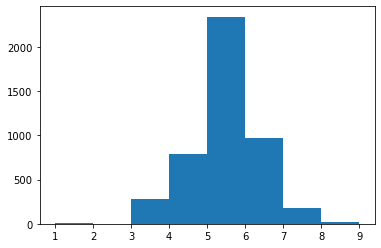

In [20]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()

In [53]:
def recursive(G, V, s, k_prev, it):
    
    R = N - sum(V)
    
    size, weight = get_size_weight(G, W, V, s)
    if size == 1 or weight <= 200:
        return 0
    
    if it > 5:
        return 1e10
    
    if it == 1:
        P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, 8, s)
        
        ans = 0
        for u in P[::-1]:
            I = set(get_ideal(G, V, u)[::-1])
            newV = [not (v in I) for v in range(N)]
            ans += recursive(G, newV, u, 5, 2) + 8 * (N - sum(newV))
            V, _ = visit(G, V, u)
        
    else:
        
        ans = 1e15
        for k in range(2, min(k_prev, R) + 1):
            if R > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif R > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            V_ = V.copy()
            aux = 0
            for u in P[::-1]:
                I = set(get_ideal(G, V_, u)[::-1])
                newV = [not (v in I) for v in range(N)]
                aux += recursive(G, newV, u, k, it + 1) + k * (N - sum(newV))
                V_, _ = visit(G, V_, u)
                
            ans = min(ans, aux)
                
    return ans

In [54]:
opt = recursive(T, [0] * N, 743, -1, 1)

In [55]:
opt

270000097089.0

In [64]:
recMAP = {}

s = 743
V = [0] * N

Q = deque()

P, _ = get_sample_from_table(T, init_possibilities, init_next_dicts, V, 8, s)

for u in P[::-1]:
    I = set(get_ideal(T, V, u)[::-1])
    newV = [not (v in I) for v in range(N)]
    Q.append((newV, u, 5, 2))
    V, _ = visit(T, V, u)
    
recMAP[(s, 1)] = 8
    
while Q:
    V, s, k_prev, it = Q.popleft()
    
    R = N - sum(V)
    
    size, weight = get_size_weight(T, W, V, s)
    if size == 1 or weight <= 200:
        continue
    
    if it > 5:
        continue
    
    nxt = None
    
    ans = 1e20
    for k in range(2, min(k_prev, R) + 1):
        if R > 200:
            new_possibilities, new_next_dicts = get_dp_table(T, V, k, s, 20)
            P, _ = get_sample_from_table(T, new_possibilities, new_next_dicts, V, k, s)
        elif R > 10:
            new_possibilities, new_next_dicts = get_dp_table(T, V, k, s, 10)
            P, _ = get_sample_from_table(T, new_possibilities, new_next_dicts, V, k, s)
        else:
            new_possibilities, new_next_dicts = get_dp_table(T, V, min(k, R), s, 1)
            P, _ = get_sample_from_table(T, new_possibilities, new_next_dicts, V, min(k, R), s)

        V_ = V.copy()
        aux = 0
        for u in P[::-1]:
            I = set(get_ideal(T, V_, u)[::-1])
            newV = [not (v in I) for v in range(N)]
            aux += recursive(T, newV, u, k, it + 1) + k * (N - sum(newV))
            V_, _ = visit(T, V_, u)

        V_ = V.copy()
        if aux < ans:
            recMAP[(s, it)] = k
            ans = aux; nxt = []
            for u in P[::-1]:
                I = set(get_ideal(T, V_, u)[::-1])
                nxt.append(([not (v in I) for v in range(N)], u, k, it + 1))
                V_, _ = visit(T, V_, u)
    
    for tpl in nxt:
        Q.append(tpl)

In [67]:
def simulate_recursive(G, W, pre_map, s_init, nodes):
    T = []; N = len(W)
    k_sum = 0

    for r in nodes:
        CV = [0 for u in range(N)]

        CV[r] = 1
        Q = deque([]); Q.append(r)
        while Q:
            u = Q.popleft()
            for v in G.successors(u):
                if not CV[v]:
                    CV[v] = 1
                    Q.append(v)

        V = [0 for u in range(N)]

        R = N; s = s_init; ks = []
        for t in range(100):
            R = N - sum(V); P = []
            
            try:
                k = pre_map[(s, t + 1)]
            except:
                k = ks[-1]
            
            ks.append(k); k_sum += k
            if t == 0:
                P, _ = get_sample_from_table(G, init_possibilities, init_next_dicts, V, k, s)
            elif N - sum(V) > 200:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 20)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            elif N - sum(V) > 10:
                new_possibilities, new_next_dicts = get_dp_table(G, V, k, s, 10)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, k, s)
            else:
                new_possibilities, new_next_dicts = get_dp_table(G, V, min(k, N - sum(V)), s, 1)
                P, _ = get_sample_from_table(G, new_possibilities, new_next_dicts, V, min(k, N - sum(V)), s)
                
            for u in P[::-1]:
                if CV[u]:
                    I = set(get_ideal(G, V, u)[::-1])
                    V = [not (v in I) for v in range(N)]
                    s = u; break
                else:
                    V, _ = visit(G, V, u)

            size, weight = get_size_weight(G, W, V, s)

            if size == 1 or weight <= 200:
                T.append(t + 1)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}    ks: {ks}")
                break
            if t == 99:
                T.append(100)
                print(f"Result {r}: {T[-1]}    acc: {sum(T) / (len(T))}")

    print(sum(T) / len(T), max(T), k_sum)
    
    return T


In [70]:
iters = simulate_recursive(T, W, recMAP, 743, range(N))

Result 0: 5    acc: 5.0    ks: [8, 5, 5, 4, 2]
Result 1: 5    acc: 5.0    ks: [8, 5, 5, 4, 2]
Result 2: 4    acc: 4.666666666666667    ks: [8, 5, 5, 4]
Result 3: 4    acc: 4.5    ks: [8, 5, 5, 4]
Result 4: 5    acc: 4.6    ks: [8, 5, 5, 4, 2]
Result 5: 5    acc: 4.666666666666667    ks: [8, 5, 5, 4, 2]
Result 6: 5    acc: 4.714285714285714    ks: [8, 5, 5, 4, 2]
Result 7: 5    acc: 4.75    ks: [8, 5, 5, 4, 2]
Result 8: 5    acc: 4.777777777777778    ks: [8, 5, 5, 4, 2]
Result 9: 5    acc: 4.8    ks: [8, 5, 5, 4, 2]
Result 10: 5    acc: 4.818181818181818    ks: [8, 5, 5, 4, 2]
Result 11: 5    acc: 4.833333333333333    ks: [8, 5, 5, 4, 2]
Result 12: 5    acc: 4.846153846153846    ks: [8, 5, 5, 4, 2]
Result 13: 5    acc: 4.857142857142857    ks: [8, 5, 5, 4, 2]
Result 14: 1    acc: 4.6    ks: [8]
Result 15: 1    acc: 4.375    ks: [8]
Result 16: 1    acc: 4.176470588235294    ks: [8]
Result 17: 1    acc: 4.0    ks: [8]
Result 18: 1    acc: 3.8421052631578947    ks: [8]
Result 19: 5    acc:

Result 142: 5    acc: 4.699300699300699    ks: [8, 5, 4, 3, 2]
Result 143: 5    acc: 4.701388888888889    ks: [8, 5, 4, 4, 2]
Result 144: 5    acc: 4.703448275862069    ks: [8, 5, 4, 3, 2]
Result 145: 5    acc: 4.705479452054795    ks: [8, 5, 4, 3, 2]
Result 146: 5    acc: 4.707482993197279    ks: [8, 5, 4, 3, 2]
Result 147: 5    acc: 4.70945945945946    ks: [8, 5, 4, 3, 2]
Result 148: 5    acc: 4.7114093959731544    ks: [8, 5, 4, 3, 2]
Result 149: 5    acc: 4.713333333333333    ks: [8, 5, 4, 3, 2]
Result 150: 5    acc: 4.71523178807947    ks: [8, 5, 4, 3, 3]
Result 151: 5    acc: 4.717105263157895    ks: [8, 5, 4, 3, 3]
Result 152: 5    acc: 4.718954248366013    ks: [8, 5, 4, 3, 2]
Result 153: 5    acc: 4.720779220779221    ks: [8, 5, 4, 3, 3]
Result 154: 5    acc: 4.72258064516129    ks: [8, 5, 4, 3, 2]
Result 155: 5    acc: 4.7243589743589745    ks: [8, 5, 4, 3, 2]
Result 156: 5    acc: 4.726114649681529    ks: [8, 5, 4, 3, 3]
Result 157: 5    acc: 4.727848101265823    ks: [8, 5, 4,

Result 278: 4    acc: 4.562724014336918    ks: [8, 5, 4, 2]
Result 279: 3    acc: 4.557142857142857    ks: [8, 5, 5]
Result 280: 3    acc: 4.551601423487544    ks: [8, 5, 4]
Result 281: 5    acc: 4.553191489361702    ks: [8, 5, 5, 5, 3]
Result 282: 5    acc: 4.554770318021202    ks: [8, 5, 4, 2, 2]
Result 283: 3    acc: 4.549295774647887    ks: [8, 5, 5]
Result 284: 3    acc: 4.543859649122807    ks: [8, 5, 4]
Result 285: 3    acc: 4.538461538461538    ks: [8, 5, 5]
Result 286: 5    acc: 4.54006968641115    ks: [8, 5, 4, 2, 2]
Result 287: 4    acc: 4.538194444444445    ks: [8, 5, 4, 3]
Result 288: 3    acc: 4.532871972318339    ks: [8, 5, 5]
Result 289: 3    acc: 4.527586206896552    ks: [8, 5, 5]
Result 290: 4    acc: 4.525773195876289    ks: [8, 5, 4, 4]
Result 291: 3    acc: 4.52054794520548    ks: [8, 5, 5]
Result 292: 4    acc: 4.51877133105802    ks: [8, 5, 4, 2]
Result 293: 3    acc: 4.51360544217687    ks: [8, 5, 5]
Result 294: 5    acc: 4.5152542372881355    ks: [8, 5, 4, 3, 3

Result 416: 5    acc: 4.419664268585132    ks: [8, 5, 4, 3, 2]
Result 417: 5    acc: 4.421052631578948    ks: [8, 5, 5, 2, 2]
Result 418: 4    acc: 4.420047732696897    ks: [8, 5, 5, 2]
Result 419: 5    acc: 4.421428571428572    ks: [8, 5, 4, 4, 2]
Result 420: 3    acc: 4.418052256532066    ks: [8, 5, 5]
Result 421: 3    acc: 4.414691943127962    ks: [8, 5, 4]
Result 422: 4    acc: 4.41371158392435    ks: [8, 5, 4, 2]
Result 423: 8    acc: 4.422169811320755    ks: [8, 5, 4, 2, 2, 2, 2, 2]
Result 424: 3    acc: 4.418823529411765    ks: [8, 5, 5]
Result 425: 5    acc: 4.42018779342723    ks: [8, 5, 5, 4, 2]
Result 426: 5    acc: 4.421545667447306    ks: [8, 5, 4, 2, 2]
Result 427: 3    acc: 4.418224299065421    ks: [8, 5, 5]
Result 428: 3    acc: 4.414918414918415    ks: [8, 5, 4]
Result 429: 4    acc: 4.413953488372093    ks: [8, 5, 4, 3]
Result 430: 4    acc: 4.412993039443156    ks: [8, 5, 5, 2]
Result 431: 5    acc: 4.414351851851852    ks: [8, 5, 4, 4, 4]
Result 432: 4    acc: 4.413

Result 551: 5    acc: 4.445652173913044    ks: [8, 5, 5, 5, 5]
Result 552: 5    acc: 4.4466546112115735    ks: [8, 5, 5, 5, 5]
Result 553: 5    acc: 4.447653429602888    ks: [8, 5, 5, 5, 5]
Result 554: 5    acc: 4.448648648648649    ks: [8, 5, 5, 5, 5]
Result 555: 5    acc: 4.4496402877697845    ks: [8, 5, 5, 5, 5]
Result 556: 5    acc: 4.450628366247756    ks: [8, 5, 5, 5, 5]
Result 557: 5    acc: 4.451612903225806    ks: [8, 5, 5, 5, 5]
Result 558: 5    acc: 4.452593917710197    ks: [8, 5, 5, 5, 5]
Result 559: 5    acc: 4.453571428571428    ks: [8, 5, 5, 5, 5]
Result 560: 5    acc: 4.454545454545454    ks: [8, 5, 5, 5, 5]
Result 561: 5    acc: 4.455516014234876    ks: [8, 5, 5, 5, 5]
Result 562: 5    acc: 4.4564831261101245    ks: [8, 5, 5, 5, 2]
Result 563: 4    acc: 4.455673758865248    ks: [8, 4, 4, 4]
Result 564: 5    acc: 4.456637168141593    ks: [8, 5, 5, 5, 2]
Result 565: 5    acc: 4.457597173144876    ks: [8, 5, 5, 5, 2]
Result 566: 5    acc: 4.458553791887125    ks: [8, 5, 5

Result 688: 4    acc: 4.422351233671988    ks: [8, 5, 5, 3]
Result 689: 4    acc: 4.421739130434783    ks: [8, 5, 5, 3]
Result 690: 4    acc: 4.421128798842258    ks: [8, 5, 5, 3]
Result 691: 4    acc: 4.420520231213873    ks: [8, 5, 5, 3]
Result 692: 4    acc: 4.41991341991342    ks: [8, 5, 5, 3]
Result 693: 4    acc: 4.4193083573487035    ks: [8, 5, 5, 3]
Result 694: 4    acc: 4.418705035971223    ks: [8, 5, 5, 3]
Result 695: 4    acc: 4.418103448275862    ks: [8, 5, 5, 3]
Result 696: 4    acc: 4.417503586800574    ks: [8, 5, 5, 3]
Result 697: 4    acc: 4.416905444126074    ks: [8, 5, 5, 3]
Result 698: 5    acc: 4.417739628040057    ks: [8, 5, 5, 2, 2]
Result 699: 4    acc: 4.417142857142857    ks: [8, 5, 5, 3]
Result 700: 4    acc: 4.4165477888730384    ks: [8, 5, 5, 3]
Result 701: 4    acc: 4.415954415954416    ks: [8, 5, 5, 3]
Result 702: 4    acc: 4.415362731152205    ks: [8, 5, 5, 3]
Result 703: 4    acc: 4.4147727272727275    ks: [8, 5, 5, 3]
Result 704: 4    acc: 4.41418439716

Result 824: 4    acc: 4.408484848484848    ks: [8, 5, 5, 2]
Result 825: 5    acc: 4.4092009685230025    ks: [8, 5, 5, 5, 4]
Result 826: 5    acc: 4.409915356711004    ks: [8, 5, 5, 2, 2]
Result 827: 5    acc: 4.4106280193236715    ks: [8, 5, 5, 5, 4]
Result 828: 5    acc: 4.411338962605549    ks: [8, 5, 4, 4, 2]
Result 829: 3    acc: 4.409638554216867    ks: [8, 5, 5]
Result 830: 4    acc: 4.409145607701564    ks: [8, 5, 5, 3]
Result 831: 4    acc: 4.408653846153846    ks: [8, 5, 5, 3]
Result 832: 4    acc: 4.408163265306122    ks: [8, 4, 4, 4]
Result 833: 4    acc: 4.407673860911271    ks: [8, 4, 4, 4]
Result 834: 4    acc: 4.407185628742515    ks: [8, 4, 4, 4]
Result 835: 4    acc: 4.4066985645933014    ks: [8, 4, 4, 4]
Result 836: 4    acc: 4.406212664277181    ks: [8, 4, 4, 4]
Result 837: 4    acc: 4.405727923627685    ks: [8, 4, 4, 4]
Result 838: 4    acc: 4.405244338498212    ks: [8, 4, 4, 4]
Result 839: 4    acc: 4.404761904761905    ks: [8, 4, 4, 4]
Result 840: 4    acc: 4.4042

Result 959: 4    acc: 4.388541666666667    ks: [8, 5, 3, 2]
Result 960: 4    acc: 4.388137356919875    ks: [8, 4, 4, 4]
Result 961: 4    acc: 4.387733887733888    ks: [8, 5, 4, 2]
Result 962: 4    acc: 4.387331256490135    ks: [8, 4, 4, 4]
Result 963: 4    acc: 4.386929460580913    ks: [8, 5, 4, 2]
Result 964: 3    acc: 4.385492227979275    ks: [8, 4, 2]
Result 965: 3    acc: 4.384057971014493    ks: [8, 4, 2]
Result 966: 3    acc: 4.382626680455015    ks: [8, 4, 2]
Result 967: 3    acc: 4.381198347107438    ks: [8, 4, 2]
Result 968: 3    acc: 4.379772961816306    ks: [8, 4, 2]
Result 969: 4    acc: 4.3793814432989695    ks: [8, 5, 4, 3]
Result 970: 3    acc: 4.377960865087538    ks: [8, 5, 3]
Result 971: 3    acc: 4.3765432098765435    ks: [8, 5, 3]
Result 972: 3    acc: 4.3751284686536485    ks: [8, 5, 5]
Result 973: 3    acc: 4.373716632443532    ks: [8, 5, 5]
Result 974: 3    acc: 4.372307692307692    ks: [8, 5, 5]
Result 975: 4    acc: 4.371926229508197    ks: [8, 5, 5, 5]
Result 

Result 1095: 4    acc: 4.366788321167883    ks: [8, 5, 5, 3]
Result 1096: 4    acc: 4.366453965360073    ks: [8, 5, 5, 3]
Result 1097: 4    acc: 4.366120218579235    ks: [8, 5, 5, 3]
Result 1098: 4    acc: 4.3657870791628755    ks: [8, 5, 5, 3]
Result 1099: 4    acc: 4.365454545454545    ks: [8, 5, 5, 5]
Result 1100: 5    acc: 4.366030881017257    ks: [8, 5, 4, 3, 2]
Result 1101: 4    acc: 4.3656987295825775    ks: [8, 5, 4, 2]
Result 1102: 5    acc: 4.3662737987307345    ks: [8, 5, 5, 4, 2]
Result 1103: 4    acc: 4.365942028985507    ks: [8, 5, 5, 4]
Result 1104: 4    acc: 4.365610859728506    ks: [8, 5, 5, 5]
Result 1105: 4    acc: 4.365280289330922    ks: [8, 5, 4, 2]
Result 1106: 3    acc: 4.364046973803071    ks: [8, 5, 5]
Result 1107: 3    acc: 4.362815884476534    ks: [8, 4, 2]
Result 1108: 4    acc: 4.36248872858431    ks: [8, 5, 5, 5]
Result 1109: 4    acc: 4.3621621621621625    ks: [8, 5, 5, 5]
Result 1110: 5    acc: 4.3627362736273625    ks: [8, 5, 5, 2, 2]
Result 1111: 9   

Result 1230: 5    acc: 4.335499593826158    ks: [8, 5, 5, 3, 2]
Result 1231: 5    acc: 4.336038961038961    ks: [8, 5, 5, 3, 2]
Result 1232: 5    acc: 4.336577453365774    ks: [8, 5, 5, 3, 2]
Result 1233: 5    acc: 4.33711507293355    ks: [8, 5, 5, 3, 2]
Result 1234: 5    acc: 4.337651821862348    ks: [8, 5, 5, 3, 2]
Result 1235: 5    acc: 4.3381877022653725    ks: [8, 5, 5, 3, 2]
Result 1236: 5    acc: 4.33872271624899    ks: [8, 5, 5, 3, 2]
Result 1237: 5    acc: 4.339256865912763    ks: [8, 5, 5, 3, 2]
Result 1238: 5    acc: 4.339790153349475    ks: [8, 5, 5, 5, 2]
Result 1239: 5    acc: 4.340322580645161    ks: [8, 5, 5, 3, 2]
Result 1240: 5    acc: 4.34085414987913    ks: [8, 5, 4, 4, 2]
Result 1241: 5    acc: 4.341384863123993    ks: [8, 5, 4, 4, 2]
Result 1242: 5    acc: 4.341914722445696    ks: [8, 5, 4, 4, 2]
Result 1243: 5    acc: 4.342443729903537    ks: [8, 5, 4, 4, 3]
Result 1244: 5    acc: 4.342971887550201    ks: [8, 5, 4, 4, 2]
Result 1245: 5    acc: 4.343499197431782  

Result 1361: 5    acc: 4.370778267254038    ks: [8, 5, 5, 2, 2]
Result 1362: 4    acc: 4.37050623624358    ks: [8, 5, 5, 2]
Result 1363: 4    acc: 4.370234604105572    ks: [8, 5, 5, 2]
Result 1364: 4    acc: 4.3699633699633695    ks: [8, 5, 5, 2]
Result 1365: 4    acc: 4.369692532942899    ks: [8, 5, 5, 2]
Result 1366: 4    acc: 4.369422092172641    ks: [8, 5, 5, 2]
Result 1367: 4    acc: 4.369152046783626    ks: [8, 5, 5, 2]
Result 1368: 4    acc: 4.368882395909423    ks: [8, 5, 5, 2]
Result 1369: 4    acc: 4.368613138686132    ks: [8, 5, 5, 2]
Result 1370: 4    acc: 4.368344274252371    ks: [8, 5, 5, 2]
Result 1371: 4    acc: 4.368075801749272    ks: [8, 5, 5, 2]
Result 1372: 4    acc: 4.367807720320466    ks: [8, 5, 5, 2]
Result 1373: 4    acc: 4.367540029112082    ks: [8, 5, 5, 2]
Result 1374: 4    acc: 4.367272727272727    ks: [8, 5, 5, 2]
Result 1375: 4    acc: 4.367005813953488    ks: [8, 5, 5, 2]
Result 1376: 4    acc: 4.366739288307916    ks: [8, 5, 5, 2]
Result 1377: 4    acc

Result 1494: 3    acc: 4.3705685618729095    ks: [8, 5, 3]
Result 1495: 3    acc: 4.369652406417113    ks: [8, 5, 3]
Result 1496: 3    acc: 4.3687374749499    ks: [8, 5, 3]
Result 1497: 3    acc: 4.3678237650200264    ks: [8, 5, 3]
Result 1498: 3    acc: 4.3669112741827885    ks: [8, 5, 3]
Result 1499: 3    acc: 4.366    ks: [8, 5, 3]
Result 1500: 3    acc: 4.365089940039973    ks: [8, 5, 3]
Result 1501: 3    acc: 4.364181091877497    ks: [8, 5, 3]
Result 1502: 4    acc: 4.36393878908849    ks: [8, 5, 5, 3]
Result 1503: 4    acc: 4.363696808510638    ks: [8, 5, 5, 5]
Result 1504: 4    acc: 4.363455149501661    ks: [8, 5, 5, 5]
Result 1505: 4    acc: 4.363213811420983    ks: [8, 5, 5, 5]
Result 1506: 5    acc: 4.363636363636363    ks: [8, 5, 5, 5, 2]
Result 1507: 5    acc: 4.364058355437666    ks: [8, 5, 5, 5, 2]
Result 1508: 5    acc: 4.3644797879390325    ks: [8, 5, 5, 5, 2]
Result 1509: 3    acc: 4.363576158940397    ks: [8, 5, 4]
Result 1510: 4    acc: 4.363335539377895    ks: [8, 5

Result 1627: 4    acc: 4.375921375921376    ks: [8, 5, 5, 2]
Result 1628: 4    acc: 4.375690607734807    ks: [8, 5, 5, 2]
Result 1629: 4    acc: 4.375460122699386    ks: [8, 5, 5, 2]
Result 1630: 4    acc: 4.375229920294298    ks: [8, 5, 5, 2]
Result 1631: 4    acc: 4.375    ks: [8, 5, 5, 2]
Result 1632: 4    acc: 4.374770361298224    ks: [8, 5, 5, 2]
Result 1633: 4    acc: 4.374541003671971    ks: [8, 5, 5, 2]
Result 1634: 4    acc: 4.374311926605505    ks: [8, 5, 5, 2]
Result 1635: 4    acc: 4.374083129584352    ks: [8, 5, 5, 2]
Result 1636: 3    acc: 4.373243738546121    ks: [8, 5, 3]
Result 1637: 3    acc: 4.372405372405372    ks: [8, 5, 3]
Result 1638: 3    acc: 4.37156802928615    ks: [8, 5, 3]
Result 1639: 5    acc: 4.371951219512195    ks: [8, 5, 4, 4, 2]
Result 1640: 3    acc: 4.371115173674589    ks: [8, 5, 3]
Result 1641: 3    acc: 4.370280146163216    ks: [8, 5, 3]
Result 1642: 4    acc: 4.370054777845405    ks: [8, 5, 4, 4]
Result 1643: 4    acc: 4.369829683698297    ks: [

Result 1758: 5    acc: 4.392268334280842    ks: [8, 5, 5, 4, 2]
Result 1759: 5    acc: 4.392613636363636    ks: [8, 5, 5, 4, 2]
Result 1760: 5    acc: 4.392958546280522    ks: [8, 5, 5, 4, 2]
Result 1761: 5    acc: 4.3933030646992055    ks: [8, 5, 5, 4, 2]
Result 1762: 4    acc: 4.393079977311401    ks: [8, 5, 5, 4]
Result 1763: 4    acc: 4.392857142857143    ks: [8, 5, 5, 4]
Result 1764: 4    acc: 4.392634560906515    ks: [8, 5, 5, 5]
Result 1765: 4    acc: 4.392412231030578    ks: [8, 5, 5, 5]
Result 1766: 4    acc: 4.3921901528013585    ks: [8, 5, 5, 5]
Result 1767: 4    acc: 4.391968325791855    ks: [8, 5, 5, 5]
Result 1768: 4    acc: 4.391746749576032    ks: [8, 5, 5, 5]
Result 1769: 5    acc: 4.392090395480226    ks: [8, 5, 5, 5, 2]
Result 1770: 5    acc: 4.392433653303218    ks: [8, 5, 5, 5, 2]
Result 1771: 5    acc: 4.3927765237020315    ks: [8, 5, 5, 5, 2]
Result 1772: 5    acc: 4.3931190073322055    ks: [8, 5, 5, 5, 2]
Result 1773: 5    acc: 4.393461104847802    ks: [8, 5, 5,

Result 1891: 4    acc: 4.391649048625792    ks: [8, 5, 5, 4]
Result 1892: 4    acc: 4.391442155309034    ks: [8, 5, 3, 3]
Result 1893: 4    acc: 4.391235480464625    ks: [8, 5, 3, 3]
Result 1894: 4    acc: 4.391029023746702    ks: [8, 5, 3, 3]
Result 1895: 5    acc: 4.391350210970464    ks: [8, 5, 3, 3, 2]
Result 1896: 4    acc: 4.391143911439114    ks: [8, 5, 4, 2]
Result 1897: 4    acc: 4.390937829293994    ks: [8, 5, 4, 2]
Result 1898: 4    acc: 4.39073196419168    ks: [8, 5, 4, 2]
Result 1899: 4    acc: 4.390526315789474    ks: [8, 5, 4, 2]
Result 1900: 4    acc: 4.390320883745397    ks: [8, 5, 4, 2]
Result 1901: 4    acc: 4.390115667718192    ks: [8, 5, 4, 2]
Result 1902: 4    acc: 4.389910667367315    ks: [8, 5, 4, 2]
Result 1903: 4    acc: 4.389705882352941    ks: [8, 5, 4, 2]
Result 1904: 4    acc: 4.389501312335958    ks: [8, 5, 4, 2]
Result 1905: 4    acc: 4.389296956977964    ks: [8, 5, 5, 4]
Result 1906: 4    acc: 4.389092815941269    ks: [8, 5, 5, 4]
Result 1907: 4    acc:

Result 2023: 4    acc: 4.399209486166008    ks: [8, 5, 4, 3]
Result 2024: 4    acc: 4.3990123456790124    ks: [8, 5, 4, 3]
Result 2025: 5    acc: 4.399308983218164    ks: [8, 5, 5, 4, 3]
Result 2026: 5    acc: 4.399605328071041    ks: [8, 5, 5, 4, 3]
Result 2027: 5    acc: 4.399901380670611    ks: [8, 5, 5, 4, 3]
Result 2028: 5    acc: 4.40019714144899    ks: [8, 5, 5, 4, 3]
Result 2029: 5    acc: 4.400492610837438    ks: [8, 5, 5, 4, 3]
Result 2030: 5    acc: 4.400787789266372    ks: [8, 5, 5, 4, 3]
Result 2031: 5    acc: 4.401082677165355    ks: [8, 5, 5, 4, 2]
Result 2032: 5    acc: 4.401377274963108    ks: [8, 5, 5, 4, 2]
Result 2033: 5    acc: 4.401671583087512    ks: [8, 5, 4, 3, 2]
Result 2034: 5    acc: 4.401965601965602    ks: [8, 5, 4, 3, 2]
Result 2035: 5    acc: 4.402259332023576    ks: [8, 5, 4, 3, 2]
Result 2036: 5    acc: 4.402552773686795    ks: [8, 5, 4, 3, 2]
Result 2037: 5    acc: 4.402845927379784    ks: [8, 5, 4, 3, 2]
Result 2038: 5    acc: 4.403138793526239    ks

Result 2155: 4    acc: 4.403061224489796    ks: [8, 5, 5, 5]
Result 2156: 5    acc: 4.403337969401947    ks: [8, 5, 5, 4, 2]
Result 2157: 5    acc: 4.403614457831325    ks: [8, 5, 5, 4, 2]
Result 2158: 5    acc: 4.403890690134322    ks: [8, 5, 5, 4, 2]
Result 2159: 5    acc: 4.404166666666667    ks: [8, 5, 5, 4, 2]
Result 2160: 3    acc: 4.403516890328552    ks: [8, 5, 5]
Result 2161: 3    acc: 4.402867715078631    ks: [8, 5, 5]
Result 2162: 3    acc: 4.402219140083218    ks: [8, 5, 3]
Result 2163: 3    acc: 4.401571164510166    ks: [8, 5, 3]
Result 2164: 3    acc: 4.4009237875288685    ks: [8, 5, 3]
Result 2165: 3    acc: 4.400277008310249    ks: [8, 5, 3]
Result 2166: 3    acc: 4.399630826026765    ks: [8, 5, 3]
Result 2167: 5    acc: 4.3999077490774905    ks: [8, 5, 4, 4, 2]
Result 2168: 7    acc: 4.401106500691563    ks: [8, 5, 4, 4, 2, 2, 2]
Result 2169: 7    acc: 4.402304147465438    ks: [8, 5, 4, 4, 2, 2, 2]
Result 2170: 4    acc: 4.402118839244587    ks: [8, 5, 5, 2]
Result 217

Result 2293: 5    acc: 4.3487358326068    ks: [8, 5, 5, 4, 2]
Result 2294: 5    acc: 4.349019607843137    ks: [8, 5, 5, 4, 2]
Result 2295: 4    acc: 4.348867595818815    ks: [8, 5, 5, 4]
Result 2296: 4    acc: 4.348715716151502    ks: [8, 5, 4, 3]
Result 2297: 5    acc: 4.34899912967798    ks: [8, 5, 4, 4, 3]
Result 2298: 5    acc: 4.349282296650718    ks: [8, 5, 4, 4, 3]
Result 2299: 5    acc: 4.349565217391304    ks: [8, 5, 4, 4, 3]
Result 2300: 5    acc: 4.349847892220773    ks: [8, 5, 4, 4, 3]
Result 2301: 5    acc: 4.3501303214596    ks: [8, 5, 4, 4, 3]
Result 2302: 5    acc: 4.350412505427703    ks: [8, 5, 4, 4, 3]
Result 2303: 5    acc: 4.350694444444445    ks: [8, 5, 4, 4, 2]
Result 2304: 5    acc: 4.350976138828633    ks: [8, 5, 4, 4, 2]
Result 2305: 5    acc: 4.351257588898526    ks: [8, 5, 4, 4, 2]
Result 2306: 5    acc: 4.351538794971825    ks: [8, 5, 4, 4, 2]
Result 2307: 5    acc: 4.351819757365685    ks: [8, 5, 4, 4, 2]
Result 2308: 5    acc: 4.352100476396709    ks: [8,

Result 2428: 4    acc: 4.331000411692054    ks: [8, 5, 5, 3]
Result 2429: 4    acc: 4.330864197530865    ks: [8, 5, 5, 4]
Result 2430: 4    acc: 4.330728095433978    ks: [8, 5, 5, 4]
Result 2431: 4    acc: 4.3305921052631575    ks: [8, 5, 5, 4]
Result 2432: 4    acc: 4.330456226880394    ks: [8, 5, 5, 4]
Result 2433: 4    acc: 4.330320460147905    ks: [8, 5, 5, 4]
Result 2434: 4    acc: 4.330184804928131    ks: [8, 5, 5, 4]
Result 2435: 4    acc: 4.330049261083744    ks: [8, 5, 5, 4]
Result 2436: 4    acc: 4.329913828477636    ks: [8, 5, 5, 4]
Result 2437: 4    acc: 4.329778506972929    ks: [8, 5, 5, 5]
Result 2438: 4    acc: 4.329643296432964    ks: [8, 5, 5, 5]
Result 2439: 4    acc: 4.329508196721312    ks: [8, 5, 5, 5]
Result 2440: 4    acc: 4.329373207701762    ks: [8, 5, 5, 5]
Result 2441: 4    acc: 4.329238329238329    ks: [8, 5, 5, 5]
Result 2442: 4    acc: 4.329103561195252    ks: [8, 5, 5, 2]
Result 2443: 5    acc: 4.3293780687397705    ks: [8, 5, 4, 3, 2]
Result 2444: 5    a

Result 2570: 3    acc: 4.290937378451964    ks: [8, 4, 2]
Result 2571: 3    acc: 4.290435458786936    ks: [8, 4, 2]
Result 2572: 3    acc: 4.289933929265449    ks: [8, 4, 2]
Result 2573: 3    acc: 4.289432789432789    ks: [8, 4, 2]
Result 2574: 3    acc: 4.288932038834951    ks: [8, 4, 2]
Result 2575: 3    acc: 4.288431677018633    ks: [8, 4, 2]
Result 2576: 3    acc: 4.287931703531238    ks: [8, 4, 2]
Result 2577: 3    acc: 4.2874321179208685    ks: [8, 4, 2]
Result 2578: 3    acc: 4.286932919736332    ks: [8, 4, 2]
Result 2579: 3    acc: 4.286434108527132    ks: [8, 4, 2]
Result 2580: 3    acc: 4.285935683843472    ks: [8, 4, 2]
Result 2581: 3    acc: 4.285437645236251    ks: [8, 4, 2]
Result 2582: 3    acc: 4.2849399922570655    ks: [8, 4, 2]
Result 2583: 3    acc: 4.284442724458204    ks: [8, 4, 2]
Result 2584: 3    acc: 4.28394584139265    ks: [8, 4, 2]
Result 2585: 3    acc: 4.283449342614076    ks: [8, 4, 2]
Result 2586: 7    acc: 4.284499420177812    ks: [8, 5, 5, 2, 2, 2, 2]
R

Result 2703: 4    acc: 4.2921597633136095    ks: [8, 5, 3, 2]
Result 2704: 4    acc: 4.292051756007393    ks: [8, 5, 3, 2]
Result 2705: 4    acc: 4.291943828529194    ks: [8, 5, 3, 2]
Result 2706: 4    acc: 4.291835980790543    ks: [8, 5, 3, 2]
Result 2707: 4    acc: 4.291728212703102    ks: [8, 5, 4, 3]
Result 2708: 5    acc: 4.291989664082688    ks: [8, 5, 5, 3, 2]
Result 2709: 5    acc: 4.292250922509225    ks: [8, 5, 5, 5, 2]
Result 2710: 4    acc: 4.292143120619698    ks: [8, 5, 3, 2]
Result 2711: 4    acc: 4.292035398230088    ks: [8, 5, 5, 5]
Result 2712: 4    acc: 4.291927755252488    ks: [8, 4, 4, 3]
Result 2713: 4    acc: 4.291820191599116    ks: [8, 5, 3, 2]
Result 2714: 5    acc: 4.292081031307551    ks: [8, 5, 4, 4, 4]
Result 2715: 5    acc: 4.292341678939617    ks: [8, 5, 4, 4, 4]
Result 2716: 5    acc: 4.292602134707398    ks: [8, 5, 4, 4, 4]
Result 2717: 5    acc: 4.292862398822663    ks: [8, 5, 4, 4, 4]
Result 2718: 4    acc: 4.29275468922398    ks: [8, 5, 3, 2]
Result

Result 2836: 5    acc: 4.302079661614381    ks: [8, 5, 5, 4, 2]
Result 2837: 5    acc: 4.3023255813953485    ks: [8, 5, 5, 4, 2]
Result 2838: 4    acc: 4.302219091229306    ks: [8, 5, 5, 4]
Result 2839: 4    acc: 4.302112676056338    ks: [8, 5, 5, 4]
Result 2840: 4    acc: 4.302006335797254    ks: [8, 5, 5, 4]
Result 2841: 3    acc: 4.301548205489092    ks: [8, 5, 5]
Result 2842: 3    acc: 4.301090397467464    ks: [8, 5, 5]
Result 2843: 3    acc: 4.300632911392405    ks: [8, 5, 5]
Result 2844: 3    acc: 4.300175746924428    ks: [8, 5, 5]
Result 2845: 3    acc: 4.299718903724526    ks: [8, 5, 5]
Result 2846: 3    acc: 4.299262381454162    ks: [8, 5, 5]
Result 2847: 3    acc: 4.298806179775281    ks: [8, 5, 5]
Result 2848: 3    acc: 4.298350298350298    ks: [8, 5, 5]
Result 2849: 4    acc: 4.298245614035087    ks: [8, 5, 5, 3]
Result 2850: 4    acc: 4.298141003156787    ks: [8, 5, 5, 3]
Result 2851: 4    acc: 4.298036465638148    ks: [8, 5, 5, 3]
Result 2852: 4    acc: 4.297932001402033 

Result 2972: 5    acc: 4.288597376387488    ks: [8, 5, 3, 3, 2]
Result 2973: 5    acc: 4.288836583725622    ks: [8, 5, 3, 3, 2]
Result 2974: 5    acc: 4.289075630252101    ks: [8, 5, 3, 3, 2]
Result 2975: 5    acc: 4.289314516129032    ks: [8, 5, 3, 3, 2]
Result 2976: 5    acc: 4.289553241518307    ks: [8, 5, 3, 3, 2]
Result 2977: 5    acc: 4.289791806581598    ks: [8, 5, 3, 3, 2]
Result 2978: 5    acc: 4.290030211480363    ks: [8, 5, 3, 3, 2]
Result 2979: 5    acc: 4.290268456375839    ks: [8, 5, 3, 3, 2]
Result 2980: 5    acc: 4.290506541429051    ks: [8, 5, 3, 3, 2]
Result 2981: 5    acc: 4.290744466800805    ks: [8, 5, 3, 3, 2]
Result 2982: 5    acc: 4.290982232651693    ks: [8, 5, 3, 3, 2]
Result 2983: 5    acc: 4.291219839142091    ks: [8, 5, 3, 3, 2]
Result 2984: 5    acc: 4.291457286432161    ks: [8, 5, 3, 3, 2]
Result 2985: 5    acc: 4.2916945746818485    ks: [8, 5, 3, 3, 2]
Result 2986: 5    acc: 4.291931704050887    ks: [8, 5, 3, 3, 2]
Result 2987: 5    acc: 4.29216867469879

Result 3109: 5    acc: 4.272347266881029    ks: [8, 5, 5, 2, 2]
Result 3110: 5    acc: 4.272581163612986    ks: [8, 5, 4, 3, 2]
Result 3111: 5    acc: 4.272814910025707    ks: [8, 5, 4, 4, 3]
Result 3112: 5    acc: 4.273048506264054    ks: [8, 5, 4, 4, 3]
Result 3113: 5    acc: 4.273281952472704    ks: [8, 5, 4, 4, 3]
Result 3114: 5    acc: 4.273515248796148    ks: [8, 5, 4, 4, 3]
Result 3115: 5    acc: 4.273748395378691    ks: [8, 5, 4, 4, 3]
Result 3116: 5    acc: 4.273981392364453    ks: [8, 5, 4, 4, 3]
Result 3117: 5    acc: 4.27421423989737    ks: [8, 5, 4, 4, 3]
Result 3118: 4    acc: 4.274126322539275    ks: [8, 5, 4, 4]
Result 3119: 4    acc: 4.274038461538462    ks: [8, 5, 4, 4]
Result 3120: 4    acc: 4.273950656840756    ks: [8, 5, 4, 4]
Result 3121: 4    acc: 4.273862908392056    ks: [8, 5, 4, 4]
Result 3122: 4    acc: 4.273775216138328    ks: [8, 5, 4, 3]
Result 3123: 4    acc: 4.273687580025608    ks: [8, 5, 4, 4]
Result 3124: 4    acc: 4.2736    ks: [8, 5, 4, 4]
Result 31

Result 3242: 4    acc: 4.287696577243294    ks: [8, 4, 4, 4]
Result 3243: 4    acc: 4.2876078914919855    ks: [8, 4, 4, 4]
Result 3244: 4    acc: 4.287519260400616    ks: [8, 4, 4, 4]
Result 3245: 4    acc: 4.287430683918669    ks: [8, 4, 4, 4]
Result 3246: 4    acc: 4.287342161995689    ks: [8, 4, 4, 4]
Result 3247: 4    acc: 4.287253694581281    ks: [8, 4, 4, 4]
Result 3248: 4    acc: 4.287165281625115    ks: [8, 4, 4, 4]
Result 3249: 4    acc: 4.287076923076923    ks: [8, 4, 4, 3]
Result 3250: 4    acc: 4.286988618886497    ks: [8, 4, 4, 3]
Result 3251: 4    acc: 4.28690036900369    ks: [8, 4, 4, 3]
Result 3252: 4    acc: 4.28681217337842    ks: [8, 4, 4, 3]
Result 3253: 4    acc: 4.286724031960664    ks: [8, 4, 4, 4]
Result 3254: 4    acc: 4.2866359447004605    ks: [8, 4, 4, 4]
Result 3255: 4    acc: 4.2865479115479115    ks: [8, 4, 4, 4]
Result 3256: 4    acc: 4.286459932453178    ks: [8, 4, 4, 4]
Result 3257: 4    acc: 4.286372007366483    ks: [8, 4, 4, 4]
Result 3258: 4    acc: 

Result 3375: 5    acc: 4.285545023696683    ks: [8, 5, 4, 3, 2]
Result 3376: 5    acc: 4.2857565886881845    ks: [8, 5, 4, 3, 2]
Result 3377: 5    acc: 4.285968028419183    ks: [8, 5, 4, 3, 2]
Result 3378: 4    acc: 4.285883397454868    ks: [8, 5, 4, 3]
Result 3379: 4    acc: 4.285798816568048    ks: [8, 5, 4, 3]
Result 3380: 5    acc: 4.286010056196392    ks: [8, 5, 4, 3, 2]
Result 3381: 4    acc: 4.2859254878769955    ks: [8, 5, 4, 3]
Result 3382: 4    acc: 4.285840969553651    ks: [8, 5, 4, 3]
Result 3383: 5    acc: 4.286052009456265    ks: [8, 5, 5, 2, 2]
Result 3384: 5    acc: 4.286262924667652    ks: [8, 5, 5, 2, 2]
Result 3385: 4    acc: 4.286178381571175    ks: [8, 5, 5, 4]
Result 3386: 4    acc: 4.286093888396811    ks: [8, 5, 5, 4]
Result 3387: 4    acc: 4.286009445100354    ks: [8, 5, 5, 4]
Result 3388: 4    acc: 4.285925051637651    ks: [8, 5, 5, 4]
Result 3389: 4    acc: 4.285840707964602    ks: [8, 5, 5, 4]
Result 3390: 4    acc: 4.285756414037158    ks: [8, 5, 5, 4]
Resu

Result 3503: 4    acc: 4.316495433789954    ks: [8, 5, 5, 2]
Result 3504: 4    acc: 4.316405135520685    ks: [8, 5, 5, 2]
Result 3505: 6    acc: 4.31688533941814    ks: [8, 5, 5, 2, 2, 2]
Result 3506: 6    acc: 4.317365269461078    ks: [8, 5, 5, 2, 2, 2]
Result 3507: 6    acc: 4.317844925883694    ks: [8, 5, 5, 2, 2, 2]
Result 3508: 4    acc: 4.317754345967512    ks: [8, 5, 5, 2]
Result 3509: 4    acc: 4.317663817663818    ks: [8, 5, 5, 2]
Result 3510: 4    acc: 4.317573340928511    ks: [8, 5, 5, 2]
Result 3511: 4    acc: 4.31748291571754    ks: [8, 5, 5, 2]
Result 3512: 4    acc: 4.317392541986906    ks: [8, 5, 5, 2]
Result 3513: 4    acc: 4.317302219692658    ks: [8, 5, 5, 2]
Result 3514: 4    acc: 4.317211948790896    ks: [8, 5, 5, 2]
Result 3515: 4    acc: 4.31712172923777    ks: [8, 5, 5, 2]
Result 3516: 4    acc: 4.31703156098948    ks: [8, 5, 4, 3]
Result 3517: 4    acc: 4.316941444002274    ks: [8, 5, 4, 3]
Result 3518: 4    acc: 4.316851378232452    ks: [8, 5, 4, 3]
Result 351

Result 3636: 5    acc: 4.32169370360187    ks: [8, 5, 5, 3, 2]
Result 3637: 5    acc: 4.321880153930731    ks: [8, 5, 5, 3, 2]
Result 3638: 5    acc: 4.322066501786205    ks: [8, 5, 5, 3, 2]
Result 3639: 4    acc: 4.321978021978022    ks: [8, 5, 5, 3]
Result 3640: 4    acc: 4.321889590771766    ks: [8, 5, 5, 3]
Result 3641: 4    acc: 4.321801208127402    ks: [8, 5, 5, 3]
Result 3642: 5    acc: 4.321987373044195    ks: [8, 5, 5, 3, 2]
Result 3643: 5    acc: 4.322173435784852    ks: [8, 5, 5, 3, 2]
Result 3644: 5    acc: 4.322359396433471    ks: [8, 5, 5, 3, 2]
Result 3645: 5    acc: 4.322545255074054    ks: [8, 5, 5, 3, 2]
Result 3646: 5    acc: 4.322731011790513    ks: [8, 5, 5, 3, 2]
Result 3647: 5    acc: 4.322916666666667    ks: [8, 5, 5, 3, 2]
Result 3648: 5    acc: 4.323102219786243    ks: [8, 5, 5, 3, 2]
Result 3649: 4    acc: 4.323013698630137    ks: [8, 5, 5, 3]
Result 3650: 4    acc: 4.322925225965489    ks: [8, 5, 5, 3]
Result 3651: 4    acc: 4.322836801752464    ks: [8, 5, 5

Result 3768: 4    acc: 4.325550543910851    ks: [8, 5, 4, 3]
Result 3769: 4    acc: 4.325464190981433    ks: [8, 5, 4, 3]
Result 3770: 4    acc: 4.325377883850438    ks: [8, 5, 4, 3]
Result 3771: 5    acc: 4.325556733828208    ks: [8, 5, 3, 3, 2]
Result 3772: 3    acc: 4.32520540683806    ks: [8, 5, 5]
Result 3773: 4    acc: 4.325119236883943    ks: [8, 5, 3, 2]
Result 3774: 4    acc: 4.325033112582782    ks: [8, 5, 5, 3]
Result 3775: 4    acc: 4.324947033898305    ks: [8, 5, 5, 3]
Result 3776: 4    acc: 4.324861000794281    ks: [8, 5, 5, 3]
Result 3777: 4    acc: 4.3247750132345155    ks: [8, 5, 5, 3]
Result 3778: 4    acc: 4.324689071182853    ks: [8, 5, 5, 3]
Result 3779: 4    acc: 4.324603174603174    ks: [8, 5, 5, 3]
Result 3780: 4    acc: 4.3245173234594025    ks: [8, 5, 5, 3]
Result 3781: 5    acc: 4.324695928080381    ks: [8, 5, 5, 3, 2]
Result 3782: 5    acc: 4.3248744382765    ks: [8, 5, 3, 3, 2]
Result 3783: 5    acc: 4.325052854122622    ks: [8, 5, 3, 3, 2]
Result 3784: 5  

Result 3900: 4    acc: 4.327864650089721    ks: [8, 5, 5, 2]
Result 3901: 4    acc: 4.327780625320348    ks: [8, 5, 5, 2]
Result 3902: 4    acc: 4.3276966436074815    ks: [8, 5, 5, 2]
Result 3903: 4    acc: 4.327612704918033    ks: [8, 5, 5, 2]
Result 3904: 4    acc: 4.32752880921895    ks: [8, 5, 5, 2]
Result 3905: 4    acc: 4.327444956477215    ks: [8, 5, 5, 2]
Result 3906: 4    acc: 4.327361146659841    ks: [8, 5, 5, 2]
Result 3907: 4    acc: 4.3272773797338795    ks: [8, 5, 5, 2]
Result 3908: 4    acc: 4.327193655666411    ks: [8, 5, 5, 2]
Result 3909: 4    acc: 4.327109974424553    ks: [8, 4, 4, 4]
Result 3910: 4    acc: 4.327026335975454    ks: [8, 5, 5, 2]
Result 3911: 4    acc: 4.326942740286299    ks: [8, 4, 4, 4]
Result 3912: 4    acc: 4.326859187324303    ks: [8, 5, 5, 2]
Result 3913: 6    acc: 4.327286663260092    ks: [8, 5, 5, 2, 2, 2]
Result 3914: 4    acc: 4.3272030651341    ks: [8, 5, 5, 2]
Result 3915: 4    acc: 4.327119509703779    ks: [8, 5, 5, 5]
Result 3916: 4    a

Result 4031: 5    acc: 4.337797619047619    ks: [8, 5, 5, 4, 2]
Result 4032: 4    acc: 4.33771386064964    ks: [8, 5, 5, 4]
Result 4033: 4    acc: 4.337630143777888    ks: [8, 5, 5, 4]
Result 4034: 4    acc: 4.337546468401487    ks: [8, 5, 5, 4]
Result 4035: 5    acc: 4.3377106045589695    ks: [8, 5, 5, 4, 4]
Result 4036: 4    acc: 4.33762695070597    ks: [8, 5, 5, 4]
Result 4037: 4    acc: 4.33754333828628    ks: [8, 5, 5, 4]
Result 4038: 4    acc: 4.337459767269126    ks: [8, 5, 5, 4]
Result 4039: 4    acc: 4.337376237623762    ks: [8, 5, 5, 4]
Result 4040: 5    acc: 4.33754021281861    ks: [8, 5, 5, 4, 2]
Result 4041: 5    acc: 4.3377041068777835    ks: [8, 5, 5, 4, 2]
Result 4042: 4    acc: 4.337620578778135    ks: [8, 5, 5, 4]
Result 4043: 5    acc: 4.337784371909001    ks: [8, 5, 5, 4, 2]
Result 4044: 4    acc: 4.33770086526576    ks: [8, 5, 5, 3]
Result 4045: 4    acc: 4.337617399901137    ks: [8, 5, 5, 3]
Result 4046: 4    acc: 4.337533975784532    ks: [8, 5, 5, 3]
Result 4047:

Result 4161: 4    acc: 4.351033157135992    ks: [8, 4, 4, 2]
Result 4162: 4    acc: 4.350948834974778    ks: [8, 4, 4, 2]
Result 4163: 7    acc: 4.351585014409222    ks: [8, 4, 4, 2, 2, 2, 2]
Result 4164: 7    acc: 4.352220888355342    ks: [8, 4, 4, 2, 2, 2, 2]
Result 4165: 3    acc: 4.351896303408545    ks: [8, 4, 4]
Result 4166: 3    acc: 4.35157187425006    ks: [8, 4, 4]
Result 4167: 4    acc: 4.351487523992322    ks: [8, 5, 5, 3]
Result 4168: 4    acc: 4.351403214200048    ks: [8, 5, 5, 3]
Result 4169: 4    acc: 4.351318944844125    ks: [8, 5, 4, 3]
Result 4170: 4    acc: 4.351234715895469    ks: [8, 5, 4, 3]
Result 4171: 4    acc: 4.351150527325024    ks: [8, 5, 4, 3]
Result 4172: 4    acc: 4.351066379103762    ks: [8, 5, 4, 3]
Result 4173: 4    acc: 4.3509822712026835    ks: [8, 5, 4, 3]
Result 4174: 5    acc: 4.351137724550898    ks: [8, 5, 5, 2, 2]
Result 4175: 5    acc: 4.351293103448276    ks: [8, 5, 5, 3, 2]
Result 4176: 4    acc: 4.351209001675844    ks: [8, 5, 5, 5]
Result

Result 4293: 5    acc: 4.363763390777829    ks: [8, 5, 5, 5, 2]
Result 4294: 4    acc: 4.363678696158324    ks: [8, 5, 4, 3]
Result 4295: 5    acc: 4.363826815642458    ks: [8, 5, 5, 5, 2]
Result 4296: 5    acc: 4.363974866185711    ks: [8, 5, 5, 5, 2]
Result 4297: 4    acc: 4.363890181479758    ks: [8, 5, 5, 4]
Result 4298: 3    acc: 4.363572923935799    ks: [8, 5, 5]
Result 4299: 5    acc: 4.363720930232558    ks: [8, 5, 5, 4, 2]
Result 4300: 5    acc: 4.363868867705185    ks: [8, 5, 5, 4, 2]
Result 4301: 5    acc: 4.364016736401673    ks: [8, 5, 5, 4, 2]
Result 4302: 4    acc: 4.363932140367186    ks: [8, 5, 5, 5]
Result 4303: 4    acc: 4.363847583643123    ks: [8, 5, 4, 3]
Result 4304: 4    acc: 4.3637630662020905    ks: [8, 5, 4, 3]
Result 4305: 4    acc: 4.363678588016721    ks: [8, 5, 4, 3]
Result 4306: 4    acc: 4.36359414905967    ks: [8, 5, 4, 3]
Result 4307: 5    acc: 4.363741875580316    ks: [8, 5, 4, 3, 2]
Result 4308: 5    acc: 4.363889533534463    ks: [8, 5, 4, 3, 2]
Res

Result 4426: 4    acc: 4.358933815224757    ks: [8, 5, 4, 2]
Result 4427: 4    acc: 4.358852755194219    ks: [8, 5, 4, 2]
Result 4428: 4    acc: 4.358771731767893    ks: [8, 5, 4, 2]
Result 4429: 4    acc: 4.3586907449209935    ks: [8, 5, 5, 5]
Result 4430: 4    acc: 4.358609794628752    ks: [8, 5, 5, 5]
Result 4431: 4    acc: 4.358528880866426    ks: [8, 5, 5, 5]
Result 4432: 4    acc: 4.358448003609294    ks: [8, 5, 5, 5]
Result 4433: 4    acc: 4.358367162832657    ks: [8, 5, 5, 5]
Result 4434: 4    acc: 4.358286358511838    ks: [8, 5, 5, 5]
Result 4435: 4    acc: 4.358205590622182    ks: [8, 5, 5, 5]
Result 4436: 4    acc: 4.358124859139058    ks: [8, 5, 5, 5]
Result 4437: 4    acc: 4.358044164037855    ks: [8, 5, 5, 5]
Result 4438: 4    acc: 4.357963505293985    ks: [8, 5, 5, 5]
Result 4439: 5    acc: 4.358108108108108    ks: [8, 5, 5, 2, 2]
Result 4440: 4    acc: 4.35802747129025    ks: [8, 5, 5, 5]
Result 4441: 4    acc: 4.357946870778928    ks: [8, 5, 5, 5]
Result 4442: 4    acc

Result 4559: 4    acc: 4.361184210526316    ks: [8, 5, 5, 3]
Result 4560: 4    acc: 4.361105020828766    ks: [8, 5, 5, 3]
Result 4561: 5    acc: 4.361245067952653    ks: [8, 5, 5, 4, 3]
Result 4562: 5    acc: 4.361385053692746    ks: [8, 5, 5, 4, 3]
Result 4563: 4    acc: 4.3613058720420685    ks: [8, 5, 5, 4]
Result 4564: 4    acc: 4.361226725082147    ks: [8, 5, 5, 4]
Result 4565: 5    acc: 4.361366622864652    ks: [8, 5, 5, 4, 2]
Result 4566: 5    acc: 4.361506459382527    ks: [8, 5, 5, 4, 2]
Result 4567: 4    acc: 4.3614273204903675    ks: [8, 5, 5, 4]
Result 4568: 4    acc: 4.361348216239877    ks: [8, 5, 5, 4]
Result 4569: 4    acc: 4.361269146608315    ks: [8, 5, 5, 4]
Result 4570: 4    acc: 4.36119011157296    ks: [8, 5, 5, 4]
Result 4571: 5    acc: 4.361329833770779    ks: [8, 5, 5, 4, 2]
Result 4572: 5    acc: 4.361469494861142    ks: [8, 5, 5, 4, 2]
Result 4573: 5    acc: 4.361609094884128    ks: [8, 5, 5, 4, 3]
Result 4574: 1    acc: 4.360874316939891    ks: [8]
Result 4575

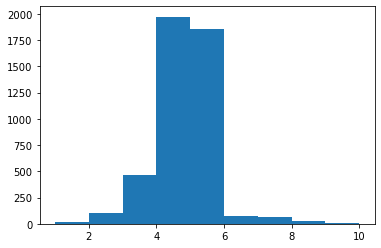

In [71]:
bins = range(1, max(iters) + 2)
plt.hist(iters, bins=bins)
plt.show()